In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
df['_HSCD'] = df['HSCD'].copy()

In [6]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     1         36  Australia     2.284420e+11  1.948099e+10   
4      2017     1         76     Brazil     1.507490e+11  1.948099e+10   
5      2017     1        104    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1        124     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [7]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [8]:
df.head()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

<AxesSubplot:>

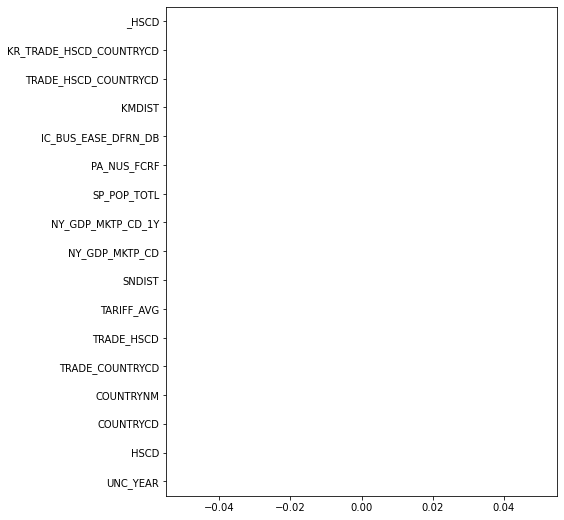

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11  ...   
1         0.0  12203.155980    1.329190e+12       1.208850e+12  ...   
4        18.0   9644.206941    2.062830e+12       1.795700e+12  ...   
5         5.0   5891.659995    6.894587e+10       6.718424e+10  ...   
6         0.0   7911.783801    1.649880e+12       1.528240e+12  ...   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
0                     7657  190590            0.007418            0.017537   
1                  5294788  190590            0.192061            2.252181   
4                   122850  190590            0.020783            0.160822   
5                   631082  190590            0.066283            0.065509   
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893  

[5 rows x 21 columns]

In [13]:
copy_df = df.copy()

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
copy_df = df.copy()
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0     1          1        30.0   38.782384     0.027670   110.973017   
1     1          2         0.0  122.031560     0.015534     1.304758   
4     1          3        18.0   96.442069     0.147996     3.191389   
5     1          4         5.0   58.916600     0.036340  1360.358707   
6     1          5         0.0   79.117838     0.024167     1.297936   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            46.109810   99.540098            0.007418            0.017537   
1            80.223690   83.296523            0.192061            2.252181   
4            55.382403  183.645059            0.020783            0.160822   
5            42.671390   37.961426            0.066283            0.065509   
6            79.540940  106.177031            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893

In [16]:
df.to_csv('./norm.csv')

In [17]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)

In [18]:
df_shuffled.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0    15          4         0.0   63.403729     0.036340  1360.358707   
1   153         21         0.0  115.697407     0.020481     3.260488   
2   134         23         0.0   32.731520     0.025202     3.779333   
3    50         15         3.0   49.516033     0.010789   326.001023   
4   382          3        15.0  102.772866     0.147996     3.191389   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            42.671390   37.961426            0.007782            0.034779   
1            67.517500  163.297646            0.005423            0.620588   
2            77.680440   77.539673            0.010907            1.462068   
3            74.848790   42.277720            0.022977            0.266165   
4            55.382403  183.645059            0.096494            0.849757   

   gdp_percent  next_year_percent  
0   102.622089           0.463379  
1   109.959040           0.039603  
2   111.399827           0.024799  
3   121.509637           0.474827  
4   114.876093           1.137093

In [19]:
df = df_shuffled.copy()

In [20]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [22]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [23]:
y_test = y_test.reshape(-1,1)

In [24]:
len(df)

17269

In [30]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [31]:
y_test.shape

torch.Size([3454, 1])

In [32]:
FLAG_SAVE_MODEL = False

In [33]:
# LSTM Model Test
import torch.nn as nn

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out
    
class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(64, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        return self.head(x)

modelLinear = nn.Linear(x_train.shape[1], 1).to(device)



# model = nn.Linear(9,1).to(device)


# MODEL LOAD FINISH
# MODEL LOAD FINISH
# MODEL LOAD FINISH

# LSTM - L1 Loss Model

In [34]:
# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

num_epochs = 100
total_step = len(dataloader)
loss_list_lstm = []
test_loss_list_lstm = []
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        x_t = x_t.reshape(-1, 1, input_size)

        pred = deepmodel(x_t)
        
#         loss = F.mse_loss(y_t, pred)
        loss = F.l1_loss(y_t, pred)
        loss_list_lstm.append(loss)
        with torch.no_grad():
            x_te = x_test.reshape(-1,1,input_size)
            pred_y = deepmodel(x_te)
            test_loss_list_lstm.append(F.l1_loss(pred_y, y_test))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))

if FLAG_SAVE_MODEL:
    torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')



Epoch [1/100], Step [100/432], Loss: 7.1436
Epoch [1/100], Step [200/432], Loss: 3.5672
Epoch [1/100], Step [300/432], Loss: 4.2093
Epoch [1/100], Step [400/432], Loss: 4.4028
Epoch [2/100], Step [100/432], Loss: 7.4072
Epoch [2/100], Step [200/432], Loss: 2.6177
Epoch [2/100], Step [300/432], Loss: 9.5402
Epoch [2/100], Step [400/432], Loss: 5.2163
Epoch [3/100], Step [100/432], Loss: 4.0613
Epoch [3/100], Step [200/432], Loss: 9.0798
Epoch [3/100], Step [300/432], Loss: 20.6639
Epoch [3/100], Step [400/432], Loss: 6.7240
Epoch [4/100], Step [100/432], Loss: 4.7458
Epoch [4/100], Step [200/432], Loss: 4.5428
Epoch [4/100], Step [300/432], Loss: 4.5921
Epoch [4/100], Step [400/432], Loss: 4.6392
Epoch [5/100], Step [100/432], Loss: 4.1396
Epoch [5/100], Step [200/432], Loss: 6.5825
Epoch [5/100], Step [300/432], Loss: 5.0657
Epoch [5/100], Step [400/432], Loss: 2.5567
Epoch [6/100], Step [100/432], Loss: 2.6580
Epoch [6/100], Step [200/432], Loss: 3.4256
Epoch [6/100], Step [300/432], 

Epoch [46/100], Step [400/432], Loss: 4.2072
Epoch [47/100], Step [100/432], Loss: 5.7528
Epoch [47/100], Step [200/432], Loss: 4.1255
Epoch [47/100], Step [300/432], Loss: 5.3266
Epoch [47/100], Step [400/432], Loss: 2.1114
Epoch [48/100], Step [100/432], Loss: 3.4941
Epoch [48/100], Step [200/432], Loss: 2.7172
Epoch [48/100], Step [300/432], Loss: 8.2820
Epoch [48/100], Step [400/432], Loss: 2.2143
Epoch [49/100], Step [100/432], Loss: 3.3653
Epoch [49/100], Step [200/432], Loss: 8.3096
Epoch [49/100], Step [300/432], Loss: 5.0505
Epoch [49/100], Step [400/432], Loss: 4.0090
Epoch [50/100], Step [100/432], Loss: 5.0575
Epoch [50/100], Step [200/432], Loss: 2.0564
Epoch [50/100], Step [300/432], Loss: 5.0755
Epoch [50/100], Step [400/432], Loss: 18.2316
Epoch [51/100], Step [100/432], Loss: 3.1785
Epoch [51/100], Step [200/432], Loss: 2.9190
Epoch [51/100], Step [300/432], Loss: 7.1832
Epoch [51/100], Step [400/432], Loss: 4.7528
Epoch [52/100], Step [100/432], Loss: 6.8094
Epoch [52

Epoch [92/100], Step [200/432], Loss: 3.4570
Epoch [92/100], Step [300/432], Loss: 5.8018
Epoch [92/100], Step [400/432], Loss: 2.5224
Epoch [93/100], Step [100/432], Loss: 5.9398
Epoch [93/100], Step [200/432], Loss: 2.5606
Epoch [93/100], Step [300/432], Loss: 2.9700
Epoch [93/100], Step [400/432], Loss: 4.7026
Epoch [94/100], Step [100/432], Loss: 3.7247
Epoch [94/100], Step [200/432], Loss: 1.7020
Epoch [94/100], Step [300/432], Loss: 3.0844
Epoch [94/100], Step [400/432], Loss: 2.0177
Epoch [95/100], Step [100/432], Loss: 4.8098
Epoch [95/100], Step [200/432], Loss: 4.5029
Epoch [95/100], Step [300/432], Loss: 4.4019
Epoch [95/100], Step [400/432], Loss: 3.2215
Epoch [96/100], Step [100/432], Loss: 3.2752
Epoch [96/100], Step [200/432], Loss: 5.5688
Epoch [96/100], Step [300/432], Loss: 2.4951
Epoch [96/100], Step [400/432], Loss: 5.2962
Epoch [97/100], Step [100/432], Loss: 7.0673
Epoch [97/100], Step [200/432], Loss: 2.5759
Epoch [97/100], Step [300/432], Loss: 2.5446
Epoch [97/

In [301]:
x_te = x_test.reshape(-1,1,input_size)
pred_y = deepmodel(x_te)
torch.mean(torch.abs(pred_y - y_test))

tensor(4.8884, device='cuda:0', grad_fn=<MeanBackward0>)

# L2 Loss model - not used

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 200
loss_list1 = []
test_loss_list1 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel(x_t).to(device)
        cost = F.mse_loss(y_t, pred)
        loss_list1.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list1.append(F.mse_loss(pred_y, y_test))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')

# l1 loss model

In [35]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [36]:
n_epochs = 100
loss_list2 = []
test_loss_list2 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            test_loss_list2.append(F.l1_loss(pred_y, y_test))
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/432  cost : 40.057533264160156
Ep 0/100  Batch 2/432  cost : 61.741493225097656
Ep 0/100  Batch 3/432  cost : 11.001442909240723
Ep 0/100  Batch 4/432  cost : 157.2154541015625
Ep 0/100  Batch 5/432  cost : 20.619354248046875
Ep 0/100  Batch 6/432  cost : 30.79589080810547
Ep 0/100  Batch 7/432  cost : 141.01443481445312
Ep 0/100  Batch 8/432  cost : 77.37763214111328
Ep 0/100  Batch 9/432  cost : 57.66919708251953
Ep 0/100  Batch 10/432  cost : 87.84852600097656
Ep 0/100  Batch 11/432  cost : 39.246334075927734
Ep 0/100  Batch 12/432  cost : 79.13748168945312
Ep 0/100  Batch 13/432  cost : 55.310367584228516
Ep 0/100  Batch 14/432  cost : 53.86006546020508
Ep 0/100  Batch 15/432  cost : 81.9808349609375
Ep 0/100  Batch 16/432  cost : 25.399703979492188
Ep 0/100  Batch 17/432  cost : 84.59083557128906
Ep 0/100  Batch 18/432  cost : 99.73204803466797
Ep 0/100  Batch 19/432  cost : 121.74644470214844
Ep 0/100  Batch 20/432  cost : 31.719846725463867
Ep 0/100  Batch 21/4

Ep 0/100  Batch 238/432  cost : 3.020799398422241
Ep 0/100  Batch 239/432  cost : 3.3489770889282227
Ep 0/100  Batch 240/432  cost : 3.935343027114868
Ep 0/100  Batch 241/432  cost : 2.0988590717315674
Ep 0/100  Batch 242/432  cost : 5.069589614868164
Ep 0/100  Batch 243/432  cost : 3.538459539413452
Ep 0/100  Batch 244/432  cost : 3.971135377883911
Ep 0/100  Batch 245/432  cost : 4.896397113800049
Ep 0/100  Batch 246/432  cost : 5.347989082336426
Ep 0/100  Batch 247/432  cost : 3.2955894470214844
Ep 0/100  Batch 248/432  cost : 3.076749801635742
Ep 0/100  Batch 249/432  cost : 5.796699523925781
Ep 0/100  Batch 250/432  cost : 6.274221420288086
Ep 0/100  Batch 251/432  cost : 4.790107250213623
Ep 0/100  Batch 252/432  cost : 3.4729905128479004
Ep 0/100  Batch 253/432  cost : 5.338417053222656
Ep 0/100  Batch 254/432  cost : 7.410211563110352
Ep 0/100  Batch 255/432  cost : 4.963558197021484
Ep 0/100  Batch 256/432  cost : 2.675629138946533
Ep 0/100  Batch 257/432  cost : 3.086899042129

Ep 1/100  Batch 46/432  cost : 2.471391201019287
Ep 1/100  Batch 47/432  cost : 5.057507514953613
Ep 1/100  Batch 48/432  cost : 3.769033432006836
Ep 1/100  Batch 49/432  cost : 5.592387676239014
Ep 1/100  Batch 50/432  cost : 4.75055456161499
Ep 1/100  Batch 51/432  cost : 2.8940622806549072
Ep 1/100  Batch 52/432  cost : 4.454609394073486
Ep 1/100  Batch 53/432  cost : 4.4791741371154785
Ep 1/100  Batch 54/432  cost : 3.6406450271606445
Ep 1/100  Batch 55/432  cost : 7.448925971984863
Ep 1/100  Batch 56/432  cost : 9.256657600402832
Ep 1/100  Batch 57/432  cost : 9.103629112243652
Ep 1/100  Batch 58/432  cost : 6.722199440002441
Ep 1/100  Batch 59/432  cost : 4.606228828430176
Ep 1/100  Batch 60/432  cost : 3.4575188159942627
Ep 1/100  Batch 61/432  cost : 2.2045650482177734
Ep 1/100  Batch 62/432  cost : 3.2635722160339355
Ep 1/100  Batch 63/432  cost : 2.9422428607940674
Ep 1/100  Batch 64/432  cost : 4.760026931762695
Ep 1/100  Batch 65/432  cost : 6.523148536682129
Ep 1/100  Batc

Ep 1/100  Batch 286/432  cost : 5.282483100891113
Ep 1/100  Batch 287/432  cost : 3.076749086380005
Ep 1/100  Batch 288/432  cost : 4.833460807800293
Ep 1/100  Batch 289/432  cost : 7.654502868652344
Ep 1/100  Batch 290/432  cost : 5.041910171508789
Ep 1/100  Batch 291/432  cost : 5.234821319580078
Ep 1/100  Batch 292/432  cost : 4.289463996887207
Ep 1/100  Batch 293/432  cost : 3.366770029067993
Ep 1/100  Batch 294/432  cost : 12.664539337158203
Ep 1/100  Batch 295/432  cost : 5.417220115661621
Ep 1/100  Batch 296/432  cost : 4.595627307891846
Ep 1/100  Batch 297/432  cost : 3.058917999267578
Ep 1/100  Batch 298/432  cost : 3.674711227416992
Ep 1/100  Batch 299/432  cost : 4.371371269226074
Ep 1/100  Batch 300/432  cost : 3.523848533630371
Ep 1/100  Batch 301/432  cost : 3.923515796661377
Ep 1/100  Batch 302/432  cost : 2.7182445526123047
Ep 1/100  Batch 303/432  cost : 2.3857812881469727
Ep 1/100  Batch 304/432  cost : 2.0978035926818848
Ep 1/100  Batch 305/432  cost : 3.491020202636

Ep 2/100  Batch 95/432  cost : 7.805904865264893
Ep 2/100  Batch 96/432  cost : 4.538439750671387
Ep 2/100  Batch 97/432  cost : 2.6102216243743896
Ep 2/100  Batch 98/432  cost : 78.58917236328125
Ep 2/100  Batch 99/432  cost : 6.224789619445801
Ep 2/100  Batch 100/432  cost : 3.800140619277954
Ep 2/100  Batch 101/432  cost : 3.854769468307495
Ep 2/100  Batch 102/432  cost : 2.795450210571289
Ep 2/100  Batch 103/432  cost : 3.53139066696167
Ep 2/100  Batch 104/432  cost : 3.874296188354492
Ep 2/100  Batch 105/432  cost : 3.3022332191467285
Ep 2/100  Batch 106/432  cost : 4.838269233703613
Ep 2/100  Batch 107/432  cost : 5.162711143493652
Ep 2/100  Batch 108/432  cost : 1.6589566469192505
Ep 2/100  Batch 109/432  cost : 3.4956135749816895
Ep 2/100  Batch 110/432  cost : 7.012845039367676
Ep 2/100  Batch 111/432  cost : 5.394187927246094
Ep 2/100  Batch 112/432  cost : 4.498668193817139
Ep 2/100  Batch 113/432  cost : 2.0390448570251465
Ep 2/100  Batch 114/432  cost : 107.31343078613281


Ep 2/100  Batch 336/432  cost : 3.2469141483306885
Ep 2/100  Batch 337/432  cost : 2.0544934272766113
Ep 2/100  Batch 338/432  cost : 3.0024027824401855
Ep 2/100  Batch 339/432  cost : 3.2429141998291016
Ep 2/100  Batch 340/432  cost : 6.507777690887451
Ep 2/100  Batch 341/432  cost : 2.9884581565856934
Ep 2/100  Batch 342/432  cost : 7.882124900817871
Ep 2/100  Batch 343/432  cost : 3.0975759029388428
Ep 2/100  Batch 344/432  cost : 3.819779396057129
Ep 2/100  Batch 345/432  cost : 6.3598527908325195
Ep 2/100  Batch 346/432  cost : 11.010859489440918
Ep 2/100  Batch 347/432  cost : 3.2786507606506348
Ep 2/100  Batch 348/432  cost : 2.855344295501709
Ep 2/100  Batch 349/432  cost : 3.7907495498657227
Ep 2/100  Batch 350/432  cost : 3.522847890853882
Ep 2/100  Batch 351/432  cost : 2.5120253562927246
Ep 2/100  Batch 352/432  cost : 2.5780351161956787
Ep 2/100  Batch 353/432  cost : 3.8356080055236816
Ep 2/100  Batch 354/432  cost : 7.000716209411621
Ep 2/100  Batch 355/432  cost : 4.263

Ep 3/100  Batch 144/432  cost : 1.9445335865020752
Ep 3/100  Batch 145/432  cost : 8.160675048828125
Ep 3/100  Batch 146/432  cost : 7.786823272705078
Ep 3/100  Batch 147/432  cost : 12.452127456665039
Ep 3/100  Batch 148/432  cost : 3.5899016857147217
Ep 3/100  Batch 149/432  cost : 3.729008197784424
Ep 3/100  Batch 150/432  cost : 2.0838475227355957
Ep 3/100  Batch 151/432  cost : 4.426774978637695
Ep 3/100  Batch 152/432  cost : 5.943483829498291
Ep 3/100  Batch 153/432  cost : 1.9654197692871094
Ep 3/100  Batch 154/432  cost : 2.838458299636841
Ep 3/100  Batch 155/432  cost : 3.758087635040283
Ep 3/100  Batch 156/432  cost : 7.666289329528809
Ep 3/100  Batch 157/432  cost : 4.4540863037109375
Ep 3/100  Batch 158/432  cost : 4.863405227661133
Ep 3/100  Batch 159/432  cost : 3.800508975982666
Ep 3/100  Batch 160/432  cost : 4.246430397033691
Ep 3/100  Batch 161/432  cost : 4.245203971862793
Ep 3/100  Batch 162/432  cost : 2.2253670692443848
Ep 3/100  Batch 163/432  cost : 3.488836765

Ep 3/100  Batch 384/432  cost : 6.091649055480957
Ep 3/100  Batch 385/432  cost : 3.439171552658081
Ep 3/100  Batch 386/432  cost : 7.026477813720703
Ep 3/100  Batch 387/432  cost : 2.991318702697754
Ep 3/100  Batch 388/432  cost : 3.33256196975708
Ep 3/100  Batch 389/432  cost : 3.7596662044525146
Ep 3/100  Batch 390/432  cost : 3.277918815612793
Ep 3/100  Batch 391/432  cost : 2.724524974822998
Ep 3/100  Batch 392/432  cost : 4.402026653289795
Ep 3/100  Batch 393/432  cost : 4.987150192260742
Ep 3/100  Batch 394/432  cost : 3.697171449661255
Ep 3/100  Batch 395/432  cost : 90.77977752685547
Ep 3/100  Batch 396/432  cost : 3.335170269012451
Ep 3/100  Batch 397/432  cost : 3.494302988052368
Ep 3/100  Batch 398/432  cost : 5.760110855102539
Ep 3/100  Batch 399/432  cost : 4.569312572479248
Ep 3/100  Batch 400/432  cost : 2.9450223445892334
Ep 3/100  Batch 401/432  cost : 4.987005233764648
Ep 3/100  Batch 402/432  cost : 4.505967617034912
Ep 3/100  Batch 403/432  cost : 2.117701053619384

Ep 4/100  Batch 192/432  cost : 5.005515098571777
Ep 4/100  Batch 193/432  cost : 2.9964027404785156
Ep 4/100  Batch 194/432  cost : 2.064676284790039
Ep 4/100  Batch 195/432  cost : 5.232731819152832
Ep 4/100  Batch 196/432  cost : 2.778925895690918
Ep 4/100  Batch 197/432  cost : 4.961158275604248
Ep 4/100  Batch 198/432  cost : 2.7099101543426514
Ep 4/100  Batch 199/432  cost : 21.16650390625
Ep 4/100  Batch 200/432  cost : 4.176220893859863
Ep 4/100  Batch 201/432  cost : 4.316710472106934
Ep 4/100  Batch 202/432  cost : 3.4001121520996094
Ep 4/100  Batch 203/432  cost : 5.474050998687744
Ep 4/100  Batch 204/432  cost : 3.3059186935424805
Ep 4/100  Batch 205/432  cost : 3.2343971729278564
Ep 4/100  Batch 206/432  cost : 5.648703575134277
Ep 4/100  Batch 207/432  cost : 4.702561855316162
Ep 4/100  Batch 208/432  cost : 8.488240242004395
Ep 4/100  Batch 209/432  cost : 2.3382797241210938
Ep 4/100  Batch 210/432  cost : 7.7383036613464355
Ep 4/100  Batch 211/432  cost : 7.205161571502

Ep 4/100  Batch 432/432  cost : 3.430299997329712
Ep 5/100  Batch 1/432  cost : 3.5063021183013916
Ep 5/100  Batch 2/432  cost : 5.792119026184082
Ep 5/100  Batch 3/432  cost : 5.915429592132568
Ep 5/100  Batch 4/432  cost : 4.355111122131348
Ep 5/100  Batch 5/432  cost : 5.732451438903809
Ep 5/100  Batch 6/432  cost : 3.2472925186157227
Ep 5/100  Batch 7/432  cost : 4.544300079345703
Ep 5/100  Batch 8/432  cost : 3.140270233154297
Ep 5/100  Batch 9/432  cost : 5.8409223556518555
Ep 5/100  Batch 10/432  cost : 4.1787638664245605
Ep 5/100  Batch 11/432  cost : 2.387324333190918
Ep 5/100  Batch 12/432  cost : 6.25974702835083
Ep 5/100  Batch 13/432  cost : 2.161205530166626
Ep 5/100  Batch 14/432  cost : 4.807697296142578
Ep 5/100  Batch 15/432  cost : 4.044856071472168
Ep 5/100  Batch 16/432  cost : 3.943432331085205
Ep 5/100  Batch 17/432  cost : 2.955760955810547
Ep 5/100  Batch 18/432  cost : 4.409793853759766
Ep 5/100  Batch 19/432  cost : 4.8836283683776855
Ep 5/100  Batch 20/432  

Ep 5/100  Batch 240/432  cost : 6.253807067871094
Ep 5/100  Batch 241/432  cost : 7.0131378173828125
Ep 5/100  Batch 242/432  cost : 4.677237033843994
Ep 5/100  Batch 243/432  cost : 3.755605936050415
Ep 5/100  Batch 244/432  cost : 2.8893661499023438
Ep 5/100  Batch 245/432  cost : 3.764594316482544
Ep 5/100  Batch 246/432  cost : 6.674698829650879
Ep 5/100  Batch 247/432  cost : 4.349917411804199
Ep 5/100  Batch 248/432  cost : 3.26385498046875
Ep 5/100  Batch 249/432  cost : 10.852716445922852
Ep 5/100  Batch 250/432  cost : 3.3806943893432617
Ep 5/100  Batch 251/432  cost : 7.410749435424805
Ep 5/100  Batch 252/432  cost : 3.7164435386657715
Ep 5/100  Batch 253/432  cost : 6.967089653015137
Ep 5/100  Batch 254/432  cost : 4.473306655883789
Ep 5/100  Batch 255/432  cost : 3.889145612716675
Ep 5/100  Batch 256/432  cost : 79.50104522705078
Ep 5/100  Batch 257/432  cost : 5.475728988647461
Ep 5/100  Batch 258/432  cost : 8.964981079101562
Ep 5/100  Batch 259/432  cost : 8.423720359802

Ep 6/100  Batch 48/432  cost : 6.592142105102539
Ep 6/100  Batch 49/432  cost : 5.366661548614502
Ep 6/100  Batch 50/432  cost : 3.2891287803649902
Ep 6/100  Batch 51/432  cost : 4.8087849617004395
Ep 6/100  Batch 52/432  cost : 6.381392002105713
Ep 6/100  Batch 53/432  cost : 3.9224355220794678
Ep 6/100  Batch 54/432  cost : 5.682550430297852
Ep 6/100  Batch 55/432  cost : 2.364168167114258
Ep 6/100  Batch 56/432  cost : 3.826478958129883
Ep 6/100  Batch 57/432  cost : 4.905677318572998
Ep 6/100  Batch 58/432  cost : 5.346454620361328
Ep 6/100  Batch 59/432  cost : 37.05199432373047
Ep 6/100  Batch 60/432  cost : 11.3028564453125
Ep 6/100  Batch 61/432  cost : 1.799899935722351
Ep 6/100  Batch 62/432  cost : 2.856968641281128
Ep 6/100  Batch 63/432  cost : 4.570590972900391
Ep 6/100  Batch 64/432  cost : 4.488144397735596
Ep 6/100  Batch 65/432  cost : 4.802420139312744
Ep 6/100  Batch 66/432  cost : 2.5235424041748047
Ep 6/100  Batch 67/432  cost : 2.875598430633545
Ep 6/100  Batch 6

Ep 6/100  Batch 288/432  cost : 5.134706974029541
Ep 6/100  Batch 289/432  cost : 2.526057243347168
Ep 6/100  Batch 290/432  cost : 4.7729997634887695
Ep 6/100  Batch 291/432  cost : 3.498380184173584
Ep 6/100  Batch 292/432  cost : 2.1572647094726562
Ep 6/100  Batch 293/432  cost : 1.9163196086883545
Ep 6/100  Batch 294/432  cost : 5.723260879516602
Ep 6/100  Batch 295/432  cost : 5.695962905883789
Ep 6/100  Batch 296/432  cost : 2.876554012298584
Ep 6/100  Batch 297/432  cost : 1.1319093704223633
Ep 6/100  Batch 298/432  cost : 3.3558990955352783
Ep 6/100  Batch 299/432  cost : 7.0967488288879395
Ep 6/100  Batch 300/432  cost : 7.9791669845581055
Ep 6/100  Batch 301/432  cost : 5.912753105163574
Ep 6/100  Batch 302/432  cost : 6.490007400512695
Ep 6/100  Batch 303/432  cost : 6.345228672027588
Ep 6/100  Batch 304/432  cost : 4.633147716522217
Ep 6/100  Batch 305/432  cost : 6.551713943481445
Ep 6/100  Batch 306/432  cost : 3.33577561378479
Ep 6/100  Batch 307/432  cost : 2.1088695526

Ep 7/100  Batch 96/432  cost : 4.483913421630859
Ep 7/100  Batch 97/432  cost : 2.1307592391967773
Ep 7/100  Batch 98/432  cost : 3.053349018096924
Ep 7/100  Batch 99/432  cost : 2.880007266998291
Ep 7/100  Batch 100/432  cost : 4.047168254852295
Ep 7/100  Batch 101/432  cost : 7.305944919586182
Ep 7/100  Batch 102/432  cost : 7.1062140464782715
Ep 7/100  Batch 103/432  cost : 4.845353126525879
Ep 7/100  Batch 104/432  cost : 4.950859069824219
Ep 7/100  Batch 105/432  cost : 6.501683712005615
Ep 7/100  Batch 106/432  cost : 4.843825340270996
Ep 7/100  Batch 107/432  cost : 3.526681661605835
Ep 7/100  Batch 108/432  cost : 8.087101936340332
Ep 7/100  Batch 109/432  cost : 6.646974086761475
Ep 7/100  Batch 110/432  cost : 11.248568534851074
Ep 7/100  Batch 111/432  cost : 4.116219520568848
Ep 7/100  Batch 112/432  cost : 2.6967291831970215
Ep 7/100  Batch 113/432  cost : 2.6032042503356934
Ep 7/100  Batch 114/432  cost : 3.5027174949645996
Ep 7/100  Batch 115/432  cost : 6.74611091613769

Ep 7/100  Batch 336/432  cost : 3.1568427085876465
Ep 7/100  Batch 337/432  cost : 3.854240894317627
Ep 7/100  Batch 338/432  cost : 3.496002197265625
Ep 7/100  Batch 339/432  cost : 8.439605712890625
Ep 7/100  Batch 340/432  cost : 3.847961664199829
Ep 7/100  Batch 341/432  cost : 2.3450324535369873
Ep 7/100  Batch 342/432  cost : 3.18904185295105
Ep 7/100  Batch 343/432  cost : 13.245589256286621
Ep 7/100  Batch 344/432  cost : 11.776140213012695
Ep 7/100  Batch 345/432  cost : 4.667900562286377
Ep 7/100  Batch 346/432  cost : 4.891283988952637
Ep 7/100  Batch 347/432  cost : 2.229896068572998
Ep 7/100  Batch 348/432  cost : 3.8961682319641113
Ep 7/100  Batch 349/432  cost : 1.7189862728118896
Ep 7/100  Batch 350/432  cost : 4.996811866760254
Ep 7/100  Batch 351/432  cost : 12.06410026550293
Ep 7/100  Batch 352/432  cost : 6.694309234619141
Ep 7/100  Batch 353/432  cost : 4.570911407470703
Ep 7/100  Batch 354/432  cost : 5.076286315917969
Ep 7/100  Batch 355/432  cost : 2.64673137664

Ep 8/100  Batch 144/432  cost : 4.246284008026123
Ep 8/100  Batch 145/432  cost : 7.343390464782715
Ep 8/100  Batch 146/432  cost : 4.863773345947266
Ep 8/100  Batch 147/432  cost : 3.9726107120513916
Ep 8/100  Batch 148/432  cost : 3.697641611099243
Ep 8/100  Batch 149/432  cost : 2.407362461090088
Ep 8/100  Batch 150/432  cost : 5.008416175842285
Ep 8/100  Batch 151/432  cost : 4.405161380767822
Ep 8/100  Batch 152/432  cost : 39.62037658691406
Ep 8/100  Batch 153/432  cost : 3.018308162689209
Ep 8/100  Batch 154/432  cost : 3.493628978729248
Ep 8/100  Batch 155/432  cost : 2.5616607666015625
Ep 8/100  Batch 156/432  cost : 13.826482772827148
Ep 8/100  Batch 157/432  cost : 8.636375427246094
Ep 8/100  Batch 158/432  cost : 5.562690734863281
Ep 8/100  Batch 159/432  cost : 3.351749897003174
Ep 8/100  Batch 160/432  cost : 5.140118598937988
Ep 8/100  Batch 161/432  cost : 2.7026710510253906
Ep 8/100  Batch 162/432  cost : 106.79085540771484
Ep 8/100  Batch 163/432  cost : 3.82309961318

Ep 8/100  Batch 384/432  cost : 14.976299285888672
Ep 8/100  Batch 385/432  cost : 4.092012405395508
Ep 8/100  Batch 386/432  cost : 3.9628615379333496
Ep 8/100  Batch 387/432  cost : 5.483558654785156
Ep 8/100  Batch 388/432  cost : 3.821901321411133
Ep 8/100  Batch 389/432  cost : 5.719285488128662
Ep 8/100  Batch 390/432  cost : 19.90314483642578
Ep 8/100  Batch 391/432  cost : 3.923849582672119
Ep 8/100  Batch 392/432  cost : 3.5498297214508057
Ep 8/100  Batch 393/432  cost : 3.380321502685547
Ep 8/100  Batch 394/432  cost : 3.6232643127441406
Ep 8/100  Batch 395/432  cost : 4.354650497436523
Ep 8/100  Batch 396/432  cost : 3.832723617553711
Ep 8/100  Batch 397/432  cost : 6.233523368835449
Ep 8/100  Batch 398/432  cost : 4.78751802444458
Ep 8/100  Batch 399/432  cost : 2.9512224197387695
Ep 8/100  Batch 400/432  cost : 2.448286771774292
Ep 8/100  Batch 401/432  cost : 3.715620279312134
Ep 8/100  Batch 402/432  cost : 3.2722206115722656
Ep 8/100  Batch 403/432  cost : 2.15309977531

Ep 9/100  Batch 192/432  cost : 6.340669631958008
Ep 9/100  Batch 193/432  cost : 3.8634400367736816
Ep 9/100  Batch 194/432  cost : 3.9131665229797363
Ep 9/100  Batch 195/432  cost : 5.931921482086182
Ep 9/100  Batch 196/432  cost : 4.314546585083008
Ep 9/100  Batch 197/432  cost : 4.7744293212890625
Ep 9/100  Batch 198/432  cost : 2.2936229705810547
Ep 9/100  Batch 199/432  cost : 3.0298376083374023
Ep 9/100  Batch 200/432  cost : 3.4734089374542236
Ep 9/100  Batch 201/432  cost : 3.7147369384765625
Ep 9/100  Batch 202/432  cost : 1.85353422164917
Ep 9/100  Batch 203/432  cost : 3.1204237937927246
Ep 9/100  Batch 204/432  cost : 2.327298641204834
Ep 9/100  Batch 205/432  cost : 2.9616055488586426
Ep 9/100  Batch 206/432  cost : 4.086623191833496
Ep 9/100  Batch 207/432  cost : 3.044567584991455
Ep 9/100  Batch 208/432  cost : 2.697495937347412
Ep 9/100  Batch 209/432  cost : 4.79822301864624
Ep 9/100  Batch 210/432  cost : 2.9176361560821533
Ep 9/100  Batch 211/432  cost : 2.78777980

Ep 9/100  Batch 432/432  cost : 4.955199718475342
Ep 10/100  Batch 1/432  cost : 3.463578224182129
Ep 10/100  Batch 2/432  cost : 6.021960735321045
Ep 10/100  Batch 3/432  cost : 8.490175247192383
Ep 10/100  Batch 4/432  cost : 4.885553359985352
Ep 10/100  Batch 5/432  cost : 4.9012532234191895
Ep 10/100  Batch 6/432  cost : 9.301328659057617
Ep 10/100  Batch 7/432  cost : 3.279181957244873
Ep 10/100  Batch 8/432  cost : 4.568507194519043
Ep 10/100  Batch 9/432  cost : 4.521298885345459
Ep 10/100  Batch 10/432  cost : 5.225588321685791
Ep 10/100  Batch 11/432  cost : 3.414811134338379
Ep 10/100  Batch 12/432  cost : 4.373196601867676
Ep 10/100  Batch 13/432  cost : 37.43082046508789
Ep 10/100  Batch 14/432  cost : 5.328531265258789
Ep 10/100  Batch 15/432  cost : 7.35188102722168
Ep 10/100  Batch 16/432  cost : 13.436477661132812
Ep 10/100  Batch 17/432  cost : 6.282870292663574
Ep 10/100  Batch 18/432  cost : 5.54995059967041
Ep 10/100  Batch 19/432  cost : 4.631844520568848
Ep 10/100

Ep 10/100  Batch 240/432  cost : 2.350332736968994
Ep 10/100  Batch 241/432  cost : 3.2952141761779785
Ep 10/100  Batch 242/432  cost : 2.0034372806549072
Ep 10/100  Batch 243/432  cost : 1.8140084743499756
Ep 10/100  Batch 244/432  cost : 2.079162120819092
Ep 10/100  Batch 245/432  cost : 3.9822499752044678
Ep 10/100  Batch 246/432  cost : 5.54583740234375
Ep 10/100  Batch 247/432  cost : 3.8423690795898438
Ep 10/100  Batch 248/432  cost : 3.168102264404297
Ep 10/100  Batch 249/432  cost : 2.2441389560699463
Ep 10/100  Batch 250/432  cost : 7.431451797485352
Ep 10/100  Batch 251/432  cost : 2.389024019241333
Ep 10/100  Batch 252/432  cost : 7.334291458129883
Ep 10/100  Batch 253/432  cost : 6.522273063659668
Ep 10/100  Batch 254/432  cost : 6.642278671264648
Ep 10/100  Batch 255/432  cost : 3.578026294708252
Ep 10/100  Batch 256/432  cost : 3.559711456298828
Ep 10/100  Batch 257/432  cost : 2.9100301265716553
Ep 10/100  Batch 258/432  cost : 3.4836745262145996
Ep 10/100  Batch 259/432

Ep 10/100  Batch 400/432  cost : 2.370356559753418
Ep 10/100  Batch 401/432  cost : 2.7275686264038086
Ep 10/100  Batch 402/432  cost : 8.77653694152832
Ep 10/100  Batch 403/432  cost : 6.511205673217773
Ep 10/100  Batch 404/432  cost : 4.3182783126831055
Ep 10/100  Batch 405/432  cost : 22.529464721679688
Ep 10/100  Batch 406/432  cost : 2.3078842163085938
Ep 10/100  Batch 407/432  cost : 3.985966682434082
Ep 10/100  Batch 408/432  cost : 8.673645973205566
Ep 10/100  Batch 409/432  cost : 2.9381678104400635
Ep 10/100  Batch 410/432  cost : 4.139492511749268
Ep 10/100  Batch 411/432  cost : 5.020974159240723
Ep 10/100  Batch 412/432  cost : 6.085737228393555
Ep 10/100  Batch 413/432  cost : 4.752092361450195
Ep 10/100  Batch 414/432  cost : 3.36383318901062
Ep 10/100  Batch 415/432  cost : 3.6817636489868164
Ep 10/100  Batch 416/432  cost : 1.8090628385543823
Ep 10/100  Batch 417/432  cost : 2.702033758163452
Ep 10/100  Batch 418/432  cost : 9.037837982177734
Ep 10/100  Batch 419/432  

Ep 11/100  Batch 208/432  cost : 4.603512763977051
Ep 11/100  Batch 209/432  cost : 10.397271156311035
Ep 11/100  Batch 210/432  cost : 4.510003566741943
Ep 11/100  Batch 211/432  cost : 3.292306661605835
Ep 11/100  Batch 212/432  cost : 3.4209680557250977
Ep 11/100  Batch 213/432  cost : 4.0217204093933105
Ep 11/100  Batch 214/432  cost : 3.0722970962524414
Ep 11/100  Batch 215/432  cost : 4.070155620574951
Ep 11/100  Batch 216/432  cost : 4.783770561218262
Ep 11/100  Batch 217/432  cost : 3.514190912246704
Ep 11/100  Batch 218/432  cost : 110.20545959472656
Ep 11/100  Batch 219/432  cost : 2.0696346759796143
Ep 11/100  Batch 220/432  cost : 5.594900608062744
Ep 11/100  Batch 221/432  cost : 2.9200260639190674
Ep 11/100  Batch 222/432  cost : 1.6245815753936768
Ep 11/100  Batch 223/432  cost : 2.692415237426758
Ep 11/100  Batch 224/432  cost : 2.514742374420166
Ep 11/100  Batch 225/432  cost : 5.386309623718262
Ep 11/100  Batch 226/432  cost : 2.2135677337646484
Ep 11/100  Batch 227/4

Ep 11/100  Batch 368/432  cost : 2.7932138442993164
Ep 11/100  Batch 369/432  cost : 10.832531929016113
Ep 11/100  Batch 370/432  cost : 4.1292829513549805
Ep 11/100  Batch 371/432  cost : 2.7120249271392822
Ep 11/100  Batch 372/432  cost : 3.0071463584899902
Ep 11/100  Batch 373/432  cost : 10.907869338989258
Ep 11/100  Batch 374/432  cost : 20.436065673828125
Ep 11/100  Batch 375/432  cost : 3.6349823474884033
Ep 11/100  Batch 376/432  cost : 4.10308837890625
Ep 11/100  Batch 377/432  cost : 1.7908471822738647
Ep 11/100  Batch 378/432  cost : 6.023760795593262
Ep 11/100  Batch 379/432  cost : 1.8500287532806396
Ep 11/100  Batch 380/432  cost : 6.025497913360596
Ep 11/100  Batch 381/432  cost : 5.431987762451172
Ep 11/100  Batch 382/432  cost : 6.558446884155273
Ep 11/100  Batch 383/432  cost : 5.803147315979004
Ep 11/100  Batch 384/432  cost : 4.631892204284668
Ep 11/100  Batch 385/432  cost : 2.212181568145752
Ep 11/100  Batch 386/432  cost : 2.304131507873535
Ep 11/100  Batch 387/4

Ep 12/100  Batch 172/432  cost : 4.519760608673096
Ep 12/100  Batch 173/432  cost : 5.177673816680908
Ep 12/100  Batch 174/432  cost : 3.758796453475952
Ep 12/100  Batch 175/432  cost : 6.183694839477539
Ep 12/100  Batch 176/432  cost : 2.0204975605010986
Ep 12/100  Batch 177/432  cost : 2.394630193710327
Ep 12/100  Batch 178/432  cost : 2.769684314727783
Ep 12/100  Batch 179/432  cost : 5.565406799316406
Ep 12/100  Batch 180/432  cost : 1.609045386314392
Ep 12/100  Batch 181/432  cost : 2.8758444786071777
Ep 12/100  Batch 182/432  cost : 3.3315725326538086
Ep 12/100  Batch 183/432  cost : 3.317200183868408
Ep 12/100  Batch 184/432  cost : 5.748050689697266
Ep 12/100  Batch 185/432  cost : 4.961763381958008
Ep 12/100  Batch 186/432  cost : 5.9933390617370605
Ep 12/100  Batch 187/432  cost : 12.299016952514648
Ep 12/100  Batch 188/432  cost : 2.358912944793701
Ep 12/100  Batch 189/432  cost : 4.796473026275635
Ep 12/100  Batch 190/432  cost : 3.180144786834717
Ep 12/100  Batch 191/432  

Ep 12/100  Batch 406/432  cost : 3.6310360431671143
Ep 12/100  Batch 407/432  cost : 3.0559184551239014
Ep 12/100  Batch 408/432  cost : 3.9738545417785645
Ep 12/100  Batch 409/432  cost : 4.987927436828613
Ep 12/100  Batch 410/432  cost : 11.911526679992676
Ep 12/100  Batch 411/432  cost : 2.5544333457946777
Ep 12/100  Batch 412/432  cost : 3.4098596572875977
Ep 12/100  Batch 413/432  cost : 3.0120432376861572
Ep 12/100  Batch 414/432  cost : 9.462997436523438
Ep 12/100  Batch 415/432  cost : 3.963603973388672
Ep 12/100  Batch 416/432  cost : 2.3040924072265625
Ep 12/100  Batch 417/432  cost : 2.8576653003692627
Ep 12/100  Batch 418/432  cost : 2.0463359355926514
Ep 12/100  Batch 419/432  cost : 4.783355236053467
Ep 12/100  Batch 420/432  cost : 3.5051145553588867
Ep 12/100  Batch 421/432  cost : 3.958559989929199
Ep 12/100  Batch 422/432  cost : 4.5337934494018555
Ep 12/100  Batch 423/432  cost : 3.868894577026367
Ep 12/100  Batch 424/432  cost : 2.9541261196136475
Ep 12/100  Batch 4

Ep 13/100  Batch 208/432  cost : 5.052928924560547
Ep 13/100  Batch 209/432  cost : 4.3489274978637695
Ep 13/100  Batch 210/432  cost : 2.573740243911743
Ep 13/100  Batch 211/432  cost : 6.773886680603027
Ep 13/100  Batch 212/432  cost : 6.136963844299316
Ep 13/100  Batch 213/432  cost : 3.287834882736206
Ep 13/100  Batch 214/432  cost : 2.954502820968628
Ep 13/100  Batch 215/432  cost : 5.224011421203613
Ep 13/100  Batch 216/432  cost : 3.396696090698242
Ep 13/100  Batch 217/432  cost : 5.210595607757568
Ep 13/100  Batch 218/432  cost : 4.5719685554504395
Ep 13/100  Batch 219/432  cost : 2.615078926086426
Ep 13/100  Batch 220/432  cost : 4.397623062133789
Ep 13/100  Batch 221/432  cost : 108.04006958007812
Ep 13/100  Batch 222/432  cost : 8.618866920471191
Ep 13/100  Batch 223/432  cost : 80.32784271240234
Ep 13/100  Batch 224/432  cost : 4.079449653625488
Ep 13/100  Batch 225/432  cost : 10.894102096557617
Ep 13/100  Batch 226/432  cost : 3.7190799713134766
Ep 13/100  Batch 227/432  

Ep 14/100  Batch 10/432  cost : 3.501465320587158
Ep 14/100  Batch 11/432  cost : 15.204200744628906
Ep 14/100  Batch 12/432  cost : 5.825490951538086
Ep 14/100  Batch 13/432  cost : 5.4095869064331055
Ep 14/100  Batch 14/432  cost : 3.2597451210021973
Ep 14/100  Batch 15/432  cost : 5.4278035163879395
Ep 14/100  Batch 16/432  cost : 1.4724071025848389
Ep 14/100  Batch 17/432  cost : 5.885537147521973
Ep 14/100  Batch 18/432  cost : 4.688642501831055
Ep 14/100  Batch 19/432  cost : 3.920161247253418
Ep 14/100  Batch 20/432  cost : 3.462282419204712
Ep 14/100  Batch 21/432  cost : 4.126430511474609
Ep 14/100  Batch 22/432  cost : 3.606912612915039
Ep 14/100  Batch 23/432  cost : 2.6911654472351074
Ep 14/100  Batch 24/432  cost : 3.5176687240600586
Ep 14/100  Batch 25/432  cost : 4.734580993652344
Ep 14/100  Batch 26/432  cost : 4.6614179611206055
Ep 14/100  Batch 27/432  cost : 8.972793579101562
Ep 14/100  Batch 28/432  cost : 3.467345952987671
Ep 14/100  Batch 29/432  cost : 5.78210258

Ep 14/100  Batch 244/432  cost : 4.535309791564941
Ep 14/100  Batch 245/432  cost : 2.967221260070801
Ep 14/100  Batch 246/432  cost : 4.272043228149414
Ep 14/100  Batch 247/432  cost : 8.111556053161621
Ep 14/100  Batch 248/432  cost : 4.947865009307861
Ep 14/100  Batch 249/432  cost : 6.747127532958984
Ep 14/100  Batch 250/432  cost : 3.373129367828369
Ep 14/100  Batch 251/432  cost : 11.500944137573242
Ep 14/100  Batch 252/432  cost : 15.921486854553223
Ep 14/100  Batch 253/432  cost : 3.784411907196045
Ep 14/100  Batch 254/432  cost : 2.3621559143066406
Ep 14/100  Batch 255/432  cost : 2.6091268062591553
Ep 14/100  Batch 256/432  cost : 5.164967060089111
Ep 14/100  Batch 257/432  cost : 2.3829288482666016
Ep 14/100  Batch 258/432  cost : 2.5865845680236816
Ep 14/100  Batch 259/432  cost : 2.9809353351593018
Ep 14/100  Batch 260/432  cost : 3.777644157409668
Ep 14/100  Batch 261/432  cost : 3.7123053073883057
Ep 14/100  Batch 262/432  cost : 2.3734042644500732
Ep 14/100  Batch 263/4

Ep 15/100  Batch 46/432  cost : 4.004528999328613
Ep 15/100  Batch 47/432  cost : 3.0819225311279297
Ep 15/100  Batch 48/432  cost : 4.226403713226318
Ep 15/100  Batch 49/432  cost : 5.975607872009277
Ep 15/100  Batch 50/432  cost : 2.806295871734619
Ep 15/100  Batch 51/432  cost : 3.0291554927825928
Ep 15/100  Batch 52/432  cost : 5.7841997146606445
Ep 15/100  Batch 53/432  cost : 4.016494274139404
Ep 15/100  Batch 54/432  cost : 4.982324600219727
Ep 15/100  Batch 55/432  cost : 3.5084452629089355
Ep 15/100  Batch 56/432  cost : 4.240299224853516
Ep 15/100  Batch 57/432  cost : 3.1068739891052246
Ep 15/100  Batch 58/432  cost : 4.72783088684082
Ep 15/100  Batch 59/432  cost : 4.173855781555176
Ep 15/100  Batch 60/432  cost : 3.350607395172119
Ep 15/100  Batch 61/432  cost : 5.700472831726074
Ep 15/100  Batch 62/432  cost : 3.3100578784942627
Ep 15/100  Batch 63/432  cost : 3.6459383964538574
Ep 15/100  Batch 64/432  cost : 3.1875739097595215
Ep 15/100  Batch 65/432  cost : 4.696044921

Ep 15/100  Batch 280/432  cost : 4.448812484741211
Ep 15/100  Batch 281/432  cost : 1.9133647680282593
Ep 15/100  Batch 282/432  cost : 3.8065390586853027
Ep 15/100  Batch 283/432  cost : 6.258565425872803
Ep 15/100  Batch 284/432  cost : 3.0070948600769043
Ep 15/100  Batch 285/432  cost : 3.3716306686401367
Ep 15/100  Batch 286/432  cost : 4.2814531326293945
Ep 15/100  Batch 287/432  cost : 6.89408540725708
Ep 15/100  Batch 288/432  cost : 5.0426130294799805
Ep 15/100  Batch 289/432  cost : 3.8869681358337402
Ep 15/100  Batch 290/432  cost : 5.436182022094727
Ep 15/100  Batch 291/432  cost : 4.89531946182251
Ep 15/100  Batch 292/432  cost : 3.419193744659424
Ep 15/100  Batch 293/432  cost : 4.251794338226318
Ep 15/100  Batch 294/432  cost : 7.280663013458252
Ep 15/100  Batch 295/432  cost : 4.652596473693848
Ep 15/100  Batch 296/432  cost : 4.001206874847412
Ep 15/100  Batch 297/432  cost : 6.217231750488281
Ep 15/100  Batch 298/432  cost : 4.270336151123047
Ep 15/100  Batch 299/432  

Ep 16/100  Batch 82/432  cost : 3.544919729232788
Ep 16/100  Batch 83/432  cost : 3.7811126708984375
Ep 16/100  Batch 84/432  cost : 4.560274124145508
Ep 16/100  Batch 85/432  cost : 4.1049089431762695
Ep 16/100  Batch 86/432  cost : 3.8523449897766113
Ep 16/100  Batch 87/432  cost : 7.388276100158691
Ep 16/100  Batch 88/432  cost : 3.204960823059082
Ep 16/100  Batch 89/432  cost : 5.00645637512207
Ep 16/100  Batch 90/432  cost : 2.8425464630126953
Ep 16/100  Batch 91/432  cost : 3.3480191230773926
Ep 16/100  Batch 92/432  cost : 4.728438377380371
Ep 16/100  Batch 93/432  cost : 14.559453964233398
Ep 16/100  Batch 94/432  cost : 3.357893943786621
Ep 16/100  Batch 95/432  cost : 2.5269882678985596
Ep 16/100  Batch 96/432  cost : 3.613461494445801
Ep 16/100  Batch 97/432  cost : 4.699636459350586
Ep 16/100  Batch 98/432  cost : 2.7373127937316895
Ep 16/100  Batch 99/432  cost : 8.480119705200195
Ep 16/100  Batch 100/432  cost : 5.695116996765137
Ep 16/100  Batch 101/432  cost : 4.7908163

Ep 16/100  Batch 316/432  cost : 8.108991622924805
Ep 16/100  Batch 317/432  cost : 1.8311957120895386
Ep 16/100  Batch 318/432  cost : 3.5851197242736816
Ep 16/100  Batch 319/432  cost : 2.882059097290039
Ep 16/100  Batch 320/432  cost : 2.7589893341064453
Ep 16/100  Batch 321/432  cost : 3.951033353805542
Ep 16/100  Batch 322/432  cost : 1.7932136058807373
Ep 16/100  Batch 323/432  cost : 23.689741134643555
Ep 16/100  Batch 324/432  cost : 2.9266905784606934
Ep 16/100  Batch 325/432  cost : 4.087121486663818
Ep 16/100  Batch 326/432  cost : 3.671231269836426
Ep 16/100  Batch 327/432  cost : 5.6805500984191895
Ep 16/100  Batch 328/432  cost : 8.065174102783203
Ep 16/100  Batch 329/432  cost : 5.132718563079834
Ep 16/100  Batch 330/432  cost : 7.955981254577637
Ep 16/100  Batch 331/432  cost : 4.2902679443359375
Ep 16/100  Batch 332/432  cost : 2.5753281116485596
Ep 16/100  Batch 333/432  cost : 8.122198104858398
Ep 16/100  Batch 334/432  cost : 107.24880981445312
Ep 16/100  Batch 335/

Ep 17/100  Batch 118/432  cost : 5.513045787811279
Ep 17/100  Batch 119/432  cost : 8.722506523132324
Ep 17/100  Batch 120/432  cost : 4.030025959014893
Ep 17/100  Batch 121/432  cost : 2.822549819946289
Ep 17/100  Batch 122/432  cost : 3.9164388179779053
Ep 17/100  Batch 123/432  cost : 2.6606967449188232
Ep 17/100  Batch 124/432  cost : 3.177931785583496
Ep 17/100  Batch 125/432  cost : 4.706315994262695
Ep 17/100  Batch 126/432  cost : 10.475831031799316
Ep 17/100  Batch 127/432  cost : 2.806601047515869
Ep 17/100  Batch 128/432  cost : 6.80842399597168
Ep 17/100  Batch 129/432  cost : 4.715825080871582
Ep 17/100  Batch 130/432  cost : 7.623015880584717
Ep 17/100  Batch 131/432  cost : 4.238819122314453
Ep 17/100  Batch 132/432  cost : 2.4828908443450928
Ep 17/100  Batch 133/432  cost : 5.386222839355469
Ep 17/100  Batch 134/432  cost : 3.497352123260498
Ep 17/100  Batch 135/432  cost : 6.205353260040283
Ep 17/100  Batch 136/432  cost : 6.7840375900268555
Ep 17/100  Batch 137/432  c

Ep 17/100  Batch 351/432  cost : 2.097191333770752
Ep 17/100  Batch 352/432  cost : 4.875401020050049
Ep 17/100  Batch 353/432  cost : 3.6305136680603027
Ep 17/100  Batch 354/432  cost : 3.373253583908081
Ep 17/100  Batch 355/432  cost : 4.742035865783691
Ep 17/100  Batch 356/432  cost : 3.472949743270874
Ep 17/100  Batch 357/432  cost : 7.659800052642822
Ep 17/100  Batch 358/432  cost : 3.6259477138519287
Ep 17/100  Batch 359/432  cost : 2.606031894683838
Ep 17/100  Batch 360/432  cost : 2.476518154144287
Ep 17/100  Batch 361/432  cost : 6.766489505767822
Ep 17/100  Batch 362/432  cost : 2.964293956756592
Ep 17/100  Batch 363/432  cost : 6.7769060134887695
Ep 17/100  Batch 364/432  cost : 6.111876487731934
Ep 17/100  Batch 365/432  cost : 1.4899060726165771
Ep 17/100  Batch 366/432  cost : 3.230119228363037
Ep 17/100  Batch 367/432  cost : 1.9230825901031494
Ep 17/100  Batch 368/432  cost : 2.7968356609344482
Ep 17/100  Batch 369/432  cost : 3.6912288665771484
Ep 17/100  Batch 370/432

Ep 18/100  Batch 153/432  cost : 4.736214637756348
Ep 18/100  Batch 154/432  cost : 2.311566114425659
Ep 18/100  Batch 155/432  cost : 2.402848958969116
Ep 18/100  Batch 156/432  cost : 2.882265567779541
Ep 18/100  Batch 157/432  cost : 4.6699419021606445
Ep 18/100  Batch 158/432  cost : 6.400646209716797
Ep 18/100  Batch 159/432  cost : 3.7888708114624023
Ep 18/100  Batch 160/432  cost : 4.822846412658691
Ep 18/100  Batch 161/432  cost : 8.114192008972168
Ep 18/100  Batch 162/432  cost : 4.558704376220703
Ep 18/100  Batch 163/432  cost : 2.649172306060791
Ep 18/100  Batch 164/432  cost : 1.5873106718063354
Ep 18/100  Batch 165/432  cost : 3.4895429611206055
Ep 18/100  Batch 166/432  cost : 4.176488399505615
Ep 18/100  Batch 167/432  cost : 4.279242515563965
Ep 18/100  Batch 168/432  cost : 5.698988914489746
Ep 18/100  Batch 169/432  cost : 6.18670129776001
Ep 18/100  Batch 170/432  cost : 6.332524299621582
Ep 18/100  Batch 171/432  cost : 7.126704216003418
Ep 18/100  Batch 172/432  co

Ep 18/100  Batch 387/432  cost : 3.2251603603363037
Ep 18/100  Batch 388/432  cost : 4.467264175415039
Ep 18/100  Batch 389/432  cost : 2.60259747505188
Ep 18/100  Batch 390/432  cost : 2.9293365478515625
Ep 18/100  Batch 391/432  cost : 3.1313300132751465
Ep 18/100  Batch 392/432  cost : 5.907834053039551
Ep 18/100  Batch 393/432  cost : 6.412482738494873
Ep 18/100  Batch 394/432  cost : 3.0311663150787354
Ep 18/100  Batch 395/432  cost : 4.817626953125
Ep 18/100  Batch 396/432  cost : 3.8829455375671387
Ep 18/100  Batch 397/432  cost : 1.967529296875
Ep 18/100  Batch 398/432  cost : 2.545994758605957
Ep 18/100  Batch 399/432  cost : 5.404189109802246
Ep 18/100  Batch 400/432  cost : 2.6030163764953613
Ep 18/100  Batch 401/432  cost : 7.478543758392334
Ep 18/100  Batch 402/432  cost : 4.097672939300537
Ep 18/100  Batch 403/432  cost : 4.487292766571045
Ep 18/100  Batch 404/432  cost : 3.2220048904418945
Ep 18/100  Batch 405/432  cost : 6.186336517333984
Ep 18/100  Batch 406/432  cost 

Ep 19/100  Batch 187/432  cost : 7.659130096435547
Ep 19/100  Batch 188/432  cost : 18.57149887084961
Ep 19/100  Batch 189/432  cost : 2.832103729248047
Ep 19/100  Batch 190/432  cost : 2.8742482662200928
Ep 19/100  Batch 191/432  cost : 2.6718878746032715
Ep 19/100  Batch 192/432  cost : 4.257416248321533
Ep 19/100  Batch 193/432  cost : 6.4883012771606445
Ep 19/100  Batch 194/432  cost : 8.75100326538086
Ep 19/100  Batch 195/432  cost : 4.302886009216309
Ep 19/100  Batch 196/432  cost : 3.9914112091064453
Ep 19/100  Batch 197/432  cost : 5.7982306480407715
Ep 19/100  Batch 198/432  cost : 32.164451599121094
Ep 19/100  Batch 199/432  cost : 2.31866455078125
Ep 19/100  Batch 200/432  cost : 7.679181098937988
Ep 19/100  Batch 201/432  cost : 7.023476600646973
Ep 19/100  Batch 202/432  cost : 3.0023603439331055
Ep 19/100  Batch 203/432  cost : 3.390951633453369
Ep 19/100  Batch 204/432  cost : 4.170991897583008
Ep 19/100  Batch 205/432  cost : 3.7186317443847656
Ep 19/100  Batch 206/432 

Ep 19/100  Batch 421/432  cost : 5.573280334472656
Ep 19/100  Batch 422/432  cost : 3.671628475189209
Ep 19/100  Batch 423/432  cost : 13.04829216003418
Ep 19/100  Batch 424/432  cost : 3.3587646484375
Ep 19/100  Batch 425/432  cost : 1.5509235858917236
Ep 19/100  Batch 426/432  cost : 4.393002033233643
Ep 19/100  Batch 427/432  cost : 3.4617199897766113
Ep 19/100  Batch 428/432  cost : 5.785304069519043
Ep 19/100  Batch 429/432  cost : 4.795186996459961
Ep 19/100  Batch 430/432  cost : 6.297921180725098
Ep 19/100  Batch 431/432  cost : 1.9176124334335327
Ep 19/100  Batch 432/432  cost : 3.19716739654541
Ep 20/100  Batch 1/432  cost : 4.1733222007751465
Ep 20/100  Batch 2/432  cost : 3.9408862590789795
Ep 20/100  Batch 3/432  cost : 2.224778890609741
Ep 20/100  Batch 4/432  cost : 4.11003303527832
Ep 20/100  Batch 5/432  cost : 3.1212687492370605
Ep 20/100  Batch 6/432  cost : 11.519937515258789
Ep 20/100  Batch 7/432  cost : 4.222423553466797
Ep 20/100  Batch 8/432  cost : 4.078028678

Ep 20/100  Batch 223/432  cost : 3.3138844966888428
Ep 20/100  Batch 224/432  cost : 35.61121368408203
Ep 20/100  Batch 225/432  cost : 2.7659833431243896
Ep 20/100  Batch 226/432  cost : 10.116268157958984
Ep 20/100  Batch 227/432  cost : 2.8839902877807617
Ep 20/100  Batch 228/432  cost : 2.8129467964172363
Ep 20/100  Batch 229/432  cost : 3.647301435470581
Ep 20/100  Batch 230/432  cost : 5.190118789672852
Ep 20/100  Batch 231/432  cost : 4.032878875732422
Ep 20/100  Batch 232/432  cost : 3.1225194931030273
Ep 20/100  Batch 233/432  cost : 2.1757702827453613
Ep 20/100  Batch 234/432  cost : 4.036037921905518
Ep 20/100  Batch 235/432  cost : 8.873778343200684
Ep 20/100  Batch 236/432  cost : 5.420261383056641
Ep 20/100  Batch 237/432  cost : 6.750197410583496
Ep 20/100  Batch 238/432  cost : 4.224442481994629
Ep 20/100  Batch 239/432  cost : 4.002223014831543
Ep 20/100  Batch 240/432  cost : 1.918494701385498
Ep 20/100  Batch 241/432  cost : 3.095896005630493
Ep 20/100  Batch 242/432

Ep 21/100  Batch 25/432  cost : 3.5132105350494385
Ep 21/100  Batch 26/432  cost : 3.7490100860595703
Ep 21/100  Batch 27/432  cost : 2.256375312805176
Ep 21/100  Batch 28/432  cost : 3.3494069576263428
Ep 21/100  Batch 29/432  cost : 2.1359715461730957
Ep 21/100  Batch 30/432  cost : 4.994176864624023
Ep 21/100  Batch 31/432  cost : 2.617342472076416
Ep 21/100  Batch 32/432  cost : 109.03578186035156
Ep 21/100  Batch 33/432  cost : 2.876938819885254
Ep 21/100  Batch 34/432  cost : 7.49436092376709
Ep 21/100  Batch 35/432  cost : 3.767519474029541
Ep 21/100  Batch 36/432  cost : 4.171836853027344
Ep 21/100  Batch 37/432  cost : 6.009509086608887
Ep 21/100  Batch 38/432  cost : 9.364339828491211
Ep 21/100  Batch 39/432  cost : 15.987899780273438
Ep 21/100  Batch 40/432  cost : 9.097537994384766
Ep 21/100  Batch 41/432  cost : 4.454875946044922
Ep 21/100  Batch 42/432  cost : 2.9880692958831787
Ep 21/100  Batch 43/432  cost : 6.503643989562988
Ep 21/100  Batch 44/432  cost : 6.9372358322

Ep 21/100  Batch 259/432  cost : 3.9895644187927246
Ep 21/100  Batch 260/432  cost : 2.0485949516296387
Ep 21/100  Batch 261/432  cost : 4.528225898742676
Ep 21/100  Batch 262/432  cost : 1.9255759716033936
Ep 21/100  Batch 263/432  cost : 3.1391239166259766
Ep 21/100  Batch 264/432  cost : 3.5368833541870117
Ep 21/100  Batch 265/432  cost : 4.839076042175293
Ep 21/100  Batch 266/432  cost : 3.116050958633423
Ep 21/100  Batch 267/432  cost : 2.4317853450775146
Ep 21/100  Batch 268/432  cost : 6.707308769226074
Ep 21/100  Batch 269/432  cost : 3.3553662300109863
Ep 21/100  Batch 270/432  cost : 4.776830673217773
Ep 21/100  Batch 271/432  cost : 2.1717140674591064
Ep 21/100  Batch 272/432  cost : 5.433710098266602
Ep 21/100  Batch 273/432  cost : 11.158061981201172
Ep 21/100  Batch 274/432  cost : 2.139504909515381
Ep 21/100  Batch 275/432  cost : 4.866921901702881
Ep 21/100  Batch 276/432  cost : 2.252507448196411
Ep 21/100  Batch 277/432  cost : 6.504261016845703
Ep 21/100  Batch 278/4

Ep 22/100  Batch 61/432  cost : 3.6865077018737793
Ep 22/100  Batch 62/432  cost : 10.825340270996094
Ep 22/100  Batch 63/432  cost : 6.125618934631348
Ep 22/100  Batch 64/432  cost : 5.355628967285156
Ep 22/100  Batch 65/432  cost : 2.3309779167175293
Ep 22/100  Batch 66/432  cost : 3.7838211059570312
Ep 22/100  Batch 67/432  cost : 3.7288012504577637
Ep 22/100  Batch 68/432  cost : 2.757526397705078
Ep 22/100  Batch 69/432  cost : 2.227572202682495
Ep 22/100  Batch 70/432  cost : 4.194575309753418
Ep 22/100  Batch 71/432  cost : 33.72695541381836
Ep 22/100  Batch 72/432  cost : 2.558436870574951
Ep 22/100  Batch 73/432  cost : 4.319134712219238
Ep 22/100  Batch 74/432  cost : 7.118222236633301
Ep 22/100  Batch 75/432  cost : 106.5176773071289
Ep 22/100  Batch 76/432  cost : 3.8545565605163574
Ep 22/100  Batch 77/432  cost : 4.376522541046143
Ep 22/100  Batch 78/432  cost : 13.158188819885254
Ep 22/100  Batch 79/432  cost : 3.314993381500244
Ep 22/100  Batch 80/432  cost : 2.226929664

Ep 22/100  Batch 295/432  cost : 4.21083927154541
Ep 22/100  Batch 296/432  cost : 4.795583724975586
Ep 22/100  Batch 297/432  cost : 4.056485652923584
Ep 22/100  Batch 298/432  cost : 6.233926296234131
Ep 22/100  Batch 299/432  cost : 3.402390718460083
Ep 22/100  Batch 300/432  cost : 5.321755409240723
Ep 22/100  Batch 301/432  cost : 4.313764572143555
Ep 22/100  Batch 302/432  cost : 5.356658935546875
Ep 22/100  Batch 303/432  cost : 3.29426908493042
Ep 22/100  Batch 304/432  cost : 2.9612112045288086
Ep 22/100  Batch 305/432  cost : 4.346569538116455
Ep 22/100  Batch 306/432  cost : 5.586993217468262
Ep 22/100  Batch 307/432  cost : 3.8709700107574463
Ep 22/100  Batch 308/432  cost : 4.672728061676025
Ep 22/100  Batch 309/432  cost : 3.8691940307617188
Ep 22/100  Batch 310/432  cost : 7.305470943450928
Ep 22/100  Batch 311/432  cost : 2.353505849838257
Ep 22/100  Batch 312/432  cost : 4.072070121765137
Ep 22/100  Batch 313/432  cost : 5.923748016357422
Ep 22/100  Batch 314/432  cost

Ep 23/100  Batch 97/432  cost : 3.3292503356933594
Ep 23/100  Batch 98/432  cost : 2.105285167694092
Ep 23/100  Batch 99/432  cost : 2.9094960689544678
Ep 23/100  Batch 100/432  cost : 9.460417747497559
Ep 23/100  Batch 101/432  cost : 3.154315948486328
Ep 23/100  Batch 102/432  cost : 4.35076904296875
Ep 23/100  Batch 103/432  cost : 1.7583731412887573
Ep 23/100  Batch 104/432  cost : 4.390285491943359
Ep 23/100  Batch 105/432  cost : 7.356331825256348
Ep 23/100  Batch 106/432  cost : 3.822805881500244
Ep 23/100  Batch 107/432  cost : 4.372220039367676
Ep 23/100  Batch 108/432  cost : 7.307155132293701
Ep 23/100  Batch 109/432  cost : 7.817915916442871
Ep 23/100  Batch 110/432  cost : 3.1831002235412598
Ep 23/100  Batch 111/432  cost : 2.562856912612915
Ep 23/100  Batch 112/432  cost : 4.597049713134766
Ep 23/100  Batch 113/432  cost : 6.480956077575684
Ep 23/100  Batch 114/432  cost : 3.4598474502563477
Ep 23/100  Batch 115/432  cost : 3.952948808670044
Ep 23/100  Batch 116/432  cost

Ep 23/100  Batch 331/432  cost : 4.427065849304199
Ep 23/100  Batch 332/432  cost : 3.2064619064331055
Ep 23/100  Batch 333/432  cost : 2.12624192237854
Ep 23/100  Batch 334/432  cost : 4.260894775390625
Ep 23/100  Batch 335/432  cost : 6.570384502410889
Ep 23/100  Batch 336/432  cost : 4.554375648498535
Ep 23/100  Batch 337/432  cost : 3.29954195022583
Ep 23/100  Batch 338/432  cost : 1.716753363609314
Ep 23/100  Batch 339/432  cost : 3.071885108947754
Ep 23/100  Batch 340/432  cost : 4.114484786987305
Ep 23/100  Batch 341/432  cost : 3.859631061553955
Ep 23/100  Batch 342/432  cost : 5.551168918609619
Ep 23/100  Batch 343/432  cost : 2.0750322341918945
Ep 23/100  Batch 344/432  cost : 4.793205261230469
Ep 23/100  Batch 345/432  cost : 2.9528884887695312
Ep 23/100  Batch 346/432  cost : 10.082837104797363
Ep 23/100  Batch 347/432  cost : 6.055303573608398
Ep 23/100  Batch 348/432  cost : 19.890378952026367
Ep 23/100  Batch 349/432  cost : 6.3165483474731445
Ep 23/100  Batch 350/432  c

Ep 24/100  Batch 133/432  cost : 3.226311445236206
Ep 24/100  Batch 134/432  cost : 34.93483352661133
Ep 24/100  Batch 135/432  cost : 3.3190646171569824
Ep 24/100  Batch 136/432  cost : 3.8327221870422363
Ep 24/100  Batch 137/432  cost : 3.3663175106048584
Ep 24/100  Batch 138/432  cost : 2.5515263080596924
Ep 24/100  Batch 139/432  cost : 4.177662372589111
Ep 24/100  Batch 140/432  cost : 2.2867236137390137
Ep 24/100  Batch 141/432  cost : 2.2912795543670654
Ep 24/100  Batch 142/432  cost : 4.237733364105225
Ep 24/100  Batch 143/432  cost : 6.7187819480896
Ep 24/100  Batch 144/432  cost : 4.800652027130127
Ep 24/100  Batch 145/432  cost : 3.3672754764556885
Ep 24/100  Batch 146/432  cost : 5.061722755432129
Ep 24/100  Batch 147/432  cost : 3.726987361907959
Ep 24/100  Batch 148/432  cost : 6.924694061279297
Ep 24/100  Batch 149/432  cost : 2.6494107246398926
Ep 24/100  Batch 150/432  cost : 2.393688201904297
Ep 24/100  Batch 151/432  cost : 13.606263160705566
Ep 24/100  Batch 152/432

Ep 24/100  Batch 367/432  cost : 5.589699745178223
Ep 24/100  Batch 368/432  cost : 3.6486053466796875
Ep 24/100  Batch 369/432  cost : 3.956784963607788
Ep 24/100  Batch 370/432  cost : 10.500846862792969
Ep 24/100  Batch 371/432  cost : 5.545942306518555
Ep 24/100  Batch 372/432  cost : 3.4591259956359863
Ep 24/100  Batch 373/432  cost : 4.52601432800293
Ep 24/100  Batch 374/432  cost : 4.294929504394531
Ep 24/100  Batch 375/432  cost : 13.382521629333496
Ep 24/100  Batch 376/432  cost : 3.0139410495758057
Ep 24/100  Batch 377/432  cost : 2.400636911392212
Ep 24/100  Batch 378/432  cost : 2.6642181873321533
Ep 24/100  Batch 379/432  cost : 5.473434925079346
Ep 24/100  Batch 380/432  cost : 2.1595726013183594
Ep 24/100  Batch 381/432  cost : 1.3803561925888062
Ep 24/100  Batch 382/432  cost : 2.9574904441833496
Ep 24/100  Batch 383/432  cost : 6.8606462478637695
Ep 24/100  Batch 384/432  cost : 6.241167068481445
Ep 24/100  Batch 385/432  cost : 3.5053138732910156
Ep 24/100  Batch 386/

Ep 25/100  Batch 168/432  cost : 2.3844714164733887
Ep 25/100  Batch 169/432  cost : 3.188783884048462
Ep 25/100  Batch 170/432  cost : 4.064399719238281
Ep 25/100  Batch 171/432  cost : 5.021753311157227
Ep 25/100  Batch 172/432  cost : 2.833805561065674
Ep 25/100  Batch 173/432  cost : 3.196554660797119
Ep 25/100  Batch 174/432  cost : 3.966266632080078
Ep 25/100  Batch 175/432  cost : 12.695611000061035
Ep 25/100  Batch 176/432  cost : 4.846413612365723
Ep 25/100  Batch 177/432  cost : 3.4569993019104004
Ep 25/100  Batch 178/432  cost : 5.546540260314941
Ep 25/100  Batch 179/432  cost : 6.945366859436035
Ep 25/100  Batch 180/432  cost : 4.938859939575195
Ep 25/100  Batch 181/432  cost : 20.810657501220703
Ep 25/100  Batch 182/432  cost : 4.417862892150879
Ep 25/100  Batch 183/432  cost : 2.36173939704895
Ep 25/100  Batch 184/432  cost : 4.079652786254883
Ep 25/100  Batch 185/432  cost : 4.331236839294434
Ep 25/100  Batch 186/432  cost : 3.0432114601135254
Ep 25/100  Batch 187/432  c

Ep 25/100  Batch 402/432  cost : 10.261558532714844
Ep 25/100  Batch 403/432  cost : 1.850060224533081
Ep 25/100  Batch 404/432  cost : 3.407418727874756
Ep 25/100  Batch 405/432  cost : 2.5202789306640625
Ep 25/100  Batch 406/432  cost : 3.428488254547119
Ep 25/100  Batch 407/432  cost : 3.5561563968658447
Ep 25/100  Batch 408/432  cost : 7.99173641204834
Ep 25/100  Batch 409/432  cost : 3.8536601066589355
Ep 25/100  Batch 410/432  cost : 4.15671443939209
Ep 25/100  Batch 411/432  cost : 4.516668319702148
Ep 25/100  Batch 412/432  cost : 6.307736396789551
Ep 25/100  Batch 413/432  cost : 2.7883992195129395
Ep 25/100  Batch 414/432  cost : 9.923762321472168
Ep 25/100  Batch 415/432  cost : 3.1871466636657715
Ep 25/100  Batch 416/432  cost : 3.2220170497894287
Ep 25/100  Batch 417/432  cost : 1.913926124572754
Ep 25/100  Batch 418/432  cost : 3.1552822589874268
Ep 25/100  Batch 419/432  cost : 6.750373840332031
Ep 25/100  Batch 420/432  cost : 3.6437771320343018
Ep 25/100  Batch 421/432

Ep 26/100  Batch 204/432  cost : 7.544917106628418
Ep 26/100  Batch 205/432  cost : 5.03059196472168
Ep 26/100  Batch 206/432  cost : 3.195727825164795
Ep 26/100  Batch 207/432  cost : 6.456366062164307
Ep 26/100  Batch 208/432  cost : 2.300870895385742
Ep 26/100  Batch 209/432  cost : 5.3013105392456055
Ep 26/100  Batch 210/432  cost : 1.770584225654602
Ep 26/100  Batch 211/432  cost : 2.669891357421875
Ep 26/100  Batch 212/432  cost : 5.19085693359375
Ep 26/100  Batch 213/432  cost : 4.9134297370910645
Ep 26/100  Batch 214/432  cost : 3.4677486419677734
Ep 26/100  Batch 215/432  cost : 1.0963826179504395
Ep 26/100  Batch 216/432  cost : 2.101792335510254
Ep 26/100  Batch 217/432  cost : 6.41403865814209
Ep 26/100  Batch 218/432  cost : 3.113813638687134
Ep 26/100  Batch 219/432  cost : 4.058194160461426
Ep 26/100  Batch 220/432  cost : 5.01730489730835
Ep 26/100  Batch 221/432  cost : 4.857641220092773
Ep 26/100  Batch 222/432  cost : 5.086617469787598
Ep 26/100  Batch 223/432  cost 

Ep 27/100  Batch 6/432  cost : 4.844099998474121
Ep 27/100  Batch 7/432  cost : 3.3173670768737793
Ep 27/100  Batch 8/432  cost : 2.6230998039245605
Ep 27/100  Batch 9/432  cost : 6.040461540222168
Ep 27/100  Batch 10/432  cost : 3.919032573699951
Ep 27/100  Batch 11/432  cost : 4.861696720123291
Ep 27/100  Batch 12/432  cost : 5.130995750427246
Ep 27/100  Batch 13/432  cost : 3.528181314468384
Ep 27/100  Batch 14/432  cost : 5.705953598022461
Ep 27/100  Batch 15/432  cost : 3.387991189956665
Ep 27/100  Batch 16/432  cost : 1.578223705291748
Ep 27/100  Batch 17/432  cost : 3.9003453254699707
Ep 27/100  Batch 18/432  cost : 5.8805084228515625
Ep 27/100  Batch 19/432  cost : 2.6965060234069824
Ep 27/100  Batch 20/432  cost : 2.5935566425323486
Ep 27/100  Batch 21/432  cost : 3.010776996612549
Ep 27/100  Batch 22/432  cost : 2.911043643951416
Ep 27/100  Batch 23/432  cost : 4.146081924438477
Ep 27/100  Batch 24/432  cost : 5.5047607421875
Ep 27/100  Batch 25/432  cost : 3.5433695316314697

Ep 27/100  Batch 240/432  cost : 1.5581159591674805
Ep 27/100  Batch 241/432  cost : 4.5160298347473145
Ep 27/100  Batch 242/432  cost : 6.331235885620117
Ep 27/100  Batch 243/432  cost : 1.803969383239746
Ep 27/100  Batch 244/432  cost : 2.988929271697998
Ep 27/100  Batch 245/432  cost : 3.491245746612549
Ep 27/100  Batch 246/432  cost : 4.669858455657959
Ep 27/100  Batch 247/432  cost : 5.344271183013916
Ep 27/100  Batch 248/432  cost : 3.0473251342773438
Ep 27/100  Batch 249/432  cost : 3.893165349960327
Ep 27/100  Batch 250/432  cost : 3.388179302215576
Ep 27/100  Batch 251/432  cost : 2.7862894535064697
Ep 27/100  Batch 252/432  cost : 3.523735761642456
Ep 27/100  Batch 253/432  cost : 2.2308478355407715
Ep 27/100  Batch 254/432  cost : 3.745410919189453
Ep 27/100  Batch 255/432  cost : 4.349093914031982
Ep 27/100  Batch 256/432  cost : 37.58491897583008
Ep 27/100  Batch 257/432  cost : 4.8675537109375
Ep 27/100  Batch 258/432  cost : 13.058069229125977
Ep 27/100  Batch 259/432  c

Ep 28/100  Batch 42/432  cost : 2.6461713314056396
Ep 28/100  Batch 43/432  cost : 2.9747045040130615
Ep 28/100  Batch 44/432  cost : 3.601236343383789
Ep 28/100  Batch 45/432  cost : 2.0901362895965576
Ep 28/100  Batch 46/432  cost : 4.950289726257324
Ep 28/100  Batch 47/432  cost : 2.5255188941955566
Ep 28/100  Batch 48/432  cost : 12.962854385375977
Ep 28/100  Batch 49/432  cost : 4.328970909118652
Ep 28/100  Batch 50/432  cost : 5.194727897644043
Ep 28/100  Batch 51/432  cost : 4.438282012939453
Ep 28/100  Batch 52/432  cost : 4.908722877502441
Ep 28/100  Batch 53/432  cost : 4.775629997253418
Ep 28/100  Batch 54/432  cost : 2.33052396774292
Ep 28/100  Batch 55/432  cost : 4.781064033508301
Ep 28/100  Batch 56/432  cost : 3.801624059677124
Ep 28/100  Batch 57/432  cost : 4.571540355682373
Ep 28/100  Batch 58/432  cost : 2.4866092205047607
Ep 28/100  Batch 59/432  cost : 6.376653671264648
Ep 28/100  Batch 60/432  cost : 6.511086940765381
Ep 28/100  Batch 61/432  cost : 1.75978493690

Ep 28/100  Batch 276/432  cost : 3.002171277999878
Ep 28/100  Batch 277/432  cost : 2.5000839233398438
Ep 28/100  Batch 278/432  cost : 6.4725494384765625
Ep 28/100  Batch 279/432  cost : 4.906396865844727
Ep 28/100  Batch 280/432  cost : 12.557550430297852
Ep 28/100  Batch 281/432  cost : 6.060281276702881
Ep 28/100  Batch 282/432  cost : 3.2989559173583984
Ep 28/100  Batch 283/432  cost : 1.6275031566619873
Ep 28/100  Batch 284/432  cost : 3.903050184249878
Ep 28/100  Batch 285/432  cost : 4.937406539916992
Ep 28/100  Batch 286/432  cost : 7.544960975646973
Ep 28/100  Batch 287/432  cost : 2.2311482429504395
Ep 28/100  Batch 288/432  cost : 2.221630811691284
Ep 28/100  Batch 289/432  cost : 5.030817031860352
Ep 28/100  Batch 290/432  cost : 2.445909023284912
Ep 28/100  Batch 291/432  cost : 3.2699170112609863
Ep 28/100  Batch 292/432  cost : 2.392096757888794
Ep 28/100  Batch 293/432  cost : 3.7462239265441895
Ep 28/100  Batch 294/432  cost : 6.6109395027160645
Ep 28/100  Batch 295/4

Ep 29/100  Batch 78/432  cost : 3.689291477203369
Ep 29/100  Batch 79/432  cost : 10.476335525512695
Ep 29/100  Batch 80/432  cost : 5.6204729080200195
Ep 29/100  Batch 81/432  cost : 4.599506378173828
Ep 29/100  Batch 82/432  cost : 3.232973098754883
Ep 29/100  Batch 83/432  cost : 3.970224618911743
Ep 29/100  Batch 84/432  cost : 6.333395004272461
Ep 29/100  Batch 85/432  cost : 8.599475860595703
Ep 29/100  Batch 86/432  cost : 2.8198189735412598
Ep 29/100  Batch 87/432  cost : 4.607673645019531
Ep 29/100  Batch 88/432  cost : 2.626979112625122
Ep 29/100  Batch 89/432  cost : 4.178650379180908
Ep 29/100  Batch 90/432  cost : 2.3673739433288574
Ep 29/100  Batch 91/432  cost : 4.786730766296387
Ep 29/100  Batch 92/432  cost : 5.17877197265625
Ep 29/100  Batch 93/432  cost : 4.41014289855957
Ep 29/100  Batch 94/432  cost : 3.2792444229125977
Ep 29/100  Batch 95/432  cost : 3.2551043033599854
Ep 29/100  Batch 96/432  cost : 6.857899188995361
Ep 29/100  Batch 97/432  cost : 4.502712249755

Ep 29/100  Batch 312/432  cost : 5.988496780395508
Ep 29/100  Batch 313/432  cost : 5.012607097625732
Ep 29/100  Batch 314/432  cost : 2.3088369369506836
Ep 29/100  Batch 315/432  cost : 1.554718017578125
Ep 29/100  Batch 316/432  cost : 3.699331760406494
Ep 29/100  Batch 317/432  cost : 1.6466768980026245
Ep 29/100  Batch 318/432  cost : 5.731122970581055
Ep 29/100  Batch 319/432  cost : 4.983894348144531
Ep 29/100  Batch 320/432  cost : 4.524148941040039
Ep 29/100  Batch 321/432  cost : 4.412862777709961
Ep 29/100  Batch 322/432  cost : 4.462506294250488
Ep 29/100  Batch 323/432  cost : 6.489439010620117
Ep 29/100  Batch 324/432  cost : 7.097031593322754
Ep 29/100  Batch 325/432  cost : 3.986691951751709
Ep 29/100  Batch 326/432  cost : 4.89433479309082
Ep 29/100  Batch 327/432  cost : 3.0499513149261475
Ep 29/100  Batch 328/432  cost : 4.237606048583984
Ep 29/100  Batch 329/432  cost : 4.738030433654785
Ep 29/100  Batch 330/432  cost : 5.957062721252441
Ep 29/100  Batch 331/432  cos

Ep 30/100  Batch 114/432  cost : 2.892300605773926
Ep 30/100  Batch 115/432  cost : 5.341814994812012
Ep 30/100  Batch 116/432  cost : 3.8692681789398193
Ep 30/100  Batch 117/432  cost : 4.518803596496582
Ep 30/100  Batch 118/432  cost : 3.2482943534851074
Ep 30/100  Batch 119/432  cost : 2.6126163005828857
Ep 30/100  Batch 120/432  cost : 3.8998312950134277
Ep 30/100  Batch 121/432  cost : 2.0273568630218506
Ep 30/100  Batch 122/432  cost : 3.3032257556915283
Ep 30/100  Batch 123/432  cost : 3.3621747493743896
Ep 30/100  Batch 124/432  cost : 5.546231269836426
Ep 30/100  Batch 125/432  cost : 2.7922239303588867
Ep 30/100  Batch 126/432  cost : 6.041828155517578
Ep 30/100  Batch 127/432  cost : 3.323396682739258
Ep 30/100  Batch 128/432  cost : 5.199052810668945
Ep 30/100  Batch 129/432  cost : 5.185300350189209
Ep 30/100  Batch 130/432  cost : 4.2083516120910645
Ep 30/100  Batch 131/432  cost : 6.031912803649902
Ep 30/100  Batch 132/432  cost : 2.8983776569366455
Ep 30/100  Batch 133/

Ep 30/100  Batch 348/432  cost : 2.457613945007324
Ep 30/100  Batch 349/432  cost : 11.631290435791016
Ep 30/100  Batch 350/432  cost : 2.1066901683807373
Ep 30/100  Batch 351/432  cost : 3.0247247219085693
Ep 30/100  Batch 352/432  cost : 4.045900344848633
Ep 30/100  Batch 353/432  cost : 2.989182472229004
Ep 30/100  Batch 354/432  cost : 6.464866638183594
Ep 30/100  Batch 355/432  cost : 6.392505645751953
Ep 30/100  Batch 356/432  cost : 8.993168830871582
Ep 30/100  Batch 357/432  cost : 3.286470890045166
Ep 30/100  Batch 358/432  cost : 4.632575511932373
Ep 30/100  Batch 359/432  cost : 5.286757469177246
Ep 30/100  Batch 360/432  cost : 8.619029998779297
Ep 30/100  Batch 361/432  cost : 6.007749557495117
Ep 30/100  Batch 362/432  cost : 3.2357044219970703
Ep 30/100  Batch 363/432  cost : 3.6664347648620605
Ep 30/100  Batch 364/432  cost : 3.1684956550598145
Ep 30/100  Batch 365/432  cost : 4.532280921936035
Ep 30/100  Batch 366/432  cost : 4.380234718322754
Ep 30/100  Batch 367/432 

Ep 31/100  Batch 150/432  cost : 4.552130222320557
Ep 31/100  Batch 151/432  cost : 2.9270849227905273
Ep 31/100  Batch 152/432  cost : 3.900794506072998
Ep 31/100  Batch 153/432  cost : 2.518101930618286
Ep 31/100  Batch 154/432  cost : 2.5899312496185303
Ep 31/100  Batch 155/432  cost : 3.423722982406616
Ep 31/100  Batch 156/432  cost : 3.513564109802246
Ep 31/100  Batch 157/432  cost : 4.640110015869141
Ep 31/100  Batch 158/432  cost : 3.6104788780212402
Ep 31/100  Batch 159/432  cost : 10.30411148071289
Ep 31/100  Batch 160/432  cost : 1.763155460357666
Ep 31/100  Batch 161/432  cost : 4.3837785720825195
Ep 31/100  Batch 162/432  cost : 4.339791297912598
Ep 31/100  Batch 163/432  cost : 1.6345224380493164
Ep 31/100  Batch 164/432  cost : 4.623134136199951
Ep 31/100  Batch 165/432  cost : 10.2393798828125
Ep 31/100  Batch 166/432  cost : 2.5986785888671875
Ep 31/100  Batch 167/432  cost : 4.278717994689941
Ep 31/100  Batch 168/432  cost : 2.9831461906433105
Ep 31/100  Batch 169/432 

Ep 31/100  Batch 384/432  cost : 4.158236980438232
Ep 31/100  Batch 385/432  cost : 2.1843395233154297
Ep 31/100  Batch 386/432  cost : 3.6440820693969727
Ep 31/100  Batch 387/432  cost : 4.7215962409973145
Ep 31/100  Batch 388/432  cost : 3.037402391433716
Ep 31/100  Batch 389/432  cost : 5.015186309814453
Ep 31/100  Batch 390/432  cost : 8.20923137664795
Ep 31/100  Batch 391/432  cost : 4.973549842834473
Ep 31/100  Batch 392/432  cost : 5.165981292724609
Ep 31/100  Batch 393/432  cost : 9.844566345214844
Ep 31/100  Batch 394/432  cost : 4.287663459777832
Ep 31/100  Batch 395/432  cost : 4.17960786819458
Ep 31/100  Batch 396/432  cost : 5.046113014221191
Ep 31/100  Batch 397/432  cost : 108.0821533203125
Ep 31/100  Batch 398/432  cost : 5.62179708480835
Ep 31/100  Batch 399/432  cost : 1.9904955625534058
Ep 31/100  Batch 400/432  cost : 4.565547466278076
Ep 31/100  Batch 401/432  cost : 3.4177722930908203
Ep 31/100  Batch 402/432  cost : 5.960329055786133
Ep 31/100  Batch 403/432  cos

Ep 32/100  Batch 186/432  cost : 15.957061767578125
Ep 32/100  Batch 187/432  cost : 3.6123154163360596
Ep 32/100  Batch 188/432  cost : 3.7111449241638184
Ep 32/100  Batch 189/432  cost : 6.072606086730957
Ep 32/100  Batch 190/432  cost : 3.423187732696533
Ep 32/100  Batch 191/432  cost : 11.608965873718262
Ep 32/100  Batch 192/432  cost : 3.8077640533447266
Ep 32/100  Batch 193/432  cost : 2.056171417236328
Ep 32/100  Batch 194/432  cost : 6.365611553192139
Ep 32/100  Batch 195/432  cost : 3.358336925506592
Ep 32/100  Batch 196/432  cost : 4.861357688903809
Ep 32/100  Batch 197/432  cost : 3.208869695663452
Ep 32/100  Batch 198/432  cost : 5.100269794464111
Ep 32/100  Batch 199/432  cost : 4.284775733947754
Ep 32/100  Batch 200/432  cost : 2.999894380569458
Ep 32/100  Batch 201/432  cost : 3.8846325874328613
Ep 32/100  Batch 202/432  cost : 2.0041143894195557
Ep 32/100  Batch 203/432  cost : 2.20180082321167
Ep 32/100  Batch 204/432  cost : 3.9517204761505127
Ep 32/100  Batch 205/432

Ep 32/100  Batch 420/432  cost : 2.319845676422119
Ep 32/100  Batch 421/432  cost : 34.546661376953125
Ep 32/100  Batch 422/432  cost : 3.18384051322937
Ep 32/100  Batch 423/432  cost : 2.231139659881592
Ep 32/100  Batch 424/432  cost : 6.413881778717041
Ep 32/100  Batch 425/432  cost : 9.805106163024902
Ep 32/100  Batch 426/432  cost : 3.449556350708008
Ep 32/100  Batch 427/432  cost : 1.6356616020202637
Ep 32/100  Batch 428/432  cost : 6.9118804931640625
Ep 32/100  Batch 429/432  cost : 1.831200122833252
Ep 32/100  Batch 430/432  cost : 3.5266623497009277
Ep 32/100  Batch 431/432  cost : 5.114345550537109
Ep 32/100  Batch 432/432  cost : 3.3601861000061035
Ep 33/100  Batch 1/432  cost : 7.7253594398498535
Ep 33/100  Batch 2/432  cost : 8.359052658081055
Ep 33/100  Batch 3/432  cost : 3.925823450088501
Ep 33/100  Batch 4/432  cost : 4.190730094909668
Ep 33/100  Batch 5/432  cost : 3.6606383323669434
Ep 33/100  Batch 6/432  cost : 3.741896867752075
Ep 33/100  Batch 7/432  cost : 9.5604

Ep 33/100  Batch 222/432  cost : 3.226351499557495
Ep 33/100  Batch 223/432  cost : 2.1869707107543945
Ep 33/100  Batch 224/432  cost : 6.702378273010254
Ep 33/100  Batch 225/432  cost : 5.442781925201416
Ep 33/100  Batch 226/432  cost : 1.5202701091766357
Ep 33/100  Batch 227/432  cost : 3.333583116531372
Ep 33/100  Batch 228/432  cost : 3.8881185054779053
Ep 33/100  Batch 229/432  cost : 5.516829490661621
Ep 33/100  Batch 230/432  cost : 8.157878875732422
Ep 33/100  Batch 231/432  cost : 3.0998167991638184
Ep 33/100  Batch 232/432  cost : 2.4754374027252197
Ep 33/100  Batch 233/432  cost : 2.9351401329040527
Ep 33/100  Batch 234/432  cost : 14.85576057434082
Ep 33/100  Batch 235/432  cost : 2.1281583309173584
Ep 33/100  Batch 236/432  cost : 4.667972087860107
Ep 33/100  Batch 237/432  cost : 2.9550344944000244
Ep 33/100  Batch 238/432  cost : 2.7852988243103027
Ep 33/100  Batch 239/432  cost : 3.769202709197998
Ep 33/100  Batch 240/432  cost : 3.526545763015747
Ep 33/100  Batch 241/4

Ep 34/100  Batch 24/432  cost : 7.214868068695068
Ep 34/100  Batch 25/432  cost : 2.4649345874786377
Ep 34/100  Batch 26/432  cost : 3.806197166442871
Ep 34/100  Batch 27/432  cost : 2.859894275665283
Ep 34/100  Batch 28/432  cost : 5.600346565246582
Ep 34/100  Batch 29/432  cost : 2.374260902404785
Ep 34/100  Batch 30/432  cost : 2.1259822845458984
Ep 34/100  Batch 31/432  cost : 4.17673921585083
Ep 34/100  Batch 32/432  cost : 2.8975486755371094
Ep 34/100  Batch 33/432  cost : 4.731232643127441
Ep 34/100  Batch 34/432  cost : 3.3767335414886475
Ep 34/100  Batch 35/432  cost : 1.596692442893982
Ep 34/100  Batch 36/432  cost : 6.048884391784668
Ep 34/100  Batch 37/432  cost : 2.6571366786956787
Ep 34/100  Batch 38/432  cost : 20.34079933166504
Ep 34/100  Batch 39/432  cost : 2.821625232696533
Ep 34/100  Batch 40/432  cost : 5.412515163421631
Ep 34/100  Batch 41/432  cost : 5.023770332336426
Ep 34/100  Batch 42/432  cost : 6.320260524749756
Ep 34/100  Batch 43/432  cost : 15.01887607574

Ep 34/100  Batch 258/432  cost : 2.9418020248413086
Ep 34/100  Batch 259/432  cost : 5.373487949371338
Ep 34/100  Batch 260/432  cost : 4.0027594566345215
Ep 34/100  Batch 261/432  cost : 13.135677337646484
Ep 34/100  Batch 262/432  cost : 3.849942207336426
Ep 34/100  Batch 263/432  cost : 2.9671120643615723
Ep 34/100  Batch 264/432  cost : 3.642458915710449
Ep 34/100  Batch 265/432  cost : 1.7921626567840576
Ep 34/100  Batch 266/432  cost : 5.796609878540039
Ep 34/100  Batch 267/432  cost : 1.9254651069641113
Ep 34/100  Batch 268/432  cost : 2.499150276184082
Ep 34/100  Batch 269/432  cost : 2.391869068145752
Ep 34/100  Batch 270/432  cost : 4.3566765785217285
Ep 34/100  Batch 271/432  cost : 2.1999878883361816
Ep 34/100  Batch 272/432  cost : 4.290607929229736
Ep 34/100  Batch 273/432  cost : 2.0643458366394043
Ep 34/100  Batch 274/432  cost : 3.746910572052002
Ep 34/100  Batch 275/432  cost : 3.6374711990356445
Ep 34/100  Batch 276/432  cost : 2.492412805557251
Ep 34/100  Batch 277/

Ep 35/100  Batch 60/432  cost : 4.2205491065979
Ep 35/100  Batch 61/432  cost : 5.035368919372559
Ep 35/100  Batch 62/432  cost : 3.1606576442718506
Ep 35/100  Batch 63/432  cost : 2.8634824752807617
Ep 35/100  Batch 64/432  cost : 3.5211830139160156
Ep 35/100  Batch 65/432  cost : 3.409245729446411
Ep 35/100  Batch 66/432  cost : 3.7736434936523438
Ep 35/100  Batch 67/432  cost : 36.3243522644043
Ep 35/100  Batch 68/432  cost : 3.2049360275268555
Ep 35/100  Batch 69/432  cost : 2.6549978256225586
Ep 35/100  Batch 70/432  cost : 12.844684600830078
Ep 35/100  Batch 71/432  cost : 4.454331874847412
Ep 35/100  Batch 72/432  cost : 3.980828285217285
Ep 35/100  Batch 73/432  cost : 2.9897475242614746
Ep 35/100  Batch 74/432  cost : 3.366089344024658
Ep 35/100  Batch 75/432  cost : 23.182310104370117
Ep 35/100  Batch 76/432  cost : 7.47114896774292
Ep 35/100  Batch 77/432  cost : 3.414982557296753
Ep 35/100  Batch 78/432  cost : 78.94876098632812
Ep 35/100  Batch 79/432  cost : 3.72536182403

Ep 35/100  Batch 294/432  cost : 3.510399341583252
Ep 35/100  Batch 295/432  cost : 7.785381317138672
Ep 35/100  Batch 296/432  cost : 4.06129264831543
Ep 35/100  Batch 297/432  cost : 15.55158519744873
Ep 35/100  Batch 298/432  cost : 3.1899094581604004
Ep 35/100  Batch 299/432  cost : 2.1547188758850098
Ep 35/100  Batch 300/432  cost : 4.397734642028809
Ep 35/100  Batch 301/432  cost : 12.432188987731934
Ep 35/100  Batch 302/432  cost : 3.0691068172454834
Ep 35/100  Batch 303/432  cost : 9.200550079345703
Ep 35/100  Batch 304/432  cost : 3.4356722831726074
Ep 35/100  Batch 305/432  cost : 4.188417434692383
Ep 35/100  Batch 306/432  cost : 3.9802865982055664
Ep 35/100  Batch 307/432  cost : 5.103253364562988
Ep 35/100  Batch 308/432  cost : 3.6076607704162598
Ep 35/100  Batch 309/432  cost : 2.8527135848999023
Ep 35/100  Batch 310/432  cost : 2.802563190460205
Ep 35/100  Batch 311/432  cost : 4.044824600219727
Ep 35/100  Batch 312/432  cost : 2.457308530807495
Ep 35/100  Batch 313/432

Ep 36/100  Batch 96/432  cost : 5.327983379364014
Ep 36/100  Batch 97/432  cost : 1.5713393688201904
Ep 36/100  Batch 98/432  cost : 2.417722225189209
Ep 36/100  Batch 99/432  cost : 4.279545783996582
Ep 36/100  Batch 100/432  cost : 3.9102988243103027
Ep 36/100  Batch 101/432  cost : 9.773514747619629
Ep 36/100  Batch 102/432  cost : 8.24133014678955
Ep 36/100  Batch 103/432  cost : 3.6173012256622314
Ep 36/100  Batch 104/432  cost : 3.37058687210083
Ep 36/100  Batch 105/432  cost : 3.8965904712677
Ep 36/100  Batch 106/432  cost : 7.10426664352417
Ep 36/100  Batch 107/432  cost : 5.212978839874268
Ep 36/100  Batch 108/432  cost : 8.45403003692627
Ep 36/100  Batch 109/432  cost : 3.0393528938293457
Ep 36/100  Batch 110/432  cost : 4.530121803283691
Ep 36/100  Batch 111/432  cost : 6.1535844802856445
Ep 36/100  Batch 112/432  cost : 6.421832084655762
Ep 36/100  Batch 113/432  cost : 6.047649383544922
Ep 36/100  Batch 114/432  cost : 15.561043739318848
Ep 36/100  Batch 115/432  cost : 3.

Ep 36/100  Batch 330/432  cost : 4.574811935424805
Ep 36/100  Batch 331/432  cost : 3.0916686058044434
Ep 36/100  Batch 332/432  cost : 3.674335479736328
Ep 36/100  Batch 333/432  cost : 1.7105765342712402
Ep 36/100  Batch 334/432  cost : 3.822216510772705
Ep 36/100  Batch 335/432  cost : 3.751984119415283
Ep 36/100  Batch 336/432  cost : 4.968475818634033
Ep 36/100  Batch 337/432  cost : 2.1003804206848145
Ep 36/100  Batch 338/432  cost : 2.8957314491271973
Ep 36/100  Batch 339/432  cost : 4.181624412536621
Ep 36/100  Batch 340/432  cost : 14.026479721069336
Ep 36/100  Batch 341/432  cost : 3.3047986030578613
Ep 36/100  Batch 342/432  cost : 2.5712685585021973
Ep 36/100  Batch 343/432  cost : 3.6537904739379883
Ep 36/100  Batch 344/432  cost : 14.021430969238281
Ep 36/100  Batch 345/432  cost : 3.263493061065674
Ep 36/100  Batch 346/432  cost : 3.820014476776123
Ep 36/100  Batch 347/432  cost : 9.180910110473633
Ep 36/100  Batch 348/432  cost : 3.645203113555908
Ep 36/100  Batch 349/4

Ep 37/100  Batch 132/432  cost : 4.05147123336792
Ep 37/100  Batch 133/432  cost : 3.0298972129821777
Ep 37/100  Batch 134/432  cost : 5.632025718688965
Ep 37/100  Batch 135/432  cost : 8.273065567016602
Ep 37/100  Batch 136/432  cost : 5.22792911529541
Ep 37/100  Batch 137/432  cost : 5.461006164550781
Ep 37/100  Batch 138/432  cost : 3.4751198291778564
Ep 37/100  Batch 139/432  cost : 6.821466445922852
Ep 37/100  Batch 140/432  cost : 4.1475019454956055
Ep 37/100  Batch 141/432  cost : 10.631509780883789
Ep 37/100  Batch 142/432  cost : 3.1334478855133057
Ep 37/100  Batch 143/432  cost : 3.1978304386138916
Ep 37/100  Batch 144/432  cost : 8.396700859069824
Ep 37/100  Batch 145/432  cost : 6.160109996795654
Ep 37/100  Batch 146/432  cost : 5.582877159118652
Ep 37/100  Batch 147/432  cost : 5.381541728973389
Ep 37/100  Batch 148/432  cost : 12.514774322509766
Ep 37/100  Batch 149/432  cost : 3.155604839324951
Ep 37/100  Batch 150/432  cost : 7.374941349029541
Ep 37/100  Batch 151/432  

Ep 37/100  Batch 366/432  cost : 3.5759449005126953
Ep 37/100  Batch 367/432  cost : 4.109460353851318
Ep 37/100  Batch 368/432  cost : 5.263932228088379
Ep 37/100  Batch 369/432  cost : 3.0212717056274414
Ep 37/100  Batch 370/432  cost : 4.69130802154541
Ep 37/100  Batch 371/432  cost : 3.029836416244507
Ep 37/100  Batch 372/432  cost : 5.542067527770996
Ep 37/100  Batch 373/432  cost : 3.611945152282715
Ep 37/100  Batch 374/432  cost : 4.002629280090332
Ep 37/100  Batch 375/432  cost : 4.225186347961426
Ep 37/100  Batch 376/432  cost : 2.31892728805542
Ep 37/100  Batch 377/432  cost : 3.720998764038086
Ep 37/100  Batch 378/432  cost : 2.4544215202331543
Ep 37/100  Batch 379/432  cost : 7.47249698638916
Ep 37/100  Batch 380/432  cost : 2.807088851928711
Ep 37/100  Batch 381/432  cost : 6.215579032897949
Ep 37/100  Batch 382/432  cost : 2.755156993865967
Ep 37/100  Batch 383/432  cost : 4.946584701538086
Ep 37/100  Batch 384/432  cost : 2.3795418739318848
Ep 37/100  Batch 385/432  cost

Ep 38/100  Batch 168/432  cost : 2.164231777191162
Ep 38/100  Batch 169/432  cost : 4.699573993682861
Ep 38/100  Batch 170/432  cost : 4.589725971221924
Ep 38/100  Batch 171/432  cost : 4.13627815246582
Ep 38/100  Batch 172/432  cost : 2.916092872619629
Ep 38/100  Batch 173/432  cost : 3.471898317337036
Ep 38/100  Batch 174/432  cost : 4.3915019035339355
Ep 38/100  Batch 175/432  cost : 5.974234104156494
Ep 38/100  Batch 176/432  cost : 8.143280029296875
Ep 38/100  Batch 177/432  cost : 6.05233907699585
Ep 38/100  Batch 178/432  cost : 4.648331165313721
Ep 38/100  Batch 179/432  cost : 3.264272689819336
Ep 38/100  Batch 180/432  cost : 110.32367706298828
Ep 38/100  Batch 181/432  cost : 4.084089756011963
Ep 38/100  Batch 182/432  cost : 1.7809717655181885
Ep 38/100  Batch 183/432  cost : 5.205449104309082
Ep 38/100  Batch 184/432  cost : 2.494873523712158
Ep 38/100  Batch 185/432  cost : 6.1664276123046875
Ep 38/100  Batch 186/432  cost : 2.6437783241271973
Ep 38/100  Batch 187/432  co

Ep 38/100  Batch 402/432  cost : 3.0950746536254883
Ep 38/100  Batch 403/432  cost : 4.690021514892578
Ep 38/100  Batch 404/432  cost : 1.5920370817184448
Ep 38/100  Batch 405/432  cost : 4.70547342300415
Ep 38/100  Batch 406/432  cost : 2.0314016342163086
Ep 38/100  Batch 407/432  cost : 5.060422897338867
Ep 38/100  Batch 408/432  cost : 4.117162704467773
Ep 38/100  Batch 409/432  cost : 4.011380195617676
Ep 38/100  Batch 410/432  cost : 2.92385196685791
Ep 38/100  Batch 411/432  cost : 5.706305503845215
Ep 38/100  Batch 412/432  cost : 4.001541614532471
Ep 38/100  Batch 413/432  cost : 3.8072521686553955
Ep 38/100  Batch 414/432  cost : 3.22511625289917
Ep 38/100  Batch 415/432  cost : 5.706460952758789
Ep 38/100  Batch 416/432  cost : 6.622228622436523
Ep 38/100  Batch 417/432  cost : 10.05276107788086
Ep 38/100  Batch 418/432  cost : 2.3175911903381348
Ep 38/100  Batch 419/432  cost : 2.1603469848632812
Ep 38/100  Batch 420/432  cost : 1.9465994834899902
Ep 38/100  Batch 421/432  c

Ep 39/100  Batch 204/432  cost : 6.457586288452148
Ep 39/100  Batch 205/432  cost : 3.594205379486084
Ep 39/100  Batch 206/432  cost : 5.609111785888672
Ep 39/100  Batch 207/432  cost : 2.756194591522217
Ep 39/100  Batch 208/432  cost : 7.092708110809326
Ep 39/100  Batch 209/432  cost : 6.099390983581543
Ep 39/100  Batch 210/432  cost : 4.142080307006836
Ep 39/100  Batch 211/432  cost : 5.0546464920043945
Ep 39/100  Batch 212/432  cost : 3.696442127227783
Ep 39/100  Batch 213/432  cost : 5.081442832946777
Ep 39/100  Batch 214/432  cost : 2.714700937271118
Ep 39/100  Batch 215/432  cost : 6.601199626922607
Ep 39/100  Batch 216/432  cost : 2.989393711090088
Ep 39/100  Batch 217/432  cost : 2.8595869541168213
Ep 39/100  Batch 218/432  cost : 2.826321601867676
Ep 39/100  Batch 219/432  cost : 3.3565754890441895
Ep 39/100  Batch 220/432  cost : 3.859196662902832
Ep 39/100  Batch 221/432  cost : 3.898683547973633
Ep 39/100  Batch 222/432  cost : 3.3855626583099365
Ep 39/100  Batch 223/432  c

Ep 40/100  Batch 5/432  cost : 2.3360509872436523
Ep 40/100  Batch 6/432  cost : 3.448157787322998
Ep 40/100  Batch 7/432  cost : 4.345102787017822
Ep 40/100  Batch 8/432  cost : 3.1105799674987793
Ep 40/100  Batch 9/432  cost : 2.9830381870269775
Ep 40/100  Batch 10/432  cost : 3.0745139122009277
Ep 40/100  Batch 11/432  cost : 8.677017211914062
Ep 40/100  Batch 12/432  cost : 3.0268125534057617
Ep 40/100  Batch 13/432  cost : 5.421286106109619
Ep 40/100  Batch 14/432  cost : 11.233428955078125
Ep 40/100  Batch 15/432  cost : 1.9091776609420776
Ep 40/100  Batch 16/432  cost : 2.357344150543213
Ep 40/100  Batch 17/432  cost : 3.2210278511047363
Ep 40/100  Batch 18/432  cost : 5.862391471862793
Ep 40/100  Batch 19/432  cost : 3.2948920726776123
Ep 40/100  Batch 20/432  cost : 6.981271743774414
Ep 40/100  Batch 21/432  cost : 6.70127010345459
Ep 40/100  Batch 22/432  cost : 2.501526355743408
Ep 40/100  Batch 23/432  cost : 6.289018630981445
Ep 40/100  Batch 24/432  cost : 2.2015218734741

Ep 40/100  Batch 238/432  cost : 3.024548053741455
Ep 40/100  Batch 239/432  cost : 3.616218090057373
Ep 40/100  Batch 240/432  cost : 4.4508466720581055
Ep 40/100  Batch 241/432  cost : 5.427793979644775
Ep 40/100  Batch 242/432  cost : 3.6042113304138184
Ep 40/100  Batch 243/432  cost : 3.167100191116333
Ep 40/100  Batch 244/432  cost : 3.0804195404052734
Ep 40/100  Batch 245/432  cost : 3.2971487045288086
Ep 40/100  Batch 246/432  cost : 5.11924934387207
Ep 40/100  Batch 247/432  cost : 11.098203659057617
Ep 40/100  Batch 248/432  cost : 3.6453757286071777
Ep 40/100  Batch 249/432  cost : 5.313176155090332
Ep 40/100  Batch 250/432  cost : 5.813632965087891
Ep 40/100  Batch 251/432  cost : 6.863216876983643
Ep 40/100  Batch 252/432  cost : 4.672727108001709
Ep 40/100  Batch 253/432  cost : 4.2573442459106445
Ep 40/100  Batch 254/432  cost : 4.331399917602539
Ep 40/100  Batch 255/432  cost : 4.960020542144775
Ep 40/100  Batch 256/432  cost : 4.286611080169678
Ep 40/100  Batch 257/432 

Ep 41/100  Batch 40/432  cost : 3.963012218475342
Ep 41/100  Batch 41/432  cost : 3.14235782623291
Ep 41/100  Batch 42/432  cost : 2.689255714416504
Ep 41/100  Batch 43/432  cost : 19.285009384155273
Ep 41/100  Batch 44/432  cost : 107.57295227050781
Ep 41/100  Batch 45/432  cost : 5.756673812866211
Ep 41/100  Batch 46/432  cost : 2.723507881164551
Ep 41/100  Batch 47/432  cost : 3.5386996269226074
Ep 41/100  Batch 48/432  cost : 4.849679946899414
Ep 41/100  Batch 49/432  cost : 2.3604631423950195
Ep 41/100  Batch 50/432  cost : 5.723077774047852
Ep 41/100  Batch 51/432  cost : 3.0087807178497314
Ep 41/100  Batch 52/432  cost : 1.9996788501739502
Ep 41/100  Batch 53/432  cost : 4.314830780029297
Ep 41/100  Batch 54/432  cost : 10.709737777709961
Ep 41/100  Batch 55/432  cost : 2.8658268451690674
Ep 41/100  Batch 56/432  cost : 5.359857559204102
Ep 41/100  Batch 57/432  cost : 5.025055885314941
Ep 41/100  Batch 58/432  cost : 3.192561626434326
Ep 41/100  Batch 59/432  cost : 4.324870109

Ep 41/100  Batch 252/432  cost : 2.4473788738250732
Ep 41/100  Batch 253/432  cost : 5.645537853240967
Ep 41/100  Batch 254/432  cost : 3.19657039642334
Ep 41/100  Batch 255/432  cost : 4.088005065917969
Ep 41/100  Batch 256/432  cost : 3.3097763061523438
Ep 41/100  Batch 257/432  cost : 1.9753990173339844
Ep 41/100  Batch 258/432  cost : 15.960172653198242
Ep 41/100  Batch 259/432  cost : 2.87178897857666
Ep 41/100  Batch 260/432  cost : 5.485618591308594
Ep 41/100  Batch 261/432  cost : 3.6026017665863037
Ep 41/100  Batch 262/432  cost : 4.557135581970215
Ep 41/100  Batch 263/432  cost : 6.472543239593506
Ep 41/100  Batch 264/432  cost : 4.278506278991699
Ep 41/100  Batch 265/432  cost : 3.9897444248199463
Ep 41/100  Batch 266/432  cost : 3.127657175064087
Ep 41/100  Batch 267/432  cost : 2.9808192253112793
Ep 41/100  Batch 268/432  cost : 4.243738174438477
Ep 41/100  Batch 269/432  cost : 5.060699462890625
Ep 41/100  Batch 270/432  cost : 5.48081111907959
Ep 41/100  Batch 271/432  c

Ep 42/100  Batch 53/432  cost : 4.725669860839844
Ep 42/100  Batch 54/432  cost : 4.501216411590576
Ep 42/100  Batch 55/432  cost : 4.184275150299072
Ep 42/100  Batch 56/432  cost : 3.429039239883423
Ep 42/100  Batch 57/432  cost : 7.881321907043457
Ep 42/100  Batch 58/432  cost : 36.12688064575195
Ep 42/100  Batch 59/432  cost : 3.0540170669555664
Ep 42/100  Batch 60/432  cost : 3.1965479850769043
Ep 42/100  Batch 61/432  cost : 3.4300174713134766
Ep 42/100  Batch 62/432  cost : 4.173669338226318
Ep 42/100  Batch 63/432  cost : 2.760150909423828
Ep 42/100  Batch 64/432  cost : 2.9276514053344727
Ep 42/100  Batch 65/432  cost : 3.912914276123047
Ep 42/100  Batch 66/432  cost : 3.526601552963257
Ep 42/100  Batch 67/432  cost : 4.4257493019104
Ep 42/100  Batch 68/432  cost : 3.555516481399536
Ep 42/100  Batch 69/432  cost : 4.388687610626221
Ep 42/100  Batch 70/432  cost : 3.5751125812530518
Ep 42/100  Batch 71/432  cost : 2.9088220596313477
Ep 42/100  Batch 72/432  cost : 3.779330968856

Ep 42/100  Batch 286/432  cost : 7.050256252288818
Ep 42/100  Batch 287/432  cost : 5.537903785705566
Ep 42/100  Batch 288/432  cost : 5.607280254364014
Ep 42/100  Batch 289/432  cost : 6.753693103790283
Ep 42/100  Batch 290/432  cost : 2.939537525177002
Ep 42/100  Batch 291/432  cost : 3.3934407234191895
Ep 42/100  Batch 292/432  cost : 2.287797451019287
Ep 42/100  Batch 293/432  cost : 3.269669532775879
Ep 42/100  Batch 294/432  cost : 3.887007236480713
Ep 42/100  Batch 295/432  cost : 5.845160484313965
Ep 42/100  Batch 296/432  cost : 3.906463146209717
Ep 42/100  Batch 297/432  cost : 5.571142673492432
Ep 42/100  Batch 298/432  cost : 7.798137664794922
Ep 42/100  Batch 299/432  cost : 5.388561248779297
Ep 42/100  Batch 300/432  cost : 8.427993774414062
Ep 42/100  Batch 301/432  cost : 1.5136140584945679
Ep 42/100  Batch 302/432  cost : 1.6701972484588623
Ep 42/100  Batch 303/432  cost : 9.772300720214844
Ep 42/100  Batch 304/432  cost : 10.457054138183594
Ep 42/100  Batch 305/432  c

Ep 43/100  Batch 88/432  cost : 2.1902236938476562
Ep 43/100  Batch 89/432  cost : 2.8261637687683105
Ep 43/100  Batch 90/432  cost : 5.827737331390381
Ep 43/100  Batch 91/432  cost : 2.5549635887145996
Ep 43/100  Batch 92/432  cost : 3.1482815742492676
Ep 43/100  Batch 93/432  cost : 3.404045581817627
Ep 43/100  Batch 94/432  cost : 4.068510055541992
Ep 43/100  Batch 95/432  cost : 6.472689628601074
Ep 43/100  Batch 96/432  cost : 4.954473495483398
Ep 43/100  Batch 97/432  cost : 4.626542091369629
Ep 43/100  Batch 98/432  cost : 4.612912178039551
Ep 43/100  Batch 99/432  cost : 18.075023651123047
Ep 43/100  Batch 100/432  cost : 3.563037157058716
Ep 43/100  Batch 101/432  cost : 3.728048801422119
Ep 43/100  Batch 102/432  cost : 1.950976848602295
Ep 43/100  Batch 103/432  cost : 10.540790557861328
Ep 43/100  Batch 104/432  cost : 6.713231086730957
Ep 43/100  Batch 105/432  cost : 5.021657466888428
Ep 43/100  Batch 106/432  cost : 4.297529220581055
Ep 43/100  Batch 107/432  cost : 2.38

Ep 43/100  Batch 322/432  cost : 2.847409248352051
Ep 43/100  Batch 323/432  cost : 8.106705665588379
Ep 43/100  Batch 324/432  cost : 3.5612001419067383
Ep 43/100  Batch 325/432  cost : 3.7203054428100586
Ep 43/100  Batch 326/432  cost : 5.318256378173828
Ep 43/100  Batch 327/432  cost : 2.45267391204834
Ep 43/100  Batch 328/432  cost : 4.686899185180664
Ep 43/100  Batch 329/432  cost : 3.1950035095214844
Ep 43/100  Batch 330/432  cost : 5.075255870819092
Ep 43/100  Batch 331/432  cost : 2.748823881149292
Ep 43/100  Batch 332/432  cost : 8.324968338012695
Ep 43/100  Batch 333/432  cost : 5.869995594024658
Ep 43/100  Batch 334/432  cost : 13.780547142028809
Ep 43/100  Batch 335/432  cost : 4.332067489624023
Ep 43/100  Batch 336/432  cost : 4.277562618255615
Ep 43/100  Batch 337/432  cost : 1.9317113161087036
Ep 43/100  Batch 338/432  cost : 4.301391124725342
Ep 43/100  Batch 339/432  cost : 2.2045657634735107
Ep 43/100  Batch 340/432  cost : 4.566462516784668
Ep 43/100  Batch 341/432  

Ep 44/100  Batch 123/432  cost : 13.79734992980957
Ep 44/100  Batch 124/432  cost : 2.8517374992370605
Ep 44/100  Batch 125/432  cost : 2.1360840797424316
Ep 44/100  Batch 126/432  cost : 2.6982998847961426
Ep 44/100  Batch 127/432  cost : 3.0939455032348633
Ep 44/100  Batch 128/432  cost : 3.452641248703003
Ep 44/100  Batch 129/432  cost : 2.7368247509002686
Ep 44/100  Batch 130/432  cost : 3.6610233783721924
Ep 44/100  Batch 131/432  cost : 3.797060012817383
Ep 44/100  Batch 132/432  cost : 2.03023624420166
Ep 44/100  Batch 133/432  cost : 6.375494003295898
Ep 44/100  Batch 134/432  cost : 1.5626301765441895
Ep 44/100  Batch 135/432  cost : 4.047484397888184
Ep 44/100  Batch 136/432  cost : 5.073812007904053
Ep 44/100  Batch 137/432  cost : 2.1188831329345703
Ep 44/100  Batch 138/432  cost : 2.3913116455078125
Ep 44/100  Batch 139/432  cost : 9.887598037719727
Ep 44/100  Batch 140/432  cost : 2.023206949234009
Ep 44/100  Batch 141/432  cost : 4.632918834686279
Ep 44/100  Batch 142/43

Ep 44/100  Batch 357/432  cost : 2.1003053188323975
Ep 44/100  Batch 358/432  cost : 5.033568382263184
Ep 44/100  Batch 359/432  cost : 56.69986343383789
Ep 44/100  Batch 360/432  cost : 5.058742046356201
Ep 44/100  Batch 361/432  cost : 3.523449182510376
Ep 44/100  Batch 362/432  cost : 6.133995056152344
Ep 44/100  Batch 363/432  cost : 8.735886573791504
Ep 44/100  Batch 364/432  cost : 34.11640548706055
Ep 44/100  Batch 365/432  cost : 2.2258012294769287
Ep 44/100  Batch 366/432  cost : 3.1666409969329834
Ep 44/100  Batch 367/432  cost : 6.137629508972168
Ep 44/100  Batch 368/432  cost : 4.253091335296631
Ep 44/100  Batch 369/432  cost : 12.192365646362305
Ep 44/100  Batch 370/432  cost : 4.867312431335449
Ep 44/100  Batch 371/432  cost : 5.12044620513916
Ep 44/100  Batch 372/432  cost : 5.937204360961914
Ep 44/100  Batch 373/432  cost : 12.307328224182129
Ep 44/100  Batch 374/432  cost : 3.7653751373291016
Ep 44/100  Batch 375/432  cost : 3.647307872772217
Ep 44/100  Batch 376/432  

Ep 45/100  Batch 157/432  cost : 3.4355297088623047
Ep 45/100  Batch 158/432  cost : 2.7540857791900635
Ep 45/100  Batch 159/432  cost : 2.99708890914917
Ep 45/100  Batch 160/432  cost : 3.4663877487182617
Ep 45/100  Batch 161/432  cost : 4.822758674621582
Ep 45/100  Batch 162/432  cost : 2.2460410594940186
Ep 45/100  Batch 163/432  cost : 2.6237034797668457
Ep 45/100  Batch 164/432  cost : 8.185736656188965
Ep 45/100  Batch 165/432  cost : 6.535759925842285
Ep 45/100  Batch 166/432  cost : 6.390294075012207
Ep 45/100  Batch 167/432  cost : 3.819927453994751
Ep 45/100  Batch 168/432  cost : 3.5653023719787598
Ep 45/100  Batch 169/432  cost : 2.7782857418060303
Ep 45/100  Batch 170/432  cost : 6.708017826080322
Ep 45/100  Batch 171/432  cost : 2.896745204925537
Ep 45/100  Batch 172/432  cost : 4.582778453826904
Ep 45/100  Batch 173/432  cost : 2.993450164794922
Ep 45/100  Batch 174/432  cost : 1.210689663887024
Ep 45/100  Batch 175/432  cost : 2.0398335456848145
Ep 45/100  Batch 176/432

Ep 45/100  Batch 391/432  cost : 4.567079067230225
Ep 45/100  Batch 392/432  cost : 12.063404083251953
Ep 45/100  Batch 393/432  cost : 2.4103517532348633
Ep 45/100  Batch 394/432  cost : 4.362393379211426
Ep 45/100  Batch 395/432  cost : 4.831903457641602
Ep 45/100  Batch 396/432  cost : 6.835198402404785
Ep 45/100  Batch 397/432  cost : 6.699286460876465
Ep 45/100  Batch 398/432  cost : 2.467001438140869
Ep 45/100  Batch 399/432  cost : 3.8784663677215576
Ep 45/100  Batch 400/432  cost : 3.408073902130127
Ep 45/100  Batch 401/432  cost : 2.537665843963623
Ep 45/100  Batch 402/432  cost : 4.589068412780762
Ep 45/100  Batch 403/432  cost : 13.105888366699219
Ep 45/100  Batch 404/432  cost : 3.3295722007751465
Ep 45/100  Batch 405/432  cost : 3.9930176734924316
Ep 45/100  Batch 406/432  cost : 4.584782600402832
Ep 45/100  Batch 407/432  cost : 5.046645164489746
Ep 45/100  Batch 408/432  cost : 2.5483529567718506
Ep 45/100  Batch 409/432  cost : 3.1769661903381348
Ep 45/100  Batch 410/43

Ep 46/100  Batch 185/432  cost : 1.9278346300125122
Ep 46/100  Batch 186/432  cost : 3.996178388595581
Ep 46/100  Batch 187/432  cost : 3.808638334274292
Ep 46/100  Batch 188/432  cost : 8.677943229675293
Ep 46/100  Batch 189/432  cost : 3.3974156379699707
Ep 46/100  Batch 190/432  cost : 3.754950761795044
Ep 46/100  Batch 191/432  cost : 3.3874120712280273
Ep 46/100  Batch 192/432  cost : 12.616584777832031
Ep 46/100  Batch 193/432  cost : 5.084690093994141
Ep 46/100  Batch 194/432  cost : 3.311326503753662
Ep 46/100  Batch 195/432  cost : 2.378571033477783
Ep 46/100  Batch 196/432  cost : 3.648223876953125
Ep 46/100  Batch 197/432  cost : 3.922125816345215
Ep 46/100  Batch 198/432  cost : 4.095016002655029
Ep 46/100  Batch 199/432  cost : 4.8177490234375
Ep 46/100  Batch 200/432  cost : 2.380229949951172
Ep 46/100  Batch 201/432  cost : 4.758210182189941
Ep 46/100  Batch 202/432  cost : 3.0573511123657227
Ep 46/100  Batch 203/432  cost : 2.23252010345459
Ep 46/100  Batch 204/432  cos

Ep 46/100  Batch 418/432  cost : 2.5476393699645996
Ep 46/100  Batch 419/432  cost : 2.980471611022949
Ep 46/100  Batch 420/432  cost : 2.667750120162964
Ep 46/100  Batch 421/432  cost : 4.249273300170898
Ep 46/100  Batch 422/432  cost : 3.9623913764953613
Ep 46/100  Batch 423/432  cost : 4.2327399253845215
Ep 46/100  Batch 424/432  cost : 2.1345157623291016
Ep 46/100  Batch 425/432  cost : 4.3300628662109375
Ep 46/100  Batch 426/432  cost : 1.9092025756835938
Ep 46/100  Batch 427/432  cost : 5.046037673950195
Ep 46/100  Batch 428/432  cost : 3.3031740188598633
Ep 46/100  Batch 429/432  cost : 5.674215316772461
Ep 46/100  Batch 430/432  cost : 5.517966270446777
Ep 46/100  Batch 431/432  cost : 2.5822606086730957
Ep 46/100  Batch 432/432  cost : 3.8739664554595947
Ep 47/100  Batch 1/432  cost : 4.3134284019470215
Ep 47/100  Batch 2/432  cost : 2.4837605953216553
Ep 47/100  Batch 3/432  cost : 2.455214738845825
Ep 47/100  Batch 4/432  cost : 2.8466439247131348
Ep 47/100  Batch 5/432  cos

Ep 47/100  Batch 219/432  cost : 8.422711372375488
Ep 47/100  Batch 220/432  cost : 1.6544601917266846
Ep 47/100  Batch 221/432  cost : 4.838459014892578
Ep 47/100  Batch 222/432  cost : 5.037480354309082
Ep 47/100  Batch 223/432  cost : 6.7491583824157715
Ep 47/100  Batch 224/432  cost : 4.260235786437988
Ep 47/100  Batch 225/432  cost : 6.522309303283691
Ep 47/100  Batch 226/432  cost : 2.0356202125549316
Ep 47/100  Batch 227/432  cost : 3.125476598739624
Ep 47/100  Batch 228/432  cost : 16.915433883666992
Ep 47/100  Batch 229/432  cost : 2.5394701957702637
Ep 47/100  Batch 230/432  cost : 2.858189344406128
Ep 47/100  Batch 231/432  cost : 7.022712707519531
Ep 47/100  Batch 232/432  cost : 3.1361570358276367
Ep 47/100  Batch 233/432  cost : 2.3407797813415527
Ep 47/100  Batch 234/432  cost : 7.1196441650390625
Ep 47/100  Batch 235/432  cost : 2.609862804412842
Ep 47/100  Batch 236/432  cost : 3.400425910949707
Ep 47/100  Batch 237/432  cost : 3.4909191131591797
Ep 47/100  Batch 238/4

Ep 48/100  Batch 21/432  cost : 6.8544135093688965
Ep 48/100  Batch 22/432  cost : 4.77123498916626
Ep 48/100  Batch 23/432  cost : 8.613554954528809
Ep 48/100  Batch 24/432  cost : 3.4057304859161377
Ep 48/100  Batch 25/432  cost : 3.4836983680725098
Ep 48/100  Batch 26/432  cost : 3.244060754776001
Ep 48/100  Batch 27/432  cost : 2.626382350921631
Ep 48/100  Batch 28/432  cost : 4.662013053894043
Ep 48/100  Batch 29/432  cost : 2.93867826461792
Ep 48/100  Batch 30/432  cost : 1.7703028917312622
Ep 48/100  Batch 31/432  cost : 5.462223529815674
Ep 48/100  Batch 32/432  cost : 3.7511487007141113
Ep 48/100  Batch 33/432  cost : 4.03173828125
Ep 48/100  Batch 34/432  cost : 1.5805073976516724
Ep 48/100  Batch 35/432  cost : 4.179193496704102
Ep 48/100  Batch 36/432  cost : 3.7992563247680664
Ep 48/100  Batch 37/432  cost : 3.257857322692871
Ep 48/100  Batch 38/432  cost : 2.89426851272583
Ep 48/100  Batch 39/432  cost : 5.276938438415527
Ep 48/100  Batch 40/432  cost : 3.9273805618286133

Ep 48/100  Batch 255/432  cost : 2.7853598594665527
Ep 48/100  Batch 256/432  cost : 2.8258633613586426
Ep 48/100  Batch 257/432  cost : 106.75379180908203
Ep 48/100  Batch 258/432  cost : 4.529516220092773
Ep 48/100  Batch 259/432  cost : 4.750978469848633
Ep 48/100  Batch 260/432  cost : 4.081801414489746
Ep 48/100  Batch 261/432  cost : 3.7244374752044678
Ep 48/100  Batch 262/432  cost : 3.4466500282287598
Ep 48/100  Batch 263/432  cost : 4.991133689880371
Ep 48/100  Batch 264/432  cost : 3.4830074310302734
Ep 48/100  Batch 265/432  cost : 2.9781856536865234
Ep 48/100  Batch 266/432  cost : 3.1093273162841797
Ep 48/100  Batch 267/432  cost : 1.70740807056427
Ep 48/100  Batch 268/432  cost : 8.171781539916992
Ep 48/100  Batch 269/432  cost : 1.4850972890853882
Ep 48/100  Batch 270/432  cost : 2.79754638671875
Ep 48/100  Batch 271/432  cost : 4.551525115966797
Ep 48/100  Batch 272/432  cost : 4.384586334228516
Ep 48/100  Batch 273/432  cost : 5.164610385894775
Ep 48/100  Batch 274/432

Ep 49/100  Batch 57/432  cost : 3.966813325881958
Ep 49/100  Batch 58/432  cost : 3.040571689605713
Ep 49/100  Batch 59/432  cost : 4.588124752044678
Ep 49/100  Batch 60/432  cost : 2.1390042304992676
Ep 49/100  Batch 61/432  cost : 13.075279235839844
Ep 49/100  Batch 62/432  cost : 3.197603702545166
Ep 49/100  Batch 63/432  cost : 2.6980676651000977
Ep 49/100  Batch 64/432  cost : 3.4596877098083496
Ep 49/100  Batch 65/432  cost : 2.999593734741211
Ep 49/100  Batch 66/432  cost : 2.8544740676879883
Ep 49/100  Batch 67/432  cost : 2.872666835784912
Ep 49/100  Batch 68/432  cost : 11.083608627319336
Ep 49/100  Batch 69/432  cost : 2.9326910972595215
Ep 49/100  Batch 70/432  cost : 13.819887161254883
Ep 49/100  Batch 71/432  cost : 2.6306591033935547
Ep 49/100  Batch 72/432  cost : 4.079534530639648
Ep 49/100  Batch 73/432  cost : 4.995548248291016
Ep 49/100  Batch 74/432  cost : 3.081615447998047
Ep 49/100  Batch 75/432  cost : 3.856220245361328
Ep 49/100  Batch 76/432  cost : 3.1780209

Ep 49/100  Batch 291/432  cost : 3.515960693359375
Ep 49/100  Batch 292/432  cost : 109.2259750366211
Ep 49/100  Batch 293/432  cost : 8.237202644348145
Ep 49/100  Batch 294/432  cost : 4.505080223083496
Ep 49/100  Batch 295/432  cost : 6.207921028137207
Ep 49/100  Batch 296/432  cost : 3.347984790802002
Ep 49/100  Batch 297/432  cost : 1.8201320171356201
Ep 49/100  Batch 298/432  cost : 2.182027578353882
Ep 49/100  Batch 299/432  cost : 4.0131330490112305
Ep 49/100  Batch 300/432  cost : 3.5158660411834717
Ep 49/100  Batch 301/432  cost : 7.303547382354736
Ep 49/100  Batch 302/432  cost : 4.002591609954834
Ep 49/100  Batch 303/432  cost : 3.3109664916992188
Ep 49/100  Batch 304/432  cost : 11.886835098266602
Ep 49/100  Batch 305/432  cost : 7.541906833648682
Ep 49/100  Batch 306/432  cost : 3.248359203338623
Ep 49/100  Batch 307/432  cost : 3.6206459999084473
Ep 49/100  Batch 308/432  cost : 2.5862746238708496
Ep 49/100  Batch 309/432  cost : 3.590453624725342
Ep 49/100  Batch 310/432

Ep 50/100  Batch 93/432  cost : 3.128829002380371
Ep 50/100  Batch 94/432  cost : 6.954111099243164
Ep 50/100  Batch 95/432  cost : 5.5740556716918945
Ep 50/100  Batch 96/432  cost : 3.0679829120635986
Ep 50/100  Batch 97/432  cost : 5.064098834991455
Ep 50/100  Batch 98/432  cost : 3.252559185028076
Ep 50/100  Batch 99/432  cost : 4.749389171600342
Ep 50/100  Batch 100/432  cost : 3.148759603500366
Ep 50/100  Batch 101/432  cost : 3.115635395050049
Ep 50/100  Batch 102/432  cost : 5.683309555053711
Ep 50/100  Batch 103/432  cost : 3.9172396659851074
Ep 50/100  Batch 104/432  cost : 3.360656261444092
Ep 50/100  Batch 105/432  cost : 4.907314777374268
Ep 50/100  Batch 106/432  cost : 4.831045150756836
Ep 50/100  Batch 107/432  cost : 3.217583417892456
Ep 50/100  Batch 108/432  cost : 8.172842979431152
Ep 50/100  Batch 109/432  cost : 5.552563190460205
Ep 50/100  Batch 110/432  cost : 2.8715267181396484
Ep 50/100  Batch 111/432  cost : 3.833099365234375
Ep 50/100  Batch 112/432  cost : 2

Ep 50/100  Batch 326/432  cost : 2.8136987686157227
Ep 50/100  Batch 327/432  cost : 108.43984985351562
Ep 50/100  Batch 328/432  cost : 3.1664137840270996
Ep 50/100  Batch 329/432  cost : 4.299671173095703
Ep 50/100  Batch 330/432  cost : 2.6998562812805176
Ep 50/100  Batch 331/432  cost : 1.6644694805145264
Ep 50/100  Batch 332/432  cost : 14.8732271194458
Ep 50/100  Batch 333/432  cost : 2.577697515487671
Ep 50/100  Batch 334/432  cost : 3.3251938819885254
Ep 50/100  Batch 335/432  cost : 3.002535820007324
Ep 50/100  Batch 336/432  cost : 5.536535263061523
Ep 50/100  Batch 337/432  cost : 1.912856101989746
Ep 50/100  Batch 338/432  cost : 3.3975706100463867
Ep 50/100  Batch 339/432  cost : 4.1684417724609375
Ep 50/100  Batch 340/432  cost : 3.8135385513305664
Ep 50/100  Batch 341/432  cost : 5.523104667663574
Ep 50/100  Batch 342/432  cost : 2.545426368713379
Ep 50/100  Batch 343/432  cost : 4.486389636993408
Ep 50/100  Batch 344/432  cost : 2.26963210105896
Ep 50/100  Batch 345/432

Ep 51/100  Batch 128/432  cost : 5.18351936340332
Ep 51/100  Batch 129/432  cost : 4.088533401489258
Ep 51/100  Batch 130/432  cost : 7.224311828613281
Ep 51/100  Batch 131/432  cost : 4.642397880554199
Ep 51/100  Batch 132/432  cost : 2.510502338409424
Ep 51/100  Batch 133/432  cost : 15.34028148651123
Ep 51/100  Batch 134/432  cost : 2.5424978733062744
Ep 51/100  Batch 135/432  cost : 8.761199951171875
Ep 51/100  Batch 136/432  cost : 5.4243574142456055
Ep 51/100  Batch 137/432  cost : 7.788402557373047
Ep 51/100  Batch 138/432  cost : 4.697821617126465
Ep 51/100  Batch 139/432  cost : 4.698563098907471
Ep 51/100  Batch 140/432  cost : 6.013025283813477
Ep 51/100  Batch 141/432  cost : 2.188040256500244
Ep 51/100  Batch 142/432  cost : 3.719383716583252
Ep 51/100  Batch 143/432  cost : 3.071362018585205
Ep 51/100  Batch 144/432  cost : 6.335887908935547
Ep 51/100  Batch 145/432  cost : 6.71142053604126
Ep 51/100  Batch 146/432  cost : 4.203187942504883
Ep 51/100  Batch 147/432  cost 

Ep 51/100  Batch 361/432  cost : 8.702157974243164
Ep 51/100  Batch 362/432  cost : 4.0684051513671875
Ep 51/100  Batch 363/432  cost : 5.978493690490723
Ep 51/100  Batch 364/432  cost : 3.5655338764190674
Ep 51/100  Batch 365/432  cost : 3.321291208267212
Ep 51/100  Batch 366/432  cost : 5.351911544799805
Ep 51/100  Batch 367/432  cost : 6.935815334320068
Ep 51/100  Batch 368/432  cost : 5.05296516418457
Ep 51/100  Batch 369/432  cost : 3.1481411457061768
Ep 51/100  Batch 370/432  cost : 4.586300849914551
Ep 51/100  Batch 371/432  cost : 3.1411404609680176
Ep 51/100  Batch 372/432  cost : 3.122823476791382
Ep 51/100  Batch 373/432  cost : 4.2946367263793945
Ep 51/100  Batch 374/432  cost : 3.197481155395508
Ep 51/100  Batch 375/432  cost : 1.5930896997451782
Ep 51/100  Batch 376/432  cost : 3.735549211502075
Ep 51/100  Batch 377/432  cost : 12.58566665649414
Ep 51/100  Batch 378/432  cost : 1.8353486061096191
Ep 51/100  Batch 379/432  cost : 5.470757007598877
Ep 51/100  Batch 380/432 

Ep 52/100  Batch 163/432  cost : 5.798698425292969
Ep 52/100  Batch 164/432  cost : 7.28566837310791
Ep 52/100  Batch 165/432  cost : 8.224458694458008
Ep 52/100  Batch 166/432  cost : 3.1980462074279785
Ep 52/100  Batch 167/432  cost : 5.729741096496582
Ep 52/100  Batch 168/432  cost : 2.587991714477539
Ep 52/100  Batch 169/432  cost : 5.592641830444336
Ep 52/100  Batch 170/432  cost : 2.755486011505127
Ep 52/100  Batch 171/432  cost : 6.6754045486450195
Ep 52/100  Batch 172/432  cost : 3.664350748062134
Ep 52/100  Batch 173/432  cost : 6.345446586608887
Ep 52/100  Batch 174/432  cost : 3.6596803665161133
Ep 52/100  Batch 175/432  cost : 7.581042766571045
Ep 52/100  Batch 176/432  cost : 8.166614532470703
Ep 52/100  Batch 177/432  cost : 6.6119585037231445
Ep 52/100  Batch 178/432  cost : 4.129607200622559
Ep 52/100  Batch 179/432  cost : 5.226007461547852
Ep 52/100  Batch 180/432  cost : 2.860748291015625
Ep 52/100  Batch 181/432  cost : 3.9542956352233887
Ep 52/100  Batch 182/432  c

Ep 52/100  Batch 397/432  cost : 5.064085483551025
Ep 52/100  Batch 398/432  cost : 2.715622663497925
Ep 52/100  Batch 399/432  cost : 4.853719234466553
Ep 52/100  Batch 400/432  cost : 2.73854398727417
Ep 52/100  Batch 401/432  cost : 4.299551010131836
Ep 52/100  Batch 402/432  cost : 3.4291012287139893
Ep 52/100  Batch 403/432  cost : 6.039545059204102
Ep 52/100  Batch 404/432  cost : 4.002992630004883
Ep 52/100  Batch 405/432  cost : 2.262904405593872
Ep 52/100  Batch 406/432  cost : 4.847753524780273
Ep 52/100  Batch 407/432  cost : 3.932439088821411
Ep 52/100  Batch 408/432  cost : 3.3408427238464355
Ep 52/100  Batch 409/432  cost : 2.444185733795166
Ep 52/100  Batch 410/432  cost : 1.803391695022583
Ep 52/100  Batch 411/432  cost : 9.51455307006836
Ep 52/100  Batch 412/432  cost : 3.4269516468048096
Ep 52/100  Batch 413/432  cost : 4.851506233215332
Ep 52/100  Batch 414/432  cost : 3.2053756713867188
Ep 52/100  Batch 415/432  cost : 3.9540929794311523
Ep 52/100  Batch 416/432  co

Ep 53/100  Batch 199/432  cost : 2.897292137145996
Ep 53/100  Batch 200/432  cost : 2.399465322494507
Ep 53/100  Batch 201/432  cost : 3.8171849250793457
Ep 53/100  Batch 202/432  cost : 8.415403366088867
Ep 53/100  Batch 203/432  cost : 3.4287426471710205
Ep 53/100  Batch 204/432  cost : 2.2593116760253906
Ep 53/100  Batch 205/432  cost : 4.430171012878418
Ep 53/100  Batch 206/432  cost : 1.9557019472122192
Ep 53/100  Batch 207/432  cost : 6.6361236572265625
Ep 53/100  Batch 208/432  cost : 2.758533477783203
Ep 53/100  Batch 209/432  cost : 4.571626663208008
Ep 53/100  Batch 210/432  cost : 3.342881441116333
Ep 53/100  Batch 211/432  cost : 2.6936020851135254
Ep 53/100  Batch 212/432  cost : 7.58439826965332
Ep 53/100  Batch 213/432  cost : 110.4000015258789
Ep 53/100  Batch 214/432  cost : 4.081395626068115
Ep 53/100  Batch 215/432  cost : 1.861962914466858
Ep 53/100  Batch 216/432  cost : 7.881293773651123
Ep 53/100  Batch 217/432  cost : 4.169894218444824
Ep 53/100  Batch 218/432  

Ep 54/100  Batch 1/432  cost : 21.039447784423828
Ep 54/100  Batch 2/432  cost : 2.9948580265045166
Ep 54/100  Batch 3/432  cost : 3.063612461090088
Ep 54/100  Batch 4/432  cost : 6.704314231872559
Ep 54/100  Batch 5/432  cost : 5.8223490715026855
Ep 54/100  Batch 6/432  cost : 5.315267086029053
Ep 54/100  Batch 7/432  cost : 4.6524529457092285
Ep 54/100  Batch 8/432  cost : 4.778779029846191
Ep 54/100  Batch 9/432  cost : 2.7172951698303223
Ep 54/100  Batch 10/432  cost : 3.5436649322509766
Ep 54/100  Batch 11/432  cost : 2.3542556762695312
Ep 54/100  Batch 12/432  cost : 12.430051803588867
Ep 54/100  Batch 13/432  cost : 6.025115489959717
Ep 54/100  Batch 14/432  cost : 10.287039756774902
Ep 54/100  Batch 15/432  cost : 4.315026760101318
Ep 54/100  Batch 16/432  cost : 5.265869617462158
Ep 54/100  Batch 17/432  cost : 3.1761863231658936
Ep 54/100  Batch 18/432  cost : 4.7067155838012695
Ep 54/100  Batch 19/432  cost : 4.97061014175415
Ep 54/100  Batch 20/432  cost : 6.255730628967285

Ep 54/100  Batch 234/432  cost : 5.704945087432861
Ep 54/100  Batch 235/432  cost : 4.487573146820068
Ep 54/100  Batch 236/432  cost : 3.4819350242614746
Ep 54/100  Batch 237/432  cost : 2.426360607147217
Ep 54/100  Batch 238/432  cost : 7.162525177001953
Ep 54/100  Batch 239/432  cost : 4.3696370124816895
Ep 54/100  Batch 240/432  cost : 2.350196361541748
Ep 54/100  Batch 241/432  cost : 4.99981164932251
Ep 54/100  Batch 242/432  cost : 4.333175182342529
Ep 54/100  Batch 243/432  cost : 2.1966254711151123
Ep 54/100  Batch 244/432  cost : 2.9833006858825684
Ep 54/100  Batch 245/432  cost : 2.638385534286499
Ep 54/100  Batch 246/432  cost : 7.04470157623291
Ep 54/100  Batch 247/432  cost : 3.9091827869415283
Ep 54/100  Batch 248/432  cost : 2.6392040252685547
Ep 54/100  Batch 249/432  cost : 9.729893684387207
Ep 54/100  Batch 250/432  cost : 5.237707138061523
Ep 54/100  Batch 251/432  cost : 2.7189886569976807
Ep 54/100  Batch 252/432  cost : 4.611234664916992
Ep 54/100  Batch 253/432  

Ep 55/100  Batch 36/432  cost : 2.852708339691162
Ep 55/100  Batch 37/432  cost : 5.844714641571045
Ep 55/100  Batch 38/432  cost : 7.323464393615723
Ep 55/100  Batch 39/432  cost : 4.970150947570801
Ep 55/100  Batch 40/432  cost : 2.2150461673736572
Ep 55/100  Batch 41/432  cost : 3.3037848472595215
Ep 55/100  Batch 42/432  cost : 7.581399440765381
Ep 55/100  Batch 43/432  cost : 4.27153205871582
Ep 55/100  Batch 44/432  cost : 4.033214092254639
Ep 55/100  Batch 45/432  cost : 6.102733135223389
Ep 55/100  Batch 46/432  cost : 5.595658302307129
Ep 55/100  Batch 47/432  cost : 4.541323661804199
Ep 55/100  Batch 48/432  cost : 2.888711452484131
Ep 55/100  Batch 49/432  cost : 3.9525070190429688
Ep 55/100  Batch 50/432  cost : 4.313431739807129
Ep 55/100  Batch 51/432  cost : 4.627265930175781
Ep 55/100  Batch 52/432  cost : 2.5291671752929688
Ep 55/100  Batch 53/432  cost : 4.028495788574219
Ep 55/100  Batch 54/432  cost : 5.39788293838501
Ep 55/100  Batch 55/432  cost : 2.50259995460510

Ep 55/100  Batch 270/432  cost : 2.1907882690429688
Ep 55/100  Batch 271/432  cost : 3.839672088623047
Ep 55/100  Batch 272/432  cost : 6.720210552215576
Ep 55/100  Batch 273/432  cost : 7.731819152832031
Ep 55/100  Batch 274/432  cost : 3.453183174133301
Ep 55/100  Batch 275/432  cost : 2.2088823318481445
Ep 55/100  Batch 276/432  cost : 2.7150299549102783
Ep 55/100  Batch 277/432  cost : 1.6042689085006714
Ep 55/100  Batch 278/432  cost : 2.8349547386169434
Ep 55/100  Batch 279/432  cost : 5.3610334396362305
Ep 55/100  Batch 280/432  cost : 3.8668460845947266
Ep 55/100  Batch 281/432  cost : 3.754270076751709
Ep 55/100  Batch 282/432  cost : 3.5677034854888916
Ep 55/100  Batch 283/432  cost : 2.0727930068969727
Ep 55/100  Batch 284/432  cost : 17.632186889648438
Ep 55/100  Batch 285/432  cost : 8.274222373962402
Ep 55/100  Batch 286/432  cost : 2.6538326740264893
Ep 55/100  Batch 287/432  cost : 2.674266815185547
Ep 55/100  Batch 288/432  cost : 3.803699016571045
Ep 55/100  Batch 289

Ep 56/100  Batch 72/432  cost : 3.9943835735321045
Ep 56/100  Batch 73/432  cost : 2.2481210231781006
Ep 56/100  Batch 74/432  cost : 15.598146438598633
Ep 56/100  Batch 75/432  cost : 3.1711392402648926
Ep 56/100  Batch 76/432  cost : 5.448678970336914
Ep 56/100  Batch 77/432  cost : 3.5313260555267334
Ep 56/100  Batch 78/432  cost : 4.276579856872559
Ep 56/100  Batch 79/432  cost : 3.728044271469116
Ep 56/100  Batch 80/432  cost : 8.591950416564941
Ep 56/100  Batch 81/432  cost : 2.954098701477051
Ep 56/100  Batch 82/432  cost : 2.8200535774230957
Ep 56/100  Batch 83/432  cost : 5.494377613067627
Ep 56/100  Batch 84/432  cost : 5.57597541809082
Ep 56/100  Batch 85/432  cost : 3.8855700492858887
Ep 56/100  Batch 86/432  cost : 5.389081001281738
Ep 56/100  Batch 87/432  cost : 5.727863311767578
Ep 56/100  Batch 88/432  cost : 3.96943998336792
Ep 56/100  Batch 89/432  cost : 4.653836250305176
Ep 56/100  Batch 90/432  cost : 2.6613597869873047
Ep 56/100  Batch 91/432  cost : 4.5078525543

Ep 56/100  Batch 304/432  cost : 4.464071750640869
Ep 56/100  Batch 305/432  cost : 8.771748542785645
Ep 56/100  Batch 306/432  cost : 3.7235612869262695
Ep 56/100  Batch 307/432  cost : 4.4571003913879395
Ep 56/100  Batch 308/432  cost : 3.7741222381591797
Ep 56/100  Batch 309/432  cost : 4.246942520141602
Ep 56/100  Batch 310/432  cost : 1.2969497442245483
Ep 56/100  Batch 311/432  cost : 4.330975532531738
Ep 56/100  Batch 312/432  cost : 3.138854503631592
Ep 56/100  Batch 313/432  cost : 4.460762023925781
Ep 56/100  Batch 314/432  cost : 1.8242738246917725
Ep 56/100  Batch 315/432  cost : 12.914695739746094
Ep 56/100  Batch 316/432  cost : 3.6835081577301025
Ep 56/100  Batch 317/432  cost : 3.324078321456909
Ep 56/100  Batch 318/432  cost : 4.208615779876709
Ep 56/100  Batch 319/432  cost : 3.3485658168792725
Ep 56/100  Batch 320/432  cost : 7.266733646392822
Ep 56/100  Batch 321/432  cost : 5.582499980926514
Ep 56/100  Batch 322/432  cost : 3.358804941177368
Ep 56/100  Batch 323/43

Ep 57/100  Batch 105/432  cost : 10.184002876281738
Ep 57/100  Batch 106/432  cost : 2.698986768722534
Ep 57/100  Batch 107/432  cost : 2.3294644355773926
Ep 57/100  Batch 108/432  cost : 5.907855987548828
Ep 57/100  Batch 109/432  cost : 3.341765880584717
Ep 57/100  Batch 110/432  cost : 5.269292831420898
Ep 57/100  Batch 111/432  cost : 2.905759811401367
Ep 57/100  Batch 112/432  cost : 4.787045478820801
Ep 57/100  Batch 113/432  cost : 8.178829193115234
Ep 57/100  Batch 114/432  cost : 4.010880947113037
Ep 57/100  Batch 115/432  cost : 2.0924668312072754
Ep 57/100  Batch 116/432  cost : 8.242157936096191
Ep 57/100  Batch 117/432  cost : 8.760112762451172
Ep 57/100  Batch 118/432  cost : 3.270289421081543
Ep 57/100  Batch 119/432  cost : 3.759726047515869
Ep 57/100  Batch 120/432  cost : 7.965062618255615
Ep 57/100  Batch 121/432  cost : 6.090984344482422
Ep 57/100  Batch 122/432  cost : 3.161406993865967
Ep 57/100  Batch 123/432  cost : 5.295254230499268
Ep 57/100  Batch 124/432  co

Ep 57/100  Batch 339/432  cost : 3.286048412322998
Ep 57/100  Batch 340/432  cost : 2.992922782897949
Ep 57/100  Batch 341/432  cost : 2.619723081588745
Ep 57/100  Batch 342/432  cost : 3.2839515209198
Ep 57/100  Batch 343/432  cost : 3.6895270347595215
Ep 57/100  Batch 344/432  cost : 5.396129131317139
Ep 57/100  Batch 345/432  cost : 2.337001323699951
Ep 57/100  Batch 346/432  cost : 5.2138142585754395
Ep 57/100  Batch 347/432  cost : 7.328627109527588
Ep 57/100  Batch 348/432  cost : 5.457886695861816
Ep 57/100  Batch 349/432  cost : 15.881805419921875
Ep 57/100  Batch 350/432  cost : 3.665174961090088
Ep 57/100  Batch 351/432  cost : 3.6224288940429688
Ep 57/100  Batch 352/432  cost : 2.7225382328033447
Ep 57/100  Batch 353/432  cost : 1.875671148300171
Ep 57/100  Batch 354/432  cost : 3.58180570602417
Ep 57/100  Batch 355/432  cost : 5.973499298095703
Ep 57/100  Batch 356/432  cost : 3.764632225036621
Ep 57/100  Batch 357/432  cost : 4.320953369140625
Ep 57/100  Batch 358/432  cos

Ep 58/100  Batch 141/432  cost : 4.2602691650390625
Ep 58/100  Batch 142/432  cost : 2.673586130142212
Ep 58/100  Batch 143/432  cost : 3.1021173000335693
Ep 58/100  Batch 144/432  cost : 3.6381707191467285
Ep 58/100  Batch 145/432  cost : 1.9784555435180664
Ep 58/100  Batch 146/432  cost : 4.552082538604736
Ep 58/100  Batch 147/432  cost : 5.736338138580322
Ep 58/100  Batch 148/432  cost : 3.1262478828430176
Ep 58/100  Batch 149/432  cost : 9.367549896240234
Ep 58/100  Batch 150/432  cost : 16.528850555419922
Ep 58/100  Batch 151/432  cost : 4.178086280822754
Ep 58/100  Batch 152/432  cost : 1.8612587451934814
Ep 58/100  Batch 153/432  cost : 4.840597152709961
Ep 58/100  Batch 154/432  cost : 8.260018348693848
Ep 58/100  Batch 155/432  cost : 3.8314266204833984
Ep 58/100  Batch 156/432  cost : 3.7783751487731934
Ep 58/100  Batch 157/432  cost : 2.8134942054748535
Ep 58/100  Batch 158/432  cost : 3.1935129165649414
Ep 58/100  Batch 159/432  cost : 4.789551258087158
Ep 58/100  Batch 160

Ep 58/100  Batch 375/432  cost : 4.648906230926514
Ep 58/100  Batch 376/432  cost : 8.661508560180664
Ep 58/100  Batch 377/432  cost : 3.4304494857788086
Ep 58/100  Batch 378/432  cost : 9.353924751281738
Ep 58/100  Batch 379/432  cost : 79.72975158691406
Ep 58/100  Batch 380/432  cost : 1.7440876960754395
Ep 58/100  Batch 381/432  cost : 4.473791122436523
Ep 58/100  Batch 382/432  cost : 3.3108744621276855
Ep 58/100  Batch 383/432  cost : 3.722520351409912
Ep 58/100  Batch 384/432  cost : 4.845024585723877
Ep 58/100  Batch 385/432  cost : 3.329643726348877
Ep 58/100  Batch 386/432  cost : 7.590057849884033
Ep 58/100  Batch 387/432  cost : 5.777842044830322
Ep 58/100  Batch 388/432  cost : 2.817955493927002
Ep 58/100  Batch 389/432  cost : 3.556769371032715
Ep 58/100  Batch 390/432  cost : 3.723823308944702
Ep 58/100  Batch 391/432  cost : 3.9808895587921143
Ep 58/100  Batch 392/432  cost : 3.4030323028564453
Ep 58/100  Batch 393/432  cost : 6.218820571899414
Ep 58/100  Batch 394/432  

Ep 59/100  Batch 177/432  cost : 4.046835899353027
Ep 59/100  Batch 178/432  cost : 2.2902281284332275
Ep 59/100  Batch 179/432  cost : 3.9644858837127686
Ep 59/100  Batch 180/432  cost : 2.574425220489502
Ep 59/100  Batch 181/432  cost : 3.728015899658203
Ep 59/100  Batch 182/432  cost : 3.9916884899139404
Ep 59/100  Batch 183/432  cost : 2.9327030181884766
Ep 59/100  Batch 184/432  cost : 3.5904953479766846
Ep 59/100  Batch 185/432  cost : 3.6960158348083496
Ep 59/100  Batch 186/432  cost : 3.2961103916168213
Ep 59/100  Batch 187/432  cost : 2.5145206451416016
Ep 59/100  Batch 188/432  cost : 23.85392951965332
Ep 59/100  Batch 189/432  cost : 4.528645992279053
Ep 59/100  Batch 190/432  cost : 4.902928829193115
Ep 59/100  Batch 191/432  cost : 2.5638439655303955
Ep 59/100  Batch 192/432  cost : 3.089792490005493
Ep 59/100  Batch 193/432  cost : 4.33159065246582
Ep 59/100  Batch 194/432  cost : 1.151095986366272
Ep 59/100  Batch 195/432  cost : 5.279033660888672
Ep 59/100  Batch 196/43

Ep 59/100  Batch 411/432  cost : 2.6862056255340576
Ep 59/100  Batch 412/432  cost : 4.307627201080322
Ep 59/100  Batch 413/432  cost : 1.9737828969955444
Ep 59/100  Batch 414/432  cost : 3.068734645843506
Ep 59/100  Batch 415/432  cost : 3.746673107147217
Ep 59/100  Batch 416/432  cost : 3.3244738578796387
Ep 59/100  Batch 417/432  cost : 4.045393943786621
Ep 59/100  Batch 418/432  cost : 9.345565795898438
Ep 59/100  Batch 419/432  cost : 2.3251242637634277
Ep 59/100  Batch 420/432  cost : 6.130136966705322
Ep 59/100  Batch 421/432  cost : 1.5370721817016602
Ep 59/100  Batch 422/432  cost : 3.45353364944458
Ep 59/100  Batch 423/432  cost : 7.467278480529785
Ep 59/100  Batch 424/432  cost : 3.7446277141571045
Ep 59/100  Batch 425/432  cost : 3.0875043869018555
Ep 59/100  Batch 426/432  cost : 2.424508571624756
Ep 59/100  Batch 427/432  cost : 12.165766716003418
Ep 59/100  Batch 428/432  cost : 7.699861526489258
Ep 59/100  Batch 429/432  cost : 3.9405322074890137
Ep 59/100  Batch 430/43

Ep 60/100  Batch 213/432  cost : 1.9922142028808594
Ep 60/100  Batch 214/432  cost : 5.752516269683838
Ep 60/100  Batch 215/432  cost : 2.6770148277282715
Ep 60/100  Batch 216/432  cost : 4.842206954956055
Ep 60/100  Batch 217/432  cost : 3.2738661766052246
Ep 60/100  Batch 218/432  cost : 2.8612594604492188
Ep 60/100  Batch 219/432  cost : 3.1304075717926025
Ep 60/100  Batch 220/432  cost : 5.486116409301758
Ep 60/100  Batch 221/432  cost : 5.179318428039551
Ep 60/100  Batch 222/432  cost : 7.741004943847656
Ep 60/100  Batch 223/432  cost : 3.3060247898101807
Ep 60/100  Batch 224/432  cost : 4.746397972106934
Ep 60/100  Batch 225/432  cost : 5.709792137145996
Ep 60/100  Batch 226/432  cost : 2.8024206161499023
Ep 60/100  Batch 227/432  cost : 3.4645681381225586
Ep 60/100  Batch 228/432  cost : 4.062211513519287
Ep 60/100  Batch 229/432  cost : 3.5366082191467285
Ep 60/100  Batch 230/432  cost : 1.9947872161865234
Ep 60/100  Batch 231/432  cost : 5.0040388107299805
Ep 60/100  Batch 232

Ep 61/100  Batch 14/432  cost : 4.125158786773682
Ep 61/100  Batch 15/432  cost : 4.949730396270752
Ep 61/100  Batch 16/432  cost : 2.3096423149108887
Ep 61/100  Batch 17/432  cost : 5.1249189376831055
Ep 61/100  Batch 18/432  cost : 2.8491711616516113
Ep 61/100  Batch 19/432  cost : 4.438905715942383
Ep 61/100  Batch 20/432  cost : 3.485764503479004
Ep 61/100  Batch 21/432  cost : 5.872187614440918
Ep 61/100  Batch 22/432  cost : 3.0991883277893066
Ep 61/100  Batch 23/432  cost : 2.612856388092041
Ep 61/100  Batch 24/432  cost : 3.8620362281799316
Ep 61/100  Batch 25/432  cost : 4.833664894104004
Ep 61/100  Batch 26/432  cost : 9.731931686401367
Ep 61/100  Batch 27/432  cost : 2.544132709503174
Ep 61/100  Batch 28/432  cost : 3.921149730682373
Ep 61/100  Batch 29/432  cost : 2.631518840789795
Ep 61/100  Batch 30/432  cost : 4.259912967681885
Ep 61/100  Batch 31/432  cost : 3.39530873298645
Ep 61/100  Batch 32/432  cost : 4.714460849761963
Ep 61/100  Batch 33/432  cost : 5.916991233825

Ep 61/100  Batch 248/432  cost : 3.336496591567993
Ep 61/100  Batch 249/432  cost : 2.9220871925354004
Ep 61/100  Batch 250/432  cost : 1.8475819826126099
Ep 61/100  Batch 251/432  cost : 5.767525672912598
Ep 61/100  Batch 252/432  cost : 3.836960792541504
Ep 61/100  Batch 253/432  cost : 2.2467923164367676
Ep 61/100  Batch 254/432  cost : 5.726174354553223
Ep 61/100  Batch 255/432  cost : 16.431041717529297
Ep 61/100  Batch 256/432  cost : 3.231595993041992
Ep 61/100  Batch 257/432  cost : 6.4781494140625
Ep 61/100  Batch 258/432  cost : 5.5243611335754395
Ep 61/100  Batch 259/432  cost : 3.2037196159362793
Ep 61/100  Batch 260/432  cost : 2.6484339237213135
Ep 61/100  Batch 261/432  cost : 5.100300312042236
Ep 61/100  Batch 262/432  cost : 14.382965087890625
Ep 61/100  Batch 263/432  cost : 3.379241943359375
Ep 61/100  Batch 264/432  cost : 6.430441379547119
Ep 61/100  Batch 265/432  cost : 3.5883798599243164
Ep 61/100  Batch 266/432  cost : 6.410372734069824
Ep 61/100  Batch 267/432

Ep 62/100  Batch 50/432  cost : 6.518115997314453
Ep 62/100  Batch 51/432  cost : 6.83869743347168
Ep 62/100  Batch 52/432  cost : 3.6778974533081055
Ep 62/100  Batch 53/432  cost : 6.849491596221924
Ep 62/100  Batch 54/432  cost : 5.521970272064209
Ep 62/100  Batch 55/432  cost : 2.5448849201202393
Ep 62/100  Batch 56/432  cost : 2.6116762161254883
Ep 62/100  Batch 57/432  cost : 5.918427467346191
Ep 62/100  Batch 58/432  cost : 3.723743200302124
Ep 62/100  Batch 59/432  cost : 4.546872138977051
Ep 62/100  Batch 60/432  cost : 3.6832571029663086
Ep 62/100  Batch 61/432  cost : 2.2177343368530273
Ep 62/100  Batch 62/432  cost : 3.8778183460235596
Ep 62/100  Batch 63/432  cost : 6.290980815887451
Ep 62/100  Batch 64/432  cost : 3.7525782585144043
Ep 62/100  Batch 65/432  cost : 4.141565322875977
Ep 62/100  Batch 66/432  cost : 4.643460750579834
Ep 62/100  Batch 67/432  cost : 2.448575019836426
Ep 62/100  Batch 68/432  cost : 6.78153133392334
Ep 62/100  Batch 69/432  cost : 1.72934055328

Ep 62/100  Batch 283/432  cost : 5.6246490478515625
Ep 62/100  Batch 284/432  cost : 3.0162458419799805
Ep 62/100  Batch 285/432  cost : 4.107302665710449
Ep 62/100  Batch 286/432  cost : 6.405564308166504
Ep 62/100  Batch 287/432  cost : 4.264942169189453
Ep 62/100  Batch 288/432  cost : 7.4738664627075195
Ep 62/100  Batch 289/432  cost : 4.154792785644531
Ep 62/100  Batch 290/432  cost : 5.303188800811768
Ep 62/100  Batch 291/432  cost : 5.562704086303711
Ep 62/100  Batch 292/432  cost : 4.166205406188965
Ep 62/100  Batch 293/432  cost : 3.411877393722534
Ep 62/100  Batch 294/432  cost : 3.019768238067627
Ep 62/100  Batch 295/432  cost : 9.917486190795898
Ep 62/100  Batch 296/432  cost : 1.6148929595947266
Ep 62/100  Batch 297/432  cost : 8.054656982421875
Ep 62/100  Batch 298/432  cost : 22.921489715576172
Ep 62/100  Batch 299/432  cost : 6.209704399108887
Ep 62/100  Batch 300/432  cost : 5.9914045333862305
Ep 62/100  Batch 301/432  cost : 5.0354323387146
Ep 62/100  Batch 302/432  c

Ep 63/100  Batch 84/432  cost : 2.954780340194702
Ep 63/100  Batch 85/432  cost : 6.789644241333008
Ep 63/100  Batch 86/432  cost : 3.0951554775238037
Ep 63/100  Batch 87/432  cost : 5.4961161613464355
Ep 63/100  Batch 88/432  cost : 3.3763997554779053
Ep 63/100  Batch 89/432  cost : 9.715402603149414
Ep 63/100  Batch 90/432  cost : 2.570223331451416
Ep 63/100  Batch 91/432  cost : 11.170665740966797
Ep 63/100  Batch 92/432  cost : 2.642514944076538
Ep 63/100  Batch 93/432  cost : 3.7066798210144043
Ep 63/100  Batch 94/432  cost : 3.866443395614624
Ep 63/100  Batch 95/432  cost : 8.25339126586914
Ep 63/100  Batch 96/432  cost : 36.300689697265625
Ep 63/100  Batch 97/432  cost : 3.7539563179016113
Ep 63/100  Batch 98/432  cost : 3.6651954650878906
Ep 63/100  Batch 99/432  cost : 3.7152891159057617
Ep 63/100  Batch 100/432  cost : 107.69654846191406
Ep 63/100  Batch 101/432  cost : 3.532773017883301
Ep 63/100  Batch 102/432  cost : 3.9239656925201416
Ep 63/100  Batch 103/432  cost : 3.14

Ep 63/100  Batch 317/432  cost : 5.0158233642578125
Ep 63/100  Batch 318/432  cost : 2.1163768768310547
Ep 63/100  Batch 319/432  cost : 5.923790454864502
Ep 63/100  Batch 320/432  cost : 5.513155937194824
Ep 63/100  Batch 321/432  cost : 3.5823311805725098
Ep 63/100  Batch 322/432  cost : 6.461657524108887
Ep 63/100  Batch 323/432  cost : 3.079622268676758
Ep 63/100  Batch 324/432  cost : 9.63652515411377
Ep 63/100  Batch 325/432  cost : 4.839114665985107
Ep 63/100  Batch 326/432  cost : 4.203718185424805
Ep 63/100  Batch 327/432  cost : 6.32697057723999
Ep 63/100  Batch 328/432  cost : 4.2564311027526855
Ep 63/100  Batch 329/432  cost : 1.317989706993103
Ep 63/100  Batch 330/432  cost : 2.43892240524292
Ep 63/100  Batch 331/432  cost : 6.041137218475342
Ep 63/100  Batch 332/432  cost : 5.511953830718994
Ep 63/100  Batch 333/432  cost : 3.0915656089782715
Ep 63/100  Batch 334/432  cost : 4.705385208129883
Ep 63/100  Batch 335/432  cost : 8.474851608276367
Ep 63/100  Batch 336/432  cos

Ep 64/100  Batch 118/432  cost : 4.996530532836914
Ep 64/100  Batch 119/432  cost : 7.244604587554932
Ep 64/100  Batch 120/432  cost : 5.710050582885742
Ep 64/100  Batch 121/432  cost : 2.28072452545166
Ep 64/100  Batch 122/432  cost : 2.930793285369873
Ep 64/100  Batch 123/432  cost : 2.9441676139831543
Ep 64/100  Batch 124/432  cost : 5.89993953704834
Ep 64/100  Batch 125/432  cost : 1.966333031654358
Ep 64/100  Batch 126/432  cost : 7.19830322265625
Ep 64/100  Batch 127/432  cost : 16.874479293823242
Ep 64/100  Batch 128/432  cost : 2.5250017642974854
Ep 64/100  Batch 129/432  cost : 5.239090919494629
Ep 64/100  Batch 130/432  cost : 4.003543376922607
Ep 64/100  Batch 131/432  cost : 4.476188659667969
Ep 64/100  Batch 132/432  cost : 2.9527840614318848
Ep 64/100  Batch 133/432  cost : 5.594483375549316
Ep 64/100  Batch 134/432  cost : 8.843574523925781
Ep 64/100  Batch 135/432  cost : 7.011653900146484
Ep 64/100  Batch 136/432  cost : 3.0029609203338623
Ep 64/100  Batch 137/432  cos

Ep 64/100  Batch 352/432  cost : 3.3738512992858887
Ep 64/100  Batch 353/432  cost : 3.9570860862731934
Ep 64/100  Batch 354/432  cost : 4.743587970733643
Ep 64/100  Batch 355/432  cost : 2.686788320541382
Ep 64/100  Batch 356/432  cost : 5.286107063293457
Ep 64/100  Batch 357/432  cost : 3.493544816970825
Ep 64/100  Batch 358/432  cost : 5.162270545959473
Ep 64/100  Batch 359/432  cost : 5.053323745727539
Ep 64/100  Batch 360/432  cost : 2.916849374771118
Ep 64/100  Batch 361/432  cost : 2.9353246688842773
Ep 64/100  Batch 362/432  cost : 5.340775489807129
Ep 64/100  Batch 363/432  cost : 6.233427047729492
Ep 64/100  Batch 364/432  cost : 4.620452880859375
Ep 64/100  Batch 365/432  cost : 4.666843414306641
Ep 64/100  Batch 366/432  cost : 1.9623676538467407
Ep 64/100  Batch 367/432  cost : 5.524465084075928
Ep 64/100  Batch 368/432  cost : 4.187050819396973
Ep 64/100  Batch 369/432  cost : 2.268324851989746
Ep 64/100  Batch 370/432  cost : 4.41986083984375
Ep 64/100  Batch 371/432  co

Ep 65/100  Batch 153/432  cost : 13.051979064941406
Ep 65/100  Batch 154/432  cost : 4.575021266937256
Ep 65/100  Batch 155/432  cost : 1.9749846458435059
Ep 65/100  Batch 156/432  cost : 2.1158766746520996
Ep 65/100  Batch 157/432  cost : 5.791296005249023
Ep 65/100  Batch 158/432  cost : 2.7373852729797363
Ep 65/100  Batch 159/432  cost : 4.194642066955566
Ep 65/100  Batch 160/432  cost : 2.1886420249938965
Ep 65/100  Batch 161/432  cost : 3.319178581237793
Ep 65/100  Batch 162/432  cost : 5.057472229003906
Ep 65/100  Batch 163/432  cost : 2.7182717323303223
Ep 65/100  Batch 164/432  cost : 5.780776023864746
Ep 65/100  Batch 165/432  cost : 7.261575222015381
Ep 65/100  Batch 166/432  cost : 2.723782777786255
Ep 65/100  Batch 167/432  cost : 4.791122913360596
Ep 65/100  Batch 168/432  cost : 2.4139835834503174
Ep 65/100  Batch 169/432  cost : 1.7869898080825806
Ep 65/100  Batch 170/432  cost : 4.16606330871582
Ep 65/100  Batch 171/432  cost : 3.479234218597412
Ep 65/100  Batch 172/432

Ep 65/100  Batch 386/432  cost : 5.573164939880371
Ep 65/100  Batch 387/432  cost : 3.854067087173462
Ep 65/100  Batch 388/432  cost : 6.846557140350342
Ep 65/100  Batch 389/432  cost : 5.367877006530762
Ep 65/100  Batch 390/432  cost : 4.9091997146606445
Ep 65/100  Batch 391/432  cost : 2.7397494316101074
Ep 65/100  Batch 392/432  cost : 5.784995079040527
Ep 65/100  Batch 393/432  cost : 2.574944019317627
Ep 65/100  Batch 394/432  cost : 6.615692138671875
Ep 65/100  Batch 395/432  cost : 10.216527938842773
Ep 65/100  Batch 396/432  cost : 7.317739963531494
Ep 65/100  Batch 397/432  cost : 3.8191943168640137
Ep 65/100  Batch 398/432  cost : 2.909904718399048
Ep 65/100  Batch 399/432  cost : 3.440664291381836
Ep 65/100  Batch 400/432  cost : 4.211607456207275
Ep 65/100  Batch 401/432  cost : 4.182220935821533
Ep 65/100  Batch 402/432  cost : 2.865823745727539
Ep 65/100  Batch 403/432  cost : 9.262295722961426
Ep 65/100  Batch 404/432  cost : 5.247409343719482
Ep 65/100  Batch 405/432  c

Ep 66/100  Batch 188/432  cost : 3.090592384338379
Ep 66/100  Batch 189/432  cost : 2.2450361251831055
Ep 66/100  Batch 190/432  cost : 2.8443946838378906
Ep 66/100  Batch 191/432  cost : 3.8659119606018066
Ep 66/100  Batch 192/432  cost : 3.9046568870544434
Ep 66/100  Batch 193/432  cost : 4.484283924102783
Ep 66/100  Batch 194/432  cost : 4.805095672607422
Ep 66/100  Batch 195/432  cost : 2.6697745323181152
Ep 66/100  Batch 196/432  cost : 2.3111226558685303
Ep 66/100  Batch 197/432  cost : 3.5851683616638184
Ep 66/100  Batch 198/432  cost : 5.070714950561523
Ep 66/100  Batch 199/432  cost : 2.7185893058776855
Ep 66/100  Batch 200/432  cost : 3.340787649154663
Ep 66/100  Batch 201/432  cost : 24.554155349731445
Ep 66/100  Batch 202/432  cost : 6.316619873046875
Ep 66/100  Batch 203/432  cost : 5.040173053741455
Ep 66/100  Batch 204/432  cost : 4.753479957580566
Ep 66/100  Batch 205/432  cost : 4.233487606048584
Ep 66/100  Batch 206/432  cost : 3.0670557022094727
Ep 66/100  Batch 207/

Ep 66/100  Batch 422/432  cost : 5.00758171081543
Ep 66/100  Batch 423/432  cost : 5.9439592361450195
Ep 66/100  Batch 424/432  cost : 39.38091278076172
Ep 66/100  Batch 425/432  cost : 3.912163734436035
Ep 66/100  Batch 426/432  cost : 2.412875175476074
Ep 66/100  Batch 427/432  cost : 3.755333185195923
Ep 66/100  Batch 428/432  cost : 3.30058217048645
Ep 66/100  Batch 429/432  cost : 6.046009540557861
Ep 66/100  Batch 430/432  cost : 3.8241724967956543
Ep 66/100  Batch 431/432  cost : 3.7537598609924316
Ep 66/100  Batch 432/432  cost : 2.5315253734588623
Ep 67/100  Batch 1/432  cost : 2.085581064224243
Ep 67/100  Batch 2/432  cost : 1.5114027261734009
Ep 67/100  Batch 3/432  cost : 7.064414978027344
Ep 67/100  Batch 4/432  cost : 9.886405944824219
Ep 67/100  Batch 5/432  cost : 2.0047683715820312
Ep 67/100  Batch 6/432  cost : 3.749450445175171
Ep 67/100  Batch 7/432  cost : 2.977424383163452
Ep 67/100  Batch 8/432  cost : 9.31556510925293
Ep 67/100  Batch 9/432  cost : 4.24488019943

Ep 67/100  Batch 223/432  cost : 2.162367582321167
Ep 67/100  Batch 224/432  cost : 3.120389699935913
Ep 67/100  Batch 225/432  cost : 6.405637264251709
Ep 67/100  Batch 226/432  cost : 2.8885066509246826
Ep 67/100  Batch 227/432  cost : 2.2790579795837402
Ep 67/100  Batch 228/432  cost : 4.488841533660889
Ep 67/100  Batch 229/432  cost : 3.6827175617218018
Ep 67/100  Batch 230/432  cost : 3.725940704345703
Ep 67/100  Batch 231/432  cost : 5.063378810882568
Ep 67/100  Batch 232/432  cost : 3.120227575302124
Ep 67/100  Batch 233/432  cost : 5.427748680114746
Ep 67/100  Batch 234/432  cost : 2.25541090965271
Ep 67/100  Batch 235/432  cost : 5.433667182922363
Ep 67/100  Batch 236/432  cost : 7.792722702026367
Ep 67/100  Batch 237/432  cost : 4.245795726776123
Ep 67/100  Batch 238/432  cost : 5.367074012756348
Ep 67/100  Batch 239/432  cost : 2.7888784408569336
Ep 67/100  Batch 240/432  cost : 4.893807888031006
Ep 67/100  Batch 241/432  cost : 4.984553337097168
Ep 67/100  Batch 242/432  co

Ep 68/100  Batch 25/432  cost : 5.944215774536133
Ep 68/100  Batch 26/432  cost : 5.445209980010986
Ep 68/100  Batch 27/432  cost : 2.533250570297241
Ep 68/100  Batch 28/432  cost : 2.998009204864502
Ep 68/100  Batch 29/432  cost : 12.560211181640625
Ep 68/100  Batch 30/432  cost : 3.76625394821167
Ep 68/100  Batch 31/432  cost : 4.799284934997559
Ep 68/100  Batch 32/432  cost : 2.7274229526519775
Ep 68/100  Batch 33/432  cost : 13.530025482177734
Ep 68/100  Batch 34/432  cost : 4.588316917419434
Ep 68/100  Batch 35/432  cost : 3.6227173805236816
Ep 68/100  Batch 36/432  cost : 5.1753249168396
Ep 68/100  Batch 37/432  cost : 4.131250858306885
Ep 68/100  Batch 38/432  cost : 7.018272876739502
Ep 68/100  Batch 39/432  cost : 5.529266834259033
Ep 68/100  Batch 40/432  cost : 1.6632415056228638
Ep 68/100  Batch 41/432  cost : 11.797639846801758
Ep 68/100  Batch 42/432  cost : 1.7953524589538574
Ep 68/100  Batch 43/432  cost : 5.760760307312012
Ep 68/100  Batch 44/432  cost : 11.68956184387

Ep 68/100  Batch 259/432  cost : 4.849489688873291
Ep 68/100  Batch 260/432  cost : 3.128105401992798
Ep 68/100  Batch 261/432  cost : 5.54034423828125
Ep 68/100  Batch 262/432  cost : 2.2656025886535645
Ep 68/100  Batch 263/432  cost : 4.168212413787842
Ep 68/100  Batch 264/432  cost : 2.169355630874634
Ep 68/100  Batch 265/432  cost : 2.062265157699585
Ep 68/100  Batch 266/432  cost : 6.184567451477051
Ep 68/100  Batch 267/432  cost : 4.054459095001221
Ep 68/100  Batch 268/432  cost : 4.321086406707764
Ep 68/100  Batch 269/432  cost : 2.6491923332214355
Ep 68/100  Batch 270/432  cost : 3.595454692840576
Ep 68/100  Batch 271/432  cost : 3.231818675994873
Ep 68/100  Batch 272/432  cost : 15.804792404174805
Ep 68/100  Batch 273/432  cost : 3.5862574577331543
Ep 68/100  Batch 274/432  cost : 2.377716541290283
Ep 68/100  Batch 275/432  cost : 2.567631483078003
Ep 68/100  Batch 276/432  cost : 3.0625410079956055
Ep 68/100  Batch 277/432  cost : 6.8535237312316895
Ep 68/100  Batch 278/432  

Ep 69/100  Batch 61/432  cost : 3.117621421813965
Ep 69/100  Batch 62/432  cost : 3.2837839126586914
Ep 69/100  Batch 63/432  cost : 2.8953070640563965
Ep 69/100  Batch 64/432  cost : 4.080759048461914
Ep 69/100  Batch 65/432  cost : 3.807926654815674
Ep 69/100  Batch 66/432  cost : 4.248319149017334
Ep 69/100  Batch 67/432  cost : 4.037770748138428
Ep 69/100  Batch 68/432  cost : 3.966775417327881
Ep 69/100  Batch 69/432  cost : 5.389381408691406
Ep 69/100  Batch 70/432  cost : 2.3851943016052246
Ep 69/100  Batch 71/432  cost : 5.6177544593811035
Ep 69/100  Batch 72/432  cost : 12.405025482177734
Ep 69/100  Batch 73/432  cost : 2.691345691680908
Ep 69/100  Batch 74/432  cost : 4.937944412231445
Ep 69/100  Batch 75/432  cost : 2.104048013687134
Ep 69/100  Batch 76/432  cost : 3.384603261947632
Ep 69/100  Batch 77/432  cost : 3.012519359588623
Ep 69/100  Batch 78/432  cost : 3.509204387664795
Ep 69/100  Batch 79/432  cost : 3.3228836059570312
Ep 69/100  Batch 80/432  cost : 2.3258423805

Ep 69/100  Batch 295/432  cost : 5.671582221984863
Ep 69/100  Batch 296/432  cost : 3.266664505004883
Ep 69/100  Batch 297/432  cost : 3.6699516773223877
Ep 69/100  Batch 298/432  cost : 5.625720500946045
Ep 69/100  Batch 299/432  cost : 3.4973697662353516
Ep 69/100  Batch 300/432  cost : 3.4108967781066895
Ep 69/100  Batch 301/432  cost : 4.381584167480469
Ep 69/100  Batch 302/432  cost : 2.574385643005371
Ep 69/100  Batch 303/432  cost : 3.5201802253723145
Ep 69/100  Batch 304/432  cost : 6.109066009521484
Ep 69/100  Batch 305/432  cost : 7.298032283782959
Ep 69/100  Batch 306/432  cost : 2.560293197631836
Ep 69/100  Batch 307/432  cost : 3.451871395111084
Ep 69/100  Batch 308/432  cost : 3.8423237800598145
Ep 69/100  Batch 309/432  cost : 8.107932090759277
Ep 69/100  Batch 310/432  cost : 6.060781955718994
Ep 69/100  Batch 311/432  cost : 5.78291130065918
Ep 69/100  Batch 312/432  cost : 3.024505615234375
Ep 69/100  Batch 313/432  cost : 3.0463225841522217
Ep 69/100  Batch 314/432  

Ep 70/100  Batch 96/432  cost : 6.425029754638672
Ep 70/100  Batch 97/432  cost : 1.8015358448028564
Ep 70/100  Batch 98/432  cost : 4.755356788635254
Ep 70/100  Batch 99/432  cost : 4.196411609649658
Ep 70/100  Batch 100/432  cost : 4.238122463226318
Ep 70/100  Batch 101/432  cost : 3.6152639389038086
Ep 70/100  Batch 102/432  cost : 1.9309474229812622
Ep 70/100  Batch 103/432  cost : 1.8159117698669434
Ep 70/100  Batch 104/432  cost : 3.647430658340454
Ep 70/100  Batch 105/432  cost : 3.0582780838012695
Ep 70/100  Batch 106/432  cost : 3.2215981483459473
Ep 70/100  Batch 107/432  cost : 4.934621810913086
Ep 70/100  Batch 108/432  cost : 5.980955123901367
Ep 70/100  Batch 109/432  cost : 5.273304462432861
Ep 70/100  Batch 110/432  cost : 4.38272762298584
Ep 70/100  Batch 111/432  cost : 3.1670138835906982
Ep 70/100  Batch 112/432  cost : 2.5218958854675293
Ep 70/100  Batch 113/432  cost : 3.874598979949951
Ep 70/100  Batch 114/432  cost : 3.551168918609619
Ep 70/100  Batch 115/432  co

Ep 70/100  Batch 328/432  cost : 2.64302659034729
Ep 70/100  Batch 329/432  cost : 3.1081795692443848
Ep 70/100  Batch 330/432  cost : 3.3383970260620117
Ep 70/100  Batch 331/432  cost : 4.040333271026611
Ep 70/100  Batch 332/432  cost : 2.9111270904541016
Ep 70/100  Batch 333/432  cost : 13.206998825073242
Ep 70/100  Batch 334/432  cost : 3.561471462249756
Ep 70/100  Batch 335/432  cost : 3.7331602573394775
Ep 70/100  Batch 336/432  cost : 3.0618388652801514
Ep 70/100  Batch 337/432  cost : 2.08162260055542
Ep 70/100  Batch 338/432  cost : 1.9865756034851074
Ep 70/100  Batch 339/432  cost : 2.756864309310913
Ep 70/100  Batch 340/432  cost : 8.655510902404785
Ep 70/100  Batch 341/432  cost : 5.053167343139648
Ep 70/100  Batch 342/432  cost : 3.7584896087646484
Ep 70/100  Batch 343/432  cost : 8.937435150146484
Ep 70/100  Batch 344/432  cost : 2.641491413116455
Ep 70/100  Batch 345/432  cost : 3.409471035003662
Ep 70/100  Batch 346/432  cost : 2.771475315093994
Ep 70/100  Batch 347/432 

Ep 71/100  Batch 129/432  cost : 3.925809860229492
Ep 71/100  Batch 130/432  cost : 2.143573760986328
Ep 71/100  Batch 131/432  cost : 4.733726978302002
Ep 71/100  Batch 132/432  cost : 2.4939494132995605
Ep 71/100  Batch 133/432  cost : 3.622589111328125
Ep 71/100  Batch 134/432  cost : 4.166248321533203
Ep 71/100  Batch 135/432  cost : 2.132645606994629
Ep 71/100  Batch 136/432  cost : 2.1834523677825928
Ep 71/100  Batch 137/432  cost : 1.5242780447006226
Ep 71/100  Batch 138/432  cost : 1.848305583000183
Ep 71/100  Batch 139/432  cost : 5.304442405700684
Ep 71/100  Batch 140/432  cost : 2.8299999237060547
Ep 71/100  Batch 141/432  cost : 2.2295472621917725
Ep 71/100  Batch 142/432  cost : 5.2163004875183105
Ep 71/100  Batch 143/432  cost : 4.277671813964844
Ep 71/100  Batch 144/432  cost : 3.9161548614501953
Ep 71/100  Batch 145/432  cost : 6.8351335525512695
Ep 71/100  Batch 146/432  cost : 2.406510353088379
Ep 71/100  Batch 147/432  cost : 8.002803802490234
Ep 71/100  Batch 148/43

Ep 71/100  Batch 363/432  cost : 2.517892837524414
Ep 71/100  Batch 364/432  cost : 3.4302220344543457
Ep 71/100  Batch 365/432  cost : 2.5511891841888428
Ep 71/100  Batch 366/432  cost : 3.129222869873047
Ep 71/100  Batch 367/432  cost : 5.84341287612915
Ep 71/100  Batch 368/432  cost : 5.287872791290283
Ep 71/100  Batch 369/432  cost : 8.2869873046875
Ep 71/100  Batch 370/432  cost : 6.122847557067871
Ep 71/100  Batch 371/432  cost : 3.777618408203125
Ep 71/100  Batch 372/432  cost : 1.604507327079773
Ep 71/100  Batch 373/432  cost : 2.4972939491271973
Ep 71/100  Batch 374/432  cost : 3.2898361682891846
Ep 71/100  Batch 375/432  cost : 4.710160255432129
Ep 71/100  Batch 376/432  cost : 5.504325866699219
Ep 71/100  Batch 377/432  cost : 3.706631898880005
Ep 71/100  Batch 378/432  cost : 9.770303726196289
Ep 71/100  Batch 379/432  cost : 3.562267780303955
Ep 71/100  Batch 380/432  cost : 3.842017650604248
Ep 71/100  Batch 381/432  cost : 8.79736328125
Ep 71/100  Batch 382/432  cost : 4

Ep 72/100  Batch 164/432  cost : 3.244356870651245
Ep 72/100  Batch 165/432  cost : 2.202617645263672
Ep 72/100  Batch 166/432  cost : 2.6547329425811768
Ep 72/100  Batch 167/432  cost : 2.908975124359131
Ep 72/100  Batch 168/432  cost : 2.465547561645508
Ep 72/100  Batch 169/432  cost : 21.24590492248535
Ep 72/100  Batch 170/432  cost : 1.6840269565582275
Ep 72/100  Batch 171/432  cost : 10.389518737792969
Ep 72/100  Batch 172/432  cost : 3.3178672790527344
Ep 72/100  Batch 173/432  cost : 2.958678722381592
Ep 72/100  Batch 174/432  cost : 1.7909098863601685
Ep 72/100  Batch 175/432  cost : 3.535353660583496
Ep 72/100  Batch 176/432  cost : 3.79457426071167
Ep 72/100  Batch 177/432  cost : 3.7891273498535156
Ep 72/100  Batch 178/432  cost : 2.781261444091797
Ep 72/100  Batch 179/432  cost : 2.6793782711029053
Ep 72/100  Batch 180/432  cost : 15.674781799316406
Ep 72/100  Batch 181/432  cost : 5.25695276260376
Ep 72/100  Batch 182/432  cost : 3.80464506149292
Ep 72/100  Batch 183/432  

Ep 72/100  Batch 398/432  cost : 3.9387741088867188
Ep 72/100  Batch 399/432  cost : 6.114897727966309
Ep 72/100  Batch 400/432  cost : 5.532348155975342
Ep 72/100  Batch 401/432  cost : 3.9235267639160156
Ep 72/100  Batch 402/432  cost : 1.8865177631378174
Ep 72/100  Batch 403/432  cost : 5.655245780944824
Ep 72/100  Batch 404/432  cost : 3.643479108810425
Ep 72/100  Batch 405/432  cost : 2.2381017208099365
Ep 72/100  Batch 406/432  cost : 2.6280155181884766
Ep 72/100  Batch 407/432  cost : 6.105445861816406
Ep 72/100  Batch 408/432  cost : 3.7609426975250244
Ep 72/100  Batch 409/432  cost : 9.835007667541504
Ep 72/100  Batch 410/432  cost : 1.8042101860046387
Ep 72/100  Batch 411/432  cost : 4.386706352233887
Ep 72/100  Batch 412/432  cost : 4.1984782218933105
Ep 72/100  Batch 413/432  cost : 5.812078952789307
Ep 72/100  Batch 414/432  cost : 4.305741310119629
Ep 72/100  Batch 415/432  cost : 2.934471368789673
Ep 72/100  Batch 416/432  cost : 6.940820693969727
Ep 72/100  Batch 417/43

Ep 73/100  Batch 200/432  cost : 19.661787033081055
Ep 73/100  Batch 201/432  cost : 3.0080413818359375
Ep 73/100  Batch 202/432  cost : 2.2784571647644043
Ep 73/100  Batch 203/432  cost : 5.349267959594727
Ep 73/100  Batch 204/432  cost : 7.298313617706299
Ep 73/100  Batch 205/432  cost : 3.7496137619018555
Ep 73/100  Batch 206/432  cost : 4.413142681121826
Ep 73/100  Batch 207/432  cost : 4.044881343841553
Ep 73/100  Batch 208/432  cost : 3.640052318572998
Ep 73/100  Batch 209/432  cost : 4.758414268493652
Ep 73/100  Batch 210/432  cost : 2.888115406036377
Ep 73/100  Batch 211/432  cost : 5.335110664367676
Ep 73/100  Batch 212/432  cost : 4.129110336303711
Ep 73/100  Batch 213/432  cost : 5.038398742675781
Ep 73/100  Batch 214/432  cost : 3.595852851867676
Ep 73/100  Batch 215/432  cost : 1.9820747375488281
Ep 73/100  Batch 216/432  cost : 3.590317964553833
Ep 73/100  Batch 217/432  cost : 5.509084701538086
Ep 73/100  Batch 218/432  cost : 2.782738447189331
Ep 73/100  Batch 219/432  

Ep 74/100  Batch 2/432  cost : 4.504401206970215
Ep 74/100  Batch 3/432  cost : 3.501723289489746
Ep 74/100  Batch 4/432  cost : 3.7942628860473633
Ep 74/100  Batch 5/432  cost : 3.7609827518463135
Ep 74/100  Batch 6/432  cost : 107.3212661743164
Ep 74/100  Batch 7/432  cost : 6.623409271240234
Ep 74/100  Batch 8/432  cost : 3.399876117706299
Ep 74/100  Batch 9/432  cost : 4.025816440582275
Ep 74/100  Batch 10/432  cost : 7.64224910736084
Ep 74/100  Batch 11/432  cost : 6.472838878631592
Ep 74/100  Batch 12/432  cost : 5.640754699707031
Ep 74/100  Batch 13/432  cost : 2.2004828453063965
Ep 74/100  Batch 14/432  cost : 3.5927255153656006
Ep 74/100  Batch 15/432  cost : 2.988764762878418
Ep 74/100  Batch 16/432  cost : 2.8933491706848145
Ep 74/100  Batch 17/432  cost : 4.518476486206055
Ep 74/100  Batch 18/432  cost : 2.79492449760437
Ep 74/100  Batch 19/432  cost : 3.6269493103027344
Ep 74/100  Batch 20/432  cost : 5.959812164306641
Ep 74/100  Batch 21/432  cost : 4.441089630126953
Ep 7

Ep 74/100  Batch 236/432  cost : 3.2330574989318848
Ep 74/100  Batch 237/432  cost : 4.927506923675537
Ep 74/100  Batch 238/432  cost : 6.714026927947998
Ep 74/100  Batch 239/432  cost : 3.836688995361328
Ep 74/100  Batch 240/432  cost : 8.149209976196289
Ep 74/100  Batch 241/432  cost : 2.710777521133423
Ep 74/100  Batch 242/432  cost : 4.767496109008789
Ep 74/100  Batch 243/432  cost : 3.7737696170806885
Ep 74/100  Batch 244/432  cost : 5.615280628204346
Ep 74/100  Batch 245/432  cost : 4.531414985656738
Ep 74/100  Batch 246/432  cost : 5.054817199707031
Ep 74/100  Batch 247/432  cost : 2.3748085498809814
Ep 74/100  Batch 248/432  cost : 2.5246353149414062
Ep 74/100  Batch 249/432  cost : 10.899824142456055
Ep 74/100  Batch 250/432  cost : 5.222156524658203
Ep 74/100  Batch 251/432  cost : 3.3146603107452393
Ep 74/100  Batch 252/432  cost : 4.250333786010742
Ep 74/100  Batch 253/432  cost : 1.8604216575622559
Ep 74/100  Batch 254/432  cost : 2.823927402496338
Ep 74/100  Batch 255/432

Ep 75/100  Batch 36/432  cost : 4.803009033203125
Ep 75/100  Batch 37/432  cost : 4.805161952972412
Ep 75/100  Batch 38/432  cost : 3.851654291152954
Ep 75/100  Batch 39/432  cost : 2.594656467437744
Ep 75/100  Batch 40/432  cost : 1.8035448789596558
Ep 75/100  Batch 41/432  cost : 3.3273167610168457
Ep 75/100  Batch 42/432  cost : 3.131849765777588
Ep 75/100  Batch 43/432  cost : 2.6947600841522217
Ep 75/100  Batch 44/432  cost : 6.957152366638184
Ep 75/100  Batch 45/432  cost : 22.8568058013916
Ep 75/100  Batch 46/432  cost : 4.6084489822387695
Ep 75/100  Batch 47/432  cost : 4.652116775512695
Ep 75/100  Batch 48/432  cost : 2.876755952835083
Ep 75/100  Batch 49/432  cost : 2.5393805503845215
Ep 75/100  Batch 50/432  cost : 15.269340515136719
Ep 75/100  Batch 51/432  cost : 1.5521025657653809
Ep 75/100  Batch 52/432  cost : 5.182613372802734
Ep 75/100  Batch 53/432  cost : 4.459514617919922
Ep 75/100  Batch 54/432  cost : 5.738552570343018
Ep 75/100  Batch 55/432  cost : 2.9467163085

Ep 75/100  Batch 270/432  cost : 2.607999324798584
Ep 75/100  Batch 271/432  cost : 1.6748991012573242
Ep 75/100  Batch 272/432  cost : 3.974252223968506
Ep 75/100  Batch 273/432  cost : 1.5723142623901367
Ep 75/100  Batch 274/432  cost : 4.095080852508545
Ep 75/100  Batch 275/432  cost : 2.543672561645508
Ep 75/100  Batch 276/432  cost : 3.46677827835083
Ep 75/100  Batch 277/432  cost : 3.5899248123168945
Ep 75/100  Batch 278/432  cost : 4.05925989151001
Ep 75/100  Batch 279/432  cost : 2.712406635284424
Ep 75/100  Batch 280/432  cost : 3.9645464420318604
Ep 75/100  Batch 281/432  cost : 2.687626361846924
Ep 75/100  Batch 282/432  cost : 3.5842223167419434
Ep 75/100  Batch 283/432  cost : 2.7946527004241943
Ep 75/100  Batch 284/432  cost : 4.933478355407715
Ep 75/100  Batch 285/432  cost : 5.268407821655273
Ep 75/100  Batch 286/432  cost : 2.892190456390381
Ep 75/100  Batch 287/432  cost : 2.6025729179382324
Ep 75/100  Batch 288/432  cost : 3.2784080505371094
Ep 75/100  Batch 289/432 

Ep 76/100  Batch 72/432  cost : 2.2653589248657227
Ep 76/100  Batch 73/432  cost : 4.363748073577881
Ep 76/100  Batch 74/432  cost : 3.193169116973877
Ep 76/100  Batch 75/432  cost : 1.9271987676620483
Ep 76/100  Batch 76/432  cost : 6.461597442626953
Ep 76/100  Batch 77/432  cost : 7.615516662597656
Ep 76/100  Batch 78/432  cost : 6.74827241897583
Ep 76/100  Batch 79/432  cost : 3.786649227142334
Ep 76/100  Batch 80/432  cost : 4.584690093994141
Ep 76/100  Batch 81/432  cost : 5.39210319519043
Ep 76/100  Batch 82/432  cost : 3.9999241828918457
Ep 76/100  Batch 83/432  cost : 3.7340211868286133
Ep 76/100  Batch 84/432  cost : 3.667296886444092
Ep 76/100  Batch 85/432  cost : 2.597524404525757
Ep 76/100  Batch 86/432  cost : 5.349635601043701
Ep 76/100  Batch 87/432  cost : 3.7503833770751953
Ep 76/100  Batch 88/432  cost : 2.215268611907959
Ep 76/100  Batch 89/432  cost : 6.257017135620117
Ep 76/100  Batch 90/432  cost : 5.288799285888672
Ep 76/100  Batch 91/432  cost : 3.1396145820617

Ep 76/100  Batch 306/432  cost : 2.965330123901367
Ep 76/100  Batch 307/432  cost : 13.412134170532227
Ep 76/100  Batch 308/432  cost : 5.166565895080566
Ep 76/100  Batch 309/432  cost : 3.1855664253234863
Ep 76/100  Batch 310/432  cost : 3.6284127235412598
Ep 76/100  Batch 311/432  cost : 1.9048067331314087
Ep 76/100  Batch 312/432  cost : 6.083067893981934
Ep 76/100  Batch 313/432  cost : 4.234513282775879
Ep 76/100  Batch 314/432  cost : 3.891676902770996
Ep 76/100  Batch 315/432  cost : 5.7156877517700195
Ep 76/100  Batch 316/432  cost : 2.0557303428649902
Ep 76/100  Batch 317/432  cost : 5.805689811706543
Ep 76/100  Batch 318/432  cost : 2.830021381378174
Ep 76/100  Batch 319/432  cost : 4.459912300109863
Ep 76/100  Batch 320/432  cost : 6.4245429039001465
Ep 76/100  Batch 321/432  cost : 2.585444927215576
Ep 76/100  Batch 322/432  cost : 2.987023115158081
Ep 76/100  Batch 323/432  cost : 15.602676391601562
Ep 76/100  Batch 324/432  cost : 2.896505832672119
Ep 76/100  Batch 325/43

Ep 77/100  Batch 107/432  cost : 3.3585031032562256
Ep 77/100  Batch 108/432  cost : 3.0481667518615723
Ep 77/100  Batch 109/432  cost : 4.061913013458252
Ep 77/100  Batch 110/432  cost : 1.8308460712432861
Ep 77/100  Batch 111/432  cost : 5.818548202514648
Ep 77/100  Batch 112/432  cost : 3.307042121887207
Ep 77/100  Batch 113/432  cost : 2.5872483253479004
Ep 77/100  Batch 114/432  cost : 3.608994722366333
Ep 77/100  Batch 115/432  cost : 9.436464309692383
Ep 77/100  Batch 116/432  cost : 1.9732593297958374
Ep 77/100  Batch 117/432  cost : 3.142636299133301
Ep 77/100  Batch 118/432  cost : 3.950080156326294
Ep 77/100  Batch 119/432  cost : 12.046405792236328
Ep 77/100  Batch 120/432  cost : 2.30509614944458
Ep 77/100  Batch 121/432  cost : 2.176166534423828
Ep 77/100  Batch 122/432  cost : 4.931836128234863
Ep 77/100  Batch 123/432  cost : 4.2503981590271
Ep 77/100  Batch 124/432  cost : 4.254910469055176
Ep 77/100  Batch 125/432  cost : 5.249631881713867
Ep 77/100  Batch 126/432  co

Ep 77/100  Batch 340/432  cost : 4.021943092346191
Ep 77/100  Batch 341/432  cost : 1.45676851272583
Ep 77/100  Batch 342/432  cost : 5.854815483093262
Ep 77/100  Batch 343/432  cost : 4.363498687744141
Ep 77/100  Batch 344/432  cost : 3.9300925731658936
Ep 77/100  Batch 345/432  cost : 2.5638248920440674
Ep 77/100  Batch 346/432  cost : 6.625034332275391
Ep 77/100  Batch 347/432  cost : 6.075134754180908
Ep 77/100  Batch 348/432  cost : 6.657426357269287
Ep 77/100  Batch 349/432  cost : 4.749810218811035
Ep 77/100  Batch 350/432  cost : 3.2273831367492676
Ep 77/100  Batch 351/432  cost : 3.7848761081695557
Ep 77/100  Batch 352/432  cost : 2.298156261444092
Ep 77/100  Batch 353/432  cost : 2.588805913925171
Ep 77/100  Batch 354/432  cost : 4.210081577301025
Ep 77/100  Batch 355/432  cost : 2.5700879096984863
Ep 77/100  Batch 356/432  cost : 2.4085304737091064
Ep 77/100  Batch 357/432  cost : 4.130746364593506
Ep 77/100  Batch 358/432  cost : 3.839036464691162
Ep 77/100  Batch 359/432  

Ep 78/100  Batch 142/432  cost : 1.9084633588790894
Ep 78/100  Batch 143/432  cost : 2.730942726135254
Ep 78/100  Batch 144/432  cost : 3.254410982131958
Ep 78/100  Batch 145/432  cost : 6.033707618713379
Ep 78/100  Batch 146/432  cost : 2.962740182876587
Ep 78/100  Batch 147/432  cost : 5.854605674743652
Ep 78/100  Batch 148/432  cost : 2.976078510284424
Ep 78/100  Batch 149/432  cost : 6.967048168182373
Ep 78/100  Batch 150/432  cost : 2.345590591430664
Ep 78/100  Batch 151/432  cost : 3.523088216781616
Ep 78/100  Batch 152/432  cost : 5.0579681396484375
Ep 78/100  Batch 153/432  cost : 6.241360187530518
Ep 78/100  Batch 154/432  cost : 3.276129961013794
Ep 78/100  Batch 155/432  cost : 39.62455368041992
Ep 78/100  Batch 156/432  cost : 4.5004777908325195
Ep 78/100  Batch 157/432  cost : 3.750286102294922
Ep 78/100  Batch 158/432  cost : 3.7556397914886475
Ep 78/100  Batch 159/432  cost : 3.1114330291748047
Ep 78/100  Batch 160/432  cost : 4.71504545211792
Ep 78/100  Batch 161/432  c

Ep 78/100  Batch 375/432  cost : 3.2206265926361084
Ep 78/100  Batch 376/432  cost : 2.500190258026123
Ep 78/100  Batch 377/432  cost : 7.922104835510254
Ep 78/100  Batch 378/432  cost : 3.3640408515930176
Ep 78/100  Batch 379/432  cost : 4.774907112121582
Ep 78/100  Batch 380/432  cost : 3.037985324859619
Ep 78/100  Batch 381/432  cost : 2.6725621223449707
Ep 78/100  Batch 382/432  cost : 3.8646039962768555
Ep 78/100  Batch 383/432  cost : 4.856209754943848
Ep 78/100  Batch 384/432  cost : 4.731462478637695
Ep 78/100  Batch 385/432  cost : 2.334904909133911
Ep 78/100  Batch 386/432  cost : 3.6678290367126465
Ep 78/100  Batch 387/432  cost : 3.7359938621520996
Ep 78/100  Batch 388/432  cost : 2.9777774810791016
Ep 78/100  Batch 389/432  cost : 3.9540059566497803
Ep 78/100  Batch 390/432  cost : 4.440171241760254
Ep 78/100  Batch 391/432  cost : 3.6010444164276123
Ep 78/100  Batch 392/432  cost : 3.9107868671417236
Ep 78/100  Batch 393/432  cost : 2.9683008193969727
Ep 78/100  Batch 394

Ep 79/100  Batch 176/432  cost : 2.107147693634033
Ep 79/100  Batch 177/432  cost : 3.3281214237213135
Ep 79/100  Batch 178/432  cost : 3.1370973587036133
Ep 79/100  Batch 179/432  cost : 4.8357720375061035
Ep 79/100  Batch 180/432  cost : 4.550933837890625
Ep 79/100  Batch 181/432  cost : 4.067267894744873
Ep 79/100  Batch 182/432  cost : 3.8785481452941895
Ep 79/100  Batch 183/432  cost : 3.681163787841797
Ep 79/100  Batch 184/432  cost : 2.8102333545684814
Ep 79/100  Batch 185/432  cost : 5.833371639251709
Ep 79/100  Batch 186/432  cost : 2.7453012466430664
Ep 79/100  Batch 187/432  cost : 3.1998238563537598
Ep 79/100  Batch 188/432  cost : 3.637507677078247
Ep 79/100  Batch 189/432  cost : 2.65010929107666
Ep 79/100  Batch 190/432  cost : 2.6681339740753174
Ep 79/100  Batch 191/432  cost : 5.553036689758301
Ep 79/100  Batch 192/432  cost : 2.784348726272583
Ep 79/100  Batch 193/432  cost : 2.202756404876709
Ep 79/100  Batch 194/432  cost : 2.18397855758667
Ep 79/100  Batch 195/432 

Ep 79/100  Batch 408/432  cost : 10.428229331970215
Ep 79/100  Batch 409/432  cost : 6.0335211753845215
Ep 79/100  Batch 410/432  cost : 5.041465759277344
Ep 79/100  Batch 411/432  cost : 3.176481246948242
Ep 79/100  Batch 412/432  cost : 7.273591995239258
Ep 79/100  Batch 413/432  cost : 2.007962465286255
Ep 79/100  Batch 414/432  cost : 5.021797180175781
Ep 79/100  Batch 415/432  cost : 5.866018772125244
Ep 79/100  Batch 416/432  cost : 5.832159996032715
Ep 79/100  Batch 417/432  cost : 4.197290897369385
Ep 79/100  Batch 418/432  cost : 10.267552375793457
Ep 79/100  Batch 419/432  cost : 2.2851622104644775
Ep 79/100  Batch 420/432  cost : 3.751497983932495
Ep 79/100  Batch 421/432  cost : 5.341874599456787
Ep 79/100  Batch 422/432  cost : 10.789270401000977
Ep 79/100  Batch 423/432  cost : 2.922373056411743
Ep 79/100  Batch 424/432  cost : 2.6519269943237305
Ep 79/100  Batch 425/432  cost : 3.722836494445801
Ep 79/100  Batch 426/432  cost : 4.633498191833496
Ep 79/100  Batch 427/432 

Ep 80/100  Batch 210/432  cost : 5.730467319488525
Ep 80/100  Batch 211/432  cost : 3.680631637573242
Ep 80/100  Batch 212/432  cost : 3.785593032836914
Ep 80/100  Batch 213/432  cost : 6.073057174682617
Ep 80/100  Batch 214/432  cost : 4.80556583404541
Ep 80/100  Batch 215/432  cost : 2.4271039962768555
Ep 80/100  Batch 216/432  cost : 5.864943504333496
Ep 80/100  Batch 217/432  cost : 3.3441805839538574
Ep 80/100  Batch 218/432  cost : 5.924068927764893
Ep 80/100  Batch 219/432  cost : 4.673037528991699
Ep 80/100  Batch 220/432  cost : 10.656150817871094
Ep 80/100  Batch 221/432  cost : 5.223849296569824
Ep 80/100  Batch 222/432  cost : 6.8499298095703125
Ep 80/100  Batch 223/432  cost : 2.3374156951904297
Ep 80/100  Batch 224/432  cost : 3.4026474952697754
Ep 80/100  Batch 225/432  cost : 5.460700035095215
Ep 80/100  Batch 226/432  cost : 3.30674409866333
Ep 80/100  Batch 227/432  cost : 3.816314458847046
Ep 80/100  Batch 228/432  cost : 2.230584144592285
Ep 80/100  Batch 229/432  c

Ep 81/100  Batch 12/432  cost : 2.8820207118988037
Ep 81/100  Batch 13/432  cost : 7.420542240142822
Ep 81/100  Batch 14/432  cost : 3.2066187858581543
Ep 81/100  Batch 15/432  cost : 6.888304710388184
Ep 81/100  Batch 16/432  cost : 2.5364952087402344
Ep 81/100  Batch 17/432  cost : 1.8109831809997559
Ep 81/100  Batch 18/432  cost : 2.052142381668091
Ep 81/100  Batch 19/432  cost : 5.959961891174316
Ep 81/100  Batch 20/432  cost : 2.59710693359375
Ep 81/100  Batch 21/432  cost : 23.41808319091797
Ep 81/100  Batch 22/432  cost : 5.436432838439941
Ep 81/100  Batch 23/432  cost : 3.011697292327881
Ep 81/100  Batch 24/432  cost : 3.224656105041504
Ep 81/100  Batch 25/432  cost : 4.596621513366699
Ep 81/100  Batch 26/432  cost : 1.65898597240448
Ep 81/100  Batch 27/432  cost : 2.6526131629943848
Ep 81/100  Batch 28/432  cost : 4.504367828369141
Ep 81/100  Batch 29/432  cost : 2.942539930343628
Ep 81/100  Batch 30/432  cost : 2.7389960289001465
Ep 81/100  Batch 31/432  cost : 109.5019912719

Ep 81/100  Batch 246/432  cost : 3.5746283531188965
Ep 81/100  Batch 247/432  cost : 3.099553108215332
Ep 81/100  Batch 248/432  cost : 3.9418153762817383
Ep 81/100  Batch 249/432  cost : 2.9615845680236816
Ep 81/100  Batch 250/432  cost : 4.932695388793945
Ep 81/100  Batch 251/432  cost : 2.3167474269866943
Ep 81/100  Batch 252/432  cost : 3.095839023590088
Ep 81/100  Batch 253/432  cost : 3.054999589920044
Ep 81/100  Batch 254/432  cost : 5.298781394958496
Ep 81/100  Batch 255/432  cost : 1.6288015842437744
Ep 81/100  Batch 256/432  cost : 5.661810874938965
Ep 81/100  Batch 257/432  cost : 3.0051987171173096
Ep 81/100  Batch 258/432  cost : 3.27370023727417
Ep 81/100  Batch 259/432  cost : 4.325143814086914
Ep 81/100  Batch 260/432  cost : 3.8754830360412598
Ep 81/100  Batch 261/432  cost : 7.362348556518555
Ep 81/100  Batch 262/432  cost : 2.4743382930755615
Ep 81/100  Batch 263/432  cost : 3.3673129081726074
Ep 81/100  Batch 264/432  cost : 2.698429584503174
Ep 81/100  Batch 265/43

Ep 82/100  Batch 48/432  cost : 3.2918546199798584
Ep 82/100  Batch 49/432  cost : 3.4449050426483154
Ep 82/100  Batch 50/432  cost : 4.975619316101074
Ep 82/100  Batch 51/432  cost : 2.95841646194458
Ep 82/100  Batch 52/432  cost : 4.525393486022949
Ep 82/100  Batch 53/432  cost : 6.626945972442627
Ep 82/100  Batch 54/432  cost : 8.850221633911133
Ep 82/100  Batch 55/432  cost : 3.5854082107543945
Ep 82/100  Batch 56/432  cost : 4.232276916503906
Ep 82/100  Batch 57/432  cost : 6.991305351257324
Ep 82/100  Batch 58/432  cost : 6.074263095855713
Ep 82/100  Batch 59/432  cost : 2.6812562942504883
Ep 82/100  Batch 60/432  cost : 2.4415087699890137
Ep 82/100  Batch 61/432  cost : 5.7448320388793945
Ep 82/100  Batch 62/432  cost : 2.3863494396209717
Ep 82/100  Batch 63/432  cost : 2.3495099544525146
Ep 82/100  Batch 64/432  cost : 3.82405424118042
Ep 82/100  Batch 65/432  cost : 5.576287269592285
Ep 82/100  Batch 66/432  cost : 4.601471900939941
Ep 82/100  Batch 67/432  cost : 4.0600943565

Ep 82/100  Batch 282/432  cost : 4.743813991546631
Ep 82/100  Batch 283/432  cost : 3.6947760581970215
Ep 82/100  Batch 284/432  cost : 5.505956172943115
Ep 82/100  Batch 285/432  cost : 4.123326778411865
Ep 82/100  Batch 286/432  cost : 7.734376907348633
Ep 82/100  Batch 287/432  cost : 3.785207748413086
Ep 82/100  Batch 288/432  cost : 5.783153533935547
Ep 82/100  Batch 289/432  cost : 5.427481651306152
Ep 82/100  Batch 290/432  cost : 3.6163833141326904
Ep 82/100  Batch 291/432  cost : 2.691498279571533
Ep 82/100  Batch 292/432  cost : 2.798283576965332
Ep 82/100  Batch 293/432  cost : 17.546642303466797
Ep 82/100  Batch 294/432  cost : 2.106821060180664
Ep 82/100  Batch 295/432  cost : 2.556638240814209
Ep 82/100  Batch 296/432  cost : 4.851612091064453
Ep 82/100  Batch 297/432  cost : 2.481081008911133
Ep 82/100  Batch 298/432  cost : 2.228269338607788
Ep 82/100  Batch 299/432  cost : 6.072416305541992
Ep 82/100  Batch 300/432  cost : 3.868277072906494
Ep 82/100  Batch 301/432  co

Ep 83/100  Batch 84/432  cost : 5.465001583099365
Ep 83/100  Batch 85/432  cost : 5.443037509918213
Ep 83/100  Batch 86/432  cost : 5.187176704406738
Ep 83/100  Batch 87/432  cost : 3.476292133331299
Ep 83/100  Batch 88/432  cost : 5.364549160003662
Ep 83/100  Batch 89/432  cost : 4.497462272644043
Ep 83/100  Batch 90/432  cost : 3.8616364002227783
Ep 83/100  Batch 91/432  cost : 4.368390083312988
Ep 83/100  Batch 92/432  cost : 3.3589820861816406
Ep 83/100  Batch 93/432  cost : 2.859628200531006
Ep 83/100  Batch 94/432  cost : 13.267515182495117
Ep 83/100  Batch 95/432  cost : 7.100995063781738
Ep 83/100  Batch 96/432  cost : 5.416993618011475
Ep 83/100  Batch 97/432  cost : 5.821202278137207
Ep 83/100  Batch 98/432  cost : 3.039137363433838
Ep 83/100  Batch 99/432  cost : 2.5661978721618652
Ep 83/100  Batch 100/432  cost : 5.352970123291016
Ep 83/100  Batch 101/432  cost : 2.8251333236694336
Ep 83/100  Batch 102/432  cost : 4.743392467498779
Ep 83/100  Batch 103/432  cost : 7.1722364

Ep 83/100  Batch 318/432  cost : 3.2977795600891113
Ep 83/100  Batch 319/432  cost : 3.2164838314056396
Ep 83/100  Batch 320/432  cost : 2.256290912628174
Ep 83/100  Batch 321/432  cost : 7.482419013977051
Ep 83/100  Batch 322/432  cost : 2.9781899452209473
Ep 83/100  Batch 323/432  cost : 5.192754745483398
Ep 83/100  Batch 324/432  cost : 6.5560479164123535
Ep 83/100  Batch 325/432  cost : 3.2869019508361816
Ep 83/100  Batch 326/432  cost : 4.286754608154297
Ep 83/100  Batch 327/432  cost : 7.441995620727539
Ep 83/100  Batch 328/432  cost : 4.922102451324463
Ep 83/100  Batch 329/432  cost : 3.245067596435547
Ep 83/100  Batch 330/432  cost : 4.2428131103515625
Ep 83/100  Batch 331/432  cost : 4.054475784301758
Ep 83/100  Batch 332/432  cost : 16.50196075439453
Ep 83/100  Batch 333/432  cost : 6.0507426261901855
Ep 83/100  Batch 334/432  cost : 5.588954925537109
Ep 83/100  Batch 335/432  cost : 1.8559651374816895
Ep 83/100  Batch 336/432  cost : 5.7500200271606445
Ep 83/100  Batch 337/4

Ep 84/100  Batch 120/432  cost : 3.793116331100464
Ep 84/100  Batch 121/432  cost : 3.323618173599243
Ep 84/100  Batch 122/432  cost : 6.028692245483398
Ep 84/100  Batch 123/432  cost : 3.479585647583008
Ep 84/100  Batch 124/432  cost : 4.31613302230835
Ep 84/100  Batch 125/432  cost : 4.365673065185547
Ep 84/100  Batch 126/432  cost : 6.280610084533691
Ep 84/100  Batch 127/432  cost : 1.658524513244629
Ep 84/100  Batch 128/432  cost : 3.1842591762542725
Ep 84/100  Batch 129/432  cost : 1.8776218891143799
Ep 84/100  Batch 130/432  cost : 7.702055931091309
Ep 84/100  Batch 131/432  cost : 6.517169952392578
Ep 84/100  Batch 132/432  cost : 3.7484490871429443
Ep 84/100  Batch 133/432  cost : 3.876169204711914
Ep 84/100  Batch 134/432  cost : 17.807170867919922
Ep 84/100  Batch 135/432  cost : 4.18089485168457
Ep 84/100  Batch 136/432  cost : 1.9545841217041016
Ep 84/100  Batch 137/432  cost : 3.5743963718414307
Ep 84/100  Batch 138/432  cost : 3.749366283416748
Ep 84/100  Batch 139/432  c

Ep 84/100  Batch 353/432  cost : 5.6346235275268555
Ep 84/100  Batch 354/432  cost : 10.775845527648926
Ep 84/100  Batch 355/432  cost : 2.151782512664795
Ep 84/100  Batch 356/432  cost : 5.07254695892334
Ep 84/100  Batch 357/432  cost : 3.464052677154541
Ep 84/100  Batch 358/432  cost : 6.766965389251709
Ep 84/100  Batch 359/432  cost : 3.1583263874053955
Ep 84/100  Batch 360/432  cost : 4.285114765167236
Ep 84/100  Batch 361/432  cost : 3.836801052093506
Ep 84/100  Batch 362/432  cost : 5.323062896728516
Ep 84/100  Batch 363/432  cost : 2.966294288635254
Ep 84/100  Batch 364/432  cost : 3.592536687850952
Ep 84/100  Batch 365/432  cost : 3.425036668777466
Ep 84/100  Batch 366/432  cost : 5.856964111328125
Ep 84/100  Batch 367/432  cost : 2.613879919052124
Ep 84/100  Batch 368/432  cost : 4.492795467376709
Ep 84/100  Batch 369/432  cost : 8.267539978027344
Ep 84/100  Batch 370/432  cost : 3.3637847900390625
Ep 84/100  Batch 371/432  cost : 3.4376964569091797
Ep 84/100  Batch 372/432  c

Ep 85/100  Batch 154/432  cost : 3.5881757736206055
Ep 85/100  Batch 155/432  cost : 2.416506290435791
Ep 85/100  Batch 156/432  cost : 5.529385089874268
Ep 85/100  Batch 157/432  cost : 3.1457369327545166
Ep 85/100  Batch 158/432  cost : 4.010334014892578
Ep 85/100  Batch 159/432  cost : 2.2979440689086914
Ep 85/100  Batch 160/432  cost : 3.4866576194763184
Ep 85/100  Batch 161/432  cost : 2.221442699432373
Ep 85/100  Batch 162/432  cost : 2.8394529819488525
Ep 85/100  Batch 163/432  cost : 16.457746505737305
Ep 85/100  Batch 164/432  cost : 3.3176755905151367
Ep 85/100  Batch 165/432  cost : 2.804208993911743
Ep 85/100  Batch 166/432  cost : 2.5623795986175537
Ep 85/100  Batch 167/432  cost : 3.661686658859253
Ep 85/100  Batch 168/432  cost : 2.2485978603363037
Ep 85/100  Batch 169/432  cost : 7.886993408203125
Ep 85/100  Batch 170/432  cost : 5.517366409301758
Ep 85/100  Batch 171/432  cost : 3.1451313495635986
Ep 85/100  Batch 172/432  cost : 2.1771433353424072
Ep 85/100  Batch 173

Ep 85/100  Batch 387/432  cost : 2.983914375305176
Ep 85/100  Batch 388/432  cost : 5.697329521179199
Ep 85/100  Batch 389/432  cost : 4.245522499084473
Ep 85/100  Batch 390/432  cost : 3.0158047676086426
Ep 85/100  Batch 391/432  cost : 2.9750585556030273
Ep 85/100  Batch 392/432  cost : 5.865036964416504
Ep 85/100  Batch 393/432  cost : 3.5771851539611816
Ep 85/100  Batch 394/432  cost : 4.703108310699463
Ep 85/100  Batch 395/432  cost : 6.157878875732422
Ep 85/100  Batch 396/432  cost : 5.2360944747924805
Ep 85/100  Batch 397/432  cost : 3.495978593826294
Ep 85/100  Batch 398/432  cost : 2.8116540908813477
Ep 85/100  Batch 399/432  cost : 4.056471347808838
Ep 85/100  Batch 400/432  cost : 3.0211474895477295
Ep 85/100  Batch 401/432  cost : 4.443212509155273
Ep 85/100  Batch 402/432  cost : 7.664938926696777
Ep 85/100  Batch 403/432  cost : 9.135201454162598
Ep 85/100  Batch 404/432  cost : 2.8320980072021484
Ep 85/100  Batch 405/432  cost : 3.1027514934539795
Ep 85/100  Batch 406/43

Ep 86/100  Batch 188/432  cost : 5.049164295196533
Ep 86/100  Batch 189/432  cost : 1.9578708410263062
Ep 86/100  Batch 190/432  cost : 2.6340277194976807
Ep 86/100  Batch 191/432  cost : 5.197464466094971
Ep 86/100  Batch 192/432  cost : 1.925743818283081
Ep 86/100  Batch 193/432  cost : 3.015972852706909
Ep 86/100  Batch 194/432  cost : 3.7373600006103516
Ep 86/100  Batch 195/432  cost : 9.760152816772461
Ep 86/100  Batch 196/432  cost : 3.603874921798706
Ep 86/100  Batch 197/432  cost : 4.013844013214111
Ep 86/100  Batch 198/432  cost : 4.024567604064941
Ep 86/100  Batch 199/432  cost : 6.133254051208496
Ep 86/100  Batch 200/432  cost : 5.697485446929932
Ep 86/100  Batch 201/432  cost : 4.586001396179199
Ep 86/100  Batch 202/432  cost : 2.3308229446411133
Ep 86/100  Batch 203/432  cost : 2.90518856048584
Ep 86/100  Batch 204/432  cost : 1.9848215579986572
Ep 86/100  Batch 205/432  cost : 3.4294533729553223
Ep 86/100  Batch 206/432  cost : 3.1835060119628906
Ep 86/100  Batch 207/432 

Ep 86/100  Batch 421/432  cost : 3.507528305053711
Ep 86/100  Batch 422/432  cost : 1.8838727474212646
Ep 86/100  Batch 423/432  cost : 3.483164072036743
Ep 86/100  Batch 424/432  cost : 2.5238685607910156
Ep 86/100  Batch 425/432  cost : 2.8346989154815674
Ep 86/100  Batch 426/432  cost : 2.8020901679992676
Ep 86/100  Batch 427/432  cost : 3.390476703643799
Ep 86/100  Batch 428/432  cost : 2.5871589183807373
Ep 86/100  Batch 429/432  cost : 2.517404079437256
Ep 86/100  Batch 430/432  cost : 3.0469372272491455
Ep 86/100  Batch 431/432  cost : 5.407703876495361
Ep 86/100  Batch 432/432  cost : 11.77637767791748
Ep 87/100  Batch 1/432  cost : 3.8890018463134766
Ep 87/100  Batch 2/432  cost : 4.149283409118652
Ep 87/100  Batch 3/432  cost : 6.9656782150268555
Ep 87/100  Batch 4/432  cost : 10.335050582885742
Ep 87/100  Batch 5/432  cost : 5.220499038696289
Ep 87/100  Batch 6/432  cost : 2.2340736389160156
Ep 87/100  Batch 7/432  cost : 3.8204994201660156
Ep 87/100  Batch 8/432  cost : 2.0

Ep 87/100  Batch 222/432  cost : 19.801637649536133
Ep 87/100  Batch 223/432  cost : 3.74403977394104
Ep 87/100  Batch 224/432  cost : 7.616657257080078
Ep 87/100  Batch 225/432  cost : 4.4206223487854
Ep 87/100  Batch 226/432  cost : 4.676127910614014
Ep 87/100  Batch 227/432  cost : 4.008127689361572
Ep 87/100  Batch 228/432  cost : 4.50162410736084
Ep 87/100  Batch 229/432  cost : 5.727514266967773
Ep 87/100  Batch 230/432  cost : 4.659534454345703
Ep 87/100  Batch 231/432  cost : 13.813901901245117
Ep 87/100  Batch 232/432  cost : 6.199333190917969
Ep 87/100  Batch 233/432  cost : 2.5359108448028564
Ep 87/100  Batch 234/432  cost : 3.8777313232421875
Ep 87/100  Batch 235/432  cost : 2.492729902267456
Ep 87/100  Batch 236/432  cost : 4.150066375732422
Ep 87/100  Batch 237/432  cost : 4.038850784301758
Ep 87/100  Batch 238/432  cost : 4.8395795822143555
Ep 87/100  Batch 239/432  cost : 5.549235820770264
Ep 87/100  Batch 240/432  cost : 112.33572387695312
Ep 87/100  Batch 241/432  cos

Ep 88/100  Batch 22/432  cost : 4.022802352905273
Ep 88/100  Batch 23/432  cost : 5.39617395401001
Ep 88/100  Batch 24/432  cost : 2.643000602722168
Ep 88/100  Batch 25/432  cost : 4.854681968688965
Ep 88/100  Batch 26/432  cost : 4.7834062576293945
Ep 88/100  Batch 27/432  cost : 3.660134792327881
Ep 88/100  Batch 28/432  cost : 3.3517932891845703
Ep 88/100  Batch 29/432  cost : 6.541319370269775
Ep 88/100  Batch 30/432  cost : 8.326667785644531
Ep 88/100  Batch 31/432  cost : 2.6709513664245605
Ep 88/100  Batch 32/432  cost : 3.8194785118103027
Ep 88/100  Batch 33/432  cost : 5.060367584228516
Ep 88/100  Batch 34/432  cost : 17.08605194091797
Ep 88/100  Batch 35/432  cost : 4.58347749710083
Ep 88/100  Batch 36/432  cost : 5.201929092407227
Ep 88/100  Batch 37/432  cost : 2.7011606693267822
Ep 88/100  Batch 38/432  cost : 6.008339881896973
Ep 88/100  Batch 39/432  cost : 3.769047737121582
Ep 88/100  Batch 40/432  cost : 3.8942718505859375
Ep 88/100  Batch 41/432  cost : 4.124320983886

Ep 88/100  Batch 256/432  cost : 2.607288360595703
Ep 88/100  Batch 257/432  cost : 2.468700647354126
Ep 88/100  Batch 258/432  cost : 4.194866180419922
Ep 88/100  Batch 259/432  cost : 11.320501327514648
Ep 88/100  Batch 260/432  cost : 5.065442085266113
Ep 88/100  Batch 261/432  cost : 3.0067248344421387
Ep 88/100  Batch 262/432  cost : 1.766055941581726
Ep 88/100  Batch 263/432  cost : 2.9456961154937744
Ep 88/100  Batch 264/432  cost : 11.925421714782715
Ep 88/100  Batch 265/432  cost : 4.920017719268799
Ep 88/100  Batch 266/432  cost : 6.760805130004883
Ep 88/100  Batch 267/432  cost : 2.7922861576080322
Ep 88/100  Batch 268/432  cost : 4.510371685028076
Ep 88/100  Batch 269/432  cost : 5.878220081329346
Ep 88/100  Batch 270/432  cost : 3.85457444190979
Ep 88/100  Batch 271/432  cost : 5.112307548522949
Ep 88/100  Batch 272/432  cost : 4.619760513305664
Ep 88/100  Batch 273/432  cost : 7.753230094909668
Ep 88/100  Batch 274/432  cost : 7.529951095581055
Ep 88/100  Batch 275/432  c

Ep 89/100  Batch 57/432  cost : 4.794111251831055
Ep 89/100  Batch 58/432  cost : 2.054759979248047
Ep 89/100  Batch 59/432  cost : 2.450596809387207
Ep 89/100  Batch 60/432  cost : 8.395075798034668
Ep 89/100  Batch 61/432  cost : 7.867092132568359
Ep 89/100  Batch 62/432  cost : 1.2732055187225342
Ep 89/100  Batch 63/432  cost : 3.6738510131835938
Ep 89/100  Batch 64/432  cost : 6.046037673950195
Ep 89/100  Batch 65/432  cost : 6.6492919921875
Ep 89/100  Batch 66/432  cost : 2.772291660308838
Ep 89/100  Batch 67/432  cost : 1.8930643796920776
Ep 89/100  Batch 68/432  cost : 3.9094467163085938
Ep 89/100  Batch 69/432  cost : 2.8975613117218018
Ep 89/100  Batch 70/432  cost : 3.383436679840088
Ep 89/100  Batch 71/432  cost : 3.221851348876953
Ep 89/100  Batch 72/432  cost : 3.8101344108581543
Ep 89/100  Batch 73/432  cost : 2.994813919067383
Ep 89/100  Batch 74/432  cost : 6.170888900756836
Ep 89/100  Batch 75/432  cost : 2.495108127593994
Ep 89/100  Batch 76/432  cost : 4.144965171813

Ep 89/100  Batch 291/432  cost : 9.477316856384277
Ep 89/100  Batch 292/432  cost : 2.5872015953063965
Ep 89/100  Batch 293/432  cost : 6.64257287979126
Ep 89/100  Batch 294/432  cost : 2.6539268493652344
Ep 89/100  Batch 295/432  cost : 4.892261981964111
Ep 89/100  Batch 296/432  cost : 2.3609399795532227
Ep 89/100  Batch 297/432  cost : 3.67513108253479
Ep 89/100  Batch 298/432  cost : 2.9953761100769043
Ep 89/100  Batch 299/432  cost : 1.9732235670089722
Ep 89/100  Batch 300/432  cost : 2.4851057529449463
Ep 89/100  Batch 301/432  cost : 6.592966079711914
Ep 89/100  Batch 302/432  cost : 3.4480643272399902
Ep 89/100  Batch 303/432  cost : 6.7481231689453125
Ep 89/100  Batch 304/432  cost : 7.5721540451049805
Ep 89/100  Batch 305/432  cost : 3.1769561767578125
Ep 89/100  Batch 306/432  cost : 10.783599853515625
Ep 89/100  Batch 307/432  cost : 7.6180315017700195
Ep 89/100  Batch 308/432  cost : 8.08934211730957
Ep 89/100  Batch 309/432  cost : 5.397000312805176
Ep 89/100  Batch 310/4

Ep 90/100  Batch 93/432  cost : 4.625138282775879
Ep 90/100  Batch 94/432  cost : 12.61783218383789
Ep 90/100  Batch 95/432  cost : 3.601454019546509
Ep 90/100  Batch 96/432  cost : 5.477019309997559
Ep 90/100  Batch 97/432  cost : 5.320625305175781
Ep 90/100  Batch 98/432  cost : 5.28433895111084
Ep 90/100  Batch 99/432  cost : 4.603944301605225
Ep 90/100  Batch 100/432  cost : 5.6548542976379395
Ep 90/100  Batch 101/432  cost : 9.384893417358398
Ep 90/100  Batch 102/432  cost : 6.598939895629883
Ep 90/100  Batch 103/432  cost : 3.221120595932007
Ep 90/100  Batch 104/432  cost : 7.012323379516602
Ep 90/100  Batch 105/432  cost : 1.4777870178222656
Ep 90/100  Batch 106/432  cost : 2.1708006858825684
Ep 90/100  Batch 107/432  cost : 2.1096725463867188
Ep 90/100  Batch 108/432  cost : 7.990680694580078
Ep 90/100  Batch 109/432  cost : 8.560407638549805
Ep 90/100  Batch 110/432  cost : 2.360171318054199
Ep 90/100  Batch 111/432  cost : 8.511384010314941
Ep 90/100  Batch 112/432  cost : 4.

Ep 90/100  Batch 326/432  cost : 9.452383041381836
Ep 90/100  Batch 327/432  cost : 2.73599910736084
Ep 90/100  Batch 328/432  cost : 5.83881139755249
Ep 90/100  Batch 329/432  cost : 3.260566234588623
Ep 90/100  Batch 330/432  cost : 3.0615806579589844
Ep 90/100  Batch 331/432  cost : 2.965782642364502
Ep 90/100  Batch 332/432  cost : 1.1887905597686768
Ep 90/100  Batch 333/432  cost : 7.015654563903809
Ep 90/100  Batch 334/432  cost : 4.610426902770996
Ep 90/100  Batch 335/432  cost : 7.427886962890625
Ep 90/100  Batch 336/432  cost : 4.708306312561035
Ep 90/100  Batch 337/432  cost : 2.409013032913208
Ep 90/100  Batch 338/432  cost : 5.614428520202637
Ep 90/100  Batch 339/432  cost : 2.473440170288086
Ep 90/100  Batch 340/432  cost : 1.7793209552764893
Ep 90/100  Batch 341/432  cost : 2.5899276733398438
Ep 90/100  Batch 342/432  cost : 2.596421003341675
Ep 90/100  Batch 343/432  cost : 7.382846832275391
Ep 90/100  Batch 344/432  cost : 4.823022365570068
Ep 90/100  Batch 345/432  cos

Ep 91/100  Batch 126/432  cost : 4.659125804901123
Ep 91/100  Batch 127/432  cost : 4.704553604125977
Ep 91/100  Batch 128/432  cost : 8.198040962219238
Ep 91/100  Batch 129/432  cost : 2.952266216278076
Ep 91/100  Batch 130/432  cost : 14.893805503845215
Ep 91/100  Batch 131/432  cost : 4.956596374511719
Ep 91/100  Batch 132/432  cost : 7.2161664962768555
Ep 91/100  Batch 133/432  cost : 6.528604507446289
Ep 91/100  Batch 134/432  cost : 1.5654319524765015
Ep 91/100  Batch 135/432  cost : 2.773681402206421
Ep 91/100  Batch 136/432  cost : 2.22506046295166
Ep 91/100  Batch 137/432  cost : 3.7306737899780273
Ep 91/100  Batch 138/432  cost : 1.953450083732605
Ep 91/100  Batch 139/432  cost : 6.676764488220215
Ep 91/100  Batch 140/432  cost : 6.735630035400391
Ep 91/100  Batch 141/432  cost : 3.474806308746338
Ep 91/100  Batch 142/432  cost : 2.3004534244537354
Ep 91/100  Batch 143/432  cost : 2.167388916015625
Ep 91/100  Batch 144/432  cost : 4.780768394470215
Ep 91/100  Batch 145/432  c

Ep 91/100  Batch 360/432  cost : 2.0547561645507812
Ep 91/100  Batch 361/432  cost : 5.412924289703369
Ep 91/100  Batch 362/432  cost : 7.660285472869873
Ep 91/100  Batch 363/432  cost : 3.515011787414551
Ep 91/100  Batch 364/432  cost : 1.6628339290618896
Ep 91/100  Batch 365/432  cost : 10.46623420715332
Ep 91/100  Batch 366/432  cost : 3.1595308780670166
Ep 91/100  Batch 367/432  cost : 3.1557888984680176
Ep 91/100  Batch 368/432  cost : 6.9152021408081055
Ep 91/100  Batch 369/432  cost : 3.3725390434265137
Ep 91/100  Batch 370/432  cost : 2.9375789165496826
Ep 91/100  Batch 371/432  cost : 3.1181724071502686
Ep 91/100  Batch 372/432  cost : 3.2449254989624023
Ep 91/100  Batch 373/432  cost : 3.5158839225769043
Ep 91/100  Batch 374/432  cost : 3.515092611312866
Ep 91/100  Batch 375/432  cost : 4.585077285766602
Ep 91/100  Batch 376/432  cost : 1.9325147867202759
Ep 91/100  Batch 377/432  cost : 5.885217666625977
Ep 91/100  Batch 378/432  cost : 6.225640296936035
Ep 91/100  Batch 379

Ep 92/100  Batch 162/432  cost : 3.4920570850372314
Ep 92/100  Batch 163/432  cost : 2.769239902496338
Ep 92/100  Batch 164/432  cost : 4.78283166885376
Ep 92/100  Batch 165/432  cost : 7.211926460266113
Ep 92/100  Batch 166/432  cost : 1.6164220571517944
Ep 92/100  Batch 167/432  cost : 3.6806628704071045
Ep 92/100  Batch 168/432  cost : 9.680030822753906
Ep 92/100  Batch 169/432  cost : 4.173551559448242
Ep 92/100  Batch 170/432  cost : 2.7221529483795166
Ep 92/100  Batch 171/432  cost : 3.902459144592285
Ep 92/100  Batch 172/432  cost : 3.122180938720703
Ep 92/100  Batch 173/432  cost : 4.445246696472168
Ep 92/100  Batch 174/432  cost : 3.2939798831939697
Ep 92/100  Batch 175/432  cost : 2.4607882499694824
Ep 92/100  Batch 176/432  cost : 4.368635654449463
Ep 92/100  Batch 177/432  cost : 2.1641221046447754
Ep 92/100  Batch 178/432  cost : 3.065850257873535
Ep 92/100  Batch 179/432  cost : 6.053668022155762
Ep 92/100  Batch 180/432  cost : 3.8920319080352783
Ep 92/100  Batch 181/432

Ep 92/100  Batch 396/432  cost : 3.465874433517456
Ep 92/100  Batch 397/432  cost : 4.4764018058776855
Ep 92/100  Batch 398/432  cost : 5.953876495361328
Ep 92/100  Batch 399/432  cost : 80.20024871826172
Ep 92/100  Batch 400/432  cost : 8.99687671661377
Ep 92/100  Batch 401/432  cost : 2.645040512084961
Ep 92/100  Batch 402/432  cost : 2.817152976989746
Ep 92/100  Batch 403/432  cost : 3.6988441944122314
Ep 92/100  Batch 404/432  cost : 10.740942001342773
Ep 92/100  Batch 405/432  cost : 3.5663626194000244
Ep 92/100  Batch 406/432  cost : 5.072502136230469
Ep 92/100  Batch 407/432  cost : 4.215091705322266
Ep 92/100  Batch 408/432  cost : 3.895322799682617
Ep 92/100  Batch 409/432  cost : 2.1163783073425293
Ep 92/100  Batch 410/432  cost : 2.985718250274658
Ep 92/100  Batch 411/432  cost : 16.861492156982422
Ep 92/100  Batch 412/432  cost : 3.087728977203369
Ep 92/100  Batch 413/432  cost : 1.4409159421920776
Ep 92/100  Batch 414/432  cost : 3.107084274291992
Ep 92/100  Batch 415/432 

Ep 93/100  Batch 196/432  cost : 5.4818549156188965
Ep 93/100  Batch 197/432  cost : 4.060185432434082
Ep 93/100  Batch 198/432  cost : 3.871028184890747
Ep 93/100  Batch 199/432  cost : 4.321480751037598
Ep 93/100  Batch 200/432  cost : 4.160065174102783
Ep 93/100  Batch 201/432  cost : 5.324625015258789
Ep 93/100  Batch 202/432  cost : 4.003055572509766
Ep 93/100  Batch 203/432  cost : 2.720709800720215
Ep 93/100  Batch 204/432  cost : 4.654388427734375
Ep 93/100  Batch 205/432  cost : 2.86572003364563
Ep 93/100  Batch 206/432  cost : 8.299938201904297
Ep 93/100  Batch 207/432  cost : 1.7433457374572754
Ep 93/100  Batch 208/432  cost : 2.6250672340393066
Ep 93/100  Batch 209/432  cost : 2.993946075439453
Ep 93/100  Batch 210/432  cost : 4.403553009033203
Ep 93/100  Batch 211/432  cost : 3.436784267425537
Ep 93/100  Batch 212/432  cost : 4.104887008666992
Ep 93/100  Batch 213/432  cost : 2.4686219692230225
Ep 93/100  Batch 214/432  cost : 2.5625600814819336
Ep 93/100  Batch 215/432  c

Ep 93/100  Batch 428/432  cost : 5.074911117553711
Ep 93/100  Batch 429/432  cost : 2.3715481758117676
Ep 93/100  Batch 430/432  cost : 3.746997594833374
Ep 93/100  Batch 431/432  cost : 3.9621787071228027
Ep 93/100  Batch 432/432  cost : 6.272712707519531
Ep 94/100  Batch 1/432  cost : 4.358976364135742
Ep 94/100  Batch 2/432  cost : 3.706296920776367
Ep 94/100  Batch 3/432  cost : 22.90343475341797
Ep 94/100  Batch 4/432  cost : 3.637451648712158
Ep 94/100  Batch 5/432  cost : 3.4043681621551514
Ep 94/100  Batch 6/432  cost : 3.113354444503784
Ep 94/100  Batch 7/432  cost : 3.3146581649780273
Ep 94/100  Batch 8/432  cost : 3.3704094886779785
Ep 94/100  Batch 9/432  cost : 3.028059244155884
Ep 94/100  Batch 10/432  cost : 9.25961685180664
Ep 94/100  Batch 11/432  cost : 5.625803470611572
Ep 94/100  Batch 12/432  cost : 7.1732635498046875
Ep 94/100  Batch 13/432  cost : 37.35694122314453
Ep 94/100  Batch 14/432  cost : 3.277523994445801
Ep 94/100  Batch 15/432  cost : 7.178359031677246

Ep 94/100  Batch 230/432  cost : 2.2871665954589844
Ep 94/100  Batch 231/432  cost : 4.614497184753418
Ep 94/100  Batch 232/432  cost : 4.262441158294678
Ep 94/100  Batch 233/432  cost : 2.86397123336792
Ep 94/100  Batch 234/432  cost : 5.829619407653809
Ep 94/100  Batch 235/432  cost : 4.3779802322387695
Ep 94/100  Batch 236/432  cost : 3.5984792709350586
Ep 94/100  Batch 237/432  cost : 5.593576431274414
Ep 94/100  Batch 238/432  cost : 3.770052671432495
Ep 94/100  Batch 239/432  cost : 1.8295938968658447
Ep 94/100  Batch 240/432  cost : 3.436286449432373
Ep 94/100  Batch 241/432  cost : 3.868039608001709
Ep 94/100  Batch 242/432  cost : 5.228733062744141
Ep 94/100  Batch 243/432  cost : 3.2850492000579834
Ep 94/100  Batch 244/432  cost : 2.406360626220703
Ep 94/100  Batch 245/432  cost : 3.9689812660217285
Ep 94/100  Batch 246/432  cost : 2.2366716861724854
Ep 94/100  Batch 247/432  cost : 5.510343551635742
Ep 94/100  Batch 248/432  cost : 6.644960403442383
Ep 94/100  Batch 249/432 

Ep 95/100  Batch 32/432  cost : 3.2252554893493652
Ep 95/100  Batch 33/432  cost : 4.56964111328125
Ep 95/100  Batch 34/432  cost : 3.9338126182556152
Ep 95/100  Batch 35/432  cost : 3.059293270111084
Ep 95/100  Batch 36/432  cost : 7.029024124145508
Ep 95/100  Batch 37/432  cost : 3.3096468448638916
Ep 95/100  Batch 38/432  cost : 4.689419746398926
Ep 95/100  Batch 39/432  cost : 3.8249874114990234
Ep 95/100  Batch 40/432  cost : 4.488981246948242
Ep 95/100  Batch 41/432  cost : 6.78099250793457
Ep 95/100  Batch 42/432  cost : 1.933266282081604
Ep 95/100  Batch 43/432  cost : 2.4850921630859375
Ep 95/100  Batch 44/432  cost : 1.9302735328674316
Ep 95/100  Batch 45/432  cost : 4.951996803283691
Ep 95/100  Batch 46/432  cost : 2.6305088996887207
Ep 95/100  Batch 47/432  cost : 3.0749969482421875
Ep 95/100  Batch 48/432  cost : 6.338433742523193
Ep 95/100  Batch 49/432  cost : 3.0715317726135254
Ep 95/100  Batch 50/432  cost : 4.880381107330322
Ep 95/100  Batch 51/432  cost : 5.204766273

Ep 95/100  Batch 266/432  cost : 2.5601017475128174
Ep 95/100  Batch 267/432  cost : 3.637653112411499
Ep 95/100  Batch 268/432  cost : 3.2409887313842773
Ep 95/100  Batch 269/432  cost : 0.9020063281059265
Ep 95/100  Batch 270/432  cost : 5.163046836853027
Ep 95/100  Batch 271/432  cost : 4.986507892608643
Ep 95/100  Batch 272/432  cost : 4.619064807891846
Ep 95/100  Batch 273/432  cost : 2.657881736755371
Ep 95/100  Batch 274/432  cost : 3.478606939315796
Ep 95/100  Batch 275/432  cost : 2.2695186138153076
Ep 95/100  Batch 276/432  cost : 12.30610179901123
Ep 95/100  Batch 277/432  cost : 2.923863172531128
Ep 95/100  Batch 278/432  cost : 2.5116724967956543
Ep 95/100  Batch 279/432  cost : 4.7554612159729
Ep 95/100  Batch 280/432  cost : 1.9829683303833008
Ep 95/100  Batch 281/432  cost : 6.565066814422607
Ep 95/100  Batch 282/432  cost : 4.5544939041137695
Ep 95/100  Batch 283/432  cost : 7.170309066772461
Ep 95/100  Batch 284/432  cost : 6.162322998046875
Ep 95/100  Batch 285/432  

Ep 96/100  Batch 68/432  cost : 3.242508888244629
Ep 96/100  Batch 69/432  cost : 3.6272644996643066
Ep 96/100  Batch 70/432  cost : 3.010791540145874
Ep 96/100  Batch 71/432  cost : 5.1927618980407715
Ep 96/100  Batch 72/432  cost : 2.548586845397949
Ep 96/100  Batch 73/432  cost : 3.3031558990478516
Ep 96/100  Batch 74/432  cost : 6.046454429626465
Ep 96/100  Batch 75/432  cost : 4.777729511260986
Ep 96/100  Batch 76/432  cost : 3.5233163833618164
Ep 96/100  Batch 77/432  cost : 4.700417518615723
Ep 96/100  Batch 78/432  cost : 2.2905168533325195
Ep 96/100  Batch 79/432  cost : 2.182919979095459
Ep 96/100  Batch 80/432  cost : 2.6333208084106445
Ep 96/100  Batch 81/432  cost : 4.127516269683838
Ep 96/100  Batch 82/432  cost : 1.7579630613327026
Ep 96/100  Batch 83/432  cost : 3.858969211578369
Ep 96/100  Batch 84/432  cost : 2.210388422012329
Ep 96/100  Batch 85/432  cost : 3.9628186225891113
Ep 96/100  Batch 86/432  cost : 2.625135898590088
Ep 96/100  Batch 87/432  cost : 5.88819980

Ep 96/100  Batch 302/432  cost : 2.5220446586608887
Ep 96/100  Batch 303/432  cost : 3.0484602451324463
Ep 96/100  Batch 304/432  cost : 2.7216880321502686
Ep 96/100  Batch 305/432  cost : 5.214820384979248
Ep 96/100  Batch 306/432  cost : 3.733431339263916
Ep 96/100  Batch 307/432  cost : 1.5648071765899658
Ep 96/100  Batch 308/432  cost : 2.303067922592163
Ep 96/100  Batch 309/432  cost : 2.454824924468994
Ep 96/100  Batch 310/432  cost : 3.0996181964874268
Ep 96/100  Batch 311/432  cost : 5.480219841003418
Ep 96/100  Batch 312/432  cost : 5.110326290130615
Ep 96/100  Batch 313/432  cost : 2.3733699321746826
Ep 96/100  Batch 314/432  cost : 4.364151477813721
Ep 96/100  Batch 315/432  cost : 2.5005850791931152
Ep 96/100  Batch 316/432  cost : 2.351473331451416
Ep 96/100  Batch 317/432  cost : 110.37162017822266
Ep 96/100  Batch 318/432  cost : 4.682757377624512
Ep 96/100  Batch 319/432  cost : 4.798053741455078
Ep 96/100  Batch 320/432  cost : 2.611837387084961
Ep 96/100  Batch 321/43

Ep 97/100  Batch 104/432  cost : 2.789618492126465
Ep 97/100  Batch 105/432  cost : 2.705376625061035
Ep 97/100  Batch 106/432  cost : 12.342529296875
Ep 97/100  Batch 107/432  cost : 5.4528913497924805
Ep 97/100  Batch 108/432  cost : 3.2875888347625732
Ep 97/100  Batch 109/432  cost : 12.368950843811035
Ep 97/100  Batch 110/432  cost : 4.857057571411133
Ep 97/100  Batch 111/432  cost : 5.806042194366455
Ep 97/100  Batch 112/432  cost : 3.5477519035339355
Ep 97/100  Batch 113/432  cost : 3.8021700382232666
Ep 97/100  Batch 114/432  cost : 4.388408660888672
Ep 97/100  Batch 115/432  cost : 4.455451011657715
Ep 97/100  Batch 116/432  cost : 6.840538024902344
Ep 97/100  Batch 117/432  cost : 4.110780715942383
Ep 97/100  Batch 118/432  cost : 4.861734390258789
Ep 97/100  Batch 119/432  cost : 3.0916659832000732
Ep 97/100  Batch 120/432  cost : 2.1287665367126465
Ep 97/100  Batch 121/432  cost : 2.76816987991333
Ep 97/100  Batch 122/432  cost : 4.514007091522217
Ep 97/100  Batch 123/432  c

Ep 97/100  Batch 338/432  cost : 5.595513343811035
Ep 97/100  Batch 339/432  cost : 2.6562414169311523
Ep 97/100  Batch 340/432  cost : 4.376180648803711
Ep 97/100  Batch 341/432  cost : 4.851482391357422
Ep 97/100  Batch 342/432  cost : 4.794598579406738
Ep 97/100  Batch 343/432  cost : 3.0830116271972656
Ep 97/100  Batch 344/432  cost : 4.693429470062256
Ep 97/100  Batch 345/432  cost : 3.4474923610687256
Ep 97/100  Batch 346/432  cost : 2.3698878288269043
Ep 97/100  Batch 347/432  cost : 8.499755859375
Ep 97/100  Batch 348/432  cost : 6.005435466766357
Ep 97/100  Batch 349/432  cost : 6.2833943367004395
Ep 97/100  Batch 350/432  cost : 3.4668824672698975
Ep 97/100  Batch 351/432  cost : 5.379039287567139
Ep 97/100  Batch 352/432  cost : 7.231767177581787
Ep 97/100  Batch 353/432  cost : 4.028866767883301
Ep 97/100  Batch 354/432  cost : 4.355223655700684
Ep 97/100  Batch 355/432  cost : 2.1471118927001953
Ep 97/100  Batch 356/432  cost : 3.7685859203338623
Ep 97/100  Batch 357/432  

Ep 98/100  Batch 139/432  cost : 8.036784172058105
Ep 98/100  Batch 140/432  cost : 3.206059455871582
Ep 98/100  Batch 141/432  cost : 3.0318667888641357
Ep 98/100  Batch 142/432  cost : 5.982419013977051
Ep 98/100  Batch 143/432  cost : 2.9887800216674805
Ep 98/100  Batch 144/432  cost : 4.66298246383667
Ep 98/100  Batch 145/432  cost : 3.907543182373047
Ep 98/100  Batch 146/432  cost : 3.0759568214416504
Ep 98/100  Batch 147/432  cost : 3.890902280807495
Ep 98/100  Batch 148/432  cost : 10.399688720703125
Ep 98/100  Batch 149/432  cost : 2.438148021697998
Ep 98/100  Batch 150/432  cost : 5.3234052658081055
Ep 98/100  Batch 151/432  cost : 2.1296944618225098
Ep 98/100  Batch 152/432  cost : 4.216587066650391
Ep 98/100  Batch 153/432  cost : 1.793765664100647
Ep 98/100  Batch 154/432  cost : 7.830939292907715
Ep 98/100  Batch 155/432  cost : 4.411423683166504
Ep 98/100  Batch 156/432  cost : 2.20192813873291
Ep 98/100  Batch 157/432  cost : 2.7325499057769775
Ep 98/100  Batch 158/432  

Ep 98/100  Batch 372/432  cost : 2.607839584350586
Ep 98/100  Batch 373/432  cost : 4.0599775314331055
Ep 98/100  Batch 374/432  cost : 2.9048335552215576
Ep 98/100  Batch 375/432  cost : 4.438473701477051
Ep 98/100  Batch 376/432  cost : 3.715740203857422
Ep 98/100  Batch 377/432  cost : 4.2120537757873535
Ep 98/100  Batch 378/432  cost : 6.440683364868164
Ep 98/100  Batch 379/432  cost : 2.603062152862549
Ep 98/100  Batch 380/432  cost : 8.146814346313477
Ep 98/100  Batch 381/432  cost : 5.289863586425781
Ep 98/100  Batch 382/432  cost : 2.0820188522338867
Ep 98/100  Batch 383/432  cost : 3.996098518371582
Ep 98/100  Batch 384/432  cost : 3.080512285232544
Ep 98/100  Batch 385/432  cost : 2.8575282096862793
Ep 98/100  Batch 386/432  cost : 4.154073715209961
Ep 98/100  Batch 387/432  cost : 4.283864498138428
Ep 98/100  Batch 388/432  cost : 2.663571357727051
Ep 98/100  Batch 389/432  cost : 4.210960865020752
Ep 98/100  Batch 390/432  cost : 3.896214008331299
Ep 98/100  Batch 391/432  

Ep 99/100  Batch 173/432  cost : 4.013699054718018
Ep 99/100  Batch 174/432  cost : 3.3457374572753906
Ep 99/100  Batch 175/432  cost : 4.031153678894043
Ep 99/100  Batch 176/432  cost : 3.1871626377105713
Ep 99/100  Batch 177/432  cost : 2.9773309230804443
Ep 99/100  Batch 178/432  cost : 2.912046432495117
Ep 99/100  Batch 179/432  cost : 3.470597743988037
Ep 99/100  Batch 180/432  cost : 3.785766124725342
Ep 99/100  Batch 181/432  cost : 9.267621040344238
Ep 99/100  Batch 182/432  cost : 2.6759626865386963
Ep 99/100  Batch 183/432  cost : 3.001929759979248
Ep 99/100  Batch 184/432  cost : 4.4955644607543945
Ep 99/100  Batch 185/432  cost : 5.856971740722656
Ep 99/100  Batch 186/432  cost : 3.625319004058838
Ep 99/100  Batch 187/432  cost : 4.187675476074219
Ep 99/100  Batch 188/432  cost : 4.483864784240723
Ep 99/100  Batch 189/432  cost : 4.011188507080078
Ep 99/100  Batch 190/432  cost : 2.528472423553467
Ep 99/100  Batch 191/432  cost : 2.5723633766174316
Ep 99/100  Batch 192/432 

Ep 99/100  Batch 407/432  cost : 3.861358165740967
Ep 99/100  Batch 408/432  cost : 3.1211321353912354
Ep 99/100  Batch 409/432  cost : 2.3650095462799072
Ep 99/100  Batch 410/432  cost : 3.911978006362915
Ep 99/100  Batch 411/432  cost : 5.777885913848877
Ep 99/100  Batch 412/432  cost : 4.965913772583008
Ep 99/100  Batch 413/432  cost : 3.0198588371276855
Ep 99/100  Batch 414/432  cost : 8.76230239868164
Ep 99/100  Batch 415/432  cost : 5.988720893859863
Ep 99/100  Batch 416/432  cost : 4.537562847137451
Ep 99/100  Batch 417/432  cost : 82.54777526855469
Ep 99/100  Batch 418/432  cost : 3.0047965049743652
Ep 99/100  Batch 419/432  cost : 5.402586460113525
Ep 99/100  Batch 420/432  cost : 3.2573530673980713
Ep 99/100  Batch 421/432  cost : 2.9754741191864014
Ep 99/100  Batch 422/432  cost : 9.209506034851074
Ep 99/100  Batch 423/432  cost : 4.372283458709717
Ep 99/100  Batch 424/432  cost : 5.909179210662842
Ep 99/100  Batch 425/432  cost : 2.7253293991088867
Ep 99/100  Batch 426/432 

In [51]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(4.7207, device='cuda:0', grad_fn=<MeanBackward0>)

In [52]:
if FLAG_SAVE_MODEL:
    torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

In [53]:
np.mean([l.item() for l in loss_list2[:10]])

42.47457904815674

In [ ]:
# loss_l

In [ ]:
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')

# Multivariable regression Model

In [55]:
modelL1 = nn.Linear(x_train.shape[1], 1).to(device)
optimizerL1 = torch.optim.Adam(modelL1.parameters(), lr=1e-5)

n_epochs = 100
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        
        pred = modelL1(x_t).to(device)
#         cost = F.mse_loss(pred, y_t)
        cost = F.l1_loss(pred, y_t)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list.append(F.l1_loss(pred_y, y_test))
        optimizerL1.zero_grad()
        cost.backward()
        optimizerL1.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

if FLAG_SAVE_MODEL:
    torch.save(modelL1.state_dict(), './last_all_feature_and_all_norm_Regression_L2TEST.pth')

Ep 0/100  Batch 1/432  cost : 119.24896240234375
Ep 0/100  Batch 2/432  cost : 313.2953796386719
Ep 0/100  Batch 3/432  cost : 498.47613525390625
Ep 0/100  Batch 4/432  cost : 453.257080078125
Ep 0/100  Batch 5/432  cost : 473.6177978515625
Ep 0/100  Batch 6/432  cost : 106.23104095458984
Ep 0/100  Batch 7/432  cost : 193.90052795410156
Ep 0/100  Batch 8/432  cost : 608.4959716796875
Ep 0/100  Batch 9/432  cost : 138.92092895507812
Ep 0/100  Batch 10/432  cost : 322.3791198730469
Ep 0/100  Batch 11/432  cost : 398.1435852050781
Ep 0/100  Batch 12/432  cost : 281.1286315917969
Ep 0/100  Batch 13/432  cost : 339.13812255859375
Ep 0/100  Batch 14/432  cost : 226.37191772460938
Ep 0/100  Batch 15/432  cost : 386.61480712890625
Ep 0/100  Batch 16/432  cost : 235.26211547851562
Ep 0/100  Batch 17/432  cost : 69.27047729492188
Ep 0/100  Batch 18/432  cost : 421.4852294921875
Ep 0/100  Batch 19/432  cost : 273.0689697265625
Ep 0/100  Batch 20/432  cost : 370.26226806640625
Ep 0/100  Batch 21/4

Ep 0/100  Batch 229/432  cost : 303.7409973144531
Ep 0/100  Batch 230/432  cost : 161.71786499023438
Ep 0/100  Batch 231/432  cost : 231.4014129638672
Ep 0/100  Batch 232/432  cost : 181.9888153076172
Ep 0/100  Batch 233/432  cost : 271.4518737792969
Ep 0/100  Batch 234/432  cost : 410.77777099609375
Ep 0/100  Batch 235/432  cost : 302.5672607421875
Ep 0/100  Batch 236/432  cost : 182.0648193359375
Ep 0/100  Batch 237/432  cost : 190.10287475585938
Ep 0/100  Batch 238/432  cost : 408.7503662109375
Ep 0/100  Batch 239/432  cost : 282.5057678222656
Ep 0/100  Batch 240/432  cost : 466.5907287597656
Ep 0/100  Batch 241/432  cost : 329.01593017578125
Ep 0/100  Batch 242/432  cost : 205.89804077148438
Ep 0/100  Batch 243/432  cost : 151.63644409179688
Ep 0/100  Batch 244/432  cost : 70.85476684570312
Ep 0/100  Batch 245/432  cost : 170.8091583251953
Ep 0/100  Batch 246/432  cost : 362.355224609375
Ep 0/100  Batch 247/432  cost : 283.26373291015625
Ep 0/100  Batch 248/432  cost : 293.74468994

Ep 1/100  Batch 27/432  cost : 307.9561767578125
Ep 1/100  Batch 28/432  cost : 175.6925048828125
Ep 1/100  Batch 29/432  cost : 253.0488739013672
Ep 1/100  Batch 30/432  cost : 180.67990112304688
Ep 1/100  Batch 31/432  cost : 137.89239501953125
Ep 1/100  Batch 32/432  cost : 72.05017852783203
Ep 1/100  Batch 33/432  cost : 190.79989624023438
Ep 1/100  Batch 34/432  cost : 259.198486328125
Ep 1/100  Batch 35/432  cost : 418.29083251953125
Ep 1/100  Batch 36/432  cost : 111.79481506347656
Ep 1/100  Batch 37/432  cost : 192.68692016601562
Ep 1/100  Batch 38/432  cost : 178.90328979492188
Ep 1/100  Batch 39/432  cost : 515.4735107421875
Ep 1/100  Batch 40/432  cost : 71.32803344726562
Ep 1/100  Batch 41/432  cost : 63.71356201171875
Ep 1/100  Batch 42/432  cost : 545.77587890625
Ep 1/100  Batch 43/432  cost : 370.72412109375
Ep 1/100  Batch 44/432  cost : 317.5854187011719
Ep 1/100  Batch 45/432  cost : 215.39016723632812
Ep 1/100  Batch 46/432  cost : 479.07183837890625
Ep 1/100  Batch 

Ep 1/100  Batch 260/432  cost : 128.8589630126953
Ep 1/100  Batch 261/432  cost : 408.44671630859375
Ep 1/100  Batch 262/432  cost : 64.58601379394531
Ep 1/100  Batch 263/432  cost : 338.6907958984375
Ep 1/100  Batch 264/432  cost : 170.6329803466797
Ep 1/100  Batch 265/432  cost : 254.16734313964844
Ep 1/100  Batch 266/432  cost : 396.26837158203125
Ep 1/100  Batch 267/432  cost : 281.62554931640625
Ep 1/100  Batch 268/432  cost : 125.14872741699219
Ep 1/100  Batch 269/432  cost : 218.91104125976562
Ep 1/100  Batch 270/432  cost : 107.46885681152344
Ep 1/100  Batch 271/432  cost : 190.40826416015625
Ep 1/100  Batch 272/432  cost : 269.7569580078125
Ep 1/100  Batch 273/432  cost : 353.8254699707031
Ep 1/100  Batch 274/432  cost : 61.653690338134766
Ep 1/100  Batch 275/432  cost : 279.8045654296875
Ep 1/100  Batch 276/432  cost : 174.412353515625
Ep 1/100  Batch 277/432  cost : 169.03753662109375
Ep 1/100  Batch 278/432  cost : 154.59121704101562
Ep 1/100  Batch 279/432  cost : 488.1025

Ep 2/100  Batch 58/432  cost : 171.23793029785156
Ep 2/100  Batch 59/432  cost : 445.5328369140625
Ep 2/100  Batch 60/432  cost : 166.81356811523438
Ep 2/100  Batch 61/432  cost : 263.7383728027344
Ep 2/100  Batch 62/432  cost : 220.8386993408203
Ep 2/100  Batch 63/432  cost : 400.10400390625
Ep 2/100  Batch 64/432  cost : 257.37451171875
Ep 2/100  Batch 65/432  cost : 51.55985641479492
Ep 2/100  Batch 66/432  cost : 262.01678466796875
Ep 2/100  Batch 67/432  cost : 444.9632873535156
Ep 2/100  Batch 68/432  cost : 110.36795043945312
Ep 2/100  Batch 69/432  cost : 363.9061584472656
Ep 2/100  Batch 70/432  cost : 217.5614013671875
Ep 2/100  Batch 71/432  cost : 135.53060913085938
Ep 2/100  Batch 72/432  cost : 110.85111999511719
Ep 2/100  Batch 73/432  cost : 326.5279846191406
Ep 2/100  Batch 74/432  cost : 293.818115234375
Ep 2/100  Batch 75/432  cost : 405.0213623046875
Ep 2/100  Batch 76/432  cost : 361.8778991699219
Ep 2/100  Batch 77/432  cost : 259.46856689453125
Ep 2/100  Batch 78

Ep 2/100  Batch 287/432  cost : 303.8907165527344
Ep 2/100  Batch 288/432  cost : 302.6712646484375
Ep 2/100  Batch 289/432  cost : 134.0406494140625
Ep 2/100  Batch 290/432  cost : 454.4156799316406
Ep 2/100  Batch 291/432  cost : 304.1318054199219
Ep 2/100  Batch 292/432  cost : 389.447509765625
Ep 2/100  Batch 293/432  cost : 113.46685791015625
Ep 2/100  Batch 294/432  cost : 302.56719970703125
Ep 2/100  Batch 295/432  cost : 283.8661804199219
Ep 2/100  Batch 296/432  cost : 96.81137084960938
Ep 2/100  Batch 297/432  cost : 133.01519775390625
Ep 2/100  Batch 298/432  cost : 156.0870819091797
Ep 2/100  Batch 299/432  cost : 64.44023895263672
Ep 2/100  Batch 300/432  cost : 251.11244201660156
Ep 2/100  Batch 301/432  cost : 242.59701538085938
Ep 2/100  Batch 302/432  cost : 114.3663330078125
Ep 2/100  Batch 303/432  cost : 130.5237274169922
Ep 2/100  Batch 304/432  cost : 422.6629638671875
Ep 2/100  Batch 305/432  cost : 442.6624450683594
Ep 2/100  Batch 306/432  cost : 246.4991149902

Ep 3/100  Batch 86/432  cost : 275.7021789550781
Ep 3/100  Batch 87/432  cost : 249.93215942382812
Ep 3/100  Batch 88/432  cost : 177.79322814941406
Ep 3/100  Batch 89/432  cost : 266.5225830078125
Ep 3/100  Batch 90/432  cost : 300.5472412109375
Ep 3/100  Batch 91/432  cost : 100.0682373046875
Ep 3/100  Batch 92/432  cost : 465.2674560546875
Ep 3/100  Batch 93/432  cost : 353.4954833984375
Ep 3/100  Batch 94/432  cost : 224.593505859375
Ep 3/100  Batch 95/432  cost : 245.05360412597656
Ep 3/100  Batch 96/432  cost : 367.8979797363281
Ep 3/100  Batch 97/432  cost : 525.52978515625
Ep 3/100  Batch 98/432  cost : 289.58587646484375
Ep 3/100  Batch 99/432  cost : 286.05926513671875
Ep 3/100  Batch 100/432  cost : 201.3734130859375
Ep 3/100  Batch 101/432  cost : 455.6329345703125
Ep 3/100  Batch 102/432  cost : 316.87799072265625
Ep 3/100  Batch 103/432  cost : 110.64904022216797
Ep 3/100  Batch 104/432  cost : 72.48339080810547
Ep 3/100  Batch 105/432  cost : 166.60821533203125
Ep 3/100 

Ep 3/100  Batch 318/432  cost : 165.9863739013672
Ep 3/100  Batch 319/432  cost : 50.7068977355957
Ep 3/100  Batch 320/432  cost : 394.6075134277344
Ep 3/100  Batch 321/432  cost : 178.84014892578125
Ep 3/100  Batch 322/432  cost : 172.21310424804688
Ep 3/100  Batch 323/432  cost : 73.37726593017578
Ep 3/100  Batch 324/432  cost : 192.8997344970703
Ep 3/100  Batch 325/432  cost : 251.60757446289062
Ep 3/100  Batch 326/432  cost : 134.98211669921875
Ep 3/100  Batch 327/432  cost : 100.76441955566406
Ep 3/100  Batch 328/432  cost : 358.9926452636719
Ep 3/100  Batch 329/432  cost : 201.5503692626953
Ep 3/100  Batch 330/432  cost : 483.9100646972656
Ep 3/100  Batch 331/432  cost : 73.63471984863281
Ep 3/100  Batch 332/432  cost : 166.8625946044922
Ep 3/100  Batch 333/432  cost : 251.81512451171875
Ep 3/100  Batch 334/432  cost : 197.72540283203125
Ep 3/100  Batch 335/432  cost : 193.80018615722656
Ep 3/100  Batch 336/432  cost : 308.53863525390625
Ep 3/100  Batch 337/432  cost : 157.208068

Ep 4/100  Batch 113/432  cost : 67.2424545288086
Ep 4/100  Batch 114/432  cost : 46.68031311035156
Ep 4/100  Batch 115/432  cost : 247.50880432128906
Ep 4/100  Batch 116/432  cost : 273.4324645996094
Ep 4/100  Batch 117/432  cost : 366.2266845703125
Ep 4/100  Batch 118/432  cost : 259.2035827636719
Ep 4/100  Batch 119/432  cost : 267.49383544921875
Ep 4/100  Batch 120/432  cost : 405.5577392578125
Ep 4/100  Batch 121/432  cost : 249.27569580078125
Ep 4/100  Batch 122/432  cost : 368.8765869140625
Ep 4/100  Batch 123/432  cost : 211.70608520507812
Ep 4/100  Batch 124/432  cost : 167.2959442138672
Ep 4/100  Batch 125/432  cost : 303.08575439453125
Ep 4/100  Batch 126/432  cost : 265.5924072265625
Ep 4/100  Batch 127/432  cost : 364.18438720703125
Ep 4/100  Batch 128/432  cost : 391.3121337890625
Ep 4/100  Batch 129/432  cost : 132.28860473632812
Ep 4/100  Batch 130/432  cost : 134.5591583251953
Ep 4/100  Batch 131/432  cost : 187.52008056640625
Ep 4/100  Batch 132/432  cost : 166.4661102

Ep 4/100  Batch 342/432  cost : 435.1953430175781
Ep 4/100  Batch 343/432  cost : 166.5625457763672
Ep 4/100  Batch 344/432  cost : 211.65797424316406
Ep 4/100  Batch 345/432  cost : 350.4845275878906
Ep 4/100  Batch 346/432  cost : 100.27287292480469
Ep 4/100  Batch 347/432  cost : 501.9011535644531
Ep 4/100  Batch 348/432  cost : 263.1322326660156
Ep 4/100  Batch 349/432  cost : 179.01315307617188
Ep 4/100  Batch 350/432  cost : 329.74835205078125
Ep 4/100  Batch 351/432  cost : 336.17852783203125
Ep 4/100  Batch 352/432  cost : 206.87515258789062
Ep 4/100  Batch 353/432  cost : 223.226318359375
Ep 4/100  Batch 354/432  cost : 398.3055114746094
Ep 4/100  Batch 355/432  cost : 257.4090270996094
Ep 4/100  Batch 356/432  cost : 80.14031982421875
Ep 4/100  Batch 357/432  cost : 167.5899200439453
Ep 4/100  Batch 358/432  cost : 237.30511474609375
Ep 4/100  Batch 359/432  cost : 242.4716339111328
Ep 4/100  Batch 360/432  cost : 59.90275573730469
Ep 4/100  Batch 361/432  cost : 126.99015808

Ep 5/100  Batch 140/432  cost : 299.81536865234375
Ep 5/100  Batch 141/432  cost : 235.52818298339844
Ep 5/100  Batch 142/432  cost : 167.56480407714844
Ep 5/100  Batch 143/432  cost : 198.18136596679688
Ep 5/100  Batch 144/432  cost : 230.76156616210938
Ep 5/100  Batch 145/432  cost : 129.86582946777344
Ep 5/100  Batch 146/432  cost : 66.48980712890625
Ep 5/100  Batch 147/432  cost : 129.6165771484375
Ep 5/100  Batch 148/432  cost : 142.35870361328125
Ep 5/100  Batch 149/432  cost : 193.63133239746094
Ep 5/100  Batch 150/432  cost : 448.3628234863281
Ep 5/100  Batch 151/432  cost : 184.60568237304688
Ep 5/100  Batch 152/432  cost : 231.78518676757812
Ep 5/100  Batch 153/432  cost : 170.21697998046875
Ep 5/100  Batch 154/432  cost : 448.31488037109375
Ep 5/100  Batch 155/432  cost : 298.1333923339844
Ep 5/100  Batch 156/432  cost : 332.05059814453125
Ep 5/100  Batch 157/432  cost : 287.0943603515625
Ep 5/100  Batch 158/432  cost : 299.0645446777344
Ep 5/100  Batch 159/432  cost : 81.84

Ep 5/100  Batch 370/432  cost : 136.7943572998047
Ep 5/100  Batch 371/432  cost : 283.5147705078125
Ep 5/100  Batch 372/432  cost : 70.12197875976562
Ep 5/100  Batch 373/432  cost : 249.06185913085938
Ep 5/100  Batch 374/432  cost : 254.2041015625
Ep 5/100  Batch 375/432  cost : 194.96511840820312
Ep 5/100  Batch 376/432  cost : 109.34297180175781
Ep 5/100  Batch 377/432  cost : 228.9537353515625
Ep 5/100  Batch 378/432  cost : 214.43142700195312
Ep 5/100  Batch 379/432  cost : 92.31671905517578
Ep 5/100  Batch 380/432  cost : 97.99519348144531
Ep 5/100  Batch 381/432  cost : 95.0486831665039
Ep 5/100  Batch 382/432  cost : 285.861572265625
Ep 5/100  Batch 383/432  cost : 48.649513244628906
Ep 5/100  Batch 384/432  cost : 223.8641357421875
Ep 5/100  Batch 385/432  cost : 277.9154968261719
Ep 5/100  Batch 386/432  cost : 175.50808715820312
Ep 5/100  Batch 387/432  cost : 63.68537902832031
Ep 5/100  Batch 388/432  cost : 501.3218994140625
Ep 5/100  Batch 389/432  cost : 372.2772521972656

Ep 6/100  Batch 168/432  cost : 116.53501892089844
Ep 6/100  Batch 169/432  cost : 384.99371337890625
Ep 6/100  Batch 170/432  cost : 198.11619567871094
Ep 6/100  Batch 171/432  cost : 163.80215454101562
Ep 6/100  Batch 172/432  cost : 181.3990936279297
Ep 6/100  Batch 173/432  cost : 149.7540740966797
Ep 6/100  Batch 174/432  cost : 198.50054931640625
Ep 6/100  Batch 175/432  cost : 188.7732391357422
Ep 6/100  Batch 176/432  cost : 219.90345764160156
Ep 6/100  Batch 177/432  cost : 306.8941650390625
Ep 6/100  Batch 178/432  cost : 543.71875
Ep 6/100  Batch 179/432  cost : 251.98497009277344
Ep 6/100  Batch 180/432  cost : 118.39491271972656
Ep 6/100  Batch 181/432  cost : 151.77304077148438
Ep 6/100  Batch 182/432  cost : 195.80982971191406
Ep 6/100  Batch 183/432  cost : 366.86346435546875
Ep 6/100  Batch 184/432  cost : 92.06394958496094
Ep 6/100  Batch 185/432  cost : 91.74031066894531
Ep 6/100  Batch 186/432  cost : 253.51754760742188
Ep 6/100  Batch 187/432  cost : 122.6666564941

Ep 6/100  Batch 398/432  cost : 249.69683837890625
Ep 6/100  Batch 399/432  cost : 183.5238037109375
Ep 6/100  Batch 400/432  cost : 192.81674194335938
Ep 6/100  Batch 401/432  cost : 179.2254638671875
Ep 6/100  Batch 402/432  cost : 111.92402648925781
Ep 6/100  Batch 403/432  cost : 244.51889038085938
Ep 6/100  Batch 404/432  cost : 179.93399047851562
Ep 6/100  Batch 405/432  cost : 349.75543212890625
Ep 6/100  Batch 406/432  cost : 285.74102783203125
Ep 6/100  Batch 407/432  cost : 96.7013931274414
Ep 6/100  Batch 408/432  cost : 305.01544189453125
Ep 6/100  Batch 409/432  cost : 59.8521728515625
Ep 6/100  Batch 410/432  cost : 112.28827667236328
Ep 6/100  Batch 411/432  cost : 360.38360595703125
Ep 6/100  Batch 412/432  cost : 170.11717224121094
Ep 6/100  Batch 413/432  cost : 50.92414093017578
Ep 6/100  Batch 414/432  cost : 203.14419555664062
Ep 6/100  Batch 415/432  cost : 238.6782989501953
Ep 6/100  Batch 416/432  cost : 206.94287109375
Ep 6/100  Batch 417/432  cost : 252.514862

Ep 7/100  Batch 195/432  cost : 108.98875427246094
Ep 7/100  Batch 196/432  cost : 315.2878112792969
Ep 7/100  Batch 197/432  cost : 429.18658447265625
Ep 7/100  Batch 198/432  cost : 181.4853515625
Ep 7/100  Batch 199/432  cost : 237.95635986328125
Ep 7/100  Batch 200/432  cost : 110.940185546875
Ep 7/100  Batch 201/432  cost : 121.34788513183594
Ep 7/100  Batch 202/432  cost : 353.5046691894531
Ep 7/100  Batch 203/432  cost : 256.9769287109375
Ep 7/100  Batch 204/432  cost : 111.42263793945312
Ep 7/100  Batch 205/432  cost : 116.15459442138672
Ep 7/100  Batch 206/432  cost : 197.5703125
Ep 7/100  Batch 207/432  cost : 224.65805053710938
Ep 7/100  Batch 208/432  cost : 93.65951538085938
Ep 7/100  Batch 209/432  cost : 47.559288024902344
Ep 7/100  Batch 210/432  cost : 455.3163757324219
Ep 7/100  Batch 211/432  cost : 212.2046661376953
Ep 7/100  Batch 212/432  cost : 338.77227783203125
Ep 7/100  Batch 213/432  cost : 187.02464294433594
Ep 7/100  Batch 214/432  cost : 267.0484619140625


Ep 7/100  Batch 426/432  cost : 171.03233337402344
Ep 7/100  Batch 427/432  cost : 45.826873779296875
Ep 7/100  Batch 428/432  cost : 107.95401000976562
Ep 7/100  Batch 429/432  cost : 138.0994110107422
Ep 7/100  Batch 430/432  cost : 208.630126953125
Ep 7/100  Batch 431/432  cost : 205.90078735351562
Ep 7/100  Batch 432/432  cost : 64.88899993896484
Ep 8/100  Batch 1/432  cost : 389.3763732910156
Ep 8/100  Batch 2/432  cost : 162.35772705078125
Ep 8/100  Batch 3/432  cost : 286.29046630859375
Ep 8/100  Batch 4/432  cost : 295.81524658203125
Ep 8/100  Batch 5/432  cost : 293.651123046875
Ep 8/100  Batch 6/432  cost : 338.4356689453125
Ep 8/100  Batch 7/432  cost : 366.0595397949219
Ep 8/100  Batch 8/432  cost : 311.2508239746094
Ep 8/100  Batch 9/432  cost : 366.0822448730469
Ep 8/100  Batch 10/432  cost : 203.82032775878906
Ep 8/100  Batch 11/432  cost : 177.77276611328125
Ep 8/100  Batch 12/432  cost : 207.45565795898438
Ep 8/100  Batch 13/432  cost : 143.74563598632812
Ep 8/100  Bat

Ep 8/100  Batch 225/432  cost : 129.88394165039062
Ep 8/100  Batch 226/432  cost : 170.0504150390625
Ep 8/100  Batch 227/432  cost : 143.05987548828125
Ep 8/100  Batch 228/432  cost : 288.7875061035156
Ep 8/100  Batch 229/432  cost : 400.6112060546875
Ep 8/100  Batch 230/432  cost : 113.38945770263672
Ep 8/100  Batch 231/432  cost : 132.68212890625
Ep 8/100  Batch 232/432  cost : 56.071834564208984
Ep 8/100  Batch 233/432  cost : 140.9728240966797
Ep 8/100  Batch 234/432  cost : 224.9193115234375
Ep 8/100  Batch 235/432  cost : 82.98628234863281
Ep 8/100  Batch 236/432  cost : 54.13951873779297
Ep 8/100  Batch 237/432  cost : 147.71817016601562
Ep 8/100  Batch 238/432  cost : 63.671077728271484
Ep 8/100  Batch 239/432  cost : 235.19705200195312
Ep 8/100  Batch 240/432  cost : 48.87922668457031
Ep 8/100  Batch 241/432  cost : 87.43473815917969
Ep 8/100  Batch 242/432  cost : 201.42361450195312
Ep 8/100  Batch 243/432  cost : 253.40760803222656
Ep 8/100  Batch 244/432  cost : 62.02066040

Ep 9/100  Batch 22/432  cost : 222.45510864257812
Ep 9/100  Batch 23/432  cost : 192.84817504882812
Ep 9/100  Batch 24/432  cost : 157.1514892578125
Ep 9/100  Batch 25/432  cost : 125.22450256347656
Ep 9/100  Batch 26/432  cost : 143.46002197265625
Ep 9/100  Batch 27/432  cost : 140.39111328125
Ep 9/100  Batch 28/432  cost : 46.76091766357422
Ep 9/100  Batch 29/432  cost : 88.89042663574219
Ep 9/100  Batch 30/432  cost : 189.06216430664062
Ep 9/100  Batch 31/432  cost : 161.6541290283203
Ep 9/100  Batch 32/432  cost : 94.79195404052734
Ep 9/100  Batch 33/432  cost : 225.65304565429688
Ep 9/100  Batch 34/432  cost : 55.20445251464844
Ep 9/100  Batch 35/432  cost : 170.42355346679688
Ep 9/100  Batch 36/432  cost : 168.39910888671875
Ep 9/100  Batch 37/432  cost : 75.65731811523438
Ep 9/100  Batch 38/432  cost : 216.37274169921875
Ep 9/100  Batch 39/432  cost : 278.87139892578125
Ep 9/100  Batch 40/432  cost : 111.30419921875
Ep 9/100  Batch 41/432  cost : 43.81727600097656
Ep 9/100  Batc

Ep 9/100  Batch 253/432  cost : 91.39187622070312
Ep 9/100  Batch 254/432  cost : 124.87252807617188
Ep 9/100  Batch 255/432  cost : 138.47796630859375
Ep 9/100  Batch 256/432  cost : 163.17141723632812
Ep 9/100  Batch 257/432  cost : 99.70097351074219
Ep 9/100  Batch 258/432  cost : 82.27409362792969
Ep 9/100  Batch 259/432  cost : 181.47943115234375
Ep 9/100  Batch 260/432  cost : 177.09515380859375
Ep 9/100  Batch 261/432  cost : 273.5616149902344
Ep 9/100  Batch 262/432  cost : 300.40789794921875
Ep 9/100  Batch 263/432  cost : 280.9554138183594
Ep 9/100  Batch 264/432  cost : 267.1562194824219
Ep 9/100  Batch 265/432  cost : 242.91567993164062
Ep 9/100  Batch 266/432  cost : 277.55877685546875
Ep 9/100  Batch 267/432  cost : 317.5288391113281
Ep 9/100  Batch 268/432  cost : 214.5241241455078
Ep 9/100  Batch 269/432  cost : 59.13268280029297
Ep 9/100  Batch 270/432  cost : 167.9480438232422
Ep 9/100  Batch 271/432  cost : 228.187255859375
Ep 9/100  Batch 272/432  cost : 170.5791168

Ep 10/100  Batch 49/432  cost : 296.7656555175781
Ep 10/100  Batch 50/432  cost : 252.77139282226562
Ep 10/100  Batch 51/432  cost : 107.36151885986328
Ep 10/100  Batch 52/432  cost : 47.8572998046875
Ep 10/100  Batch 53/432  cost : 192.16671752929688
Ep 10/100  Batch 54/432  cost : 175.1312255859375
Ep 10/100  Batch 55/432  cost : 376.99822998046875
Ep 10/100  Batch 56/432  cost : 80.101806640625
Ep 10/100  Batch 57/432  cost : 260.82025146484375
Ep 10/100  Batch 58/432  cost : 185.61468505859375
Ep 10/100  Batch 59/432  cost : 328.4894714355469
Ep 10/100  Batch 60/432  cost : 333.68402099609375
Ep 10/100  Batch 61/432  cost : 302.2532958984375
Ep 10/100  Batch 62/432  cost : 155.4400634765625
Ep 10/100  Batch 63/432  cost : 43.12608337402344
Ep 10/100  Batch 64/432  cost : 238.20382690429688
Ep 10/100  Batch 65/432  cost : 139.23416137695312
Ep 10/100  Batch 66/432  cost : 111.85077667236328
Ep 10/100  Batch 67/432  cost : 132.18247985839844
Ep 10/100  Batch 68/432  cost : 164.067779

Ep 10/100  Batch 278/432  cost : 287.51654052734375
Ep 10/100  Batch 279/432  cost : 102.16815185546875
Ep 10/100  Batch 280/432  cost : 155.08763122558594
Ep 10/100  Batch 281/432  cost : 194.22549438476562
Ep 10/100  Batch 282/432  cost : 103.01417541503906
Ep 10/100  Batch 283/432  cost : 119.74992370605469
Ep 10/100  Batch 284/432  cost : 208.21600341796875
Ep 10/100  Batch 285/432  cost : 207.3285369873047
Ep 10/100  Batch 286/432  cost : 267.01934814453125
Ep 10/100  Batch 287/432  cost : 182.12823486328125
Ep 10/100  Batch 288/432  cost : 120.07498931884766
Ep 10/100  Batch 289/432  cost : 47.09493637084961
Ep 10/100  Batch 290/432  cost : 265.49090576171875
Ep 10/100  Batch 291/432  cost : 185.66053771972656
Ep 10/100  Batch 292/432  cost : 453.4091796875
Ep 10/100  Batch 293/432  cost : 58.33024597167969
Ep 10/100  Batch 294/432  cost : 122.55349731445312
Ep 10/100  Batch 295/432  cost : 45.684906005859375
Ep 10/100  Batch 296/432  cost : 93.46497344970703
Ep 10/100  Batch 297

Ep 11/100  Batch 75/432  cost : 214.94906616210938
Ep 11/100  Batch 76/432  cost : 129.0772705078125
Ep 11/100  Batch 77/432  cost : 169.94485473632812
Ep 11/100  Batch 78/432  cost : 38.265830993652344
Ep 11/100  Batch 79/432  cost : 124.35105895996094
Ep 11/100  Batch 80/432  cost : 121.39006042480469
Ep 11/100  Batch 81/432  cost : 286.86187744140625
Ep 11/100  Batch 82/432  cost : 332.002685546875
Ep 11/100  Batch 83/432  cost : 205.3848114013672
Ep 11/100  Batch 84/432  cost : 91.8756103515625
Ep 11/100  Batch 85/432  cost : 234.18252563476562
Ep 11/100  Batch 86/432  cost : 156.79052734375
Ep 11/100  Batch 87/432  cost : 71.17704772949219
Ep 11/100  Batch 88/432  cost : 101.49044799804688
Ep 11/100  Batch 89/432  cost : 153.65750122070312
Ep 11/100  Batch 90/432  cost : 170.35647583007812
Ep 11/100  Batch 91/432  cost : 203.349853515625
Ep 11/100  Batch 92/432  cost : 197.99607849121094
Ep 11/100  Batch 93/432  cost : 209.34881591796875
Ep 11/100  Batch 94/432  cost : 55.74217224

Ep 11/100  Batch 305/432  cost : 142.95272827148438
Ep 11/100  Batch 306/432  cost : 227.47732543945312
Ep 11/100  Batch 307/432  cost : 150.04556274414062
Ep 11/100  Batch 308/432  cost : 135.31393432617188
Ep 11/100  Batch 309/432  cost : 141.3018035888672
Ep 11/100  Batch 310/432  cost : 202.3600616455078
Ep 11/100  Batch 311/432  cost : 97.53125762939453
Ep 11/100  Batch 312/432  cost : 80.46720886230469
Ep 11/100  Batch 313/432  cost : 102.40475463867188
Ep 11/100  Batch 314/432  cost : 75.53945922851562
Ep 11/100  Batch 315/432  cost : 405.042236328125
Ep 11/100  Batch 316/432  cost : 195.80239868164062
Ep 11/100  Batch 317/432  cost : 176.57765197753906
Ep 11/100  Batch 318/432  cost : 421.7691650390625
Ep 11/100  Batch 319/432  cost : 114.41810607910156
Ep 11/100  Batch 320/432  cost : 356.93780517578125
Ep 11/100  Batch 321/432  cost : 289.7503662109375
Ep 11/100  Batch 322/432  cost : 308.89764404296875
Ep 11/100  Batch 323/432  cost : 123.67198181152344
Ep 11/100  Batch 324/

Ep 12/100  Batch 103/432  cost : 129.7174530029297
Ep 12/100  Batch 104/432  cost : 182.52395629882812
Ep 12/100  Batch 105/432  cost : 167.3661651611328
Ep 12/100  Batch 106/432  cost : 379.15875244140625
Ep 12/100  Batch 107/432  cost : 278.11865234375
Ep 12/100  Batch 108/432  cost : 225.02769470214844
Ep 12/100  Batch 109/432  cost : 221.58201599121094
Ep 12/100  Batch 110/432  cost : 145.7050018310547
Ep 12/100  Batch 111/432  cost : 291.5935363769531
Ep 12/100  Batch 112/432  cost : 219.61300659179688
Ep 12/100  Batch 113/432  cost : 209.49014282226562
Ep 12/100  Batch 114/432  cost : 48.575157165527344
Ep 12/100  Batch 115/432  cost : 174.86416625976562
Ep 12/100  Batch 116/432  cost : 118.9129638671875
Ep 12/100  Batch 117/432  cost : 181.61383056640625
Ep 12/100  Batch 118/432  cost : 140.5323486328125
Ep 12/100  Batch 119/432  cost : 136.79977416992188
Ep 12/100  Batch 120/432  cost : 43.02774429321289
Ep 12/100  Batch 121/432  cost : 275.43994140625
Ep 12/100  Batch 122/432 

Ep 12/100  Batch 334/432  cost : 220.01791381835938
Ep 12/100  Batch 335/432  cost : 73.28489685058594
Ep 12/100  Batch 336/432  cost : 149.22402954101562
Ep 12/100  Batch 337/432  cost : 193.515380859375
Ep 12/100  Batch 338/432  cost : 137.74679565429688
Ep 12/100  Batch 339/432  cost : 159.0692901611328
Ep 12/100  Batch 340/432  cost : 140.976806640625
Ep 12/100  Batch 341/432  cost : 72.68546295166016
Ep 12/100  Batch 342/432  cost : 73.51161193847656
Ep 12/100  Batch 343/432  cost : 311.4053955078125
Ep 12/100  Batch 344/432  cost : 207.97610473632812
Ep 12/100  Batch 345/432  cost : 129.04598999023438
Ep 12/100  Batch 346/432  cost : 118.20918273925781
Ep 12/100  Batch 347/432  cost : 264.5472412109375
Ep 12/100  Batch 348/432  cost : 349.8524169921875
Ep 12/100  Batch 349/432  cost : 189.10696411132812
Ep 12/100  Batch 350/432  cost : 144.58709716796875
Ep 12/100  Batch 351/432  cost : 212.64837646484375
Ep 12/100  Batch 352/432  cost : 187.47372436523438
Ep 12/100  Batch 353/43

Ep 13/100  Batch 132/432  cost : 253.2917938232422
Ep 13/100  Batch 133/432  cost : 121.79151916503906
Ep 13/100  Batch 134/432  cost : 52.12177658081055
Ep 13/100  Batch 135/432  cost : 116.554931640625
Ep 13/100  Batch 136/432  cost : 326.8504638671875
Ep 13/100  Batch 137/432  cost : 104.69688415527344
Ep 13/100  Batch 138/432  cost : 334.05523681640625
Ep 13/100  Batch 139/432  cost : 169.990234375
Ep 13/100  Batch 140/432  cost : 114.34257507324219
Ep 13/100  Batch 141/432  cost : 168.99554443359375
Ep 13/100  Batch 142/432  cost : 38.81421661376953
Ep 13/100  Batch 143/432  cost : 142.59071350097656
Ep 13/100  Batch 144/432  cost : 118.70172119140625
Ep 13/100  Batch 145/432  cost : 127.53018951416016
Ep 13/100  Batch 146/432  cost : 136.2628936767578
Ep 13/100  Batch 147/432  cost : 68.65560913085938
Ep 13/100  Batch 148/432  cost : 350.0784606933594
Ep 13/100  Batch 149/432  cost : 205.32760620117188
Ep 13/100  Batch 150/432  cost : 118.33619689941406
Ep 13/100  Batch 151/432  

Ep 13/100  Batch 364/432  cost : 196.84048461914062
Ep 13/100  Batch 365/432  cost : 161.6689453125
Ep 13/100  Batch 366/432  cost : 245.58099365234375
Ep 13/100  Batch 367/432  cost : 126.4417724609375
Ep 13/100  Batch 368/432  cost : 42.7042121887207
Ep 13/100  Batch 369/432  cost : 89.98353576660156
Ep 13/100  Batch 370/432  cost : 111.95671844482422
Ep 13/100  Batch 371/432  cost : 310.7300109863281
Ep 13/100  Batch 372/432  cost : 58.131996154785156
Ep 13/100  Batch 373/432  cost : 299.4568176269531
Ep 13/100  Batch 374/432  cost : 278.57818603515625
Ep 13/100  Batch 375/432  cost : 377.1126403808594
Ep 13/100  Batch 376/432  cost : 126.40943908691406
Ep 13/100  Batch 377/432  cost : 209.53536987304688
Ep 13/100  Batch 378/432  cost : 155.39137268066406
Ep 13/100  Batch 379/432  cost : 185.07467651367188
Ep 13/100  Batch 380/432  cost : 152.99270629882812
Ep 13/100  Batch 381/432  cost : 225.96339416503906
Ep 13/100  Batch 382/432  cost : 94.08350372314453
Ep 13/100  Batch 383/432

Ep 14/100  Batch 163/432  cost : 175.1546630859375
Ep 14/100  Batch 164/432  cost : 100.84566497802734
Ep 14/100  Batch 165/432  cost : 87.01417541503906
Ep 14/100  Batch 166/432  cost : 158.18051147460938
Ep 14/100  Batch 167/432  cost : 326.38330078125
Ep 14/100  Batch 168/432  cost : 248.70843505859375
Ep 14/100  Batch 169/432  cost : 148.93017578125
Ep 14/100  Batch 170/432  cost : 87.07894897460938
Ep 14/100  Batch 171/432  cost : 130.24827575683594
Ep 14/100  Batch 172/432  cost : 149.48963928222656
Ep 14/100  Batch 173/432  cost : 182.0734405517578
Ep 14/100  Batch 174/432  cost : 141.9931182861328
Ep 14/100  Batch 175/432  cost : 147.92835998535156
Ep 14/100  Batch 176/432  cost : 216.57550048828125
Ep 14/100  Batch 177/432  cost : 256.04815673828125
Ep 14/100  Batch 178/432  cost : 131.12954711914062
Ep 14/100  Batch 179/432  cost : 108.24665832519531
Ep 14/100  Batch 180/432  cost : 225.43234252929688
Ep 14/100  Batch 181/432  cost : 198.8660888671875
Ep 14/100  Batch 182/432

Ep 14/100  Batch 393/432  cost : 74.03811645507812
Ep 14/100  Batch 394/432  cost : 260.9830322265625
Ep 14/100  Batch 395/432  cost : 217.6807861328125
Ep 14/100  Batch 396/432  cost : 90.02116394042969
Ep 14/100  Batch 397/432  cost : 141.36898803710938
Ep 14/100  Batch 398/432  cost : 240.69285583496094
Ep 14/100  Batch 399/432  cost : 119.16510772705078
Ep 14/100  Batch 400/432  cost : 141.542236328125
Ep 14/100  Batch 401/432  cost : 157.88137817382812
Ep 14/100  Batch 402/432  cost : 176.42860412597656
Ep 14/100  Batch 403/432  cost : 171.00978088378906
Ep 14/100  Batch 404/432  cost : 170.83572387695312
Ep 14/100  Batch 405/432  cost : 111.2317886352539
Ep 14/100  Batch 406/432  cost : 41.669342041015625
Ep 14/100  Batch 407/432  cost : 78.08023071289062
Ep 14/100  Batch 408/432  cost : 254.25579833984375
Ep 14/100  Batch 409/432  cost : 167.1845245361328
Ep 14/100  Batch 410/432  cost : 223.8202362060547
Ep 14/100  Batch 411/432  cost : 235.74896240234375
Ep 14/100  Batch 412/4

Ep 15/100  Batch 192/432  cost : 129.4532470703125
Ep 15/100  Batch 193/432  cost : 222.43771362304688
Ep 15/100  Batch 194/432  cost : 127.25196838378906
Ep 15/100  Batch 195/432  cost : 157.32237243652344
Ep 15/100  Batch 196/432  cost : 197.0525665283203
Ep 15/100  Batch 197/432  cost : 144.0486602783203
Ep 15/100  Batch 198/432  cost : 212.35134887695312
Ep 15/100  Batch 199/432  cost : 122.35107421875
Ep 15/100  Batch 200/432  cost : 223.36964416503906
Ep 15/100  Batch 201/432  cost : 100.28721618652344
Ep 15/100  Batch 202/432  cost : 218.7872772216797
Ep 15/100  Batch 203/432  cost : 65.1541976928711
Ep 15/100  Batch 204/432  cost : 145.35983276367188
Ep 15/100  Batch 205/432  cost : 227.41616821289062
Ep 15/100  Batch 206/432  cost : 66.31938934326172
Ep 15/100  Batch 207/432  cost : 163.78233337402344
Ep 15/100  Batch 208/432  cost : 142.8004150390625
Ep 15/100  Batch 209/432  cost : 188.24334716796875
Ep 15/100  Batch 210/432  cost : 92.49472045898438
Ep 15/100  Batch 211/432

Ep 15/100  Batch 423/432  cost : 220.78549194335938
Ep 15/100  Batch 424/432  cost : 44.626651763916016
Ep 15/100  Batch 425/432  cost : 75.03230285644531
Ep 15/100  Batch 426/432  cost : 229.4628143310547
Ep 15/100  Batch 427/432  cost : 139.4145050048828
Ep 15/100  Batch 428/432  cost : 58.673912048339844
Ep 15/100  Batch 429/432  cost : 33.286865234375
Ep 15/100  Batch 430/432  cost : 84.81071472167969
Ep 15/100  Batch 431/432  cost : 125.5925064086914
Ep 15/100  Batch 432/432  cost : 93.5976791381836
Ep 16/100  Batch 1/432  cost : 145.82220458984375
Ep 16/100  Batch 2/432  cost : 174.3886260986328
Ep 16/100  Batch 3/432  cost : 196.4906005859375
Ep 16/100  Batch 4/432  cost : 107.12350463867188
Ep 16/100  Batch 5/432  cost : 159.69052124023438
Ep 16/100  Batch 6/432  cost : 82.48701477050781
Ep 16/100  Batch 7/432  cost : 125.15385437011719
Ep 16/100  Batch 8/432  cost : 243.14364624023438
Ep 16/100  Batch 9/432  cost : 179.43133544921875
Ep 16/100  Batch 10/432  cost : 140.5777740

Ep 16/100  Batch 220/432  cost : 159.8358917236328
Ep 16/100  Batch 221/432  cost : 215.33905029296875
Ep 16/100  Batch 222/432  cost : 118.34500122070312
Ep 16/100  Batch 223/432  cost : 187.16143798828125
Ep 16/100  Batch 224/432  cost : 60.26062774658203
Ep 16/100  Batch 225/432  cost : 85.74136352539062
Ep 16/100  Batch 226/432  cost : 197.86749267578125
Ep 16/100  Batch 227/432  cost : 167.07608032226562
Ep 16/100  Batch 228/432  cost : 87.88954162597656
Ep 16/100  Batch 229/432  cost : 137.64048767089844
Ep 16/100  Batch 230/432  cost : 122.10478973388672
Ep 16/100  Batch 231/432  cost : 66.19468688964844
Ep 16/100  Batch 232/432  cost : 269.9259948730469
Ep 16/100  Batch 233/432  cost : 131.38006591796875
Ep 16/100  Batch 234/432  cost : 138.4484100341797
Ep 16/100  Batch 235/432  cost : 136.27734375
Ep 16/100  Batch 236/432  cost : 34.917015075683594
Ep 16/100  Batch 237/432  cost : 182.9515380859375
Ep 16/100  Batch 238/432  cost : 79.12029266357422
Ep 16/100  Batch 239/432  c

Ep 17/100  Batch 18/432  cost : 91.12457275390625
Ep 17/100  Batch 19/432  cost : 130.8973388671875
Ep 17/100  Batch 20/432  cost : 98.87487030029297
Ep 17/100  Batch 21/432  cost : 253.77517700195312
Ep 17/100  Batch 22/432  cost : 294.6131896972656
Ep 17/100  Batch 23/432  cost : 130.48974609375
Ep 17/100  Batch 24/432  cost : 40.21772003173828
Ep 17/100  Batch 25/432  cost : 88.75479125976562
Ep 17/100  Batch 26/432  cost : 203.66551208496094
Ep 17/100  Batch 27/432  cost : 112.98894500732422
Ep 17/100  Batch 28/432  cost : 72.37539672851562
Ep 17/100  Batch 29/432  cost : 56.33405303955078
Ep 17/100  Batch 30/432  cost : 173.86911010742188
Ep 17/100  Batch 31/432  cost : 244.71194458007812
Ep 17/100  Batch 32/432  cost : 52.70630645751953
Ep 17/100  Batch 33/432  cost : 75.25164031982422
Ep 17/100  Batch 34/432  cost : 220.35162353515625
Ep 17/100  Batch 35/432  cost : 102.53592681884766
Ep 17/100  Batch 36/432  cost : 205.40892028808594
Ep 17/100  Batch 37/432  cost : 155.96089172

Ep 17/100  Batch 248/432  cost : 218.56375122070312
Ep 17/100  Batch 249/432  cost : 204.02780151367188
Ep 17/100  Batch 250/432  cost : 40.235076904296875
Ep 17/100  Batch 251/432  cost : 177.7377166748047
Ep 17/100  Batch 252/432  cost : 145.50186157226562
Ep 17/100  Batch 253/432  cost : 129.66452026367188
Ep 17/100  Batch 254/432  cost : 281.9550476074219
Ep 17/100  Batch 255/432  cost : 183.77032470703125
Ep 17/100  Batch 256/432  cost : 216.42250061035156
Ep 17/100  Batch 257/432  cost : 69.25328063964844
Ep 17/100  Batch 258/432  cost : 152.6513671875
Ep 17/100  Batch 259/432  cost : 269.21246337890625
Ep 17/100  Batch 260/432  cost : 33.410858154296875
Ep 17/100  Batch 261/432  cost : 79.86558532714844
Ep 17/100  Batch 262/432  cost : 321.87493896484375
Ep 17/100  Batch 263/432  cost : 99.36424255371094
Ep 17/100  Batch 264/432  cost : 149.62481689453125
Ep 17/100  Batch 265/432  cost : 109.52041625976562
Ep 17/100  Batch 266/432  cost : 113.13140869140625
Ep 17/100  Batch 267/

Ep 18/100  Batch 46/432  cost : 42.15904998779297
Ep 18/100  Batch 47/432  cost : 84.21826171875
Ep 18/100  Batch 48/432  cost : 195.74000549316406
Ep 18/100  Batch 49/432  cost : 75.72636413574219
Ep 18/100  Batch 50/432  cost : 137.42051696777344
Ep 18/100  Batch 51/432  cost : 51.812828063964844
Ep 18/100  Batch 52/432  cost : 78.48762512207031
Ep 18/100  Batch 53/432  cost : 111.415283203125
Ep 18/100  Batch 54/432  cost : 272.5191955566406
Ep 18/100  Batch 55/432  cost : 167.06341552734375
Ep 18/100  Batch 56/432  cost : 107.74612426757812
Ep 18/100  Batch 57/432  cost : 151.5463409423828
Ep 18/100  Batch 58/432  cost : 52.640926361083984
Ep 18/100  Batch 59/432  cost : 155.80606079101562
Ep 18/100  Batch 60/432  cost : 172.2538604736328
Ep 18/100  Batch 61/432  cost : 216.22119140625
Ep 18/100  Batch 62/432  cost : 111.19676971435547
Ep 18/100  Batch 63/432  cost : 103.5278091430664
Ep 18/100  Batch 64/432  cost : 71.60345458984375
Ep 18/100  Batch 65/432  cost : 124.509094238281

Ep 18/100  Batch 276/432  cost : 172.31736755371094
Ep 18/100  Batch 277/432  cost : 226.6128692626953
Ep 18/100  Batch 278/432  cost : 99.76426696777344
Ep 18/100  Batch 279/432  cost : 239.15695190429688
Ep 18/100  Batch 280/432  cost : 102.31654357910156
Ep 18/100  Batch 281/432  cost : 137.37884521484375
Ep 18/100  Batch 282/432  cost : 167.76229858398438
Ep 18/100  Batch 283/432  cost : 97.72645568847656
Ep 18/100  Batch 284/432  cost : 99.66321563720703
Ep 18/100  Batch 285/432  cost : 47.97126770019531
Ep 18/100  Batch 286/432  cost : 151.8430633544922
Ep 18/100  Batch 287/432  cost : 103.98524475097656
Ep 18/100  Batch 288/432  cost : 105.2155990600586
Ep 18/100  Batch 289/432  cost : 161.66128540039062
Ep 18/100  Batch 290/432  cost : 148.708984375
Ep 18/100  Batch 291/432  cost : 123.3795394897461
Ep 18/100  Batch 292/432  cost : 71.97335815429688
Ep 18/100  Batch 293/432  cost : 86.60660552978516
Ep 18/100  Batch 294/432  cost : 64.25617980957031
Ep 18/100  Batch 295/432  co

Ep 19/100  Batch 75/432  cost : 45.25231170654297
Ep 19/100  Batch 76/432  cost : 111.85066986083984
Ep 19/100  Batch 77/432  cost : 141.0634765625
Ep 19/100  Batch 78/432  cost : 148.85328674316406
Ep 19/100  Batch 79/432  cost : 133.9430694580078
Ep 19/100  Batch 80/432  cost : 62.21609115600586
Ep 19/100  Batch 81/432  cost : 72.07479858398438
Ep 19/100  Batch 82/432  cost : 179.42852783203125
Ep 19/100  Batch 83/432  cost : 221.66671752929688
Ep 19/100  Batch 84/432  cost : 209.6378631591797
Ep 19/100  Batch 85/432  cost : 89.6100845336914
Ep 19/100  Batch 86/432  cost : 32.668861389160156
Ep 19/100  Batch 87/432  cost : 225.317626953125
Ep 19/100  Batch 88/432  cost : 114.14189147949219
Ep 19/100  Batch 89/432  cost : 54.188819885253906
Ep 19/100  Batch 90/432  cost : 75.21031951904297
Ep 19/100  Batch 91/432  cost : 87.23408508300781
Ep 19/100  Batch 92/432  cost : 101.89173889160156
Ep 19/100  Batch 93/432  cost : 212.85708618164062
Ep 19/100  Batch 94/432  cost : 111.8756256103

Ep 19/100  Batch 303/432  cost : 226.22018432617188
Ep 19/100  Batch 304/432  cost : 84.26045989990234
Ep 19/100  Batch 305/432  cost : 123.78119659423828
Ep 19/100  Batch 306/432  cost : 113.38792419433594
Ep 19/100  Batch 307/432  cost : 169.72744750976562
Ep 19/100  Batch 308/432  cost : 154.91567993164062
Ep 19/100  Batch 309/432  cost : 79.32786560058594
Ep 19/100  Batch 310/432  cost : 130.90496826171875
Ep 19/100  Batch 311/432  cost : 83.70938873291016
Ep 19/100  Batch 312/432  cost : 81.65909576416016
Ep 19/100  Batch 313/432  cost : 136.88206481933594
Ep 19/100  Batch 314/432  cost : 171.04031372070312
Ep 19/100  Batch 315/432  cost : 206.72036743164062
Ep 19/100  Batch 316/432  cost : 131.13479614257812
Ep 19/100  Batch 317/432  cost : 95.21612548828125
Ep 19/100  Batch 318/432  cost : 77.91175842285156
Ep 19/100  Batch 319/432  cost : 101.03578186035156
Ep 19/100  Batch 320/432  cost : 74.88745880126953
Ep 19/100  Batch 321/432  cost : 86.56681823730469
Ep 19/100  Batch 322

Ep 20/100  Batch 102/432  cost : 40.67938232421875
Ep 20/100  Batch 103/432  cost : 84.11361694335938
Ep 20/100  Batch 104/432  cost : 60.32829284667969
Ep 20/100  Batch 105/432  cost : 62.39283752441406
Ep 20/100  Batch 106/432  cost : 76.03106689453125
Ep 20/100  Batch 107/432  cost : 48.62700653076172
Ep 20/100  Batch 108/432  cost : 153.42855834960938
Ep 20/100  Batch 109/432  cost : 81.64028930664062
Ep 20/100  Batch 110/432  cost : 70.21824645996094
Ep 20/100  Batch 111/432  cost : 62.073333740234375
Ep 20/100  Batch 112/432  cost : 93.37346649169922
Ep 20/100  Batch 113/432  cost : 125.10026550292969
Ep 20/100  Batch 114/432  cost : 55.238197326660156
Ep 20/100  Batch 115/432  cost : 111.23665618896484
Ep 20/100  Batch 116/432  cost : 101.65481567382812
Ep 20/100  Batch 117/432  cost : 101.83125305175781
Ep 20/100  Batch 118/432  cost : 101.34709930419922
Ep 20/100  Batch 119/432  cost : 136.5495147705078
Ep 20/100  Batch 120/432  cost : 92.24771881103516
Ep 20/100  Batch 121/43

Ep 20/100  Batch 334/432  cost : 139.80142211914062
Ep 20/100  Batch 335/432  cost : 171.62159729003906
Ep 20/100  Batch 336/432  cost : 119.2024917602539
Ep 20/100  Batch 337/432  cost : 100.99547576904297
Ep 20/100  Batch 338/432  cost : 143.7843780517578
Ep 20/100  Batch 339/432  cost : 59.772029876708984
Ep 20/100  Batch 340/432  cost : 151.26266479492188
Ep 20/100  Batch 341/432  cost : 55.98579788208008
Ep 20/100  Batch 342/432  cost : 160.75570678710938
Ep 20/100  Batch 343/432  cost : 135.53428649902344
Ep 20/100  Batch 344/432  cost : 115.67073822021484
Ep 20/100  Batch 345/432  cost : 135.32102966308594
Ep 20/100  Batch 346/432  cost : 62.88373565673828
Ep 20/100  Batch 347/432  cost : 23.986413955688477
Ep 20/100  Batch 348/432  cost : 72.93035125732422
Ep 20/100  Batch 349/432  cost : 98.65670013427734
Ep 20/100  Batch 350/432  cost : 107.65264129638672
Ep 20/100  Batch 351/432  cost : 81.10696411132812
Ep 20/100  Batch 352/432  cost : 75.33836364746094
Ep 20/100  Batch 353

Ep 21/100  Batch 132/432  cost : 60.52519226074219
Ep 21/100  Batch 133/432  cost : 157.30908203125
Ep 21/100  Batch 134/432  cost : 160.5204620361328
Ep 21/100  Batch 135/432  cost : 102.85885620117188
Ep 21/100  Batch 136/432  cost : 140.7175750732422
Ep 21/100  Batch 137/432  cost : 120.0020980834961
Ep 21/100  Batch 138/432  cost : 159.47093200683594
Ep 21/100  Batch 139/432  cost : 24.081443786621094
Ep 21/100  Batch 140/432  cost : 57.716651916503906
Ep 21/100  Batch 141/432  cost : 128.72781372070312
Ep 21/100  Batch 142/432  cost : 135.08303833007812
Ep 21/100  Batch 143/432  cost : 88.494140625
Ep 21/100  Batch 144/432  cost : 76.99120330810547
Ep 21/100  Batch 145/432  cost : 127.12380981445312
Ep 21/100  Batch 146/432  cost : 44.6414680480957
Ep 21/100  Batch 147/432  cost : 60.15345764160156
Ep 21/100  Batch 148/432  cost : 110.50636291503906
Ep 21/100  Batch 149/432  cost : 63.527626037597656
Ep 21/100  Batch 150/432  cost : 51.655517578125
Ep 21/100  Batch 151/432  cost :

Ep 21/100  Batch 362/432  cost : 95.88070678710938
Ep 21/100  Batch 363/432  cost : 51.07431411743164
Ep 21/100  Batch 364/432  cost : 118.67940521240234
Ep 21/100  Batch 365/432  cost : 167.61563110351562
Ep 21/100  Batch 366/432  cost : 96.60753631591797
Ep 21/100  Batch 367/432  cost : 114.99391174316406
Ep 21/100  Batch 368/432  cost : 95.33908081054688
Ep 21/100  Batch 369/432  cost : 96.07557678222656
Ep 21/100  Batch 370/432  cost : 83.8448486328125
Ep 21/100  Batch 371/432  cost : 224.8685302734375
Ep 21/100  Batch 372/432  cost : 110.55949401855469
Ep 21/100  Batch 373/432  cost : 171.36587524414062
Ep 21/100  Batch 374/432  cost : 30.29949378967285
Ep 21/100  Batch 375/432  cost : 132.37875366210938
Ep 21/100  Batch 376/432  cost : 148.85354614257812
Ep 21/100  Batch 377/432  cost : 60.642822265625
Ep 21/100  Batch 378/432  cost : 109.60147094726562
Ep 21/100  Batch 379/432  cost : 53.99209976196289
Ep 21/100  Batch 380/432  cost : 133.6757049560547
Ep 21/100  Batch 381/432  

Ep 22/100  Batch 159/432  cost : 93.19242858886719
Ep 22/100  Batch 160/432  cost : 54.7009162902832
Ep 22/100  Batch 161/432  cost : 124.23086547851562
Ep 22/100  Batch 162/432  cost : 77.77639770507812
Ep 22/100  Batch 163/432  cost : 106.77778625488281
Ep 22/100  Batch 164/432  cost : 95.03440856933594
Ep 22/100  Batch 165/432  cost : 127.26591491699219
Ep 22/100  Batch 166/432  cost : 117.77403259277344
Ep 22/100  Batch 167/432  cost : 82.18768310546875
Ep 22/100  Batch 168/432  cost : 77.78179931640625
Ep 22/100  Batch 169/432  cost : 156.49342346191406
Ep 22/100  Batch 170/432  cost : 77.02828979492188
Ep 22/100  Batch 171/432  cost : 83.93942260742188
Ep 22/100  Batch 172/432  cost : 60.69913101196289
Ep 22/100  Batch 173/432  cost : 68.84880828857422
Ep 22/100  Batch 174/432  cost : 44.366065979003906
Ep 22/100  Batch 175/432  cost : 83.31388854980469
Ep 22/100  Batch 176/432  cost : 83.41375732421875
Ep 22/100  Batch 177/432  cost : 95.62158203125
Ep 22/100  Batch 178/432  cos

Ep 22/100  Batch 391/432  cost : 110.64698791503906
Ep 22/100  Batch 392/432  cost : 100.14262390136719
Ep 22/100  Batch 393/432  cost : 76.77397155761719
Ep 22/100  Batch 394/432  cost : 30.256132125854492
Ep 22/100  Batch 395/432  cost : 115.74945068359375
Ep 22/100  Batch 396/432  cost : 86.03180694580078
Ep 22/100  Batch 397/432  cost : 176.50128173828125
Ep 22/100  Batch 398/432  cost : 78.44305419921875
Ep 22/100  Batch 399/432  cost : 64.46944427490234
Ep 22/100  Batch 400/432  cost : 143.1366729736328
Ep 22/100  Batch 401/432  cost : 109.18145751953125
Ep 22/100  Batch 402/432  cost : 94.81658172607422
Ep 22/100  Batch 403/432  cost : 85.81553649902344
Ep 22/100  Batch 404/432  cost : 103.26119995117188
Ep 22/100  Batch 405/432  cost : 85.18809509277344
Ep 22/100  Batch 406/432  cost : 140.33395385742188
Ep 22/100  Batch 407/432  cost : 65.66779327392578
Ep 22/100  Batch 408/432  cost : 56.422367095947266
Ep 22/100  Batch 409/432  cost : 116.04170227050781
Ep 22/100  Batch 410/

Ep 23/100  Batch 187/432  cost : 64.27133178710938
Ep 23/100  Batch 188/432  cost : 57.628562927246094
Ep 23/100  Batch 189/432  cost : 63.68341064453125
Ep 23/100  Batch 190/432  cost : 100.7537612915039
Ep 23/100  Batch 191/432  cost : 88.84152221679688
Ep 23/100  Batch 192/432  cost : 127.77798461914062
Ep 23/100  Batch 193/432  cost : 102.03521728515625
Ep 23/100  Batch 194/432  cost : 122.53491973876953
Ep 23/100  Batch 195/432  cost : 25.94434356689453
Ep 23/100  Batch 196/432  cost : 54.67570495605469
Ep 23/100  Batch 197/432  cost : 99.08030700683594
Ep 23/100  Batch 198/432  cost : 71.12212371826172
Ep 23/100  Batch 199/432  cost : 83.58042907714844
Ep 23/100  Batch 200/432  cost : 76.60857391357422
Ep 23/100  Batch 201/432  cost : 43.814552307128906
Ep 23/100  Batch 202/432  cost : 123.47807312011719
Ep 23/100  Batch 203/432  cost : 87.81855773925781
Ep 23/100  Batch 204/432  cost : 59.67662048339844
Ep 23/100  Batch 205/432  cost : 54.92704391479492
Ep 23/100  Batch 206/432 

Ep 23/100  Batch 416/432  cost : 30.79802703857422
Ep 23/100  Batch 417/432  cost : 54.92536544799805
Ep 23/100  Batch 418/432  cost : 40.353050231933594
Ep 23/100  Batch 419/432  cost : 117.92430877685547
Ep 23/100  Batch 420/432  cost : 105.994873046875
Ep 23/100  Batch 421/432  cost : 70.60222625732422
Ep 23/100  Batch 422/432  cost : 44.804954528808594
Ep 23/100  Batch 423/432  cost : 51.612098693847656
Ep 23/100  Batch 424/432  cost : 104.51741790771484
Ep 23/100  Batch 425/432  cost : 48.002174377441406
Ep 23/100  Batch 426/432  cost : 20.7488956451416
Ep 23/100  Batch 427/432  cost : 120.76107788085938
Ep 23/100  Batch 428/432  cost : 45.87586975097656
Ep 23/100  Batch 429/432  cost : 39.96910095214844
Ep 23/100  Batch 430/432  cost : 78.53619384765625
Ep 23/100  Batch 431/432  cost : 66.12661743164062
Ep 23/100  Batch 432/432  cost : 145.8578643798828
Ep 24/100  Batch 1/432  cost : 103.1637191772461
Ep 24/100  Batch 2/432  cost : 72.09593963623047
Ep 24/100  Batch 3/432  cost :

Ep 24/100  Batch 213/432  cost : 82.06112670898438
Ep 24/100  Batch 214/432  cost : 80.69169616699219
Ep 24/100  Batch 215/432  cost : 131.99386596679688
Ep 24/100  Batch 216/432  cost : 71.13579559326172
Ep 24/100  Batch 217/432  cost : 30.380064010620117
Ep 24/100  Batch 218/432  cost : 83.89291381835938
Ep 24/100  Batch 219/432  cost : 88.23757934570312
Ep 24/100  Batch 220/432  cost : 98.97553253173828
Ep 24/100  Batch 221/432  cost : 90.32780456542969
Ep 24/100  Batch 222/432  cost : 61.419395446777344
Ep 24/100  Batch 223/432  cost : 97.02864837646484
Ep 24/100  Batch 224/432  cost : 59.31376647949219
Ep 24/100  Batch 225/432  cost : 88.84227752685547
Ep 24/100  Batch 226/432  cost : 87.75841522216797
Ep 24/100  Batch 227/432  cost : 117.22233581542969
Ep 24/100  Batch 228/432  cost : 57.5223388671875
Ep 24/100  Batch 229/432  cost : 56.616615295410156
Ep 24/100  Batch 230/432  cost : 65.35433197021484
Ep 24/100  Batch 231/432  cost : 55.17866516113281
Ep 24/100  Batch 232/432  c

Ep 25/100  Batch 8/432  cost : 159.09580993652344
Ep 25/100  Batch 9/432  cost : 93.54640197753906
Ep 25/100  Batch 10/432  cost : 95.75315856933594
Ep 25/100  Batch 11/432  cost : 57.60589599609375
Ep 25/100  Batch 12/432  cost : 88.19746398925781
Ep 25/100  Batch 13/432  cost : 46.137359619140625
Ep 25/100  Batch 14/432  cost : 66.67967224121094
Ep 25/100  Batch 15/432  cost : 36.279747009277344
Ep 25/100  Batch 16/432  cost : 44.614925384521484
Ep 25/100  Batch 17/432  cost : 60.29557800292969
Ep 25/100  Batch 18/432  cost : 31.368576049804688
Ep 25/100  Batch 19/432  cost : 81.25305938720703
Ep 25/100  Batch 20/432  cost : 84.07656860351562
Ep 25/100  Batch 21/432  cost : 86.92530822753906
Ep 25/100  Batch 22/432  cost : 81.64010620117188
Ep 25/100  Batch 23/432  cost : 50.763370513916016
Ep 25/100  Batch 24/432  cost : 68.29973602294922
Ep 25/100  Batch 25/432  cost : 86.03297424316406
Ep 25/100  Batch 26/432  cost : 46.458709716796875
Ep 25/100  Batch 27/432  cost : 69.9373550415

Ep 25/100  Batch 238/432  cost : 30.086551666259766
Ep 25/100  Batch 239/432  cost : 38.06211853027344
Ep 25/100  Batch 240/432  cost : 75.5416488647461
Ep 25/100  Batch 241/432  cost : 34.12702941894531
Ep 25/100  Batch 242/432  cost : 80.28573608398438
Ep 25/100  Batch 243/432  cost : 103.40558624267578
Ep 25/100  Batch 244/432  cost : 62.64289093017578
Ep 25/100  Batch 245/432  cost : 107.42544555664062
Ep 25/100  Batch 246/432  cost : 70.09198760986328
Ep 25/100  Batch 247/432  cost : 66.23130798339844
Ep 25/100  Batch 248/432  cost : 25.476810455322266
Ep 25/100  Batch 249/432  cost : 55.188045501708984
Ep 25/100  Batch 250/432  cost : 54.107810974121094
Ep 25/100  Batch 251/432  cost : 82.88142395019531
Ep 25/100  Batch 252/432  cost : 59.948753356933594
Ep 25/100  Batch 253/432  cost : 40.965736389160156
Ep 25/100  Batch 254/432  cost : 37.80904769897461
Ep 25/100  Batch 255/432  cost : 32.52247619628906
Ep 25/100  Batch 256/432  cost : 51.078819274902344
Ep 25/100  Batch 257/43

Ep 26/100  Batch 36/432  cost : 100.92190551757812
Ep 26/100  Batch 37/432  cost : 59.53978729248047
Ep 26/100  Batch 38/432  cost : 57.29084396362305
Ep 26/100  Batch 39/432  cost : 59.351768493652344
Ep 26/100  Batch 40/432  cost : 35.37572479248047
Ep 26/100  Batch 41/432  cost : 71.31004333496094
Ep 26/100  Batch 42/432  cost : 73.30958557128906
Ep 26/100  Batch 43/432  cost : 95.28899383544922
Ep 26/100  Batch 44/432  cost : 60.0660400390625
Ep 26/100  Batch 45/432  cost : 80.89675903320312
Ep 26/100  Batch 46/432  cost : 55.606388092041016
Ep 26/100  Batch 47/432  cost : 52.541419982910156
Ep 26/100  Batch 48/432  cost : 48.74958038330078
Ep 26/100  Batch 49/432  cost : 73.79621124267578
Ep 26/100  Batch 50/432  cost : 43.615848541259766
Ep 26/100  Batch 51/432  cost : 46.46920394897461
Ep 26/100  Batch 52/432  cost : 70.05284118652344
Ep 26/100  Batch 53/432  cost : 67.75593566894531
Ep 26/100  Batch 54/432  cost : 65.63423156738281
Ep 26/100  Batch 55/432  cost : 26.57016754150

Ep 26/100  Batch 267/432  cost : 46.34560012817383
Ep 26/100  Batch 268/432  cost : 49.29841232299805
Ep 26/100  Batch 269/432  cost : 59.28435134887695
Ep 26/100  Batch 270/432  cost : 73.84290313720703
Ep 26/100  Batch 271/432  cost : 98.895263671875
Ep 26/100  Batch 272/432  cost : 94.27523803710938
Ep 26/100  Batch 273/432  cost : 66.31242370605469
Ep 26/100  Batch 274/432  cost : 122.67310333251953
Ep 26/100  Batch 275/432  cost : 25.9929256439209
Ep 26/100  Batch 276/432  cost : 29.850799560546875
Ep 26/100  Batch 277/432  cost : 77.48263549804688
Ep 26/100  Batch 278/432  cost : 68.58843994140625
Ep 26/100  Batch 279/432  cost : 40.02119827270508
Ep 26/100  Batch 280/432  cost : 78.987060546875
Ep 26/100  Batch 281/432  cost : 74.56866455078125
Ep 26/100  Batch 282/432  cost : 50.97836685180664
Ep 26/100  Batch 283/432  cost : 90.07533264160156
Ep 26/100  Batch 284/432  cost : 46.63115310668945
Ep 26/100  Batch 285/432  cost : 55.597007751464844
Ep 26/100  Batch 286/432  cost : 

Ep 27/100  Batch 64/432  cost : 55.17742156982422
Ep 27/100  Batch 65/432  cost : 49.25914001464844
Ep 27/100  Batch 66/432  cost : 43.91156768798828
Ep 27/100  Batch 67/432  cost : 62.292625427246094
Ep 27/100  Batch 68/432  cost : 40.440277099609375
Ep 27/100  Batch 69/432  cost : 43.88524627685547
Ep 27/100  Batch 70/432  cost : 67.19429779052734
Ep 27/100  Batch 71/432  cost : 64.34741973876953
Ep 27/100  Batch 72/432  cost : 36.94178771972656
Ep 27/100  Batch 73/432  cost : 53.10273742675781
Ep 27/100  Batch 74/432  cost : 49.01831817626953
Ep 27/100  Batch 75/432  cost : 54.35359191894531
Ep 27/100  Batch 76/432  cost : 62.81830596923828
Ep 27/100  Batch 77/432  cost : 41.28628921508789
Ep 27/100  Batch 78/432  cost : 23.132001876831055
Ep 27/100  Batch 79/432  cost : 72.98193359375
Ep 27/100  Batch 80/432  cost : 38.841224670410156
Ep 27/100  Batch 81/432  cost : 70.86520385742188
Ep 27/100  Batch 82/432  cost : 68.96339416503906
Ep 27/100  Batch 83/432  cost : 70.0180892944336


Ep 27/100  Batch 296/432  cost : 58.77275466918945
Ep 27/100  Batch 297/432  cost : 62.10866165161133
Ep 27/100  Batch 298/432  cost : 43.30400848388672
Ep 27/100  Batch 299/432  cost : 47.455970764160156
Ep 27/100  Batch 300/432  cost : 34.766639709472656
Ep 27/100  Batch 301/432  cost : 79.82633972167969
Ep 27/100  Batch 302/432  cost : 70.81623840332031
Ep 27/100  Batch 303/432  cost : 21.68702507019043
Ep 27/100  Batch 304/432  cost : 53.429481506347656
Ep 27/100  Batch 305/432  cost : 33.7944221496582
Ep 27/100  Batch 306/432  cost : 42.22370910644531
Ep 27/100  Batch 307/432  cost : 22.35097312927246
Ep 27/100  Batch 308/432  cost : 46.3876838684082
Ep 27/100  Batch 309/432  cost : 26.2680606842041
Ep 27/100  Batch 310/432  cost : 40.583580017089844
Ep 27/100  Batch 311/432  cost : 58.497718811035156
Ep 27/100  Batch 312/432  cost : 35.74468994140625
Ep 27/100  Batch 313/432  cost : 67.82049560546875
Ep 27/100  Batch 314/432  cost : 59.82591247558594
Ep 27/100  Batch 315/432  cos

Ep 28/100  Batch 94/432  cost : 33.12046813964844
Ep 28/100  Batch 95/432  cost : 57.358421325683594
Ep 28/100  Batch 96/432  cost : 50.98594665527344
Ep 28/100  Batch 97/432  cost : 44.46592712402344
Ep 28/100  Batch 98/432  cost : 35.68413162231445
Ep 28/100  Batch 99/432  cost : 53.953712463378906
Ep 28/100  Batch 100/432  cost : 25.53199005126953
Ep 28/100  Batch 101/432  cost : 43.485931396484375
Ep 28/100  Batch 102/432  cost : 61.73231506347656
Ep 28/100  Batch 103/432  cost : 60.05715560913086
Ep 28/100  Batch 104/432  cost : 74.58328247070312
Ep 28/100  Batch 105/432  cost : 46.885433197021484
Ep 28/100  Batch 106/432  cost : 41.951576232910156
Ep 28/100  Batch 107/432  cost : 56.17285919189453
Ep 28/100  Batch 108/432  cost : 36.9502067565918
Ep 28/100  Batch 109/432  cost : 31.958147048950195
Ep 28/100  Batch 110/432  cost : 26.487890243530273
Ep 28/100  Batch 111/432  cost : 43.48257827758789
Ep 28/100  Batch 112/432  cost : 48.19487380981445
Ep 28/100  Batch 113/432  cost 

Ep 28/100  Batch 324/432  cost : 42.77604675292969
Ep 28/100  Batch 325/432  cost : 25.80465316772461
Ep 28/100  Batch 326/432  cost : 37.143409729003906
Ep 28/100  Batch 327/432  cost : 31.949478149414062
Ep 28/100  Batch 328/432  cost : 36.77619171142578
Ep 28/100  Batch 329/432  cost : 42.08507537841797
Ep 28/100  Batch 330/432  cost : 48.240928649902344
Ep 28/100  Batch 331/432  cost : 32.68366622924805
Ep 28/100  Batch 332/432  cost : 50.55482482910156
Ep 28/100  Batch 333/432  cost : 33.92129135131836
Ep 28/100  Batch 334/432  cost : 43.03928756713867
Ep 28/100  Batch 335/432  cost : 33.933509826660156
Ep 28/100  Batch 336/432  cost : 35.41183853149414
Ep 28/100  Batch 337/432  cost : 37.848419189453125
Ep 28/100  Batch 338/432  cost : 70.09362030029297
Ep 28/100  Batch 339/432  cost : 49.23832321166992
Ep 28/100  Batch 340/432  cost : 50.417930603027344
Ep 28/100  Batch 341/432  cost : 59.50508117675781
Ep 28/100  Batch 342/432  cost : 43.17212677001953
Ep 28/100  Batch 343/432 

Ep 29/100  Batch 121/432  cost : 57.91202926635742
Ep 29/100  Batch 122/432  cost : 35.97853088378906
Ep 29/100  Batch 123/432  cost : 26.801185607910156
Ep 29/100  Batch 124/432  cost : 49.54243469238281
Ep 29/100  Batch 125/432  cost : 40.07550811767578
Ep 29/100  Batch 126/432  cost : 22.147144317626953
Ep 29/100  Batch 127/432  cost : 33.07815170288086
Ep 29/100  Batch 128/432  cost : 44.714866638183594
Ep 29/100  Batch 129/432  cost : 35.600502014160156
Ep 29/100  Batch 130/432  cost : 34.55784606933594
Ep 29/100  Batch 131/432  cost : 34.55622863769531
Ep 29/100  Batch 132/432  cost : 23.177303314208984
Ep 29/100  Batch 133/432  cost : 56.438133239746094
Ep 29/100  Batch 134/432  cost : 58.388694763183594
Ep 29/100  Batch 135/432  cost : 37.6875114440918
Ep 29/100  Batch 136/432  cost : 41.94707489013672
Ep 29/100  Batch 137/432  cost : 33.02921676635742
Ep 29/100  Batch 138/432  cost : 50.58644104003906
Ep 29/100  Batch 139/432  cost : 66.33976745605469
Ep 29/100  Batch 140/432 

Ep 29/100  Batch 350/432  cost : 31.739883422851562
Ep 29/100  Batch 351/432  cost : 31.95444107055664
Ep 29/100  Batch 352/432  cost : 34.691001892089844
Ep 29/100  Batch 353/432  cost : 31.653234481811523
Ep 29/100  Batch 354/432  cost : 26.47031021118164
Ep 29/100  Batch 355/432  cost : 24.72858428955078
Ep 29/100  Batch 356/432  cost : 31.115039825439453
Ep 29/100  Batch 357/432  cost : 21.71471405029297
Ep 29/100  Batch 358/432  cost : 54.57421112060547
Ep 29/100  Batch 359/432  cost : 37.99690628051758
Ep 29/100  Batch 360/432  cost : 43.668907165527344
Ep 29/100  Batch 361/432  cost : 38.95734786987305
Ep 29/100  Batch 362/432  cost : 47.42889404296875
Ep 29/100  Batch 363/432  cost : 27.11888885498047
Ep 29/100  Batch 364/432  cost : 42.15012741088867
Ep 29/100  Batch 365/432  cost : 34.090667724609375
Ep 29/100  Batch 366/432  cost : 37.38493728637695
Ep 29/100  Batch 367/432  cost : 29.09700584411621
Ep 29/100  Batch 368/432  cost : 25.49325942993164
Ep 29/100  Batch 369/432 

Ep 30/100  Batch 148/432  cost : 33.506988525390625
Ep 30/100  Batch 149/432  cost : 53.28067398071289
Ep 30/100  Batch 150/432  cost : 31.111183166503906
Ep 30/100  Batch 151/432  cost : 25.60270118713379
Ep 30/100  Batch 152/432  cost : 26.28206443786621
Ep 30/100  Batch 153/432  cost : 31.892213821411133
Ep 30/100  Batch 154/432  cost : 32.237911224365234
Ep 30/100  Batch 155/432  cost : 24.88855743408203
Ep 30/100  Batch 156/432  cost : 31.47081756591797
Ep 30/100  Batch 157/432  cost : 29.10637664794922
Ep 30/100  Batch 158/432  cost : 34.110618591308594
Ep 30/100  Batch 159/432  cost : 39.6866455078125
Ep 30/100  Batch 160/432  cost : 31.1315860748291
Ep 30/100  Batch 161/432  cost : 32.243324279785156
Ep 30/100  Batch 162/432  cost : 43.84612274169922
Ep 30/100  Batch 163/432  cost : 31.390348434448242
Ep 30/100  Batch 164/432  cost : 28.512331008911133
Ep 30/100  Batch 165/432  cost : 39.327903747558594
Ep 30/100  Batch 166/432  cost : 38.0191535949707
Ep 30/100  Batch 167/432 

Ep 30/100  Batch 378/432  cost : 37.11431884765625
Ep 30/100  Batch 379/432  cost : 30.420337677001953
Ep 30/100  Batch 380/432  cost : 28.372314453125
Ep 30/100  Batch 381/432  cost : 21.72903060913086
Ep 30/100  Batch 382/432  cost : 38.953155517578125
Ep 30/100  Batch 383/432  cost : 31.27231216430664
Ep 30/100  Batch 384/432  cost : 29.660293579101562
Ep 30/100  Batch 385/432  cost : 29.603242874145508
Ep 30/100  Batch 386/432  cost : 21.55443572998047
Ep 30/100  Batch 387/432  cost : 22.849950790405273
Ep 30/100  Batch 388/432  cost : 24.82254981994629
Ep 30/100  Batch 389/432  cost : 30.933937072753906
Ep 30/100  Batch 390/432  cost : 33.51350784301758
Ep 30/100  Batch 391/432  cost : 32.89988708496094
Ep 30/100  Batch 392/432  cost : 23.30694580078125
Ep 30/100  Batch 393/432  cost : 26.56273078918457
Ep 30/100  Batch 394/432  cost : 27.73832893371582
Ep 30/100  Batch 395/432  cost : 45.02981948852539
Ep 30/100  Batch 396/432  cost : 33.952388763427734
Ep 30/100  Batch 397/432  

Ep 31/100  Batch 175/432  cost : 31.676549911499023
Ep 31/100  Batch 176/432  cost : 32.98012924194336
Ep 31/100  Batch 177/432  cost : 27.028554916381836
Ep 31/100  Batch 178/432  cost : 22.60955810546875
Ep 31/100  Batch 179/432  cost : 31.884794235229492
Ep 31/100  Batch 180/432  cost : 36.46798324584961
Ep 31/100  Batch 181/432  cost : 19.80310821533203
Ep 31/100  Batch 182/432  cost : 21.545299530029297
Ep 31/100  Batch 183/432  cost : 23.826187133789062
Ep 31/100  Batch 184/432  cost : 28.233184814453125
Ep 31/100  Batch 185/432  cost : 31.175762176513672
Ep 31/100  Batch 186/432  cost : 29.71947479248047
Ep 31/100  Batch 187/432  cost : 20.821929931640625
Ep 31/100  Batch 188/432  cost : 23.5305233001709
Ep 31/100  Batch 189/432  cost : 27.862098693847656
Ep 31/100  Batch 190/432  cost : 31.21888542175293
Ep 31/100  Batch 191/432  cost : 24.23558235168457
Ep 31/100  Batch 192/432  cost : 24.165861129760742
Ep 31/100  Batch 193/432  cost : 24.788555145263672
Ep 31/100  Batch 194/

Ep 31/100  Batch 405/432  cost : 14.299651145935059
Ep 31/100  Batch 406/432  cost : 20.006147384643555
Ep 31/100  Batch 407/432  cost : 27.21403694152832
Ep 31/100  Batch 408/432  cost : 27.62356185913086
Ep 31/100  Batch 409/432  cost : 19.340126037597656
Ep 31/100  Batch 410/432  cost : 20.569812774658203
Ep 31/100  Batch 411/432  cost : 23.057968139648438
Ep 31/100  Batch 412/432  cost : 19.70941734313965
Ep 31/100  Batch 413/432  cost : 27.476459503173828
Ep 31/100  Batch 414/432  cost : 19.920969009399414
Ep 31/100  Batch 415/432  cost : 24.253398895263672
Ep 31/100  Batch 416/432  cost : 22.81096649169922
Ep 31/100  Batch 417/432  cost : 24.358375549316406
Ep 31/100  Batch 418/432  cost : 26.060440063476562
Ep 31/100  Batch 419/432  cost : 23.909320831298828
Ep 31/100  Batch 420/432  cost : 21.815284729003906
Ep 31/100  Batch 421/432  cost : 23.49347496032715
Ep 31/100  Batch 422/432  cost : 25.813308715820312
Ep 31/100  Batch 423/432  cost : 23.862293243408203
Ep 31/100  Batch 

Ep 32/100  Batch 204/432  cost : 21.522212982177734
Ep 32/100  Batch 205/432  cost : 21.04608154296875
Ep 32/100  Batch 206/432  cost : 21.581195831298828
Ep 32/100  Batch 207/432  cost : 23.677366256713867
Ep 32/100  Batch 208/432  cost : 24.371137619018555
Ep 32/100  Batch 209/432  cost : 18.041372299194336
Ep 32/100  Batch 210/432  cost : 19.958402633666992
Ep 32/100  Batch 211/432  cost : 20.39704704284668
Ep 32/100  Batch 212/432  cost : 18.595252990722656
Ep 32/100  Batch 213/432  cost : 26.43096923828125
Ep 32/100  Batch 214/432  cost : 21.515766143798828
Ep 32/100  Batch 215/432  cost : 22.151994705200195
Ep 32/100  Batch 216/432  cost : 19.504846572875977
Ep 32/100  Batch 217/432  cost : 21.616058349609375
Ep 32/100  Batch 218/432  cost : 20.48065948486328
Ep 32/100  Batch 219/432  cost : 15.699810028076172
Ep 32/100  Batch 220/432  cost : 20.912158966064453
Ep 32/100  Batch 221/432  cost : 22.044414520263672
Ep 32/100  Batch 222/432  cost : 23.445049285888672
Ep 32/100  Batch

Ep 33/100  Batch 1/432  cost : 22.88764190673828
Ep 33/100  Batch 2/432  cost : 21.760759353637695
Ep 33/100  Batch 3/432  cost : 20.500476837158203
Ep 33/100  Batch 4/432  cost : 16.974445343017578
Ep 33/100  Batch 5/432  cost : 27.147403717041016
Ep 33/100  Batch 6/432  cost : 25.064653396606445
Ep 33/100  Batch 7/432  cost : 21.682701110839844
Ep 33/100  Batch 8/432  cost : 19.227069854736328
Ep 33/100  Batch 9/432  cost : 21.117488861083984
Ep 33/100  Batch 10/432  cost : 26.752426147460938
Ep 33/100  Batch 11/432  cost : 19.773109436035156
Ep 33/100  Batch 12/432  cost : 21.172019958496094
Ep 33/100  Batch 13/432  cost : 21.564043045043945
Ep 33/100  Batch 14/432  cost : 21.84492301940918
Ep 33/100  Batch 15/432  cost : 19.417037963867188
Ep 33/100  Batch 16/432  cost : 21.361425399780273
Ep 33/100  Batch 17/432  cost : 20.771581649780273
Ep 33/100  Batch 18/432  cost : 24.111330032348633
Ep 33/100  Batch 19/432  cost : 38.35429382324219
Ep 33/100  Batch 20/432  cost : 18.42020225

Ep 33/100  Batch 230/432  cost : 23.628952026367188
Ep 33/100  Batch 231/432  cost : 21.097423553466797
Ep 33/100  Batch 232/432  cost : 23.064510345458984
Ep 33/100  Batch 233/432  cost : 22.20285415649414
Ep 33/100  Batch 234/432  cost : 20.683509826660156
Ep 33/100  Batch 235/432  cost : 21.314186096191406
Ep 33/100  Batch 236/432  cost : 22.22441864013672
Ep 33/100  Batch 237/432  cost : 24.958553314208984
Ep 33/100  Batch 238/432  cost : 20.425209045410156
Ep 33/100  Batch 239/432  cost : 20.391742706298828
Ep 33/100  Batch 240/432  cost : 24.612878799438477
Ep 33/100  Batch 241/432  cost : 18.336854934692383
Ep 33/100  Batch 242/432  cost : 18.92409896850586
Ep 33/100  Batch 243/432  cost : 23.436473846435547
Ep 33/100  Batch 244/432  cost : 21.209156036376953
Ep 33/100  Batch 245/432  cost : 32.641719818115234
Ep 33/100  Batch 246/432  cost : 24.988536834716797
Ep 33/100  Batch 247/432  cost : 23.565078735351562
Ep 33/100  Batch 248/432  cost : 19.638832092285156
Ep 33/100  Batc

Ep 34/100  Batch 28/432  cost : 23.097763061523438
Ep 34/100  Batch 29/432  cost : 22.691640853881836
Ep 34/100  Batch 30/432  cost : 22.862306594848633
Ep 34/100  Batch 31/432  cost : 22.376754760742188
Ep 34/100  Batch 32/432  cost : 16.27503204345703
Ep 34/100  Batch 33/432  cost : 17.88153839111328
Ep 34/100  Batch 34/432  cost : 20.263174057006836
Ep 34/100  Batch 35/432  cost : 16.000686645507812
Ep 34/100  Batch 36/432  cost : 22.106029510498047
Ep 34/100  Batch 37/432  cost : 19.26068878173828
Ep 34/100  Batch 38/432  cost : 34.643768310546875
Ep 34/100  Batch 39/432  cost : 23.673795700073242
Ep 34/100  Batch 40/432  cost : 17.44354248046875
Ep 34/100  Batch 41/432  cost : 18.901248931884766
Ep 34/100  Batch 42/432  cost : 17.263965606689453
Ep 34/100  Batch 43/432  cost : 20.011821746826172
Ep 34/100  Batch 44/432  cost : 21.37215232849121
Ep 34/100  Batch 45/432  cost : 21.670330047607422
Ep 34/100  Batch 46/432  cost : 19.203319549560547
Ep 34/100  Batch 47/432  cost : 19.8

Ep 34/100  Batch 261/432  cost : 17.064809799194336
Ep 34/100  Batch 262/432  cost : 19.866077423095703
Ep 34/100  Batch 263/432  cost : 18.161224365234375
Ep 34/100  Batch 264/432  cost : 21.52895736694336
Ep 34/100  Batch 265/432  cost : 19.141002655029297
Ep 34/100  Batch 266/432  cost : 16.888099670410156
Ep 34/100  Batch 267/432  cost : 23.316253662109375
Ep 34/100  Batch 268/432  cost : 22.016733169555664
Ep 34/100  Batch 269/432  cost : 17.225845336914062
Ep 34/100  Batch 270/432  cost : 18.602741241455078
Ep 34/100  Batch 271/432  cost : 122.08163452148438
Ep 34/100  Batch 272/432  cost : 20.01639175415039
Ep 34/100  Batch 273/432  cost : 22.360010147094727
Ep 34/100  Batch 274/432  cost : 24.775775909423828
Ep 34/100  Batch 275/432  cost : 20.80129623413086
Ep 34/100  Batch 276/432  cost : 25.34918212890625
Ep 34/100  Batch 277/432  cost : 19.97298812866211
Ep 34/100  Batch 278/432  cost : 22.30547523498535
Ep 34/100  Batch 279/432  cost : 16.769939422607422
Ep 34/100  Batch 2

Ep 35/100  Batch 58/432  cost : 24.539081573486328
Ep 35/100  Batch 59/432  cost : 21.69843292236328
Ep 35/100  Batch 60/432  cost : 20.56918716430664
Ep 35/100  Batch 61/432  cost : 18.660560607910156
Ep 35/100  Batch 62/432  cost : 19.357145309448242
Ep 35/100  Batch 63/432  cost : 20.313838958740234
Ep 35/100  Batch 64/432  cost : 21.192523956298828
Ep 35/100  Batch 65/432  cost : 20.387096405029297
Ep 35/100  Batch 66/432  cost : 25.565967559814453
Ep 35/100  Batch 67/432  cost : 19.26145362854004
Ep 35/100  Batch 68/432  cost : 22.167329788208008
Ep 35/100  Batch 69/432  cost : 21.899551391601562
Ep 35/100  Batch 70/432  cost : 16.703475952148438
Ep 35/100  Batch 71/432  cost : 18.624969482421875
Ep 35/100  Batch 72/432  cost : 23.924114227294922
Ep 35/100  Batch 73/432  cost : 24.23485565185547
Ep 35/100  Batch 74/432  cost : 17.70393180847168
Ep 35/100  Batch 75/432  cost : 18.681581497192383
Ep 35/100  Batch 76/432  cost : 24.95542335510254
Ep 35/100  Batch 77/432  cost : 22.31

Ep 35/100  Batch 288/432  cost : 17.047365188598633
Ep 35/100  Batch 289/432  cost : 21.49958038330078
Ep 35/100  Batch 290/432  cost : 22.637887954711914
Ep 35/100  Batch 291/432  cost : 20.838375091552734
Ep 35/100  Batch 292/432  cost : 27.192398071289062
Ep 35/100  Batch 293/432  cost : 20.09725570678711
Ep 35/100  Batch 294/432  cost : 19.130659103393555
Ep 35/100  Batch 295/432  cost : 19.575050354003906
Ep 35/100  Batch 296/432  cost : 20.831188201904297
Ep 35/100  Batch 297/432  cost : 17.293537139892578
Ep 35/100  Batch 298/432  cost : 23.185951232910156
Ep 35/100  Batch 299/432  cost : 23.31052589416504
Ep 35/100  Batch 300/432  cost : 18.81511688232422
Ep 35/100  Batch 301/432  cost : 22.028261184692383
Ep 35/100  Batch 302/432  cost : 21.61611557006836
Ep 35/100  Batch 303/432  cost : 18.726764678955078
Ep 35/100  Batch 304/432  cost : 21.60601234436035
Ep 35/100  Batch 305/432  cost : 17.480382919311523
Ep 35/100  Batch 306/432  cost : 24.361358642578125
Ep 35/100  Batch 3

Ep 36/100  Batch 83/432  cost : 19.764495849609375
Ep 36/100  Batch 84/432  cost : 20.0482177734375
Ep 36/100  Batch 85/432  cost : 21.1260986328125
Ep 36/100  Batch 86/432  cost : 23.612525939941406
Ep 36/100  Batch 87/432  cost : 22.224565505981445
Ep 36/100  Batch 88/432  cost : 18.965354919433594
Ep 36/100  Batch 89/432  cost : 20.83456039428711
Ep 36/100  Batch 90/432  cost : 18.42287826538086
Ep 36/100  Batch 91/432  cost : 19.05947494506836
Ep 36/100  Batch 92/432  cost : 23.53955078125
Ep 36/100  Batch 93/432  cost : 18.85078239440918
Ep 36/100  Batch 94/432  cost : 20.34728240966797
Ep 36/100  Batch 95/432  cost : 17.52031898498535
Ep 36/100  Batch 96/432  cost : 18.940750122070312
Ep 36/100  Batch 97/432  cost : 18.461074829101562
Ep 36/100  Batch 98/432  cost : 20.649677276611328
Ep 36/100  Batch 99/432  cost : 19.84705352783203
Ep 36/100  Batch 100/432  cost : 18.444461822509766
Ep 36/100  Batch 101/432  cost : 20.628326416015625
Ep 36/100  Batch 102/432  cost : 23.33959579

Ep 36/100  Batch 314/432  cost : 19.449325561523438
Ep 36/100  Batch 315/432  cost : 20.74481201171875
Ep 36/100  Batch 316/432  cost : 17.787883758544922
Ep 36/100  Batch 317/432  cost : 19.397415161132812
Ep 36/100  Batch 318/432  cost : 21.51080322265625
Ep 36/100  Batch 319/432  cost : 21.097278594970703
Ep 36/100  Batch 320/432  cost : 20.819469451904297
Ep 36/100  Batch 321/432  cost : 22.845897674560547
Ep 36/100  Batch 322/432  cost : 18.957561492919922
Ep 36/100  Batch 323/432  cost : 17.458538055419922
Ep 36/100  Batch 324/432  cost : 17.77342987060547
Ep 36/100  Batch 325/432  cost : 17.100759506225586
Ep 36/100  Batch 326/432  cost : 22.72873306274414
Ep 36/100  Batch 327/432  cost : 18.22781753540039
Ep 36/100  Batch 328/432  cost : 20.934860229492188
Ep 36/100  Batch 329/432  cost : 20.59734344482422
Ep 36/100  Batch 330/432  cost : 22.460174560546875
Ep 36/100  Batch 331/432  cost : 23.29059410095215
Ep 36/100  Batch 332/432  cost : 23.371816635131836
Ep 36/100  Batch 33

Ep 37/100  Batch 113/432  cost : 95.40496063232422
Ep 37/100  Batch 114/432  cost : 22.109094619750977
Ep 37/100  Batch 115/432  cost : 16.116838455200195
Ep 37/100  Batch 116/432  cost : 30.219615936279297
Ep 37/100  Batch 117/432  cost : 16.655054092407227
Ep 37/100  Batch 118/432  cost : 20.06926727294922
Ep 37/100  Batch 119/432  cost : 16.58382797241211
Ep 37/100  Batch 120/432  cost : 29.40558624267578
Ep 37/100  Batch 121/432  cost : 18.522409439086914
Ep 37/100  Batch 122/432  cost : 23.862369537353516
Ep 37/100  Batch 123/432  cost : 18.055166244506836
Ep 37/100  Batch 124/432  cost : 18.968748092651367
Ep 37/100  Batch 125/432  cost : 25.174869537353516
Ep 37/100  Batch 126/432  cost : 26.5687198638916
Ep 37/100  Batch 127/432  cost : 22.234956741333008
Ep 37/100  Batch 128/432  cost : 19.763141632080078
Ep 37/100  Batch 129/432  cost : 17.49521255493164
Ep 37/100  Batch 130/432  cost : 22.291603088378906
Ep 37/100  Batch 131/432  cost : 26.088821411132812
Ep 37/100  Batch 13

Ep 37/100  Batch 345/432  cost : 18.883087158203125
Ep 37/100  Batch 346/432  cost : 16.790088653564453
Ep 37/100  Batch 347/432  cost : 19.7437801361084
Ep 37/100  Batch 348/432  cost : 19.24492073059082
Ep 37/100  Batch 349/432  cost : 21.996301651000977
Ep 37/100  Batch 350/432  cost : 18.442651748657227
Ep 37/100  Batch 351/432  cost : 15.979771614074707
Ep 37/100  Batch 352/432  cost : 38.10272979736328
Ep 37/100  Batch 353/432  cost : 23.576892852783203
Ep 37/100  Batch 354/432  cost : 17.20034408569336
Ep 37/100  Batch 355/432  cost : 19.714338302612305
Ep 37/100  Batch 356/432  cost : 19.165359497070312
Ep 37/100  Batch 357/432  cost : 18.5931396484375
Ep 37/100  Batch 358/432  cost : 27.29290008544922
Ep 37/100  Batch 359/432  cost : 31.266040802001953
Ep 37/100  Batch 360/432  cost : 20.48745346069336
Ep 37/100  Batch 361/432  cost : 22.232818603515625
Ep 37/100  Batch 362/432  cost : 17.872802734375
Ep 37/100  Batch 363/432  cost : 20.549156188964844
Ep 37/100  Batch 364/432

Ep 38/100  Batch 144/432  cost : 19.024946212768555
Ep 38/100  Batch 145/432  cost : 17.5176944732666
Ep 38/100  Batch 146/432  cost : 19.118602752685547
Ep 38/100  Batch 147/432  cost : 19.84720230102539
Ep 38/100  Batch 148/432  cost : 17.879270553588867
Ep 38/100  Batch 149/432  cost : 18.569765090942383
Ep 38/100  Batch 150/432  cost : 19.341394424438477
Ep 38/100  Batch 151/432  cost : 17.740039825439453
Ep 38/100  Batch 152/432  cost : 18.995464324951172
Ep 38/100  Batch 153/432  cost : 16.830339431762695
Ep 38/100  Batch 154/432  cost : 21.22114372253418
Ep 38/100  Batch 155/432  cost : 19.413293838500977
Ep 38/100  Batch 156/432  cost : 17.116985321044922
Ep 38/100  Batch 157/432  cost : 17.89950180053711
Ep 38/100  Batch 158/432  cost : 16.308969497680664
Ep 38/100  Batch 159/432  cost : 21.240346908569336
Ep 38/100  Batch 160/432  cost : 20.486799240112305
Ep 38/100  Batch 161/432  cost : 21.2952880859375
Ep 38/100  Batch 162/432  cost : 18.3702449798584
Ep 38/100  Batch 163/

Ep 38/100  Batch 375/432  cost : 18.36334228515625
Ep 38/100  Batch 376/432  cost : 17.187435150146484
Ep 38/100  Batch 377/432  cost : 22.226402282714844
Ep 38/100  Batch 378/432  cost : 20.70492935180664
Ep 38/100  Batch 379/432  cost : 18.20366668701172
Ep 38/100  Batch 380/432  cost : 21.670150756835938
Ep 38/100  Batch 381/432  cost : 17.695100784301758
Ep 38/100  Batch 382/432  cost : 21.29035186767578
Ep 38/100  Batch 383/432  cost : 17.11919403076172
Ep 38/100  Batch 384/432  cost : 26.22071075439453
Ep 38/100  Batch 385/432  cost : 14.857181549072266
Ep 38/100  Batch 386/432  cost : 16.241867065429688
Ep 38/100  Batch 387/432  cost : 16.995466232299805
Ep 38/100  Batch 388/432  cost : 21.170228958129883
Ep 38/100  Batch 389/432  cost : 19.47321319580078
Ep 38/100  Batch 390/432  cost : 24.338930130004883
Ep 38/100  Batch 391/432  cost : 18.0782413482666
Ep 38/100  Batch 392/432  cost : 47.65231704711914
Ep 38/100  Batch 393/432  cost : 22.380762100219727
Ep 38/100  Batch 394/4

Ep 39/100  Batch 175/432  cost : 15.5115327835083
Ep 39/100  Batch 176/432  cost : 21.62555694580078
Ep 39/100  Batch 177/432  cost : 22.491226196289062
Ep 39/100  Batch 178/432  cost : 18.91515350341797
Ep 39/100  Batch 179/432  cost : 17.97669219970703
Ep 39/100  Batch 180/432  cost : 17.015464782714844
Ep 39/100  Batch 181/432  cost : 21.79049301147461
Ep 39/100  Batch 182/432  cost : 20.71327781677246
Ep 39/100  Batch 183/432  cost : 16.884933471679688
Ep 39/100  Batch 184/432  cost : 16.368635177612305
Ep 39/100  Batch 185/432  cost : 16.272018432617188
Ep 39/100  Batch 186/432  cost : 17.972824096679688
Ep 39/100  Batch 187/432  cost : 18.345535278320312
Ep 39/100  Batch 188/432  cost : 17.266162872314453
Ep 39/100  Batch 189/432  cost : 19.690824508666992
Ep 39/100  Batch 190/432  cost : 23.46844482421875
Ep 39/100  Batch 191/432  cost : 19.719539642333984
Ep 39/100  Batch 192/432  cost : 16.83841323852539
Ep 39/100  Batch 193/432  cost : 22.225322723388672
Ep 39/100  Batch 194/

Ep 39/100  Batch 406/432  cost : 20.236818313598633
Ep 39/100  Batch 407/432  cost : 16.116958618164062
Ep 39/100  Batch 408/432  cost : 19.843029022216797
Ep 39/100  Batch 409/432  cost : 16.01816177368164
Ep 39/100  Batch 410/432  cost : 124.47171020507812
Ep 39/100  Batch 411/432  cost : 18.42507553100586
Ep 39/100  Batch 412/432  cost : 21.550430297851562
Ep 39/100  Batch 413/432  cost : 16.121139526367188
Ep 39/100  Batch 414/432  cost : 19.061941146850586
Ep 39/100  Batch 415/432  cost : 21.076889038085938
Ep 39/100  Batch 416/432  cost : 16.809234619140625
Ep 39/100  Batch 417/432  cost : 18.37837791442871
Ep 39/100  Batch 418/432  cost : 19.029497146606445
Ep 39/100  Batch 419/432  cost : 18.662799835205078
Ep 39/100  Batch 420/432  cost : 46.433719635009766
Ep 39/100  Batch 421/432  cost : 19.01085662841797
Ep 39/100  Batch 422/432  cost : 17.112415313720703
Ep 39/100  Batch 423/432  cost : 21.574047088623047
Ep 39/100  Batch 424/432  cost : 19.172866821289062
Ep 39/100  Batch

Ep 40/100  Batch 202/432  cost : 19.64073944091797
Ep 40/100  Batch 203/432  cost : 16.00297737121582
Ep 40/100  Batch 204/432  cost : 16.67833709716797
Ep 40/100  Batch 205/432  cost : 21.270198822021484
Ep 40/100  Batch 206/432  cost : 21.06479835510254
Ep 40/100  Batch 207/432  cost : 14.850458145141602
Ep 40/100  Batch 208/432  cost : 19.16497802734375
Ep 40/100  Batch 209/432  cost : 17.452518463134766
Ep 40/100  Batch 210/432  cost : 20.513452529907227
Ep 40/100  Batch 211/432  cost : 19.749143600463867
Ep 40/100  Batch 212/432  cost : 15.479591369628906
Ep 40/100  Batch 213/432  cost : 18.435466766357422
Ep 40/100  Batch 214/432  cost : 16.44964599609375
Ep 40/100  Batch 215/432  cost : 20.408782958984375
Ep 40/100  Batch 216/432  cost : 17.240915298461914
Ep 40/100  Batch 217/432  cost : 20.12602996826172
Ep 40/100  Batch 218/432  cost : 15.669838905334473
Ep 40/100  Batch 219/432  cost : 19.12932014465332
Ep 40/100  Batch 220/432  cost : 17.49663543701172
Ep 40/100  Batch 221/

Ep 40/100  Batch 432/432  cost : 16.572649002075195
Ep 41/100  Batch 1/432  cost : 18.232473373413086
Ep 41/100  Batch 2/432  cost : 19.554859161376953
Ep 41/100  Batch 3/432  cost : 16.38363265991211
Ep 41/100  Batch 4/432  cost : 18.07674789428711
Ep 41/100  Batch 5/432  cost : 20.248641967773438
Ep 41/100  Batch 6/432  cost : 20.940841674804688
Ep 41/100  Batch 7/432  cost : 14.190187454223633
Ep 41/100  Batch 8/432  cost : 19.340030670166016
Ep 41/100  Batch 9/432  cost : 19.23077392578125
Ep 41/100  Batch 10/432  cost : 21.952499389648438
Ep 41/100  Batch 11/432  cost : 18.016136169433594
Ep 41/100  Batch 12/432  cost : 16.62875747680664
Ep 41/100  Batch 13/432  cost : 18.66507911682129
Ep 41/100  Batch 14/432  cost : 14.470187187194824
Ep 41/100  Batch 15/432  cost : 19.661151885986328
Ep 41/100  Batch 16/432  cost : 14.90449333190918
Ep 41/100  Batch 17/432  cost : 19.009517669677734
Ep 41/100  Batch 18/432  cost : 19.546113967895508
Ep 41/100  Batch 19/432  cost : 20.2068214416

Ep 41/100  Batch 231/432  cost : 15.52706527709961
Ep 41/100  Batch 232/432  cost : 16.539363861083984
Ep 41/100  Batch 233/432  cost : 25.613327026367188
Ep 41/100  Batch 234/432  cost : 15.227836608886719
Ep 41/100  Batch 235/432  cost : 16.43275260925293
Ep 41/100  Batch 236/432  cost : 16.044204711914062
Ep 41/100  Batch 237/432  cost : 17.3237247467041
Ep 41/100  Batch 238/432  cost : 17.192516326904297
Ep 41/100  Batch 239/432  cost : 20.216209411621094
Ep 41/100  Batch 240/432  cost : 16.743791580200195
Ep 41/100  Batch 241/432  cost : 18.301403045654297
Ep 41/100  Batch 242/432  cost : 17.012765884399414
Ep 41/100  Batch 243/432  cost : 20.199724197387695
Ep 41/100  Batch 244/432  cost : 15.910765647888184
Ep 41/100  Batch 245/432  cost : 18.809539794921875
Ep 41/100  Batch 246/432  cost : 18.020578384399414
Ep 41/100  Batch 247/432  cost : 21.630733489990234
Ep 41/100  Batch 248/432  cost : 27.028411865234375
Ep 41/100  Batch 249/432  cost : 17.265260696411133
Ep 41/100  Batch

Ep 42/100  Batch 30/432  cost : 19.17888069152832
Ep 42/100  Batch 31/432  cost : 16.561363220214844
Ep 42/100  Batch 32/432  cost : 20.736377716064453
Ep 42/100  Batch 33/432  cost : 19.336528778076172
Ep 42/100  Batch 34/432  cost : 17.381298065185547
Ep 42/100  Batch 35/432  cost : 17.53262710571289
Ep 42/100  Batch 36/432  cost : 17.35508918762207
Ep 42/100  Batch 37/432  cost : 15.709205627441406
Ep 42/100  Batch 38/432  cost : 18.852874755859375
Ep 42/100  Batch 39/432  cost : 19.944339752197266
Ep 42/100  Batch 40/432  cost : 18.003623962402344
Ep 42/100  Batch 41/432  cost : 15.629376411437988
Ep 42/100  Batch 42/432  cost : 16.1210994720459
Ep 42/100  Batch 43/432  cost : 20.238012313842773
Ep 42/100  Batch 44/432  cost : 18.361623764038086
Ep 42/100  Batch 45/432  cost : 14.455759048461914
Ep 42/100  Batch 46/432  cost : 18.649320602416992
Ep 42/100  Batch 47/432  cost : 30.031753540039062
Ep 42/100  Batch 48/432  cost : 19.004608154296875
Ep 42/100  Batch 49/432  cost : 16.3

Ep 42/100  Batch 262/432  cost : 18.394847869873047
Ep 42/100  Batch 263/432  cost : 20.485994338989258
Ep 42/100  Batch 264/432  cost : 16.454500198364258
Ep 42/100  Batch 265/432  cost : 16.57551383972168
Ep 42/100  Batch 266/432  cost : 15.068860054016113
Ep 42/100  Batch 267/432  cost : 18.497589111328125
Ep 42/100  Batch 268/432  cost : 20.053421020507812
Ep 42/100  Batch 269/432  cost : 17.16157341003418
Ep 42/100  Batch 270/432  cost : 16.126819610595703
Ep 42/100  Batch 271/432  cost : 12.29458236694336
Ep 42/100  Batch 272/432  cost : 17.289875030517578
Ep 42/100  Batch 273/432  cost : 16.990739822387695
Ep 42/100  Batch 274/432  cost : 16.886919021606445
Ep 42/100  Batch 275/432  cost : 17.1297550201416
Ep 42/100  Batch 276/432  cost : 18.049543380737305
Ep 42/100  Batch 277/432  cost : 16.409774780273438
Ep 42/100  Batch 278/432  cost : 15.318782806396484
Ep 42/100  Batch 279/432  cost : 12.611246109008789
Ep 42/100  Batch 280/432  cost : 15.247810363769531
Ep 42/100  Batch 

Ep 43/100  Batch 60/432  cost : 14.67501449584961
Ep 43/100  Batch 61/432  cost : 17.150985717773438
Ep 43/100  Batch 62/432  cost : 17.504913330078125
Ep 43/100  Batch 63/432  cost : 17.768659591674805
Ep 43/100  Batch 64/432  cost : 17.690715789794922
Ep 43/100  Batch 65/432  cost : 17.49193572998047
Ep 43/100  Batch 66/432  cost : 20.584745407104492
Ep 43/100  Batch 67/432  cost : 20.688365936279297
Ep 43/100  Batch 68/432  cost : 19.382322311401367
Ep 43/100  Batch 69/432  cost : 17.469070434570312
Ep 43/100  Batch 70/432  cost : 21.187110900878906
Ep 43/100  Batch 71/432  cost : 15.697689056396484
Ep 43/100  Batch 72/432  cost : 20.386947631835938
Ep 43/100  Batch 73/432  cost : 13.041837692260742
Ep 43/100  Batch 74/432  cost : 16.650428771972656
Ep 43/100  Batch 75/432  cost : 16.619911193847656
Ep 43/100  Batch 76/432  cost : 20.001323699951172
Ep 43/100  Batch 77/432  cost : 18.500099182128906
Ep 43/100  Batch 78/432  cost : 14.160232543945312
Ep 43/100  Batch 79/432  cost : 1

Ep 43/100  Batch 290/432  cost : 15.12594985961914
Ep 43/100  Batch 291/432  cost : 18.27145767211914
Ep 43/100  Batch 292/432  cost : 17.138063430786133
Ep 43/100  Batch 293/432  cost : 18.455047607421875
Ep 43/100  Batch 294/432  cost : 19.700347900390625
Ep 43/100  Batch 295/432  cost : 23.844593048095703
Ep 43/100  Batch 296/432  cost : 15.269408226013184
Ep 43/100  Batch 297/432  cost : 18.384410858154297
Ep 43/100  Batch 298/432  cost : 19.235218048095703
Ep 43/100  Batch 299/432  cost : 18.99635124206543
Ep 43/100  Batch 300/432  cost : 15.871973037719727
Ep 43/100  Batch 301/432  cost : 16.466596603393555
Ep 43/100  Batch 302/432  cost : 17.815216064453125
Ep 43/100  Batch 303/432  cost : 18.157331466674805
Ep 43/100  Batch 304/432  cost : 16.395967483520508
Ep 43/100  Batch 305/432  cost : 13.124281883239746
Ep 43/100  Batch 306/432  cost : 11.941121101379395
Ep 43/100  Batch 307/432  cost : 19.193056106567383
Ep 43/100  Batch 308/432  cost : 18.95815658569336
Ep 43/100  Batch

Ep 44/100  Batch 89/432  cost : 14.451887130737305
Ep 44/100  Batch 90/432  cost : 18.19184684753418
Ep 44/100  Batch 91/432  cost : 20.965057373046875
Ep 44/100  Batch 92/432  cost : 14.528501510620117
Ep 44/100  Batch 93/432  cost : 14.447610855102539
Ep 44/100  Batch 94/432  cost : 19.678131103515625
Ep 44/100  Batch 95/432  cost : 19.673616409301758
Ep 44/100  Batch 96/432  cost : 16.230087280273438
Ep 44/100  Batch 97/432  cost : 16.95525360107422
Ep 44/100  Batch 98/432  cost : 26.434873580932617
Ep 44/100  Batch 99/432  cost : 19.389938354492188
Ep 44/100  Batch 100/432  cost : 17.590307235717773
Ep 44/100  Batch 101/432  cost : 14.08150863647461
Ep 44/100  Batch 102/432  cost : 17.254425048828125
Ep 44/100  Batch 103/432  cost : 20.348709106445312
Ep 44/100  Batch 104/432  cost : 23.268367767333984
Ep 44/100  Batch 105/432  cost : 20.054065704345703
Ep 44/100  Batch 106/432  cost : 22.517223358154297
Ep 44/100  Batch 107/432  cost : 19.21480941772461
Ep 44/100  Batch 108/432  c

Ep 44/100  Batch 320/432  cost : 19.574735641479492
Ep 44/100  Batch 321/432  cost : 20.23394775390625
Ep 44/100  Batch 322/432  cost : 12.222237586975098
Ep 44/100  Batch 323/432  cost : 13.79615306854248
Ep 44/100  Batch 324/432  cost : 19.062572479248047
Ep 44/100  Batch 325/432  cost : 16.98052215576172
Ep 44/100  Batch 326/432  cost : 17.548328399658203
Ep 44/100  Batch 327/432  cost : 14.794057846069336
Ep 44/100  Batch 328/432  cost : 14.390426635742188
Ep 44/100  Batch 329/432  cost : 17.654577255249023
Ep 44/100  Batch 330/432  cost : 17.29782485961914
Ep 44/100  Batch 331/432  cost : 96.62103271484375
Ep 44/100  Batch 332/432  cost : 13.187335968017578
Ep 44/100  Batch 333/432  cost : 14.76888656616211
Ep 44/100  Batch 334/432  cost : 19.29853057861328
Ep 44/100  Batch 335/432  cost : 13.735017776489258
Ep 44/100  Batch 336/432  cost : 18.527734756469727
Ep 44/100  Batch 337/432  cost : 17.426572799682617
Ep 44/100  Batch 338/432  cost : 14.606659889221191
Ep 44/100  Batch 33

Ep 45/100  Batch 119/432  cost : 18.78036880493164
Ep 45/100  Batch 120/432  cost : 19.730552673339844
Ep 45/100  Batch 121/432  cost : 15.98267936706543
Ep 45/100  Batch 122/432  cost : 16.19978141784668
Ep 45/100  Batch 123/432  cost : 14.702001571655273
Ep 45/100  Batch 124/432  cost : 15.196880340576172
Ep 45/100  Batch 125/432  cost : 15.103981018066406
Ep 45/100  Batch 126/432  cost : 21.538557052612305
Ep 45/100  Batch 127/432  cost : 24.957996368408203
Ep 45/100  Batch 128/432  cost : 13.352867126464844
Ep 45/100  Batch 129/432  cost : 18.43328285217285
Ep 45/100  Batch 130/432  cost : 15.489068984985352
Ep 45/100  Batch 131/432  cost : 13.565984725952148
Ep 45/100  Batch 132/432  cost : 29.186363220214844
Ep 45/100  Batch 133/432  cost : 14.69035530090332
Ep 45/100  Batch 134/432  cost : 15.931805610656738
Ep 45/100  Batch 135/432  cost : 14.009345054626465
Ep 45/100  Batch 136/432  cost : 14.480528831481934
Ep 45/100  Batch 137/432  cost : 14.076114654541016
Ep 45/100  Batch 

Ep 45/100  Batch 349/432  cost : 15.42473030090332
Ep 45/100  Batch 350/432  cost : 18.429183959960938
Ep 45/100  Batch 351/432  cost : 15.171100616455078
Ep 45/100  Batch 352/432  cost : 17.156949996948242
Ep 45/100  Batch 353/432  cost : 18.697921752929688
Ep 45/100  Batch 354/432  cost : 16.777610778808594
Ep 45/100  Batch 355/432  cost : 22.833271026611328
Ep 45/100  Batch 356/432  cost : 20.989294052124023
Ep 45/100  Batch 357/432  cost : 18.276893615722656
Ep 45/100  Batch 358/432  cost : 16.439197540283203
Ep 45/100  Batch 359/432  cost : 28.91311264038086
Ep 45/100  Batch 360/432  cost : 13.87308406829834
Ep 45/100  Batch 361/432  cost : 15.563715934753418
Ep 45/100  Batch 362/432  cost : 14.659918785095215
Ep 45/100  Batch 363/432  cost : 16.715057373046875
Ep 45/100  Batch 364/432  cost : 16.28091049194336
Ep 45/100  Batch 365/432  cost : 20.223304748535156
Ep 45/100  Batch 366/432  cost : 20.178577423095703
Ep 45/100  Batch 367/432  cost : 15.481802940368652
Ep 45/100  Batch

Ep 46/100  Batch 145/432  cost : 13.415082931518555
Ep 46/100  Batch 146/432  cost : 14.683143615722656
Ep 46/100  Batch 147/432  cost : 15.657854080200195
Ep 46/100  Batch 148/432  cost : 16.997726440429688
Ep 46/100  Batch 149/432  cost : 16.998048782348633
Ep 46/100  Batch 150/432  cost : 13.824007987976074
Ep 46/100  Batch 151/432  cost : 11.997418403625488
Ep 46/100  Batch 152/432  cost : 15.6488037109375
Ep 46/100  Batch 153/432  cost : 16.552518844604492
Ep 46/100  Batch 154/432  cost : 18.116840362548828
Ep 46/100  Batch 155/432  cost : 17.223251342773438
Ep 46/100  Batch 156/432  cost : 14.746915817260742
Ep 46/100  Batch 157/432  cost : 17.087738037109375
Ep 46/100  Batch 158/432  cost : 15.554025650024414
Ep 46/100  Batch 159/432  cost : 16.898983001708984
Ep 46/100  Batch 160/432  cost : 16.112289428710938
Ep 46/100  Batch 161/432  cost : 17.697086334228516
Ep 46/100  Batch 162/432  cost : 13.175536155700684
Ep 46/100  Batch 163/432  cost : 13.465282440185547
Ep 46/100  Bat

Ep 46/100  Batch 375/432  cost : 16.926172256469727
Ep 46/100  Batch 376/432  cost : 16.111003875732422
Ep 46/100  Batch 377/432  cost : 14.333795547485352
Ep 46/100  Batch 378/432  cost : 16.892925262451172
Ep 46/100  Batch 379/432  cost : 16.28096580505371
Ep 46/100  Batch 380/432  cost : 13.803194999694824
Ep 46/100  Batch 381/432  cost : 14.827749252319336
Ep 46/100  Batch 382/432  cost : 16.681549072265625
Ep 46/100  Batch 383/432  cost : 15.21731948852539
Ep 46/100  Batch 384/432  cost : 13.396097183227539
Ep 46/100  Batch 385/432  cost : 15.622416496276855
Ep 46/100  Batch 386/432  cost : 19.72309112548828
Ep 46/100  Batch 387/432  cost : 15.440380096435547
Ep 46/100  Batch 388/432  cost : 17.701011657714844
Ep 46/100  Batch 389/432  cost : 16.732210159301758
Ep 46/100  Batch 390/432  cost : 15.661195755004883
Ep 46/100  Batch 391/432  cost : 18.592287063598633
Ep 46/100  Batch 392/432  cost : 16.0435848236084
Ep 46/100  Batch 393/432  cost : 18.237773895263672
Ep 46/100  Batch 

Ep 47/100  Batch 174/432  cost : 15.812503814697266
Ep 47/100  Batch 175/432  cost : 13.32413387298584
Ep 47/100  Batch 176/432  cost : 16.537696838378906
Ep 47/100  Batch 177/432  cost : 15.202276229858398
Ep 47/100  Batch 178/432  cost : 17.1959228515625
Ep 47/100  Batch 179/432  cost : 16.742778778076172
Ep 47/100  Batch 180/432  cost : 12.33043098449707
Ep 47/100  Batch 181/432  cost : 12.713171005249023
Ep 47/100  Batch 182/432  cost : 17.54990005493164
Ep 47/100  Batch 183/432  cost : 15.985000610351562
Ep 47/100  Batch 184/432  cost : 14.290754318237305
Ep 47/100  Batch 185/432  cost : 18.62212371826172
Ep 47/100  Batch 186/432  cost : 15.602458953857422
Ep 47/100  Batch 187/432  cost : 13.744361877441406
Ep 47/100  Batch 188/432  cost : 13.718348503112793
Ep 47/100  Batch 189/432  cost : 12.837085723876953
Ep 47/100  Batch 190/432  cost : 12.946183204650879
Ep 47/100  Batch 191/432  cost : 17.731304168701172
Ep 47/100  Batch 192/432  cost : 15.78000545501709
Ep 47/100  Batch 19

Ep 47/100  Batch 405/432  cost : 15.0470552444458
Ep 47/100  Batch 406/432  cost : 12.563228607177734
Ep 47/100  Batch 407/432  cost : 14.337770462036133
Ep 47/100  Batch 408/432  cost : 13.130041122436523
Ep 47/100  Batch 409/432  cost : 14.756869316101074
Ep 47/100  Batch 410/432  cost : 16.046730041503906
Ep 47/100  Batch 411/432  cost : 12.293132781982422
Ep 47/100  Batch 412/432  cost : 15.737044334411621
Ep 47/100  Batch 413/432  cost : 14.306975364685059
Ep 47/100  Batch 414/432  cost : 15.935473442077637
Ep 47/100  Batch 415/432  cost : 16.712005615234375
Ep 47/100  Batch 416/432  cost : 12.082157135009766
Ep 47/100  Batch 417/432  cost : 16.280160903930664
Ep 47/100  Batch 418/432  cost : 15.915128707885742
Ep 47/100  Batch 419/432  cost : 16.00566864013672
Ep 47/100  Batch 420/432  cost : 14.548774719238281
Ep 47/100  Batch 421/432  cost : 16.500587463378906
Ep 47/100  Batch 422/432  cost : 15.625810623168945
Ep 47/100  Batch 423/432  cost : 18.036964416503906
Ep 47/100  Batc

Ep 48/100  Batch 203/432  cost : 16.368392944335938
Ep 48/100  Batch 204/432  cost : 13.853705406188965
Ep 48/100  Batch 205/432  cost : 15.810612678527832
Ep 48/100  Batch 206/432  cost : 20.760753631591797
Ep 48/100  Batch 207/432  cost : 15.875036239624023
Ep 48/100  Batch 208/432  cost : 14.378473281860352
Ep 48/100  Batch 209/432  cost : 14.619670867919922
Ep 48/100  Batch 210/432  cost : 14.190900802612305
Ep 48/100  Batch 211/432  cost : 17.414817810058594
Ep 48/100  Batch 212/432  cost : 16.863994598388672
Ep 48/100  Batch 213/432  cost : 11.668453216552734
Ep 48/100  Batch 214/432  cost : 14.718196868896484
Ep 48/100  Batch 215/432  cost : 15.037162780761719
Ep 48/100  Batch 216/432  cost : 15.690643310546875
Ep 48/100  Batch 217/432  cost : 12.124902725219727
Ep 48/100  Batch 218/432  cost : 12.52012825012207
Ep 48/100  Batch 219/432  cost : 17.630374908447266
Ep 48/100  Batch 220/432  cost : 16.330095291137695
Ep 48/100  Batch 221/432  cost : 14.919143676757812
Ep 48/100  Ba

Ep 49/100  Batch 1/432  cost : 15.644161224365234
Ep 49/100  Batch 2/432  cost : 13.966804504394531
Ep 49/100  Batch 3/432  cost : 16.59665870666504
Ep 49/100  Batch 4/432  cost : 12.432697296142578
Ep 49/100  Batch 5/432  cost : 14.742128372192383
Ep 49/100  Batch 6/432  cost : 13.848062515258789
Ep 49/100  Batch 7/432  cost : 13.790038108825684
Ep 49/100  Batch 8/432  cost : 15.357405662536621
Ep 49/100  Batch 9/432  cost : 14.198295593261719
Ep 49/100  Batch 10/432  cost : 16.657312393188477
Ep 49/100  Batch 11/432  cost : 12.08026123046875
Ep 49/100  Batch 12/432  cost : 16.524581909179688
Ep 49/100  Batch 13/432  cost : 19.774742126464844
Ep 49/100  Batch 14/432  cost : 13.824830055236816
Ep 49/100  Batch 15/432  cost : 13.603023529052734
Ep 49/100  Batch 16/432  cost : 13.971960067749023
Ep 49/100  Batch 17/432  cost : 15.74106502532959
Ep 49/100  Batch 18/432  cost : 15.678224563598633
Ep 49/100  Batch 19/432  cost : 13.507247924804688
Ep 49/100  Batch 20/432  cost : 19.36164474

Ep 49/100  Batch 232/432  cost : 18.023136138916016
Ep 49/100  Batch 233/432  cost : 16.945287704467773
Ep 49/100  Batch 234/432  cost : 15.466941833496094
Ep 49/100  Batch 235/432  cost : 14.319927215576172
Ep 49/100  Batch 236/432  cost : 14.955937385559082
Ep 49/100  Batch 237/432  cost : 13.417009353637695
Ep 49/100  Batch 238/432  cost : 16.958541870117188
Ep 49/100  Batch 239/432  cost : 13.198530197143555
Ep 49/100  Batch 240/432  cost : 15.508784294128418
Ep 49/100  Batch 241/432  cost : 20.217815399169922
Ep 49/100  Batch 242/432  cost : 15.091704368591309
Ep 49/100  Batch 243/432  cost : 19.439842224121094
Ep 49/100  Batch 244/432  cost : 16.40045166015625
Ep 49/100  Batch 245/432  cost : 14.935598373413086
Ep 49/100  Batch 246/432  cost : 16.475379943847656
Ep 49/100  Batch 247/432  cost : 16.239482879638672
Ep 49/100  Batch 248/432  cost : 18.354827880859375
Ep 49/100  Batch 249/432  cost : 18.434001922607422
Ep 49/100  Batch 250/432  cost : 21.725505828857422
Ep 49/100  Ba

Ep 50/100  Batch 30/432  cost : 14.260112762451172
Ep 50/100  Batch 31/432  cost : 14.4024658203125
Ep 50/100  Batch 32/432  cost : 18.59636116027832
Ep 50/100  Batch 33/432  cost : 13.608527183532715
Ep 50/100  Batch 34/432  cost : 13.29365348815918
Ep 50/100  Batch 35/432  cost : 15.147067070007324
Ep 50/100  Batch 36/432  cost : 13.072397232055664
Ep 50/100  Batch 37/432  cost : 12.943668365478516
Ep 50/100  Batch 38/432  cost : 13.06344985961914
Ep 50/100  Batch 39/432  cost : 15.20996379852295
Ep 50/100  Batch 40/432  cost : 11.365455627441406
Ep 50/100  Batch 41/432  cost : 15.367761611938477
Ep 50/100  Batch 42/432  cost : 12.884578704833984
Ep 50/100  Batch 43/432  cost : 15.701059341430664
Ep 50/100  Batch 44/432  cost : 16.14092254638672
Ep 50/100  Batch 45/432  cost : 14.830452919006348
Ep 50/100  Batch 46/432  cost : 17.123485565185547
Ep 50/100  Batch 47/432  cost : 16.352558135986328
Ep 50/100  Batch 48/432  cost : 29.012279510498047
Ep 50/100  Batch 49/432  cost : 13.299

Ep 50/100  Batch 259/432  cost : 17.129465103149414
Ep 50/100  Batch 260/432  cost : 10.554980278015137
Ep 50/100  Batch 261/432  cost : 17.76131820678711
Ep 50/100  Batch 262/432  cost : 14.06685733795166
Ep 50/100  Batch 263/432  cost : 14.214927673339844
Ep 50/100  Batch 264/432  cost : 12.293583869934082
Ep 50/100  Batch 265/432  cost : 12.309261322021484
Ep 50/100  Batch 266/432  cost : 12.545756340026855
Ep 50/100  Batch 267/432  cost : 15.834051132202148
Ep 50/100  Batch 268/432  cost : 14.176109313964844
Ep 50/100  Batch 269/432  cost : 17.593555450439453
Ep 50/100  Batch 270/432  cost : 12.375665664672852
Ep 50/100  Batch 271/432  cost : 10.43362045288086
Ep 50/100  Batch 272/432  cost : 19.750019073486328
Ep 50/100  Batch 273/432  cost : 12.67369556427002
Ep 50/100  Batch 274/432  cost : 12.958605766296387
Ep 50/100  Batch 275/432  cost : 12.309677124023438
Ep 50/100  Batch 276/432  cost : 12.906256675720215
Ep 50/100  Batch 277/432  cost : 16.590953826904297
Ep 50/100  Batch

Ep 51/100  Batch 59/432  cost : 16.753679275512695
Ep 51/100  Batch 60/432  cost : 17.13347625732422
Ep 51/100  Batch 61/432  cost : 14.996434211730957
Ep 51/100  Batch 62/432  cost : 21.080123901367188
Ep 51/100  Batch 63/432  cost : 23.905689239501953
Ep 51/100  Batch 64/432  cost : 14.296274185180664
Ep 51/100  Batch 65/432  cost : 11.988323211669922
Ep 51/100  Batch 66/432  cost : 18.00625991821289
Ep 51/100  Batch 67/432  cost : 13.23665714263916
Ep 51/100  Batch 68/432  cost : 12.863443374633789
Ep 51/100  Batch 69/432  cost : 15.297178268432617
Ep 51/100  Batch 70/432  cost : 14.044320106506348
Ep 51/100  Batch 71/432  cost : 15.353498458862305
Ep 51/100  Batch 72/432  cost : 44.960418701171875
Ep 51/100  Batch 73/432  cost : 15.92898178100586
Ep 51/100  Batch 74/432  cost : 19.72024154663086
Ep 51/100  Batch 75/432  cost : 13.710988998413086
Ep 51/100  Batch 76/432  cost : 13.041069030761719
Ep 51/100  Batch 77/432  cost : 17.7061767578125
Ep 51/100  Batch 78/432  cost : 12.532

Ep 51/100  Batch 289/432  cost : 12.19343376159668
Ep 51/100  Batch 290/432  cost : 14.217158317565918
Ep 51/100  Batch 291/432  cost : 12.99513053894043
Ep 51/100  Batch 292/432  cost : 11.997688293457031
Ep 51/100  Batch 293/432  cost : 13.977760314941406
Ep 51/100  Batch 294/432  cost : 11.779838562011719
Ep 51/100  Batch 295/432  cost : 14.222023010253906
Ep 51/100  Batch 296/432  cost : 12.56112289428711
Ep 51/100  Batch 297/432  cost : 13.03441333770752
Ep 51/100  Batch 298/432  cost : 13.911087036132812
Ep 51/100  Batch 299/432  cost : 14.622232437133789
Ep 51/100  Batch 300/432  cost : 18.09419822692871
Ep 51/100  Batch 301/432  cost : 12.79423999786377
Ep 51/100  Batch 302/432  cost : 11.6846923828125
Ep 51/100  Batch 303/432  cost : 24.130069732666016
Ep 51/100  Batch 304/432  cost : 14.702739715576172
Ep 51/100  Batch 305/432  cost : 15.90077018737793
Ep 51/100  Batch 306/432  cost : 14.607929229736328
Ep 51/100  Batch 307/432  cost : 12.68516731262207
Ep 51/100  Batch 308/4

Ep 52/100  Batch 86/432  cost : 14.24604606628418
Ep 52/100  Batch 87/432  cost : 15.191815376281738
Ep 52/100  Batch 88/432  cost : 11.407164573669434
Ep 52/100  Batch 89/432  cost : 15.406740188598633
Ep 52/100  Batch 90/432  cost : 17.004337310791016
Ep 52/100  Batch 91/432  cost : 13.995576858520508
Ep 52/100  Batch 92/432  cost : 10.765987396240234
Ep 52/100  Batch 93/432  cost : 11.088631629943848
Ep 52/100  Batch 94/432  cost : 14.226792335510254
Ep 52/100  Batch 95/432  cost : 15.016703605651855
Ep 52/100  Batch 96/432  cost : 14.594287872314453
Ep 52/100  Batch 97/432  cost : 16.935495376586914
Ep 52/100  Batch 98/432  cost : 16.72152328491211
Ep 52/100  Batch 99/432  cost : 15.305685043334961
Ep 52/100  Batch 100/432  cost : 19.814050674438477
Ep 52/100  Batch 101/432  cost : 11.680320739746094
Ep 52/100  Batch 102/432  cost : 16.699602127075195
Ep 52/100  Batch 103/432  cost : 13.554845809936523
Ep 52/100  Batch 104/432  cost : 12.308300971984863
Ep 52/100  Batch 105/432  co

Ep 52/100  Batch 314/432  cost : 13.023319244384766
Ep 52/100  Batch 315/432  cost : 17.47139549255371
Ep 52/100  Batch 316/432  cost : 21.827129364013672
Ep 52/100  Batch 317/432  cost : 13.635640144348145
Ep 52/100  Batch 318/432  cost : 15.973233222961426
Ep 52/100  Batch 319/432  cost : 14.117717742919922
Ep 52/100  Batch 320/432  cost : 14.640933990478516
Ep 52/100  Batch 321/432  cost : 13.331916809082031
Ep 52/100  Batch 322/432  cost : 14.044317245483398
Ep 52/100  Batch 323/432  cost : 12.429162979125977
Ep 52/100  Batch 324/432  cost : 16.160131454467773
Ep 52/100  Batch 325/432  cost : 16.859861373901367
Ep 52/100  Batch 326/432  cost : 13.800640106201172
Ep 52/100  Batch 327/432  cost : 12.630232810974121
Ep 52/100  Batch 328/432  cost : 17.220855712890625
Ep 52/100  Batch 329/432  cost : 12.967035293579102
Ep 52/100  Batch 330/432  cost : 14.106350898742676
Ep 52/100  Batch 331/432  cost : 13.474945068359375
Ep 52/100  Batch 332/432  cost : 12.229926109313965
Ep 52/100  Ba

Ep 53/100  Batch 111/432  cost : 11.327315330505371
Ep 53/100  Batch 112/432  cost : 10.118623733520508
Ep 53/100  Batch 113/432  cost : 14.173186302185059
Ep 53/100  Batch 114/432  cost : 15.090387344360352
Ep 53/100  Batch 115/432  cost : 12.82917594909668
Ep 53/100  Batch 116/432  cost : 13.088325500488281
Ep 53/100  Batch 117/432  cost : 15.5029878616333
Ep 53/100  Batch 118/432  cost : 12.585226058959961
Ep 53/100  Batch 119/432  cost : 15.735512733459473
Ep 53/100  Batch 120/432  cost : 12.059928894042969
Ep 53/100  Batch 121/432  cost : 12.848713874816895
Ep 53/100  Batch 122/432  cost : 15.175103187561035
Ep 53/100  Batch 123/432  cost : 12.37686824798584
Ep 53/100  Batch 124/432  cost : 14.12348747253418
Ep 53/100  Batch 125/432  cost : 12.61075210571289
Ep 53/100  Batch 126/432  cost : 13.916743278503418
Ep 53/100  Batch 127/432  cost : 13.099956512451172
Ep 53/100  Batch 128/432  cost : 13.722853660583496
Ep 53/100  Batch 129/432  cost : 15.057613372802734
Ep 53/100  Batch 1

Ep 53/100  Batch 342/432  cost : 12.949471473693848
Ep 53/100  Batch 343/432  cost : 12.709418296813965
Ep 53/100  Batch 344/432  cost : 13.687189102172852
Ep 53/100  Batch 345/432  cost : 15.054662704467773
Ep 53/100  Batch 346/432  cost : 13.393500328063965
Ep 53/100  Batch 347/432  cost : 13.210474014282227
Ep 53/100  Batch 348/432  cost : 13.544768333435059
Ep 53/100  Batch 349/432  cost : 10.577166557312012
Ep 53/100  Batch 350/432  cost : 9.695432662963867
Ep 53/100  Batch 351/432  cost : 14.9949951171875
Ep 53/100  Batch 352/432  cost : 14.468772888183594
Ep 53/100  Batch 353/432  cost : 114.04830932617188
Ep 53/100  Batch 354/432  cost : 11.503593444824219
Ep 53/100  Batch 355/432  cost : 14.574553489685059
Ep 53/100  Batch 356/432  cost : 13.127767562866211
Ep 53/100  Batch 357/432  cost : 14.076584815979004
Ep 53/100  Batch 358/432  cost : 15.133009910583496
Ep 53/100  Batch 359/432  cost : 17.513225555419922
Ep 53/100  Batch 360/432  cost : 13.79934024810791
Ep 53/100  Batch

Ep 54/100  Batch 139/432  cost : 14.41468620300293
Ep 54/100  Batch 140/432  cost : 14.652372360229492
Ep 54/100  Batch 141/432  cost : 12.252067565917969
Ep 54/100  Batch 142/432  cost : 17.17021942138672
Ep 54/100  Batch 143/432  cost : 120.78369903564453
Ep 54/100  Batch 144/432  cost : 11.63065242767334
Ep 54/100  Batch 145/432  cost : 12.690732955932617
Ep 54/100  Batch 146/432  cost : 13.148447036743164
Ep 54/100  Batch 147/432  cost : 14.513775825500488
Ep 54/100  Batch 148/432  cost : 12.128296852111816
Ep 54/100  Batch 149/432  cost : 11.454557418823242
Ep 54/100  Batch 150/432  cost : 11.475128173828125
Ep 54/100  Batch 151/432  cost : 10.868791580200195
Ep 54/100  Batch 152/432  cost : 11.103658676147461
Ep 54/100  Batch 153/432  cost : 12.696352005004883
Ep 54/100  Batch 154/432  cost : 12.793251037597656
Ep 54/100  Batch 155/432  cost : 12.478593826293945
Ep 54/100  Batch 156/432  cost : 46.85105895996094
Ep 54/100  Batch 157/432  cost : 15.264190673828125
Ep 54/100  Batch

Ep 54/100  Batch 369/432  cost : 13.582687377929688
Ep 54/100  Batch 370/432  cost : 15.835311889648438
Ep 54/100  Batch 371/432  cost : 12.649346351623535
Ep 54/100  Batch 372/432  cost : 14.148722648620605
Ep 54/100  Batch 373/432  cost : 12.365850448608398
Ep 54/100  Batch 374/432  cost : 12.882425308227539
Ep 54/100  Batch 375/432  cost : 14.423197746276855
Ep 54/100  Batch 376/432  cost : 10.709877014160156
Ep 54/100  Batch 377/432  cost : 14.180745124816895
Ep 54/100  Batch 378/432  cost : 13.951862335205078
Ep 54/100  Batch 379/432  cost : 11.841574668884277
Ep 54/100  Batch 380/432  cost : 13.393800735473633
Ep 54/100  Batch 381/432  cost : 11.712930679321289
Ep 54/100  Batch 382/432  cost : 10.332314491271973
Ep 54/100  Batch 383/432  cost : 14.381698608398438
Ep 54/100  Batch 384/432  cost : 13.219009399414062
Ep 54/100  Batch 385/432  cost : 10.495759963989258
Ep 54/100  Batch 386/432  cost : 9.619989395141602
Ep 54/100  Batch 387/432  cost : 11.689597129821777
Ep 54/100  Ba

Ep 55/100  Batch 166/432  cost : 12.79305362701416
Ep 55/100  Batch 167/432  cost : 18.794185638427734
Ep 55/100  Batch 168/432  cost : 12.29585075378418
Ep 55/100  Batch 169/432  cost : 11.56866455078125
Ep 55/100  Batch 170/432  cost : 13.356393814086914
Ep 55/100  Batch 171/432  cost : 10.627827644348145
Ep 55/100  Batch 172/432  cost : 13.398454666137695
Ep 55/100  Batch 173/432  cost : 22.247739791870117
Ep 55/100  Batch 174/432  cost : 12.427619934082031
Ep 55/100  Batch 175/432  cost : 11.734024047851562
Ep 55/100  Batch 176/432  cost : 15.19230842590332
Ep 55/100  Batch 177/432  cost : 116.29533386230469
Ep 55/100  Batch 178/432  cost : 15.318544387817383
Ep 55/100  Batch 179/432  cost : 12.188324928283691
Ep 55/100  Batch 180/432  cost : 15.80575180053711
Ep 55/100  Batch 181/432  cost : 9.6512451171875
Ep 55/100  Batch 182/432  cost : 11.775959014892578
Ep 55/100  Batch 183/432  cost : 13.00825309753418
Ep 55/100  Batch 184/432  cost : 13.731086730957031
Ep 55/100  Batch 185/

Ep 55/100  Batch 398/432  cost : 11.527057647705078
Ep 55/100  Batch 399/432  cost : 13.113931655883789
Ep 55/100  Batch 400/432  cost : 12.808079719543457
Ep 55/100  Batch 401/432  cost : 12.967853546142578
Ep 55/100  Batch 402/432  cost : 12.75322437286377
Ep 55/100  Batch 403/432  cost : 10.889169692993164
Ep 55/100  Batch 404/432  cost : 12.399459838867188
Ep 55/100  Batch 405/432  cost : 12.826464653015137
Ep 55/100  Batch 406/432  cost : 13.539336204528809
Ep 55/100  Batch 407/432  cost : 17.032302856445312
Ep 55/100  Batch 408/432  cost : 11.315329551696777
Ep 55/100  Batch 409/432  cost : 14.965241432189941
Ep 55/100  Batch 410/432  cost : 11.76933765411377
Ep 55/100  Batch 411/432  cost : 12.383841514587402
Ep 55/100  Batch 412/432  cost : 13.485386848449707
Ep 55/100  Batch 413/432  cost : 9.45146369934082
Ep 55/100  Batch 414/432  cost : 12.202388763427734
Ep 55/100  Batch 415/432  cost : 12.998779296875
Ep 55/100  Batch 416/432  cost : 11.158140182495117
Ep 55/100  Batch 41

Ep 56/100  Batch 192/432  cost : 10.913976669311523
Ep 56/100  Batch 193/432  cost : 10.018938064575195
Ep 56/100  Batch 194/432  cost : 10.46463394165039
Ep 56/100  Batch 195/432  cost : 12.234907150268555
Ep 56/100  Batch 196/432  cost : 9.900501251220703
Ep 56/100  Batch 197/432  cost : 12.885316848754883
Ep 56/100  Batch 198/432  cost : 10.897758483886719
Ep 56/100  Batch 199/432  cost : 10.541570663452148
Ep 56/100  Batch 200/432  cost : 12.411693572998047
Ep 56/100  Batch 201/432  cost : 14.254006385803223
Ep 56/100  Batch 202/432  cost : 11.998807907104492
Ep 56/100  Batch 203/432  cost : 16.33573341369629
Ep 56/100  Batch 204/432  cost : 10.893682479858398
Ep 56/100  Batch 205/432  cost : 10.554343223571777
Ep 56/100  Batch 206/432  cost : 12.711612701416016
Ep 56/100  Batch 207/432  cost : 11.93981647491455
Ep 56/100  Batch 208/432  cost : 11.072099685668945
Ep 56/100  Batch 209/432  cost : 11.078466415405273
Ep 56/100  Batch 210/432  cost : 13.639694213867188
Ep 56/100  Batch

Ep 56/100  Batch 420/432  cost : 13.5587797164917
Ep 56/100  Batch 421/432  cost : 12.380549430847168
Ep 56/100  Batch 422/432  cost : 12.898445129394531
Ep 56/100  Batch 423/432  cost : 12.225957870483398
Ep 56/100  Batch 424/432  cost : 12.236013412475586
Ep 56/100  Batch 425/432  cost : 9.52912712097168
Ep 56/100  Batch 426/432  cost : 12.626054763793945
Ep 56/100  Batch 427/432  cost : 22.49694061279297
Ep 56/100  Batch 428/432  cost : 13.85135555267334
Ep 56/100  Batch 429/432  cost : 9.940481185913086
Ep 56/100  Batch 430/432  cost : 11.105241775512695
Ep 56/100  Batch 431/432  cost : 10.059067726135254
Ep 56/100  Batch 432/432  cost : 10.824170112609863
Ep 57/100  Batch 1/432  cost : 12.684917449951172
Ep 57/100  Batch 2/432  cost : 11.020471572875977
Ep 57/100  Batch 3/432  cost : 12.411722183227539
Ep 57/100  Batch 4/432  cost : 11.456393241882324
Ep 57/100  Batch 5/432  cost : 13.833763122558594
Ep 57/100  Batch 6/432  cost : 10.013049125671387
Ep 57/100  Batch 7/432  cost : 

Ep 57/100  Batch 219/432  cost : 12.139311790466309
Ep 57/100  Batch 220/432  cost : 12.825387954711914
Ep 57/100  Batch 221/432  cost : 15.802274703979492
Ep 57/100  Batch 222/432  cost : 14.073507308959961
Ep 57/100  Batch 223/432  cost : 17.549251556396484
Ep 57/100  Batch 224/432  cost : 15.329974174499512
Ep 57/100  Batch 225/432  cost : 9.69713020324707
Ep 57/100  Batch 226/432  cost : 11.087374687194824
Ep 57/100  Batch 227/432  cost : 10.816173553466797
Ep 57/100  Batch 228/432  cost : 12.675148963928223
Ep 57/100  Batch 229/432  cost : 44.894840240478516
Ep 57/100  Batch 230/432  cost : 20.448856353759766
Ep 57/100  Batch 231/432  cost : 14.714347839355469
Ep 57/100  Batch 232/432  cost : 16.114601135253906
Ep 57/100  Batch 233/432  cost : 11.608811378479004
Ep 57/100  Batch 234/432  cost : 14.643839836120605
Ep 57/100  Batch 235/432  cost : 13.125336647033691
Ep 57/100  Batch 236/432  cost : 24.07863426208496
Ep 57/100  Batch 237/432  cost : 11.921518325805664
Ep 57/100  Batc

Ep 58/100  Batch 18/432  cost : 12.251075744628906
Ep 58/100  Batch 19/432  cost : 11.291945457458496
Ep 58/100  Batch 20/432  cost : 9.082191467285156
Ep 58/100  Batch 21/432  cost : 9.589295387268066
Ep 58/100  Batch 22/432  cost : 10.212545394897461
Ep 58/100  Batch 23/432  cost : 11.665311813354492
Ep 58/100  Batch 24/432  cost : 12.12946891784668
Ep 58/100  Batch 25/432  cost : 11.332345008850098
Ep 58/100  Batch 26/432  cost : 40.02028274536133
Ep 58/100  Batch 27/432  cost : 17.085311889648438
Ep 58/100  Batch 28/432  cost : 12.172317504882812
Ep 58/100  Batch 29/432  cost : 9.87206745147705
Ep 58/100  Batch 30/432  cost : 11.887201309204102
Ep 58/100  Batch 31/432  cost : 12.133513450622559
Ep 58/100  Batch 32/432  cost : 11.987897872924805
Ep 58/100  Batch 33/432  cost : 11.22922420501709
Ep 58/100  Batch 34/432  cost : 16.377649307250977
Ep 58/100  Batch 35/432  cost : 10.284664154052734
Ep 58/100  Batch 36/432  cost : 14.691293716430664
Ep 58/100  Batch 37/432  cost : 7.9582

Ep 58/100  Batch 248/432  cost : 12.50976276397705
Ep 58/100  Batch 249/432  cost : 14.363884925842285
Ep 58/100  Batch 250/432  cost : 11.297552108764648
Ep 58/100  Batch 251/432  cost : 11.56181526184082
Ep 58/100  Batch 252/432  cost : 11.307523727416992
Ep 58/100  Batch 253/432  cost : 8.980461120605469
Ep 58/100  Batch 254/432  cost : 11.120412826538086
Ep 58/100  Batch 255/432  cost : 25.2650146484375
Ep 58/100  Batch 256/432  cost : 14.880037307739258
Ep 58/100  Batch 257/432  cost : 12.230024337768555
Ep 58/100  Batch 258/432  cost : 15.618778228759766
Ep 58/100  Batch 259/432  cost : 13.07438850402832
Ep 58/100  Batch 260/432  cost : 10.412900924682617
Ep 58/100  Batch 261/432  cost : 13.455577850341797
Ep 58/100  Batch 262/432  cost : 11.255082130432129
Ep 58/100  Batch 263/432  cost : 12.349568367004395
Ep 58/100  Batch 264/432  cost : 12.473339080810547
Ep 58/100  Batch 265/432  cost : 15.05195140838623
Ep 58/100  Batch 266/432  cost : 10.159101486206055
Ep 58/100  Batch 26

Ep 59/100  Batch 49/432  cost : 13.503812789916992
Ep 59/100  Batch 50/432  cost : 21.638669967651367
Ep 59/100  Batch 51/432  cost : 14.313020706176758
Ep 59/100  Batch 52/432  cost : 10.55372142791748
Ep 59/100  Batch 53/432  cost : 12.304220199584961
Ep 59/100  Batch 54/432  cost : 9.102333068847656
Ep 59/100  Batch 55/432  cost : 15.318891525268555
Ep 59/100  Batch 56/432  cost : 13.417372703552246
Ep 59/100  Batch 57/432  cost : 11.156686782836914
Ep 59/100  Batch 58/432  cost : 12.874837875366211
Ep 59/100  Batch 59/432  cost : 11.858488082885742
Ep 59/100  Batch 60/432  cost : 10.982230186462402
Ep 59/100  Batch 61/432  cost : 11.236793518066406
Ep 59/100  Batch 62/432  cost : 12.093010902404785
Ep 59/100  Batch 63/432  cost : 12.243518829345703
Ep 59/100  Batch 64/432  cost : 13.139881134033203
Ep 59/100  Batch 65/432  cost : 12.15930461883545
Ep 59/100  Batch 66/432  cost : 10.273399353027344
Ep 59/100  Batch 67/432  cost : 12.124210357666016
Ep 59/100  Batch 68/432  cost : 10

Ep 59/100  Batch 279/432  cost : 12.777231216430664
Ep 59/100  Batch 280/432  cost : 10.347908973693848
Ep 59/100  Batch 281/432  cost : 24.861663818359375
Ep 59/100  Batch 282/432  cost : 10.133123397827148
Ep 59/100  Batch 283/432  cost : 14.151985168457031
Ep 59/100  Batch 284/432  cost : 8.554252624511719
Ep 59/100  Batch 285/432  cost : 12.34064769744873
Ep 59/100  Batch 286/432  cost : 9.218387603759766
Ep 59/100  Batch 287/432  cost : 9.987224578857422
Ep 59/100  Batch 288/432  cost : 10.346508026123047
Ep 59/100  Batch 289/432  cost : 15.01962661743164
Ep 59/100  Batch 290/432  cost : 10.998958587646484
Ep 59/100  Batch 291/432  cost : 11.084457397460938
Ep 59/100  Batch 292/432  cost : 9.115309715270996
Ep 59/100  Batch 293/432  cost : 11.024858474731445
Ep 59/100  Batch 294/432  cost : 7.97757625579834
Ep 59/100  Batch 295/432  cost : 10.848270416259766
Ep 59/100  Batch 296/432  cost : 14.021322250366211
Ep 59/100  Batch 297/432  cost : 9.455154418945312
Ep 59/100  Batch 298/

Ep 60/100  Batch 78/432  cost : 27.97799301147461
Ep 60/100  Batch 79/432  cost : 10.176158905029297
Ep 60/100  Batch 80/432  cost : 10.872406959533691
Ep 60/100  Batch 81/432  cost : 16.475107192993164
Ep 60/100  Batch 82/432  cost : 12.486162185668945
Ep 60/100  Batch 83/432  cost : 11.212699890136719
Ep 60/100  Batch 84/432  cost : 12.097877502441406
Ep 60/100  Batch 85/432  cost : 11.698838233947754
Ep 60/100  Batch 86/432  cost : 9.93768310546875
Ep 60/100  Batch 87/432  cost : 10.097640037536621
Ep 60/100  Batch 88/432  cost : 10.065808296203613
Ep 60/100  Batch 89/432  cost : 9.70925521850586
Ep 60/100  Batch 90/432  cost : 16.60396957397461
Ep 60/100  Batch 91/432  cost : 11.166041374206543
Ep 60/100  Batch 92/432  cost : 9.331557273864746
Ep 60/100  Batch 93/432  cost : 11.138853073120117
Ep 60/100  Batch 94/432  cost : 11.069235801696777
Ep 60/100  Batch 95/432  cost : 9.537774085998535
Ep 60/100  Batch 96/432  cost : 7.982125282287598
Ep 60/100  Batch 97/432  cost : 11.21582

Ep 60/100  Batch 310/432  cost : 10.658967018127441
Ep 60/100  Batch 311/432  cost : 10.380552291870117
Ep 60/100  Batch 312/432  cost : 11.501800537109375
Ep 60/100  Batch 313/432  cost : 11.722992897033691
Ep 60/100  Batch 314/432  cost : 40.46467590332031
Ep 60/100  Batch 315/432  cost : 17.503040313720703
Ep 60/100  Batch 316/432  cost : 17.300390243530273
Ep 60/100  Batch 317/432  cost : 14.763654708862305
Ep 60/100  Batch 318/432  cost : 10.733989715576172
Ep 60/100  Batch 319/432  cost : 11.3084135055542
Ep 60/100  Batch 320/432  cost : 9.053304672241211
Ep 60/100  Batch 321/432  cost : 11.575370788574219
Ep 60/100  Batch 322/432  cost : 11.64950180053711
Ep 60/100  Batch 323/432  cost : 23.566162109375
Ep 60/100  Batch 324/432  cost : 11.660697937011719
Ep 60/100  Batch 325/432  cost : 8.427250862121582
Ep 60/100  Batch 326/432  cost : 8.187479019165039
Ep 60/100  Batch 327/432  cost : 16.09939956665039
Ep 60/100  Batch 328/432  cost : 8.898889541625977
Ep 60/100  Batch 329/432

Ep 61/100  Batch 110/432  cost : 9.469141006469727
Ep 61/100  Batch 111/432  cost : 12.461376190185547
Ep 61/100  Batch 112/432  cost : 14.45671558380127
Ep 61/100  Batch 113/432  cost : 11.963154792785645
Ep 61/100  Batch 114/432  cost : 10.54755973815918
Ep 61/100  Batch 115/432  cost : 12.231658935546875
Ep 61/100  Batch 116/432  cost : 8.308928489685059
Ep 61/100  Batch 117/432  cost : 8.89230728149414
Ep 61/100  Batch 118/432  cost : 9.740097045898438
Ep 61/100  Batch 119/432  cost : 9.896078109741211
Ep 61/100  Batch 120/432  cost : 10.405050277709961
Ep 61/100  Batch 121/432  cost : 8.272518157958984
Ep 61/100  Batch 122/432  cost : 13.033514022827148
Ep 61/100  Batch 123/432  cost : 13.662174224853516
Ep 61/100  Batch 124/432  cost : 10.356278419494629
Ep 61/100  Batch 125/432  cost : 9.786234855651855
Ep 61/100  Batch 126/432  cost : 13.242171287536621
Ep 61/100  Batch 127/432  cost : 17.275985717773438
Ep 61/100  Batch 128/432  cost : 10.335548400878906
Ep 61/100  Batch 129/4

Ep 61/100  Batch 341/432  cost : 8.1106595993042
Ep 61/100  Batch 342/432  cost : 9.456550598144531
Ep 61/100  Batch 343/432  cost : 10.907630920410156
Ep 61/100  Batch 344/432  cost : 10.294513702392578
Ep 61/100  Batch 345/432  cost : 10.00744342803955
Ep 61/100  Batch 346/432  cost : 8.71351146697998
Ep 61/100  Batch 347/432  cost : 9.818533897399902
Ep 61/100  Batch 348/432  cost : 12.916452407836914
Ep 61/100  Batch 349/432  cost : 13.197134971618652
Ep 61/100  Batch 350/432  cost : 9.923625946044922
Ep 61/100  Batch 351/432  cost : 9.869586944580078
Ep 61/100  Batch 352/432  cost : 13.456250190734863
Ep 61/100  Batch 353/432  cost : 8.565118789672852
Ep 61/100  Batch 354/432  cost : 10.694881439208984
Ep 61/100  Batch 355/432  cost : 9.357670783996582
Ep 61/100  Batch 356/432  cost : 11.365638732910156
Ep 61/100  Batch 357/432  cost : 9.897064208984375
Ep 61/100  Batch 358/432  cost : 17.45993423461914
Ep 61/100  Batch 359/432  cost : 13.699073791503906
Ep 61/100  Batch 360/432  

Ep 62/100  Batch 139/432  cost : 11.99042797088623
Ep 62/100  Batch 140/432  cost : 10.875579833984375
Ep 62/100  Batch 141/432  cost : 10.190298080444336
Ep 62/100  Batch 142/432  cost : 12.085050582885742
Ep 62/100  Batch 143/432  cost : 12.142532348632812
Ep 62/100  Batch 144/432  cost : 7.926506042480469
Ep 62/100  Batch 145/432  cost : 10.886728286743164
Ep 62/100  Batch 146/432  cost : 10.5491943359375
Ep 62/100  Batch 147/432  cost : 9.541234970092773
Ep 62/100  Batch 148/432  cost : 12.457517623901367
Ep 62/100  Batch 149/432  cost : 10.002259254455566
Ep 62/100  Batch 150/432  cost : 9.324907302856445
Ep 62/100  Batch 151/432  cost : 11.835063934326172
Ep 62/100  Batch 152/432  cost : 10.202473640441895
Ep 62/100  Batch 153/432  cost : 11.341629028320312
Ep 62/100  Batch 154/432  cost : 8.60451889038086
Ep 62/100  Batch 155/432  cost : 22.874217987060547
Ep 62/100  Batch 156/432  cost : 10.922945022583008
Ep 62/100  Batch 157/432  cost : 13.165731430053711
Ep 62/100  Batch 158

Ep 62/100  Batch 369/432  cost : 13.921355247497559
Ep 62/100  Batch 370/432  cost : 9.94963264465332
Ep 62/100  Batch 371/432  cost : 10.055887222290039
Ep 62/100  Batch 372/432  cost : 12.665495872497559
Ep 62/100  Batch 373/432  cost : 9.458223342895508
Ep 62/100  Batch 374/432  cost : 12.712841987609863
Ep 62/100  Batch 375/432  cost : 11.582783699035645
Ep 62/100  Batch 376/432  cost : 10.477577209472656
Ep 62/100  Batch 377/432  cost : 13.047296524047852
Ep 62/100  Batch 378/432  cost : 11.00859260559082
Ep 62/100  Batch 379/432  cost : 7.548353672027588
Ep 62/100  Batch 380/432  cost : 12.041692733764648
Ep 62/100  Batch 381/432  cost : 13.134725570678711
Ep 62/100  Batch 382/432  cost : 12.079170227050781
Ep 62/100  Batch 383/432  cost : 9.292911529541016
Ep 62/100  Batch 384/432  cost : 10.659098625183105
Ep 62/100  Batch 385/432  cost : 11.585456848144531
Ep 62/100  Batch 386/432  cost : 13.490972518920898
Ep 62/100  Batch 387/432  cost : 8.980443954467773
Ep 62/100  Batch 38

Ep 63/100  Batch 168/432  cost : 10.766142845153809
Ep 63/100  Batch 169/432  cost : 9.405708312988281
Ep 63/100  Batch 170/432  cost : 15.192153930664062
Ep 63/100  Batch 171/432  cost : 15.647790908813477
Ep 63/100  Batch 172/432  cost : 10.455001831054688
Ep 63/100  Batch 173/432  cost : 9.168319702148438
Ep 63/100  Batch 174/432  cost : 8.39358139038086
Ep 63/100  Batch 175/432  cost : 8.52684211730957
Ep 63/100  Batch 176/432  cost : 9.589703559875488
Ep 63/100  Batch 177/432  cost : 8.575776100158691
Ep 63/100  Batch 178/432  cost : 9.180350303649902
Ep 63/100  Batch 179/432  cost : 10.498736381530762
Ep 63/100  Batch 180/432  cost : 8.1190185546875
Ep 63/100  Batch 181/432  cost : 11.99515151977539
Ep 63/100  Batch 182/432  cost : 12.305383682250977
Ep 63/100  Batch 183/432  cost : 10.429140090942383
Ep 63/100  Batch 184/432  cost : 26.27208709716797
Ep 63/100  Batch 185/432  cost : 10.30510139465332
Ep 63/100  Batch 186/432  cost : 14.550433158874512
Ep 63/100  Batch 187/432  c

Ep 63/100  Batch 398/432  cost : 10.81515884399414
Ep 63/100  Batch 399/432  cost : 18.364625930786133
Ep 63/100  Batch 400/432  cost : 9.886363983154297
Ep 63/100  Batch 401/432  cost : 8.179197311401367
Ep 63/100  Batch 402/432  cost : 9.223145484924316
Ep 63/100  Batch 403/432  cost : 6.632107734680176
Ep 63/100  Batch 404/432  cost : 7.070974826812744
Ep 63/100  Batch 405/432  cost : 8.334770202636719
Ep 63/100  Batch 406/432  cost : 8.124808311462402
Ep 63/100  Batch 407/432  cost : 8.902335166931152
Ep 63/100  Batch 408/432  cost : 10.71588134765625
Ep 63/100  Batch 409/432  cost : 10.662782669067383
Ep 63/100  Batch 410/432  cost : 10.015725135803223
Ep 63/100  Batch 411/432  cost : 10.106760025024414
Ep 63/100  Batch 412/432  cost : 7.1366777420043945
Ep 63/100  Batch 413/432  cost : 10.435920715332031
Ep 63/100  Batch 414/432  cost : 9.854055404663086
Ep 63/100  Batch 415/432  cost : 7.542743682861328
Ep 63/100  Batch 416/432  cost : 9.739509582519531
Ep 63/100  Batch 417/432 

Ep 64/100  Batch 196/432  cost : 11.230777740478516
Ep 64/100  Batch 197/432  cost : 9.040557861328125
Ep 64/100  Batch 198/432  cost : 11.653570175170898
Ep 64/100  Batch 199/432  cost : 9.428083419799805
Ep 64/100  Batch 200/432  cost : 11.282808303833008
Ep 64/100  Batch 201/432  cost : 10.64432144165039
Ep 64/100  Batch 202/432  cost : 7.879714488983154
Ep 64/100  Batch 203/432  cost : 9.316804885864258
Ep 64/100  Batch 204/432  cost : 10.397010803222656
Ep 64/100  Batch 205/432  cost : 24.74015235900879
Ep 64/100  Batch 206/432  cost : 8.229523658752441
Ep 64/100  Batch 207/432  cost : 8.664257049560547
Ep 64/100  Batch 208/432  cost : 12.052451133728027
Ep 64/100  Batch 209/432  cost : 8.095769882202148
Ep 64/100  Batch 210/432  cost : 10.907349586486816
Ep 64/100  Batch 211/432  cost : 10.377036094665527
Ep 64/100  Batch 212/432  cost : 11.594497680664062
Ep 64/100  Batch 213/432  cost : 10.118980407714844
Ep 64/100  Batch 214/432  cost : 8.122264862060547
Ep 64/100  Batch 215/4

Ep 64/100  Batch 428/432  cost : 11.250341415405273
Ep 64/100  Batch 429/432  cost : 9.81843376159668
Ep 64/100  Batch 430/432  cost : 9.060870170593262
Ep 64/100  Batch 431/432  cost : 8.601383209228516
Ep 64/100  Batch 432/432  cost : 8.32982063293457
Ep 65/100  Batch 1/432  cost : 9.748878479003906
Ep 65/100  Batch 2/432  cost : 13.81613540649414
Ep 65/100  Batch 3/432  cost : 7.505391597747803
Ep 65/100  Batch 4/432  cost : 14.206223487854004
Ep 65/100  Batch 5/432  cost : 12.48857307434082
Ep 65/100  Batch 6/432  cost : 8.582852363586426
Ep 65/100  Batch 7/432  cost : 8.530942916870117
Ep 65/100  Batch 8/432  cost : 11.017850875854492
Ep 65/100  Batch 9/432  cost : 11.206045150756836
Ep 65/100  Batch 10/432  cost : 6.3060150146484375
Ep 65/100  Batch 11/432  cost : 8.029834747314453
Ep 65/100  Batch 12/432  cost : 8.430688858032227
Ep 65/100  Batch 13/432  cost : 8.486478805541992
Ep 65/100  Batch 14/432  cost : 9.322732925415039
Ep 65/100  Batch 15/432  cost : 8.850727081298828
E

Ep 65/100  Batch 227/432  cost : 8.668335914611816
Ep 65/100  Batch 228/432  cost : 8.49581527709961
Ep 65/100  Batch 229/432  cost : 17.520065307617188
Ep 65/100  Batch 230/432  cost : 7.714592456817627
Ep 65/100  Batch 231/432  cost : 7.932791709899902
Ep 65/100  Batch 232/432  cost : 9.561864852905273
Ep 65/100  Batch 233/432  cost : 9.9273099899292
Ep 65/100  Batch 234/432  cost : 11.425870895385742
Ep 65/100  Batch 235/432  cost : 9.432106018066406
Ep 65/100  Batch 236/432  cost : 5.782189846038818
Ep 65/100  Batch 237/432  cost : 11.013956069946289
Ep 65/100  Batch 238/432  cost : 11.648362159729004
Ep 65/100  Batch 239/432  cost : 8.613502502441406
Ep 65/100  Batch 240/432  cost : 18.93753433227539
Ep 65/100  Batch 241/432  cost : 8.680152893066406
Ep 65/100  Batch 242/432  cost : 15.834993362426758
Ep 65/100  Batch 243/432  cost : 9.642080307006836
Ep 65/100  Batch 244/432  cost : 19.98224449157715
Ep 65/100  Batch 245/432  cost : 10.922724723815918
Ep 65/100  Batch 246/432  co

Ep 66/100  Batch 25/432  cost : 8.985960006713867
Ep 66/100  Batch 26/432  cost : 11.131614685058594
Ep 66/100  Batch 27/432  cost : 9.821816444396973
Ep 66/100  Batch 28/432  cost : 7.844024658203125
Ep 66/100  Batch 29/432  cost : 15.434287071228027
Ep 66/100  Batch 30/432  cost : 10.556010246276855
Ep 66/100  Batch 31/432  cost : 7.819177150726318
Ep 66/100  Batch 32/432  cost : 8.724405288696289
Ep 66/100  Batch 33/432  cost : 10.086957931518555
Ep 66/100  Batch 34/432  cost : 7.668416500091553
Ep 66/100  Batch 35/432  cost : 25.050331115722656
Ep 66/100  Batch 36/432  cost : 8.335775375366211
Ep 66/100  Batch 37/432  cost : 15.341650009155273
Ep 66/100  Batch 38/432  cost : 11.421292304992676
Ep 66/100  Batch 39/432  cost : 10.196388244628906
Ep 66/100  Batch 40/432  cost : 9.318975448608398
Ep 66/100  Batch 41/432  cost : 9.823251724243164
Ep 66/100  Batch 42/432  cost : 12.226602554321289
Ep 66/100  Batch 43/432  cost : 9.196958541870117
Ep 66/100  Batch 44/432  cost : 8.5037765

Ep 66/100  Batch 258/432  cost : 8.991440773010254
Ep 66/100  Batch 259/432  cost : 9.910451889038086
Ep 66/100  Batch 260/432  cost : 9.097007751464844
Ep 66/100  Batch 261/432  cost : 8.687495231628418
Ep 66/100  Batch 262/432  cost : 9.155014038085938
Ep 66/100  Batch 263/432  cost : 19.313274383544922
Ep 66/100  Batch 264/432  cost : 11.804145812988281
Ep 66/100  Batch 265/432  cost : 8.122028350830078
Ep 66/100  Batch 266/432  cost : 21.04708480834961
Ep 66/100  Batch 267/432  cost : 8.212514877319336
Ep 66/100  Batch 268/432  cost : 8.129790306091309
Ep 66/100  Batch 269/432  cost : 7.764028072357178
Ep 66/100  Batch 270/432  cost : 7.708868980407715
Ep 66/100  Batch 271/432  cost : 9.6850004196167
Ep 66/100  Batch 272/432  cost : 7.949540615081787
Ep 66/100  Batch 273/432  cost : 11.114104270935059
Ep 66/100  Batch 274/432  cost : 8.226877212524414
Ep 66/100  Batch 275/432  cost : 6.8657917976379395
Ep 66/100  Batch 276/432  cost : 9.305086135864258
Ep 66/100  Batch 277/432  cos

Ep 67/100  Batch 57/432  cost : 13.342727661132812
Ep 67/100  Batch 58/432  cost : 8.42367172241211
Ep 67/100  Batch 59/432  cost : 8.4949312210083
Ep 67/100  Batch 60/432  cost : 9.614079475402832
Ep 67/100  Batch 61/432  cost : 120.12406921386719
Ep 67/100  Batch 62/432  cost : 8.503807067871094
Ep 67/100  Batch 63/432  cost : 12.913732528686523
Ep 67/100  Batch 64/432  cost : 12.6862211227417
Ep 67/100  Batch 65/432  cost : 7.670187950134277
Ep 67/100  Batch 66/432  cost : 9.134509086608887
Ep 67/100  Batch 67/432  cost : 7.45100212097168
Ep 67/100  Batch 68/432  cost : 9.91055679321289
Ep 67/100  Batch 69/432  cost : 9.703258514404297
Ep 67/100  Batch 70/432  cost : 9.299751281738281
Ep 67/100  Batch 71/432  cost : 7.927107810974121
Ep 67/100  Batch 72/432  cost : 24.352872848510742
Ep 67/100  Batch 73/432  cost : 7.53070068359375
Ep 67/100  Batch 74/432  cost : 10.419535636901855
Ep 67/100  Batch 75/432  cost : 8.45431137084961
Ep 67/100  Batch 76/432  cost : 8.583585739135742
Ep 

Ep 67/100  Batch 287/432  cost : 11.14396858215332
Ep 67/100  Batch 288/432  cost : 7.55649471282959
Ep 67/100  Batch 289/432  cost : 8.280637741088867
Ep 67/100  Batch 290/432  cost : 11.530559539794922
Ep 67/100  Batch 291/432  cost : 9.430479049682617
Ep 67/100  Batch 292/432  cost : 11.796878814697266
Ep 67/100  Batch 293/432  cost : 9.614553451538086
Ep 67/100  Batch 294/432  cost : 10.767415046691895
Ep 67/100  Batch 295/432  cost : 8.77465534210205
Ep 67/100  Batch 296/432  cost : 20.16680145263672
Ep 67/100  Batch 297/432  cost : 7.55822229385376
Ep 67/100  Batch 298/432  cost : 6.897490501403809
Ep 67/100  Batch 299/432  cost : 8.282833099365234
Ep 67/100  Batch 300/432  cost : 8.648597717285156
Ep 67/100  Batch 301/432  cost : 8.430697441101074
Ep 67/100  Batch 302/432  cost : 9.314348220825195
Ep 67/100  Batch 303/432  cost : 11.468244552612305
Ep 67/100  Batch 304/432  cost : 7.489343166351318
Ep 67/100  Batch 305/432  cost : 7.923316955566406
Ep 67/100  Batch 306/432  cost

Ep 68/100  Batch 85/432  cost : 8.104585647583008
Ep 68/100  Batch 86/432  cost : 113.55033874511719
Ep 68/100  Batch 87/432  cost : 10.040287017822266
Ep 68/100  Batch 88/432  cost : 11.72416877746582
Ep 68/100  Batch 89/432  cost : 11.683029174804688
Ep 68/100  Batch 90/432  cost : 20.205089569091797
Ep 68/100  Batch 91/432  cost : 10.408796310424805
Ep 68/100  Batch 92/432  cost : 10.49769401550293
Ep 68/100  Batch 93/432  cost : 7.890838146209717
Ep 68/100  Batch 94/432  cost : 10.757019996643066
Ep 68/100  Batch 95/432  cost : 8.327913284301758
Ep 68/100  Batch 96/432  cost : 12.308650970458984
Ep 68/100  Batch 97/432  cost : 9.241395950317383
Ep 68/100  Batch 98/432  cost : 10.704460144042969
Ep 68/100  Batch 99/432  cost : 7.989913463592529
Ep 68/100  Batch 100/432  cost : 9.237682342529297
Ep 68/100  Batch 101/432  cost : 15.939701080322266
Ep 68/100  Batch 102/432  cost : 17.453800201416016
Ep 68/100  Batch 103/432  cost : 10.384925842285156
Ep 68/100  Batch 104/432  cost : 8.

Ep 68/100  Batch 316/432  cost : 7.147831439971924
Ep 68/100  Batch 317/432  cost : 6.462913513183594
Ep 68/100  Batch 318/432  cost : 10.1094970703125
Ep 68/100  Batch 319/432  cost : 8.754815101623535
Ep 68/100  Batch 320/432  cost : 10.28071117401123
Ep 68/100  Batch 321/432  cost : 9.489544868469238
Ep 68/100  Batch 322/432  cost : 7.794495105743408
Ep 68/100  Batch 323/432  cost : 9.02206802368164
Ep 68/100  Batch 324/432  cost : 12.923067092895508
Ep 68/100  Batch 325/432  cost : 9.205732345581055
Ep 68/100  Batch 326/432  cost : 7.190748691558838
Ep 68/100  Batch 327/432  cost : 7.455003261566162
Ep 68/100  Batch 328/432  cost : 8.512992858886719
Ep 68/100  Batch 329/432  cost : 20.164932250976562
Ep 68/100  Batch 330/432  cost : 7.573426723480225
Ep 68/100  Batch 331/432  cost : 7.296758651733398
Ep 68/100  Batch 332/432  cost : 11.774011611938477
Ep 68/100  Batch 333/432  cost : 8.724292755126953
Ep 68/100  Batch 334/432  cost : 9.095633506774902
Ep 68/100  Batch 335/432  cost

Ep 69/100  Batch 114/432  cost : 8.220678329467773
Ep 69/100  Batch 115/432  cost : 6.022800445556641
Ep 69/100  Batch 116/432  cost : 9.070058822631836
Ep 69/100  Batch 117/432  cost : 6.11019229888916
Ep 69/100  Batch 118/432  cost : 9.006694793701172
Ep 69/100  Batch 119/432  cost : 6.866224765777588
Ep 69/100  Batch 120/432  cost : 8.214295387268066
Ep 69/100  Batch 121/432  cost : 9.089130401611328
Ep 69/100  Batch 122/432  cost : 7.970637321472168
Ep 69/100  Batch 123/432  cost : 7.53257942199707
Ep 69/100  Batch 124/432  cost : 10.432211875915527
Ep 69/100  Batch 125/432  cost : 9.50732421875
Ep 69/100  Batch 126/432  cost : 10.630390167236328
Ep 69/100  Batch 127/432  cost : 11.095115661621094
Ep 69/100  Batch 128/432  cost : 7.256496429443359
Ep 69/100  Batch 129/432  cost : 7.445779800415039
Ep 69/100  Batch 130/432  cost : 7.864492416381836
Ep 69/100  Batch 131/432  cost : 11.10056209564209
Ep 69/100  Batch 132/432  cost : 7.080580711364746
Ep 69/100  Batch 133/432  cost : 1

Ep 69/100  Batch 345/432  cost : 9.796128273010254
Ep 69/100  Batch 346/432  cost : 10.901226043701172
Ep 69/100  Batch 347/432  cost : 9.174605369567871
Ep 69/100  Batch 348/432  cost : 6.95452880859375
Ep 69/100  Batch 349/432  cost : 9.733850479125977
Ep 69/100  Batch 350/432  cost : 7.891317367553711
Ep 69/100  Batch 351/432  cost : 5.357124328613281
Ep 69/100  Batch 352/432  cost : 9.836200714111328
Ep 69/100  Batch 353/432  cost : 9.983047485351562
Ep 69/100  Batch 354/432  cost : 8.134089469909668
Ep 69/100  Batch 355/432  cost : 6.19124174118042
Ep 69/100  Batch 356/432  cost : 6.896637916564941
Ep 69/100  Batch 357/432  cost : 12.479011535644531
Ep 69/100  Batch 358/432  cost : 9.102655410766602
Ep 69/100  Batch 359/432  cost : 8.473199844360352
Ep 69/100  Batch 360/432  cost : 8.319442749023438
Ep 69/100  Batch 361/432  cost : 8.138909339904785
Ep 69/100  Batch 362/432  cost : 9.49848747253418
Ep 69/100  Batch 363/432  cost : 7.354804515838623
Ep 69/100  Batch 364/432  cost :

Ep 70/100  Batch 145/432  cost : 7.913498878479004
Ep 70/100  Batch 146/432  cost : 8.179176330566406
Ep 70/100  Batch 147/432  cost : 9.888938903808594
Ep 70/100  Batch 148/432  cost : 9.748275756835938
Ep 70/100  Batch 149/432  cost : 8.391683578491211
Ep 70/100  Batch 150/432  cost : 7.071530818939209
Ep 70/100  Batch 151/432  cost : 7.245244026184082
Ep 70/100  Batch 152/432  cost : 7.90341854095459
Ep 70/100  Batch 153/432  cost : 6.6482319831848145
Ep 70/100  Batch 154/432  cost : 8.876599311828613
Ep 70/100  Batch 155/432  cost : 7.980369567871094
Ep 70/100  Batch 156/432  cost : 9.689390182495117
Ep 70/100  Batch 157/432  cost : 8.048118591308594
Ep 70/100  Batch 158/432  cost : 11.41628646850586
Ep 70/100  Batch 159/432  cost : 7.386859893798828
Ep 70/100  Batch 160/432  cost : 9.404428482055664
Ep 70/100  Batch 161/432  cost : 8.889792442321777
Ep 70/100  Batch 162/432  cost : 7.725955963134766
Ep 70/100  Batch 163/432  cost : 7.272258758544922
Ep 70/100  Batch 164/432  cost 

Ep 70/100  Batch 377/432  cost : 7.290224552154541
Ep 70/100  Batch 378/432  cost : 9.537376403808594
Ep 70/100  Batch 379/432  cost : 7.128204345703125
Ep 70/100  Batch 380/432  cost : 7.314828395843506
Ep 70/100  Batch 381/432  cost : 10.048149108886719
Ep 70/100  Batch 382/432  cost : 8.569765090942383
Ep 70/100  Batch 383/432  cost : 7.775529384613037
Ep 70/100  Batch 384/432  cost : 7.36076545715332
Ep 70/100  Batch 385/432  cost : 10.1541748046875
Ep 70/100  Batch 386/432  cost : 9.254669189453125
Ep 70/100  Batch 387/432  cost : 7.713368892669678
Ep 70/100  Batch 388/432  cost : 8.45003890991211
Ep 70/100  Batch 389/432  cost : 8.057511329650879
Ep 70/100  Batch 390/432  cost : 7.706273555755615
Ep 70/100  Batch 391/432  cost : 15.216230392456055
Ep 70/100  Batch 392/432  cost : 8.183040618896484
Ep 70/100  Batch 393/432  cost : 7.012442588806152
Ep 70/100  Batch 394/432  cost : 12.83900260925293
Ep 70/100  Batch 395/432  cost : 8.732580184936523
Ep 70/100  Batch 396/432  cost :

Ep 71/100  Batch 175/432  cost : 6.288873672485352
Ep 71/100  Batch 176/432  cost : 8.884968757629395
Ep 71/100  Batch 177/432  cost : 15.014749526977539
Ep 71/100  Batch 178/432  cost : 18.36026382446289
Ep 71/100  Batch 179/432  cost : 9.110299110412598
Ep 71/100  Batch 180/432  cost : 9.56114387512207
Ep 71/100  Batch 181/432  cost : 7.220754623413086
Ep 71/100  Batch 182/432  cost : 10.344156265258789
Ep 71/100  Batch 183/432  cost : 7.332782745361328
Ep 71/100  Batch 184/432  cost : 6.207643032073975
Ep 71/100  Batch 185/432  cost : 11.084261894226074
Ep 71/100  Batch 186/432  cost : 9.201165199279785
Ep 71/100  Batch 187/432  cost : 9.633357048034668
Ep 71/100  Batch 188/432  cost : 6.241026878356934
Ep 71/100  Batch 189/432  cost : 10.735886573791504
Ep 71/100  Batch 190/432  cost : 6.688060760498047
Ep 71/100  Batch 191/432  cost : 8.765761375427246
Ep 71/100  Batch 192/432  cost : 7.428095817565918
Ep 71/100  Batch 193/432  cost : 8.466885566711426
Ep 71/100  Batch 194/432  co

Ep 71/100  Batch 406/432  cost : 6.943633556365967
Ep 71/100  Batch 407/432  cost : 6.460901260375977
Ep 71/100  Batch 408/432  cost : 9.519439697265625
Ep 71/100  Batch 409/432  cost : 8.835620880126953
Ep 71/100  Batch 410/432  cost : 7.263869285583496
Ep 71/100  Batch 411/432  cost : 5.3374481201171875
Ep 71/100  Batch 412/432  cost : 6.8777923583984375
Ep 71/100  Batch 413/432  cost : 11.181854248046875
Ep 71/100  Batch 414/432  cost : 7.949990749359131
Ep 71/100  Batch 415/432  cost : 7.923578262329102
Ep 71/100  Batch 416/432  cost : 6.640466213226318
Ep 71/100  Batch 417/432  cost : 9.990046501159668
Ep 71/100  Batch 418/432  cost : 6.435547351837158
Ep 71/100  Batch 419/432  cost : 8.299344062805176
Ep 71/100  Batch 420/432  cost : 10.463809967041016
Ep 71/100  Batch 421/432  cost : 8.835742950439453
Ep 71/100  Batch 422/432  cost : 8.978079795837402
Ep 71/100  Batch 423/432  cost : 40.609046936035156
Ep 71/100  Batch 424/432  cost : 5.766793251037598
Ep 71/100  Batch 425/432  

Ep 72/100  Batch 205/432  cost : 10.392780303955078
Ep 72/100  Batch 206/432  cost : 5.344236373901367
Ep 72/100  Batch 207/432  cost : 8.148796081542969
Ep 72/100  Batch 208/432  cost : 6.712270736694336
Ep 72/100  Batch 209/432  cost : 5.287165641784668
Ep 72/100  Batch 210/432  cost : 8.794626235961914
Ep 72/100  Batch 211/432  cost : 11.416821479797363
Ep 72/100  Batch 212/432  cost : 9.121628761291504
Ep 72/100  Batch 213/432  cost : 11.832990646362305
Ep 72/100  Batch 214/432  cost : 6.599259376525879
Ep 72/100  Batch 215/432  cost : 7.335829734802246
Ep 72/100  Batch 216/432  cost : 26.19301986694336
Ep 72/100  Batch 217/432  cost : 8.989770889282227
Ep 72/100  Batch 218/432  cost : 12.792291641235352
Ep 72/100  Batch 219/432  cost : 8.233926773071289
Ep 72/100  Batch 220/432  cost : 8.16415786743164
Ep 72/100  Batch 221/432  cost : 6.784506797790527
Ep 72/100  Batch 222/432  cost : 7.569729804992676
Ep 72/100  Batch 223/432  cost : 9.70517349243164
Ep 72/100  Batch 224/432  cos

Ep 73/100  Batch 3/432  cost : 7.644425392150879
Ep 73/100  Batch 4/432  cost : 7.542990684509277
Ep 73/100  Batch 5/432  cost : 7.547420024871826
Ep 73/100  Batch 6/432  cost : 8.403675079345703
Ep 73/100  Batch 7/432  cost : 7.530898571014404
Ep 73/100  Batch 8/432  cost : 8.240272521972656
Ep 73/100  Batch 9/432  cost : 6.057920455932617
Ep 73/100  Batch 10/432  cost : 11.812469482421875
Ep 73/100  Batch 11/432  cost : 8.090131759643555
Ep 73/100  Batch 12/432  cost : 6.293405055999756
Ep 73/100  Batch 13/432  cost : 8.683309555053711
Ep 73/100  Batch 14/432  cost : 9.911532402038574
Ep 73/100  Batch 15/432  cost : 6.493404865264893
Ep 73/100  Batch 16/432  cost : 8.301521301269531
Ep 73/100  Batch 17/432  cost : 5.688209533691406
Ep 73/100  Batch 18/432  cost : 6.988210678100586
Ep 73/100  Batch 19/432  cost : 11.200544357299805
Ep 73/100  Batch 20/432  cost : 7.708958625793457
Ep 73/100  Batch 21/432  cost : 8.960119247436523
Ep 73/100  Batch 22/432  cost : 7.922292709350586
Ep 73

Ep 73/100  Batch 234/432  cost : 6.1129631996154785
Ep 73/100  Batch 235/432  cost : 8.557201385498047
Ep 73/100  Batch 236/432  cost : 5.67772102355957
Ep 73/100  Batch 237/432  cost : 11.702549934387207
Ep 73/100  Batch 238/432  cost : 7.365517616271973
Ep 73/100  Batch 239/432  cost : 8.541925430297852
Ep 73/100  Batch 240/432  cost : 8.874421119689941
Ep 73/100  Batch 241/432  cost : 11.043929100036621
Ep 73/100  Batch 242/432  cost : 8.470525741577148
Ep 73/100  Batch 243/432  cost : 9.37611198425293
Ep 73/100  Batch 244/432  cost : 6.823575973510742
Ep 73/100  Batch 245/432  cost : 7.0983991622924805
Ep 73/100  Batch 246/432  cost : 6.544516563415527
Ep 73/100  Batch 247/432  cost : 10.101985931396484
Ep 73/100  Batch 248/432  cost : 8.956171035766602
Ep 73/100  Batch 249/432  cost : 11.64775562286377
Ep 73/100  Batch 250/432  cost : 7.427148342132568
Ep 73/100  Batch 251/432  cost : 5.240128993988037
Ep 73/100  Batch 252/432  cost : 7.903430938720703
Ep 73/100  Batch 253/432  co

Ep 74/100  Batch 31/432  cost : 7.530994415283203
Ep 74/100  Batch 32/432  cost : 10.459529876708984
Ep 74/100  Batch 33/432  cost : 7.386784076690674
Ep 74/100  Batch 34/432  cost : 8.253715515136719
Ep 74/100  Batch 35/432  cost : 6.970633506774902
Ep 74/100  Batch 36/432  cost : 6.004079341888428
Ep 74/100  Batch 37/432  cost : 8.456758499145508
Ep 74/100  Batch 38/432  cost : 7.437287330627441
Ep 74/100  Batch 39/432  cost : 6.497506141662598
Ep 74/100  Batch 40/432  cost : 6.626877784729004
Ep 74/100  Batch 41/432  cost : 6.314628601074219
Ep 74/100  Batch 42/432  cost : 6.415958404541016
Ep 74/100  Batch 43/432  cost : 10.651268005371094
Ep 74/100  Batch 44/432  cost : 4.926319122314453
Ep 74/100  Batch 45/432  cost : 8.631759643554688
Ep 74/100  Batch 46/432  cost : 11.438660621643066
Ep 74/100  Batch 47/432  cost : 5.403770446777344
Ep 74/100  Batch 48/432  cost : 16.55796241760254
Ep 74/100  Batch 49/432  cost : 10.454360008239746
Ep 74/100  Batch 50/432  cost : 6.148602485656

Ep 74/100  Batch 262/432  cost : 6.176373481750488
Ep 74/100  Batch 263/432  cost : 10.214973449707031
Ep 74/100  Batch 264/432  cost : 8.073766708374023
Ep 74/100  Batch 265/432  cost : 6.792759895324707
Ep 74/100  Batch 266/432  cost : 8.027316093444824
Ep 74/100  Batch 267/432  cost : 10.456930160522461
Ep 74/100  Batch 268/432  cost : 7.289359092712402
Ep 74/100  Batch 269/432  cost : 5.786952018737793
Ep 74/100  Batch 270/432  cost : 6.537137508392334
Ep 74/100  Batch 271/432  cost : 8.286321640014648
Ep 74/100  Batch 272/432  cost : 6.291621685028076
Ep 74/100  Batch 273/432  cost : 7.051455020904541
Ep 74/100  Batch 274/432  cost : 11.98405647277832
Ep 74/100  Batch 275/432  cost : 6.528128623962402
Ep 74/100  Batch 276/432  cost : 6.654130458831787
Ep 74/100  Batch 277/432  cost : 6.321765422821045
Ep 74/100  Batch 278/432  cost : 7.2747802734375
Ep 74/100  Batch 279/432  cost : 9.569122314453125
Ep 74/100  Batch 280/432  cost : 9.046937942504883
Ep 74/100  Batch 281/432  cost 

Ep 75/100  Batch 59/432  cost : 7.870685577392578
Ep 75/100  Batch 60/432  cost : 6.000195503234863
Ep 75/100  Batch 61/432  cost : 8.322578430175781
Ep 75/100  Batch 62/432  cost : 8.38589096069336
Ep 75/100  Batch 63/432  cost : 5.538578987121582
Ep 75/100  Batch 64/432  cost : 9.37447738647461
Ep 75/100  Batch 65/432  cost : 6.987942695617676
Ep 75/100  Batch 66/432  cost : 7.019100189208984
Ep 75/100  Batch 67/432  cost : 6.363742351531982
Ep 75/100  Batch 68/432  cost : 8.223396301269531
Ep 75/100  Batch 69/432  cost : 6.958463668823242
Ep 75/100  Batch 70/432  cost : 6.516864776611328
Ep 75/100  Batch 71/432  cost : 10.11916732788086
Ep 75/100  Batch 72/432  cost : 9.411418914794922
Ep 75/100  Batch 73/432  cost : 7.634458541870117
Ep 75/100  Batch 74/432  cost : 7.027293682098389
Ep 75/100  Batch 75/432  cost : 5.632028579711914
Ep 75/100  Batch 76/432  cost : 14.149932861328125
Ep 75/100  Batch 77/432  cost : 6.793313503265381
Ep 75/100  Batch 78/432  cost : 6.789029121398926
E

Ep 75/100  Batch 289/432  cost : 7.5128865242004395
Ep 75/100  Batch 290/432  cost : 6.939342498779297
Ep 75/100  Batch 291/432  cost : 6.277736186981201
Ep 75/100  Batch 292/432  cost : 10.35241985321045
Ep 75/100  Batch 293/432  cost : 11.128474235534668
Ep 75/100  Batch 294/432  cost : 25.32154083251953
Ep 75/100  Batch 295/432  cost : 7.0724992752075195
Ep 75/100  Batch 296/432  cost : 7.621310234069824
Ep 75/100  Batch 297/432  cost : 6.966279029846191
Ep 75/100  Batch 298/432  cost : 7.1211137771606445
Ep 75/100  Batch 299/432  cost : 5.751781463623047
Ep 75/100  Batch 300/432  cost : 6.579689025878906
Ep 75/100  Batch 301/432  cost : 4.825878620147705
Ep 75/100  Batch 302/432  cost : 7.951578140258789
Ep 75/100  Batch 303/432  cost : 18.531856536865234
Ep 75/100  Batch 304/432  cost : 13.593255043029785
Ep 75/100  Batch 305/432  cost : 6.119998455047607
Ep 75/100  Batch 306/432  cost : 10.454727172851562
Ep 75/100  Batch 307/432  cost : 8.158903121948242
Ep 75/100  Batch 308/432

Ep 76/100  Batch 87/432  cost : 7.058656215667725
Ep 76/100  Batch 88/432  cost : 8.625694274902344
Ep 76/100  Batch 89/432  cost : 7.550004959106445
Ep 76/100  Batch 90/432  cost : 7.63865852355957
Ep 76/100  Batch 91/432  cost : 6.265818119049072
Ep 76/100  Batch 92/432  cost : 8.47293472290039
Ep 76/100  Batch 93/432  cost : 8.91029167175293
Ep 76/100  Batch 94/432  cost : 7.446109294891357
Ep 76/100  Batch 95/432  cost : 7.549685001373291
Ep 76/100  Batch 96/432  cost : 6.343186378479004
Ep 76/100  Batch 97/432  cost : 9.211095809936523
Ep 76/100  Batch 98/432  cost : 6.83203125
Ep 76/100  Batch 99/432  cost : 7.5054802894592285
Ep 76/100  Batch 100/432  cost : 6.498707294464111
Ep 76/100  Batch 101/432  cost : 6.3988800048828125
Ep 76/100  Batch 102/432  cost : 10.104850769042969
Ep 76/100  Batch 103/432  cost : 6.308323860168457
Ep 76/100  Batch 104/432  cost : 6.092597961425781
Ep 76/100  Batch 105/432  cost : 8.260231018066406
Ep 76/100  Batch 106/432  cost : 6.857465744018555


Ep 76/100  Batch 316/432  cost : 7.1401238441467285
Ep 76/100  Batch 317/432  cost : 8.005132675170898
Ep 76/100  Batch 318/432  cost : 5.85807991027832
Ep 76/100  Batch 319/432  cost : 5.908344268798828
Ep 76/100  Batch 320/432  cost : 6.486499786376953
Ep 76/100  Batch 321/432  cost : 7.919369697570801
Ep 76/100  Batch 322/432  cost : 8.26556396484375
Ep 76/100  Batch 323/432  cost : 11.114356994628906
Ep 76/100  Batch 324/432  cost : 6.300896644592285
Ep 76/100  Batch 325/432  cost : 5.454064846038818
Ep 76/100  Batch 326/432  cost : 6.81123161315918
Ep 76/100  Batch 327/432  cost : 7.3190107345581055
Ep 76/100  Batch 328/432  cost : 8.389623641967773
Ep 76/100  Batch 329/432  cost : 5.616697311401367
Ep 76/100  Batch 330/432  cost : 7.045263290405273
Ep 76/100  Batch 331/432  cost : 5.671842575073242
Ep 76/100  Batch 332/432  cost : 5.92160701751709
Ep 76/100  Batch 333/432  cost : 10.986374855041504
Ep 76/100  Batch 334/432  cost : 10.824949264526367
Ep 76/100  Batch 335/432  cost

Ep 77/100  Batch 115/432  cost : 9.923824310302734
Ep 77/100  Batch 116/432  cost : 6.89389705657959
Ep 77/100  Batch 117/432  cost : 6.003997802734375
Ep 77/100  Batch 118/432  cost : 5.684283256530762
Ep 77/100  Batch 119/432  cost : 9.891843795776367
Ep 77/100  Batch 120/432  cost : 5.73494815826416
Ep 77/100  Batch 121/432  cost : 7.394769668579102
Ep 77/100  Batch 122/432  cost : 6.524929046630859
Ep 77/100  Batch 123/432  cost : 6.104311466217041
Ep 77/100  Batch 124/432  cost : 5.180451393127441
Ep 77/100  Batch 125/432  cost : 10.061660766601562
Ep 77/100  Batch 126/432  cost : 5.543138027191162
Ep 77/100  Batch 127/432  cost : 7.957629203796387
Ep 77/100  Batch 128/432  cost : 4.431033611297607
Ep 77/100  Batch 129/432  cost : 9.302791595458984
Ep 77/100  Batch 130/432  cost : 7.172375679016113
Ep 77/100  Batch 131/432  cost : 12.84356689453125
Ep 77/100  Batch 132/432  cost : 8.244400978088379
Ep 77/100  Batch 133/432  cost : 7.085613250732422
Ep 77/100  Batch 134/432  cost :

Ep 77/100  Batch 342/432  cost : 8.799506187438965
Ep 77/100  Batch 343/432  cost : 6.571354866027832
Ep 77/100  Batch 344/432  cost : 9.215328216552734
Ep 77/100  Batch 345/432  cost : 6.176190376281738
Ep 77/100  Batch 346/432  cost : 5.93105411529541
Ep 77/100  Batch 347/432  cost : 6.727302551269531
Ep 77/100  Batch 348/432  cost : 6.0260009765625
Ep 77/100  Batch 349/432  cost : 4.605730056762695
Ep 77/100  Batch 350/432  cost : 7.693363189697266
Ep 77/100  Batch 351/432  cost : 8.645426750183105
Ep 77/100  Batch 352/432  cost : 7.004025459289551
Ep 77/100  Batch 353/432  cost : 6.922917366027832
Ep 77/100  Batch 354/432  cost : 6.772956848144531
Ep 77/100  Batch 355/432  cost : 7.116097450256348
Ep 77/100  Batch 356/432  cost : 6.9981689453125
Ep 77/100  Batch 357/432  cost : 5.982650279998779
Ep 77/100  Batch 358/432  cost : 111.21624755859375
Ep 77/100  Batch 359/432  cost : 6.009322166442871
Ep 77/100  Batch 360/432  cost : 6.132641792297363
Ep 77/100  Batch 361/432  cost : 7.

Ep 78/100  Batch 140/432  cost : 5.3553972244262695
Ep 78/100  Batch 141/432  cost : 7.365774154663086
Ep 78/100  Batch 142/432  cost : 12.392102241516113
Ep 78/100  Batch 143/432  cost : 8.321991920471191
Ep 78/100  Batch 144/432  cost : 7.909709453582764
Ep 78/100  Batch 145/432  cost : 8.831670761108398
Ep 78/100  Batch 146/432  cost : 7.623861312866211
Ep 78/100  Batch 147/432  cost : 6.371709823608398
Ep 78/100  Batch 148/432  cost : 8.574260711669922
Ep 78/100  Batch 149/432  cost : 7.015224456787109
Ep 78/100  Batch 150/432  cost : 6.328805923461914
Ep 78/100  Batch 151/432  cost : 5.5359601974487305
Ep 78/100  Batch 152/432  cost : 9.369059562683105
Ep 78/100  Batch 153/432  cost : 7.756492614746094
Ep 78/100  Batch 154/432  cost : 6.656461715698242
Ep 78/100  Batch 155/432  cost : 7.592529296875
Ep 78/100  Batch 156/432  cost : 6.451423645019531
Ep 78/100  Batch 157/432  cost : 6.084238052368164
Ep 78/100  Batch 158/432  cost : 8.121426582336426
Ep 78/100  Batch 159/432  cost 

Ep 78/100  Batch 370/432  cost : 6.3153815269470215
Ep 78/100  Batch 371/432  cost : 4.0136823654174805
Ep 78/100  Batch 372/432  cost : 6.81036376953125
Ep 78/100  Batch 373/432  cost : 7.700013160705566
Ep 78/100  Batch 374/432  cost : 8.861074447631836
Ep 78/100  Batch 375/432  cost : 7.52365255355835
Ep 78/100  Batch 376/432  cost : 7.961780548095703
Ep 78/100  Batch 377/432  cost : 7.479257106781006
Ep 78/100  Batch 378/432  cost : 7.128105640411377
Ep 78/100  Batch 379/432  cost : 5.91934871673584
Ep 78/100  Batch 380/432  cost : 7.346412658691406
Ep 78/100  Batch 381/432  cost : 11.2606840133667
Ep 78/100  Batch 382/432  cost : 8.218212127685547
Ep 78/100  Batch 383/432  cost : 6.130587577819824
Ep 78/100  Batch 384/432  cost : 7.37009859085083
Ep 78/100  Batch 385/432  cost : 8.926939010620117
Ep 78/100  Batch 386/432  cost : 6.390689373016357
Ep 78/100  Batch 387/432  cost : 5.462079048156738
Ep 78/100  Batch 388/432  cost : 8.538103103637695
Ep 78/100  Batch 389/432  cost : 6

Ep 79/100  Batch 168/432  cost : 7.114582538604736
Ep 79/100  Batch 169/432  cost : 4.365658760070801
Ep 79/100  Batch 170/432  cost : 5.505518436431885
Ep 79/100  Batch 171/432  cost : 5.466481685638428
Ep 79/100  Batch 172/432  cost : 7.957522869110107
Ep 79/100  Batch 173/432  cost : 7.07490348815918
Ep 79/100  Batch 174/432  cost : 9.298833847045898
Ep 79/100  Batch 175/432  cost : 7.330964088439941
Ep 79/100  Batch 176/432  cost : 11.014721870422363
Ep 79/100  Batch 177/432  cost : 7.877777099609375
Ep 79/100  Batch 178/432  cost : 6.126547813415527
Ep 79/100  Batch 179/432  cost : 7.598224639892578
Ep 79/100  Batch 180/432  cost : 6.532733917236328
Ep 79/100  Batch 181/432  cost : 9.560754776000977
Ep 79/100  Batch 182/432  cost : 8.481746673583984
Ep 79/100  Batch 183/432  cost : 7.494071960449219
Ep 79/100  Batch 184/432  cost : 5.7716851234436035
Ep 79/100  Batch 185/432  cost : 6.162479877471924
Ep 79/100  Batch 186/432  cost : 6.107555389404297
Ep 79/100  Batch 187/432  cost

Ep 79/100  Batch 399/432  cost : 7.481132984161377
Ep 79/100  Batch 400/432  cost : 6.468404293060303
Ep 79/100  Batch 401/432  cost : 5.9397993087768555
Ep 79/100  Batch 402/432  cost : 11.227643966674805
Ep 79/100  Batch 403/432  cost : 5.792011737823486
Ep 79/100  Batch 404/432  cost : 6.726014137268066
Ep 79/100  Batch 405/432  cost : 6.106924533843994
Ep 79/100  Batch 406/432  cost : 6.473730087280273
Ep 79/100  Batch 407/432  cost : 7.077131271362305
Ep 79/100  Batch 408/432  cost : 7.073677062988281
Ep 79/100  Batch 409/432  cost : 6.787423133850098
Ep 79/100  Batch 410/432  cost : 6.114974498748779
Ep 79/100  Batch 411/432  cost : 6.870201110839844
Ep 79/100  Batch 412/432  cost : 9.667793273925781
Ep 79/100  Batch 413/432  cost : 10.807658195495605
Ep 79/100  Batch 414/432  cost : 6.525761127471924
Ep 79/100  Batch 415/432  cost : 10.768478393554688
Ep 79/100  Batch 416/432  cost : 5.710247039794922
Ep 79/100  Batch 417/432  cost : 5.975794315338135
Ep 79/100  Batch 418/432  c

Ep 80/100  Batch 198/432  cost : 5.540489673614502
Ep 80/100  Batch 199/432  cost : 7.259842872619629
Ep 80/100  Batch 200/432  cost : 6.122382164001465
Ep 80/100  Batch 201/432  cost : 7.454676628112793
Ep 80/100  Batch 202/432  cost : 6.019274711608887
Ep 80/100  Batch 203/432  cost : 5.670723915100098
Ep 80/100  Batch 204/432  cost : 7.840149879455566
Ep 80/100  Batch 205/432  cost : 6.217162132263184
Ep 80/100  Batch 206/432  cost : 6.655269622802734
Ep 80/100  Batch 207/432  cost : 8.590295791625977
Ep 80/100  Batch 208/432  cost : 4.989713668823242
Ep 80/100  Batch 209/432  cost : 5.143657207489014
Ep 80/100  Batch 210/432  cost : 10.295982360839844
Ep 80/100  Batch 211/432  cost : 5.803727149963379
Ep 80/100  Batch 212/432  cost : 4.679054260253906
Ep 80/100  Batch 213/432  cost : 7.633533000946045
Ep 80/100  Batch 214/432  cost : 6.7182936668396
Ep 80/100  Batch 215/432  cost : 10.984498977661133
Ep 80/100  Batch 216/432  cost : 43.14857482910156
Ep 80/100  Batch 217/432  cost 

Ep 80/100  Batch 427/432  cost : 10.183389663696289
Ep 80/100  Batch 428/432  cost : 6.539637565612793
Ep 80/100  Batch 429/432  cost : 5.330680847167969
Ep 80/100  Batch 430/432  cost : 6.725096702575684
Ep 80/100  Batch 431/432  cost : 8.60489273071289
Ep 80/100  Batch 432/432  cost : 8.392163276672363
Ep 81/100  Batch 1/432  cost : 7.472588539123535
Ep 81/100  Batch 2/432  cost : 15.100910186767578
Ep 81/100  Batch 3/432  cost : 28.86241912841797
Ep 81/100  Batch 4/432  cost : 8.139244079589844
Ep 81/100  Batch 5/432  cost : 14.663896560668945
Ep 81/100  Batch 6/432  cost : 8.599822998046875
Ep 81/100  Batch 7/432  cost : 4.649884223937988
Ep 81/100  Batch 8/432  cost : 6.784317493438721
Ep 81/100  Batch 9/432  cost : 16.69673728942871
Ep 81/100  Batch 10/432  cost : 9.326264381408691
Ep 81/100  Batch 11/432  cost : 7.331287384033203
Ep 81/100  Batch 12/432  cost : 5.355522155761719
Ep 81/100  Batch 13/432  cost : 7.767353534698486
Ep 81/100  Batch 14/432  cost : 6.8612847328186035


Ep 81/100  Batch 225/432  cost : 7.97861909866333
Ep 81/100  Batch 226/432  cost : 9.583658218383789
Ep 81/100  Batch 227/432  cost : 7.201026916503906
Ep 81/100  Batch 228/432  cost : 6.915518760681152
Ep 81/100  Batch 229/432  cost : 7.339754104614258
Ep 81/100  Batch 230/432  cost : 10.750146865844727
Ep 81/100  Batch 231/432  cost : 16.38764762878418
Ep 81/100  Batch 232/432  cost : 10.255861282348633
Ep 81/100  Batch 233/432  cost : 5.7023115158081055
Ep 81/100  Batch 234/432  cost : 7.098981857299805
Ep 81/100  Batch 235/432  cost : 11.796492576599121
Ep 81/100  Batch 236/432  cost : 5.437461853027344
Ep 81/100  Batch 237/432  cost : 5.242584705352783
Ep 81/100  Batch 238/432  cost : 6.055215358734131
Ep 81/100  Batch 239/432  cost : 5.055013656616211
Ep 81/100  Batch 240/432  cost : 7.797043323516846
Ep 81/100  Batch 241/432  cost : 13.07758903503418
Ep 81/100  Batch 242/432  cost : 10.690441131591797
Ep 81/100  Batch 243/432  cost : 6.089256763458252
Ep 81/100  Batch 244/432  c

Ep 82/100  Batch 24/432  cost : 6.578165054321289
Ep 82/100  Batch 25/432  cost : 7.623106956481934
Ep 82/100  Batch 26/432  cost : 6.913460731506348
Ep 82/100  Batch 27/432  cost : 6.68321418762207
Ep 82/100  Batch 28/432  cost : 7.362178802490234
Ep 82/100  Batch 29/432  cost : 5.31427001953125
Ep 82/100  Batch 30/432  cost : 5.868715763092041
Ep 82/100  Batch 31/432  cost : 10.870405197143555
Ep 82/100  Batch 32/432  cost : 7.906731605529785
Ep 82/100  Batch 33/432  cost : 9.110250473022461
Ep 82/100  Batch 34/432  cost : 5.948305130004883
Ep 82/100  Batch 35/432  cost : 6.241250038146973
Ep 82/100  Batch 36/432  cost : 9.701748847961426
Ep 82/100  Batch 37/432  cost : 10.051210403442383
Ep 82/100  Batch 38/432  cost : 9.090309143066406
Ep 82/100  Batch 39/432  cost : 6.71113395690918
Ep 82/100  Batch 40/432  cost : 6.021987438201904
Ep 82/100  Batch 41/432  cost : 8.982887268066406
Ep 82/100  Batch 42/432  cost : 9.455595016479492
Ep 82/100  Batch 43/432  cost : 5.770991802215576
E

Ep 82/100  Batch 256/432  cost : 8.877908706665039
Ep 82/100  Batch 257/432  cost : 5.946004867553711
Ep 82/100  Batch 258/432  cost : 7.833804130554199
Ep 82/100  Batch 259/432  cost : 6.057329177856445
Ep 82/100  Batch 260/432  cost : 6.035017967224121
Ep 82/100  Batch 261/432  cost : 6.670927047729492
Ep 82/100  Batch 262/432  cost : 5.349405288696289
Ep 82/100  Batch 263/432  cost : 6.0048136711120605
Ep 82/100  Batch 264/432  cost : 9.613533020019531
Ep 82/100  Batch 265/432  cost : 7.593488693237305
Ep 82/100  Batch 266/432  cost : 6.0516533851623535
Ep 82/100  Batch 267/432  cost : 6.553543567657471
Ep 82/100  Batch 268/432  cost : 5.6092329025268555
Ep 82/100  Batch 269/432  cost : 6.595559597015381
Ep 82/100  Batch 270/432  cost : 6.862508773803711
Ep 82/100  Batch 271/432  cost : 113.43329620361328
Ep 82/100  Batch 272/432  cost : 7.5414934158325195
Ep 82/100  Batch 273/432  cost : 7.605546951293945
Ep 82/100  Batch 274/432  cost : 7.863155364990234
Ep 82/100  Batch 275/432  

Ep 83/100  Batch 52/432  cost : 5.241661071777344
Ep 83/100  Batch 53/432  cost : 9.319350242614746
Ep 83/100  Batch 54/432  cost : 6.6573381423950195
Ep 83/100  Batch 55/432  cost : 11.013895034790039
Ep 83/100  Batch 56/432  cost : 7.493285179138184
Ep 83/100  Batch 57/432  cost : 6.725944519042969
Ep 83/100  Batch 58/432  cost : 6.794453144073486
Ep 83/100  Batch 59/432  cost : 8.748645782470703
Ep 83/100  Batch 60/432  cost : 5.787864685058594
Ep 83/100  Batch 61/432  cost : 5.323797225952148
Ep 83/100  Batch 62/432  cost : 9.99085807800293
Ep 83/100  Batch 63/432  cost : 18.79013442993164
Ep 83/100  Batch 64/432  cost : 5.824913024902344
Ep 83/100  Batch 65/432  cost : 7.562039375305176
Ep 83/100  Batch 66/432  cost : 6.346125602722168
Ep 83/100  Batch 67/432  cost : 6.061417579650879
Ep 83/100  Batch 68/432  cost : 4.747696876525879
Ep 83/100  Batch 69/432  cost : 5.684639930725098
Ep 83/100  Batch 70/432  cost : 6.925699234008789
Ep 83/100  Batch 71/432  cost : 6.089836120605469

Ep 83/100  Batch 281/432  cost : 5.485158920288086
Ep 83/100  Batch 282/432  cost : 7.469742774963379
Ep 83/100  Batch 283/432  cost : 6.361194133758545
Ep 83/100  Batch 284/432  cost : 6.8366475105285645
Ep 83/100  Batch 285/432  cost : 6.944915294647217
Ep 83/100  Batch 286/432  cost : 5.7951979637146
Ep 83/100  Batch 287/432  cost : 6.78913688659668
Ep 83/100  Batch 288/432  cost : 6.137829780578613
Ep 83/100  Batch 289/432  cost : 4.47468376159668
Ep 83/100  Batch 290/432  cost : 5.354331970214844
Ep 83/100  Batch 291/432  cost : 6.039129257202148
Ep 83/100  Batch 292/432  cost : 5.688777446746826
Ep 83/100  Batch 293/432  cost : 21.430585861206055
Ep 83/100  Batch 294/432  cost : 7.724196910858154
Ep 83/100  Batch 295/432  cost : 4.572693347930908
Ep 83/100  Batch 296/432  cost : 8.323280334472656
Ep 83/100  Batch 297/432  cost : 5.891256332397461
Ep 83/100  Batch 298/432  cost : 5.747224807739258
Ep 83/100  Batch 299/432  cost : 9.001079559326172
Ep 83/100  Batch 300/432  cost : 

Ep 84/100  Batch 69/432  cost : 5.005784034729004
Ep 84/100  Batch 70/432  cost : 5.225549697875977
Ep 84/100  Batch 71/432  cost : 5.743616580963135
Ep 84/100  Batch 72/432  cost : 8.431951522827148
Ep 84/100  Batch 73/432  cost : 6.421726226806641
Ep 84/100  Batch 74/432  cost : 9.74996566772461
Ep 84/100  Batch 75/432  cost : 10.275505065917969
Ep 84/100  Batch 76/432  cost : 5.5072736740112305
Ep 84/100  Batch 77/432  cost : 8.354497909545898
Ep 84/100  Batch 78/432  cost : 9.021821975708008
Ep 84/100  Batch 79/432  cost : 6.492708683013916
Ep 84/100  Batch 80/432  cost : 5.942750930786133
Ep 84/100  Batch 81/432  cost : 6.671847343444824
Ep 84/100  Batch 82/432  cost : 7.615147113800049
Ep 84/100  Batch 83/432  cost : 6.797072410583496
Ep 84/100  Batch 84/432  cost : 5.058405876159668
Ep 84/100  Batch 85/432  cost : 5.114621639251709
Ep 84/100  Batch 86/432  cost : 7.2527875900268555
Ep 84/100  Batch 87/432  cost : 6.7679595947265625
Ep 84/100  Batch 88/432  cost : 6.5947294235229

Ep 84/100  Batch 300/432  cost : 42.57061767578125
Ep 84/100  Batch 301/432  cost : 5.536270618438721
Ep 84/100  Batch 302/432  cost : 5.70213508605957
Ep 84/100  Batch 303/432  cost : 5.825301170349121
Ep 84/100  Batch 304/432  cost : 9.733482360839844
Ep 84/100  Batch 305/432  cost : 7.337464332580566
Ep 84/100  Batch 306/432  cost : 7.675225257873535
Ep 84/100  Batch 307/432  cost : 6.189236640930176
Ep 84/100  Batch 308/432  cost : 8.30920124053955
Ep 84/100  Batch 309/432  cost : 6.426776885986328
Ep 84/100  Batch 310/432  cost : 8.304988861083984
Ep 84/100  Batch 311/432  cost : 4.581448554992676
Ep 84/100  Batch 312/432  cost : 6.881616592407227
Ep 84/100  Batch 313/432  cost : 16.687515258789062
Ep 84/100  Batch 314/432  cost : 6.968509674072266
Ep 84/100  Batch 315/432  cost : 6.858168601989746
Ep 84/100  Batch 316/432  cost : 7.889976978302002
Ep 84/100  Batch 317/432  cost : 7.5849833488464355
Ep 84/100  Batch 318/432  cost : 6.653076171875
Ep 84/100  Batch 319/432  cost : 1

Ep 85/100  Batch 98/432  cost : 9.329790115356445
Ep 85/100  Batch 99/432  cost : 6.178415775299072
Ep 85/100  Batch 100/432  cost : 15.006882667541504
Ep 85/100  Batch 101/432  cost : 8.287931442260742
Ep 85/100  Batch 102/432  cost : 5.2386064529418945
Ep 85/100  Batch 103/432  cost : 5.7241106033325195
Ep 85/100  Batch 104/432  cost : 5.953863143920898
Ep 85/100  Batch 105/432  cost : 8.083724975585938
Ep 85/100  Batch 106/432  cost : 8.360759735107422
Ep 85/100  Batch 107/432  cost : 6.282620429992676
Ep 85/100  Batch 108/432  cost : 9.0904541015625
Ep 85/100  Batch 109/432  cost : 6.2749738693237305
Ep 85/100  Batch 110/432  cost : 8.204010009765625
Ep 85/100  Batch 111/432  cost : 7.6210761070251465
Ep 85/100  Batch 112/432  cost : 9.595712661743164
Ep 85/100  Batch 113/432  cost : 7.2302350997924805
Ep 85/100  Batch 114/432  cost : 6.693193435668945
Ep 85/100  Batch 115/432  cost : 8.143045425415039
Ep 85/100  Batch 116/432  cost : 7.219277858734131
Ep 85/100  Batch 117/432  cos

Ep 85/100  Batch 329/432  cost : 9.782552719116211
Ep 85/100  Batch 330/432  cost : 4.50202751159668
Ep 85/100  Batch 331/432  cost : 7.039826393127441
Ep 85/100  Batch 332/432  cost : 8.728111267089844
Ep 85/100  Batch 333/432  cost : 5.501514434814453
Ep 85/100  Batch 334/432  cost : 8.889091491699219
Ep 85/100  Batch 335/432  cost : 5.827020645141602
Ep 85/100  Batch 336/432  cost : 8.391648292541504
Ep 85/100  Batch 337/432  cost : 7.537130832672119
Ep 85/100  Batch 338/432  cost : 9.327573776245117
Ep 85/100  Batch 339/432  cost : 6.412454128265381
Ep 85/100  Batch 340/432  cost : 5.306108474731445
Ep 85/100  Batch 341/432  cost : 8.283489227294922
Ep 85/100  Batch 342/432  cost : 6.960805892944336
Ep 85/100  Batch 343/432  cost : 7.3579607009887695
Ep 85/100  Batch 344/432  cost : 8.667831420898438
Ep 85/100  Batch 345/432  cost : 6.181491374969482
Ep 85/100  Batch 346/432  cost : 13.88267707824707
Ep 85/100  Batch 347/432  cost : 6.020476341247559
Ep 85/100  Batch 348/432  cost 

Ep 86/100  Batch 127/432  cost : 6.7176408767700195
Ep 86/100  Batch 128/432  cost : 8.747762680053711
Ep 86/100  Batch 129/432  cost : 6.251619338989258
Ep 86/100  Batch 130/432  cost : 7.794392108917236
Ep 86/100  Batch 131/432  cost : 7.494492530822754
Ep 86/100  Batch 132/432  cost : 9.320427894592285
Ep 86/100  Batch 133/432  cost : 10.626862525939941
Ep 86/100  Batch 134/432  cost : 6.616798400878906
Ep 86/100  Batch 135/432  cost : 8.419219970703125
Ep 86/100  Batch 136/432  cost : 7.869579315185547
Ep 86/100  Batch 137/432  cost : 13.1788911819458
Ep 86/100  Batch 138/432  cost : 7.971197605133057
Ep 86/100  Batch 139/432  cost : 8.509249687194824
Ep 86/100  Batch 140/432  cost : 7.188808917999268
Ep 86/100  Batch 141/432  cost : 7.148193359375
Ep 86/100  Batch 142/432  cost : 5.008597373962402
Ep 86/100  Batch 143/432  cost : 6.424515724182129
Ep 86/100  Batch 144/432  cost : 4.8918914794921875
Ep 86/100  Batch 145/432  cost : 6.454557418823242
Ep 86/100  Batch 146/432  cost :

Ep 86/100  Batch 357/432  cost : 6.168382167816162
Ep 86/100  Batch 358/432  cost : 8.184281349182129
Ep 86/100  Batch 359/432  cost : 8.385553359985352
Ep 86/100  Batch 360/432  cost : 4.672022342681885
Ep 86/100  Batch 361/432  cost : 4.58309268951416
Ep 86/100  Batch 362/432  cost : 24.844879150390625
Ep 86/100  Batch 363/432  cost : 8.281513214111328
Ep 86/100  Batch 364/432  cost : 4.651124000549316
Ep 86/100  Batch 365/432  cost : 6.053803443908691
Ep 86/100  Batch 366/432  cost : 5.4508562088012695
Ep 86/100  Batch 367/432  cost : 11.139548301696777
Ep 86/100  Batch 368/432  cost : 5.821288108825684
Ep 86/100  Batch 369/432  cost : 4.873286247253418
Ep 86/100  Batch 370/432  cost : 7.584062099456787
Ep 86/100  Batch 371/432  cost : 6.928740978240967
Ep 86/100  Batch 372/432  cost : 11.473306655883789
Ep 86/100  Batch 373/432  cost : 8.230020523071289
Ep 86/100  Batch 374/432  cost : 8.057950973510742
Ep 86/100  Batch 375/432  cost : 5.948779106140137
Ep 86/100  Batch 376/432  co

Ep 87/100  Batch 155/432  cost : 4.468644142150879
Ep 87/100  Batch 156/432  cost : 7.515213966369629
Ep 87/100  Batch 157/432  cost : 6.448683738708496
Ep 87/100  Batch 158/432  cost : 7.092477798461914
Ep 87/100  Batch 159/432  cost : 7.327733993530273
Ep 87/100  Batch 160/432  cost : 7.037758827209473
Ep 87/100  Batch 161/432  cost : 4.849301338195801
Ep 87/100  Batch 162/432  cost : 6.071455955505371
Ep 87/100  Batch 163/432  cost : 5.499027252197266
Ep 87/100  Batch 164/432  cost : 6.709263324737549
Ep 87/100  Batch 165/432  cost : 5.837286949157715
Ep 87/100  Batch 166/432  cost : 6.901452541351318
Ep 87/100  Batch 167/432  cost : 6.049600601196289
Ep 87/100  Batch 168/432  cost : 9.82426643371582
Ep 87/100  Batch 169/432  cost : 7.370113372802734
Ep 87/100  Batch 170/432  cost : 5.1977643966674805
Ep 87/100  Batch 171/432  cost : 4.2639360427856445
Ep 87/100  Batch 172/432  cost : 81.81311798095703
Ep 87/100  Batch 173/432  cost : 5.812640190124512
Ep 87/100  Batch 174/432  cost

Ep 87/100  Batch 385/432  cost : 7.570074558258057
Ep 87/100  Batch 386/432  cost : 7.813555717468262
Ep 87/100  Batch 387/432  cost : 8.62314224243164
Ep 87/100  Batch 388/432  cost : 6.24059534072876
Ep 87/100  Batch 389/432  cost : 7.9693379402160645
Ep 87/100  Batch 390/432  cost : 8.699505805969238
Ep 87/100  Batch 391/432  cost : 5.986258506774902
Ep 87/100  Batch 392/432  cost : 5.642909049987793
Ep 87/100  Batch 393/432  cost : 4.9840521812438965
Ep 87/100  Batch 394/432  cost : 6.436001777648926
Ep 87/100  Batch 395/432  cost : 6.973474979400635
Ep 87/100  Batch 396/432  cost : 6.008547782897949
Ep 87/100  Batch 397/432  cost : 9.608469009399414
Ep 87/100  Batch 398/432  cost : 7.586285591125488
Ep 87/100  Batch 399/432  cost : 6.7775163650512695
Ep 87/100  Batch 400/432  cost : 6.445547103881836
Ep 87/100  Batch 401/432  cost : 7.394496917724609
Ep 87/100  Batch 402/432  cost : 6.917250156402588
Ep 87/100  Batch 403/432  cost : 6.332529067993164
Ep 87/100  Batch 404/432  cost

Ep 88/100  Batch 181/432  cost : 6.476456642150879
Ep 88/100  Batch 182/432  cost : 8.231046676635742
Ep 88/100  Batch 183/432  cost : 5.2405805587768555
Ep 88/100  Batch 184/432  cost : 6.836457252502441
Ep 88/100  Batch 185/432  cost : 5.3193464279174805
Ep 88/100  Batch 186/432  cost : 8.369465827941895
Ep 88/100  Batch 187/432  cost : 10.226017951965332
Ep 88/100  Batch 188/432  cost : 7.332670211791992
Ep 88/100  Batch 189/432  cost : 6.415317535400391
Ep 88/100  Batch 190/432  cost : 5.29157018661499
Ep 88/100  Batch 191/432  cost : 4.400273323059082
Ep 88/100  Batch 192/432  cost : 17.03375244140625
Ep 88/100  Batch 193/432  cost : 15.092350006103516
Ep 88/100  Batch 194/432  cost : 8.535751342773438
Ep 88/100  Batch 195/432  cost : 10.435449600219727
Ep 88/100  Batch 196/432  cost : 7.238322734832764
Ep 88/100  Batch 197/432  cost : 7.2908196449279785
Ep 88/100  Batch 198/432  cost : 4.4686079025268555
Ep 88/100  Batch 199/432  cost : 8.204262733459473
Ep 88/100  Batch 200/432 

Ep 88/100  Batch 413/432  cost : 6.470069885253906
Ep 88/100  Batch 414/432  cost : 7.687655925750732
Ep 88/100  Batch 415/432  cost : 6.368861198425293
Ep 88/100  Batch 416/432  cost : 7.944709777832031
Ep 88/100  Batch 417/432  cost : 4.691787242889404
Ep 88/100  Batch 418/432  cost : 7.471299648284912
Ep 88/100  Batch 419/432  cost : 7.227876663208008
Ep 88/100  Batch 420/432  cost : 4.688741207122803
Ep 88/100  Batch 421/432  cost : 7.905303001403809
Ep 88/100  Batch 422/432  cost : 7.499924659729004
Ep 88/100  Batch 423/432  cost : 7.601085662841797
Ep 88/100  Batch 424/432  cost : 10.687834739685059
Ep 88/100  Batch 425/432  cost : 16.085071563720703
Ep 88/100  Batch 426/432  cost : 6.288949012756348
Ep 88/100  Batch 427/432  cost : 7.541837692260742
Ep 88/100  Batch 428/432  cost : 6.559437274932861
Ep 88/100  Batch 429/432  cost : 6.994826793670654
Ep 88/100  Batch 430/432  cost : 5.426641464233398
Ep 88/100  Batch 431/432  cost : 5.854361534118652
Ep 88/100  Batch 432/432  cos

Ep 89/100  Batch 210/432  cost : 8.345022201538086
Ep 89/100  Batch 211/432  cost : 5.466614723205566
Ep 89/100  Batch 212/432  cost : 7.686997413635254
Ep 89/100  Batch 213/432  cost : 7.321673393249512
Ep 89/100  Batch 214/432  cost : 5.846233367919922
Ep 89/100  Batch 215/432  cost : 5.119123458862305
Ep 89/100  Batch 216/432  cost : 5.415489196777344
Ep 89/100  Batch 217/432  cost : 9.05881118774414
Ep 89/100  Batch 218/432  cost : 4.9447479248046875
Ep 89/100  Batch 219/432  cost : 11.24352741241455
Ep 89/100  Batch 220/432  cost : 9.768784523010254
Ep 89/100  Batch 221/432  cost : 6.449385643005371
Ep 89/100  Batch 222/432  cost : 6.37612247467041
Ep 89/100  Batch 223/432  cost : 17.30018424987793
Ep 89/100  Batch 224/432  cost : 8.046913146972656
Ep 89/100  Batch 225/432  cost : 8.118743896484375
Ep 89/100  Batch 226/432  cost : 8.156414985656738
Ep 89/100  Batch 227/432  cost : 5.284078598022461
Ep 89/100  Batch 228/432  cost : 8.137481689453125
Ep 89/100  Batch 229/432  cost :

Ep 90/100  Batch 9/432  cost : 4.966061592102051
Ep 90/100  Batch 10/432  cost : 5.246942520141602
Ep 90/100  Batch 11/432  cost : 9.879730224609375
Ep 90/100  Batch 12/432  cost : 10.884130477905273
Ep 90/100  Batch 13/432  cost : 5.840815544128418
Ep 90/100  Batch 14/432  cost : 110.16218566894531
Ep 90/100  Batch 15/432  cost : 4.815000534057617
Ep 90/100  Batch 16/432  cost : 15.69742488861084
Ep 90/100  Batch 17/432  cost : 6.106916427612305
Ep 90/100  Batch 18/432  cost : 4.066973686218262
Ep 90/100  Batch 19/432  cost : 14.817401885986328
Ep 90/100  Batch 20/432  cost : 5.257083415985107
Ep 90/100  Batch 21/432  cost : 4.157171249389648
Ep 90/100  Batch 22/432  cost : 4.572856903076172
Ep 90/100  Batch 23/432  cost : 6.451739311218262
Ep 90/100  Batch 24/432  cost : 6.077507019042969
Ep 90/100  Batch 25/432  cost : 4.639582633972168
Ep 90/100  Batch 26/432  cost : 7.840531826019287
Ep 90/100  Batch 27/432  cost : 4.851054668426514
Ep 90/100  Batch 28/432  cost : 4.33477401733398

Ep 90/100  Batch 239/432  cost : 5.746368408203125
Ep 90/100  Batch 240/432  cost : 10.301743507385254
Ep 90/100  Batch 241/432  cost : 4.890583038330078
Ep 90/100  Batch 242/432  cost : 4.213988304138184
Ep 90/100  Batch 243/432  cost : 6.211576461791992
Ep 90/100  Batch 244/432  cost : 8.08271598815918
Ep 90/100  Batch 245/432  cost : 6.439958572387695
Ep 90/100  Batch 246/432  cost : 9.224247932434082
Ep 90/100  Batch 247/432  cost : 4.9443888664245605
Ep 90/100  Batch 248/432  cost : 5.05211877822876
Ep 90/100  Batch 249/432  cost : 6.435210227966309
Ep 90/100  Batch 250/432  cost : 5.895391464233398
Ep 90/100  Batch 251/432  cost : 7.443511962890625
Ep 90/100  Batch 252/432  cost : 4.208626747131348
Ep 90/100  Batch 253/432  cost : 5.1140522956848145
Ep 90/100  Batch 254/432  cost : 7.490111827850342
Ep 90/100  Batch 255/432  cost : 6.162750244140625
Ep 90/100  Batch 256/432  cost : 6.724382400512695
Ep 90/100  Batch 257/432  cost : 14.297761917114258
Ep 90/100  Batch 258/432  cos

Ep 91/100  Batch 35/432  cost : 5.509119987487793
Ep 91/100  Batch 36/432  cost : 5.660614967346191
Ep 91/100  Batch 37/432  cost : 5.551936149597168
Ep 91/100  Batch 38/432  cost : 7.178154945373535
Ep 91/100  Batch 39/432  cost : 5.804893493652344
Ep 91/100  Batch 40/432  cost : 14.052358627319336
Ep 91/100  Batch 41/432  cost : 7.862476348876953
Ep 91/100  Batch 42/432  cost : 4.088573455810547
Ep 91/100  Batch 43/432  cost : 5.003172874450684
Ep 91/100  Batch 44/432  cost : 5.2571563720703125
Ep 91/100  Batch 45/432  cost : 6.566354751586914
Ep 91/100  Batch 46/432  cost : 7.03585147857666
Ep 91/100  Batch 47/432  cost : 7.4360737800598145
Ep 91/100  Batch 48/432  cost : 5.453362464904785
Ep 91/100  Batch 49/432  cost : 5.555347442626953
Ep 91/100  Batch 50/432  cost : 6.879846572875977
Ep 91/100  Batch 51/432  cost : 5.105663776397705
Ep 91/100  Batch 52/432  cost : 9.7989501953125
Ep 91/100  Batch 53/432  cost : 7.006110191345215
Ep 91/100  Batch 54/432  cost : 5.848226547241211


Ep 91/100  Batch 266/432  cost : 7.365015983581543
Ep 91/100  Batch 267/432  cost : 10.933710098266602
Ep 91/100  Batch 268/432  cost : 12.782964706420898
Ep 91/100  Batch 269/432  cost : 4.292083740234375
Ep 91/100  Batch 270/432  cost : 10.610167503356934
Ep 91/100  Batch 271/432  cost : 6.187108039855957
Ep 91/100  Batch 272/432  cost : 5.746360778808594
Ep 91/100  Batch 273/432  cost : 5.650066375732422
Ep 91/100  Batch 274/432  cost : 5.806887626647949
Ep 91/100  Batch 275/432  cost : 9.26783561706543
Ep 91/100  Batch 276/432  cost : 5.984221935272217
Ep 91/100  Batch 277/432  cost : 5.600321292877197
Ep 91/100  Batch 278/432  cost : 5.650619983673096
Ep 91/100  Batch 279/432  cost : 5.834024429321289
Ep 91/100  Batch 280/432  cost : 7.105587005615234
Ep 91/100  Batch 281/432  cost : 4.779263973236084
Ep 91/100  Batch 282/432  cost : 9.398219108581543
Ep 91/100  Batch 283/432  cost : 4.653390884399414
Ep 91/100  Batch 284/432  cost : 4.395394802093506
Ep 91/100  Batch 285/432  cos

Ep 92/100  Batch 63/432  cost : 5.560853004455566
Ep 92/100  Batch 64/432  cost : 8.88922119140625
Ep 92/100  Batch 65/432  cost : 5.106756210327148
Ep 92/100  Batch 66/432  cost : 5.938225269317627
Ep 92/100  Batch 67/432  cost : 7.482983589172363
Ep 92/100  Batch 68/432  cost : 5.953678131103516
Ep 92/100  Batch 69/432  cost : 5.124382019042969
Ep 92/100  Batch 70/432  cost : 6.294924736022949
Ep 92/100  Batch 71/432  cost : 5.783078670501709
Ep 92/100  Batch 72/432  cost : 7.567671775817871
Ep 92/100  Batch 73/432  cost : 39.79694366455078
Ep 92/100  Batch 74/432  cost : 7.1464056968688965
Ep 92/100  Batch 75/432  cost : 6.254300594329834
Ep 92/100  Batch 76/432  cost : 6.61402702331543
Ep 92/100  Batch 77/432  cost : 8.446660041809082
Ep 92/100  Batch 78/432  cost : 13.228604316711426
Ep 92/100  Batch 79/432  cost : 6.371300220489502
Ep 92/100  Batch 80/432  cost : 5.7946014404296875
Ep 92/100  Batch 81/432  cost : 7.658037185668945
Ep 92/100  Batch 82/432  cost : 4.932856559753418

Ep 92/100  Batch 293/432  cost : 5.078408241271973
Ep 92/100  Batch 294/432  cost : 4.312297821044922
Ep 92/100  Batch 295/432  cost : 5.392447471618652
Ep 92/100  Batch 296/432  cost : 5.309204578399658
Ep 92/100  Batch 297/432  cost : 7.163837909698486
Ep 92/100  Batch 298/432  cost : 4.799868583679199
Ep 92/100  Batch 299/432  cost : 6.258739471435547
Ep 92/100  Batch 300/432  cost : 5.657949447631836
Ep 92/100  Batch 301/432  cost : 5.106402397155762
Ep 92/100  Batch 302/432  cost : 10.552928924560547
Ep 92/100  Batch 303/432  cost : 16.69308853149414
Ep 92/100  Batch 304/432  cost : 5.414506912231445
Ep 92/100  Batch 305/432  cost : 4.639301300048828
Ep 92/100  Batch 306/432  cost : 8.768280029296875
Ep 92/100  Batch 307/432  cost : 7.387042999267578
Ep 92/100  Batch 308/432  cost : 5.631930828094482
Ep 92/100  Batch 309/432  cost : 38.624351501464844
Ep 92/100  Batch 310/432  cost : 5.47219705581665
Ep 92/100  Batch 311/432  cost : 6.175641059875488
Ep 92/100  Batch 312/432  cost

Ep 93/100  Batch 92/432  cost : 5.834239959716797
Ep 93/100  Batch 93/432  cost : 5.834641456604004
Ep 93/100  Batch 94/432  cost : 4.368255615234375
Ep 93/100  Batch 95/432  cost : 7.723803997039795
Ep 93/100  Batch 96/432  cost : 4.20253849029541
Ep 93/100  Batch 97/432  cost : 5.35128116607666
Ep 93/100  Batch 98/432  cost : 7.707226276397705
Ep 93/100  Batch 99/432  cost : 5.186526298522949
Ep 93/100  Batch 100/432  cost : 6.468484401702881
Ep 93/100  Batch 101/432  cost : 5.306931972503662
Ep 93/100  Batch 102/432  cost : 4.457870960235596
Ep 93/100  Batch 103/432  cost : 4.617465972900391
Ep 93/100  Batch 104/432  cost : 6.276159286499023
Ep 93/100  Batch 105/432  cost : 5.082218647003174
Ep 93/100  Batch 106/432  cost : 5.20246696472168
Ep 93/100  Batch 107/432  cost : 9.066634178161621
Ep 93/100  Batch 108/432  cost : 4.568201541900635
Ep 93/100  Batch 109/432  cost : 6.495272636413574
Ep 93/100  Batch 110/432  cost : 6.974847316741943
Ep 93/100  Batch 111/432  cost : 3.6511178

Ep 93/100  Batch 323/432  cost : 10.071547508239746
Ep 93/100  Batch 324/432  cost : 4.308114051818848
Ep 93/100  Batch 325/432  cost : 7.687839508056641
Ep 93/100  Batch 326/432  cost : 7.262449741363525
Ep 93/100  Batch 327/432  cost : 5.12945556640625
Ep 93/100  Batch 328/432  cost : 9.114230155944824
Ep 93/100  Batch 329/432  cost : 5.0629777908325195
Ep 93/100  Batch 330/432  cost : 6.963456153869629
Ep 93/100  Batch 331/432  cost : 7.245063304901123
Ep 93/100  Batch 332/432  cost : 9.200716018676758
Ep 93/100  Batch 333/432  cost : 8.372696876525879
Ep 93/100  Batch 334/432  cost : 5.174344062805176
Ep 93/100  Batch 335/432  cost : 6.876039505004883
Ep 93/100  Batch 336/432  cost : 4.424008369445801
Ep 93/100  Batch 337/432  cost : 5.0718841552734375
Ep 93/100  Batch 338/432  cost : 7.690024375915527
Ep 93/100  Batch 339/432  cost : 6.093209743499756
Ep 93/100  Batch 340/432  cost : 4.519526481628418
Ep 93/100  Batch 341/432  cost : 6.737406253814697
Ep 93/100  Batch 342/432  cos

Ep 94/100  Batch 120/432  cost : 20.56621551513672
Ep 94/100  Batch 121/432  cost : 4.6033477783203125
Ep 94/100  Batch 122/432  cost : 5.152692794799805
Ep 94/100  Batch 123/432  cost : 11.301986694335938
Ep 94/100  Batch 124/432  cost : 7.578462600708008
Ep 94/100  Batch 125/432  cost : 7.933209419250488
Ep 94/100  Batch 126/432  cost : 8.844051361083984
Ep 94/100  Batch 127/432  cost : 3.8421974182128906
Ep 94/100  Batch 128/432  cost : 5.966480255126953
Ep 94/100  Batch 129/432  cost : 3.4738407135009766
Ep 94/100  Batch 130/432  cost : 6.179365158081055
Ep 94/100  Batch 131/432  cost : 8.296651840209961
Ep 94/100  Batch 132/432  cost : 7.37131404876709
Ep 94/100  Batch 133/432  cost : 9.671902656555176
Ep 94/100  Batch 134/432  cost : 7.150559425354004
Ep 94/100  Batch 135/432  cost : 5.149946212768555
Ep 94/100  Batch 136/432  cost : 4.9767608642578125
Ep 94/100  Batch 137/432  cost : 7.434119701385498
Ep 94/100  Batch 138/432  cost : 6.09676456451416
Ep 94/100  Batch 139/432  co

Ep 94/100  Batch 349/432  cost : 5.932003021240234
Ep 94/100  Batch 350/432  cost : 23.12738037109375
Ep 94/100  Batch 351/432  cost : 7.322382926940918
Ep 94/100  Batch 352/432  cost : 5.919638633728027
Ep 94/100  Batch 353/432  cost : 6.203935623168945
Ep 94/100  Batch 354/432  cost : 6.9080095291137695
Ep 94/100  Batch 355/432  cost : 5.684482574462891
Ep 94/100  Batch 356/432  cost : 4.671510696411133
Ep 94/100  Batch 357/432  cost : 5.2725958824157715
Ep 94/100  Batch 358/432  cost : 4.693246841430664
Ep 94/100  Batch 359/432  cost : 7.087561130523682
Ep 94/100  Batch 360/432  cost : 6.014184951782227
Ep 94/100  Batch 361/432  cost : 8.545249938964844
Ep 94/100  Batch 362/432  cost : 6.005704879760742
Ep 94/100  Batch 363/432  cost : 9.599712371826172
Ep 94/100  Batch 364/432  cost : 6.146703720092773
Ep 94/100  Batch 365/432  cost : 5.839498043060303
Ep 94/100  Batch 366/432  cost : 7.693706512451172
Ep 94/100  Batch 367/432  cost : 5.392582893371582
Ep 94/100  Batch 368/432  cos

Ep 95/100  Batch 148/432  cost : 5.2533979415893555
Ep 95/100  Batch 149/432  cost : 6.637613296508789
Ep 95/100  Batch 150/432  cost : 5.589622974395752
Ep 95/100  Batch 151/432  cost : 4.809649467468262
Ep 95/100  Batch 152/432  cost : 7.815007209777832
Ep 95/100  Batch 153/432  cost : 6.339756488800049
Ep 95/100  Batch 154/432  cost : 6.6381378173828125
Ep 95/100  Batch 155/432  cost : 5.673465251922607
Ep 95/100  Batch 156/432  cost : 4.089315414428711
Ep 95/100  Batch 157/432  cost : 4.462339878082275
Ep 95/100  Batch 158/432  cost : 5.668064117431641
Ep 95/100  Batch 159/432  cost : 6.598207950592041
Ep 95/100  Batch 160/432  cost : 13.715461730957031
Ep 95/100  Batch 161/432  cost : 5.619173049926758
Ep 95/100  Batch 162/432  cost : 4.585250377655029
Ep 95/100  Batch 163/432  cost : 6.037364959716797
Ep 95/100  Batch 164/432  cost : 6.059765338897705
Ep 95/100  Batch 165/432  cost : 5.275014877319336
Ep 95/100  Batch 166/432  cost : 5.874438762664795
Ep 95/100  Batch 167/432  co

Ep 95/100  Batch 378/432  cost : 7.580960273742676
Ep 95/100  Batch 379/432  cost : 5.257632255554199
Ep 95/100  Batch 380/432  cost : 6.148669242858887
Ep 95/100  Batch 381/432  cost : 8.902677536010742
Ep 95/100  Batch 382/432  cost : 6.966660499572754
Ep 95/100  Batch 383/432  cost : 7.596260070800781
Ep 95/100  Batch 384/432  cost : 6.3112969398498535
Ep 95/100  Batch 385/432  cost : 7.332422256469727
Ep 95/100  Batch 386/432  cost : 6.478213787078857
Ep 95/100  Batch 387/432  cost : 6.164908409118652
Ep 95/100  Batch 388/432  cost : 5.335599899291992
Ep 95/100  Batch 389/432  cost : 6.478640556335449
Ep 95/100  Batch 390/432  cost : 5.86361026763916
Ep 95/100  Batch 391/432  cost : 4.132543087005615
Ep 95/100  Batch 392/432  cost : 5.419987678527832
Ep 95/100  Batch 393/432  cost : 6.090664863586426
Ep 95/100  Batch 394/432  cost : 5.014091491699219
Ep 95/100  Batch 395/432  cost : 23.10256004333496
Ep 95/100  Batch 396/432  cost : 7.2252116203308105
Ep 95/100  Batch 397/432  cost

Ep 96/100  Batch 175/432  cost : 5.499184608459473
Ep 96/100  Batch 176/432  cost : 4.546421051025391
Ep 96/100  Batch 177/432  cost : 5.2464823722839355
Ep 96/100  Batch 178/432  cost : 21.61056137084961
Ep 96/100  Batch 179/432  cost : 6.7317118644714355
Ep 96/100  Batch 180/432  cost : 6.4199018478393555
Ep 96/100  Batch 181/432  cost : 10.453868865966797
Ep 96/100  Batch 182/432  cost : 3.8803231716156006
Ep 96/100  Batch 183/432  cost : 5.744292259216309
Ep 96/100  Batch 184/432  cost : 11.201382637023926
Ep 96/100  Batch 185/432  cost : 81.0210952758789
Ep 96/100  Batch 186/432  cost : 7.920723915100098
Ep 96/100  Batch 187/432  cost : 4.785617828369141
Ep 96/100  Batch 188/432  cost : 17.755319595336914
Ep 96/100  Batch 189/432  cost : 7.047860145568848
Ep 96/100  Batch 190/432  cost : 5.909372329711914
Ep 96/100  Batch 191/432  cost : 7.52394962310791
Ep 96/100  Batch 192/432  cost : 37.02479553222656
Ep 96/100  Batch 193/432  cost : 4.602144241333008
Ep 96/100  Batch 194/432  

Ep 96/100  Batch 407/432  cost : 4.900352954864502
Ep 96/100  Batch 408/432  cost : 6.692070960998535
Ep 96/100  Batch 409/432  cost : 5.001223564147949
Ep 96/100  Batch 410/432  cost : 11.828967094421387
Ep 96/100  Batch 411/432  cost : 5.258733749389648
Ep 96/100  Batch 412/432  cost : 6.356169700622559
Ep 96/100  Batch 413/432  cost : 4.444173336029053
Ep 96/100  Batch 414/432  cost : 6.37384033203125
Ep 96/100  Batch 415/432  cost : 4.570013046264648
Ep 96/100  Batch 416/432  cost : 6.409271240234375
Ep 96/100  Batch 417/432  cost : 5.188667297363281
Ep 96/100  Batch 418/432  cost : 5.328478813171387
Ep 96/100  Batch 419/432  cost : 11.139508247375488
Ep 96/100  Batch 420/432  cost : 5.109609127044678
Ep 96/100  Batch 421/432  cost : 5.523201942443848
Ep 96/100  Batch 422/432  cost : 9.772758483886719
Ep 96/100  Batch 423/432  cost : 7.354571342468262
Ep 96/100  Batch 424/432  cost : 11.104377746582031
Ep 96/100  Batch 425/432  cost : 5.752821922302246
Ep 96/100  Batch 426/432  cos

Ep 97/100  Batch 204/432  cost : 6.166160583496094
Ep 97/100  Batch 205/432  cost : 6.605551242828369
Ep 97/100  Batch 206/432  cost : 4.690900802612305
Ep 97/100  Batch 207/432  cost : 10.367424011230469
Ep 97/100  Batch 208/432  cost : 5.683682441711426
Ep 97/100  Batch 209/432  cost : 6.251514434814453
Ep 97/100  Batch 210/432  cost : 3.769299030303955
Ep 97/100  Batch 211/432  cost : 10.283180236816406
Ep 97/100  Batch 212/432  cost : 9.284083366394043
Ep 97/100  Batch 213/432  cost : 6.001005172729492
Ep 97/100  Batch 214/432  cost : 7.457925796508789
Ep 97/100  Batch 215/432  cost : 6.93401575088501
Ep 97/100  Batch 216/432  cost : 6.193591117858887
Ep 97/100  Batch 217/432  cost : 5.055175304412842
Ep 97/100  Batch 218/432  cost : 7.2126359939575195
Ep 97/100  Batch 219/432  cost : 7.820779800415039
Ep 97/100  Batch 220/432  cost : 4.775960445404053
Ep 97/100  Batch 221/432  cost : 4.826744079589844
Ep 97/100  Batch 222/432  cost : 4.584138870239258
Ep 97/100  Batch 223/432  cos

Ep 98/100  Batch 3/432  cost : 4.273705959320068
Ep 98/100  Batch 4/432  cost : 6.520443916320801
Ep 98/100  Batch 5/432  cost : 4.613774299621582
Ep 98/100  Batch 6/432  cost : 3.382643699645996
Ep 98/100  Batch 7/432  cost : 6.1775360107421875
Ep 98/100  Batch 8/432  cost : 38.39445114135742
Ep 98/100  Batch 9/432  cost : 9.467347145080566
Ep 98/100  Batch 10/432  cost : 3.453380584716797
Ep 98/100  Batch 11/432  cost : 3.204064130783081
Ep 98/100  Batch 12/432  cost : 6.900763511657715
Ep 98/100  Batch 13/432  cost : 4.317447662353516
Ep 98/100  Batch 14/432  cost : 6.318266868591309
Ep 98/100  Batch 15/432  cost : 4.92263126373291
Ep 98/100  Batch 16/432  cost : 9.77042293548584
Ep 98/100  Batch 17/432  cost : 5.313076019287109
Ep 98/100  Batch 18/432  cost : 4.585389137268066
Ep 98/100  Batch 19/432  cost : 5.566028118133545
Ep 98/100  Batch 20/432  cost : 4.449128150939941
Ep 98/100  Batch 21/432  cost : 4.4501447677612305
Ep 98/100  Batch 22/432  cost : 5.313414573669434
Ep 98/1

Ep 98/100  Batch 237/432  cost : 4.829219818115234
Ep 98/100  Batch 238/432  cost : 5.9298601150512695
Ep 98/100  Batch 239/432  cost : 5.814502716064453
Ep 98/100  Batch 240/432  cost : 4.777978897094727
Ep 98/100  Batch 241/432  cost : 5.561883926391602
Ep 98/100  Batch 242/432  cost : 5.875679969787598
Ep 98/100  Batch 243/432  cost : 5.180347919464111
Ep 98/100  Batch 244/432  cost : 5.42837381362915
Ep 98/100  Batch 245/432  cost : 5.917360305786133
Ep 98/100  Batch 246/432  cost : 5.297791481018066
Ep 98/100  Batch 247/432  cost : 10.837160110473633
Ep 98/100  Batch 248/432  cost : 4.996002197265625
Ep 98/100  Batch 249/432  cost : 6.7828826904296875
Ep 98/100  Batch 250/432  cost : 4.441385269165039
Ep 98/100  Batch 251/432  cost : 8.731792449951172
Ep 98/100  Batch 252/432  cost : 4.038042068481445
Ep 98/100  Batch 253/432  cost : 8.190292358398438
Ep 98/100  Batch 254/432  cost : 7.661427021026611
Ep 98/100  Batch 255/432  cost : 11.195634841918945
Ep 98/100  Batch 256/432  co

Ep 99/100  Batch 32/432  cost : 6.912101745605469
Ep 99/100  Batch 33/432  cost : 4.214200019836426
Ep 99/100  Batch 34/432  cost : 6.301576614379883
Ep 99/100  Batch 35/432  cost : 4.388279914855957
Ep 99/100  Batch 36/432  cost : 4.391008377075195
Ep 99/100  Batch 37/432  cost : 5.591717720031738
Ep 99/100  Batch 38/432  cost : 7.514096260070801
Ep 99/100  Batch 39/432  cost : 4.9805006980896
Ep 99/100  Batch 40/432  cost : 6.426612854003906
Ep 99/100  Batch 41/432  cost : 6.298682689666748
Ep 99/100  Batch 42/432  cost : 4.432591438293457
Ep 99/100  Batch 43/432  cost : 4.714555263519287
Ep 99/100  Batch 44/432  cost : 4.499214172363281
Ep 99/100  Batch 45/432  cost : 4.797910690307617
Ep 99/100  Batch 46/432  cost : 7.9105634689331055
Ep 99/100  Batch 47/432  cost : 9.575794219970703
Ep 99/100  Batch 48/432  cost : 6.3439249992370605
Ep 99/100  Batch 49/432  cost : 5.873976707458496
Ep 99/100  Batch 50/432  cost : 4.690572261810303
Ep 99/100  Batch 51/432  cost : 111.0378646850586


Ep 99/100  Batch 261/432  cost : 8.528627395629883
Ep 99/100  Batch 262/432  cost : 5.928863525390625
Ep 99/100  Batch 263/432  cost : 6.599839687347412
Ep 99/100  Batch 264/432  cost : 10.568949699401855
Ep 99/100  Batch 265/432  cost : 6.0110859870910645
Ep 99/100  Batch 266/432  cost : 5.330410957336426
Ep 99/100  Batch 267/432  cost : 4.876650810241699
Ep 99/100  Batch 268/432  cost : 5.256556987762451
Ep 99/100  Batch 269/432  cost : 4.797177314758301
Ep 99/100  Batch 270/432  cost : 5.883451461791992
Ep 99/100  Batch 271/432  cost : 5.079875946044922
Ep 99/100  Batch 272/432  cost : 9.024002075195312
Ep 99/100  Batch 273/432  cost : 5.939842700958252
Ep 99/100  Batch 274/432  cost : 5.122811317443848
Ep 99/100  Batch 275/432  cost : 6.174677848815918
Ep 99/100  Batch 276/432  cost : 4.521220684051514
Ep 99/100  Batch 277/432  cost : 6.569499969482422
Ep 99/100  Batch 278/432  cost : 4.979065895080566
Ep 99/100  Batch 279/432  cost : 4.962408542633057
Ep 99/100  Batch 280/432  cos

In [58]:
pred_y = modelL1(x_test)
F.l1_loss(pred_y, y_test)

tensor(7.3618, device='cuda:0', grad_fn=<L1LossBackward>)

# loss graph

In [328]:
testy_train_loss

[6.00915593681512,
 5.775433342765878,
 5.685884001630324,
 5.6582554711235895,
 5.636019267417766,
 5.608087138997184,
 5.595583688881662,
 5.579999566630081,
 5.56855126829059,
 5.559537770571532,
 5.552379958607532,
 5.540190129920289,
 5.534310392759465,
 5.537057438382396,
 5.527488631230813,
 5.519882000154919,
 5.515130169965603,
 5.515278923290747,
 5.509163662239358,
 5.51101036535369,
 5.507592298366405,
 5.5024118130957635,
 5.502057065014486,
 5.494485828059691,
 5.496218936310874,
 5.492730495002535,
 5.490009057301062,
 5.492076926209308,
 5.4890621961266906,
 5.483924078720587,
 5.487074164328752,
 5.481616696825734,
 5.4867160662456795,
 5.481471340965341,
 5.476055230807375,
 5.481216459362595,
 5.478491481807497,
 5.478407292454331,
 5.473957791372582,
 5.466598113929784,
 5.476580212513606,
 5.470709478965512,
 5.471363822619121,
 5.4754929487352015,
 5.469662195002591,
 5.472359876941751,
 5.46866449824086,
 5.472100032700433,
 5.460744624888456,
 5.46540175764649,


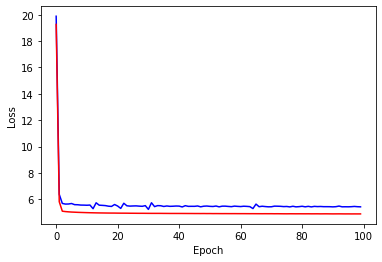

In [343]:
# '''
# # LSTM
# loss_list_lstm = []
# test_loss_list_lstm = []

# # DNN
# loss_list2 = []
# test_loss_list2 = []

# # Linear
# loss_list = []
# test_loss_list = []
# '''
# __test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
# __test_loss_list_lstm.insert(0, 3000)
# __test_loss_list_lstm.insert(250, 100)
# __test_loss_list_lstm.insert(400, 50)

# __loss_list_lstm = [n.item() for n in loss_list_lstm]
# __loss_list_lstm.insert(0, 3000)
# __loss_list_lstm.insert(250, 100)
# __loss_list_lstm.insert(400, 50)
# testx_train_loss = [i for i in range(int(len(__loss_list_lstm)/216))]
# testy_train_loss = [np.mean(__loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__loss_list_lstm)/216))]

# testx_test_loss = [i for i in range(int(len(__test_loss_list_lstm)/216))]
# testy_test_loss = [np.mean(__test_loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__test_loss_list_lstm)/216))]

# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# plt.plot(testx_train_loss, testy_train_loss, 'b', label='Train Loss')
# plt.plot(testx_test_loss, testy_test_loss, 'r', label='Test Loss')
# plt.show()





In [59]:

_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]


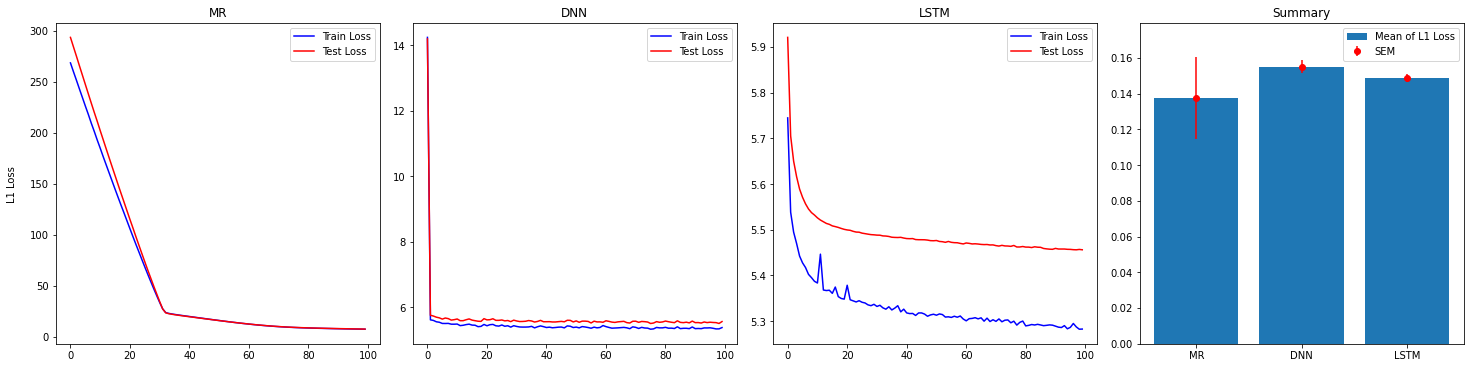

MR : 0.13744222808767237/0.023041723047407967
DNN : 0.15513719876676252/0.003663647566950063
LSTM : 0.14890473384272157/0.002348837816396558


In [132]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []


_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]

'''
import seaborn as sns
TERM = 432

# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))

# MultiVariable Linear regression
x_train_loss = [i for i in range(int(len(_loss_list)/TERM))]
y_train_loss = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/TERM))]
y_test_loss = [np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))]
ax[0].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[0].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[0].set_title('MR')
ax[0].legend()

# Deep Neural Network
x_train_loss = [i for i in range(int(len(_loss_list2)/TERM))]
y_train_loss = [np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list2)/TERM))]
y_test_loss = [np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))]
ax[1].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[1].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[1].set_title('DNN')
ax[1].legend()

# LSTM
x_train_loss = [i for i in range(int(len(_loss_list_lstm)/TERM))]
y_train_loss = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list_lstm)/TERM))]
y_test_loss = [np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))]
ax[2].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[2].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
# ax[2].set_ylim([0,80])
ax[2].set_title('LSTM')
ax[2].legend()

# SUMMARY
COUNT = 40
MR_info_train = np.array([np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))])
MR_info_test = np.array([np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))])
MR_info = np.abs(MR_info_train - MR_info_test)[30:COUNT+30]

DNN_info_train = np.array([np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))])
DNN_info_test = np.array([np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))])
DNN_info = np.abs(DNN_info_train - DNN_info_test)[:COUNT]

LSTM_info_train = np.array([np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))])
LSTM_info_test = np.array([np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))])
LSTM_info = np.abs(LSTM_info_train - LSTM_info_test)[:COUNT]


MR_loss_mean = np.mean(MR_info)
MR_loss_std = np.std(MR_info) / np.sqrt(len(MR_info))

DNN_loss_mean = np.mean(DNN_info)
DNN_loss_std = np.std(DNN_info) / np.sqrt(len(DNN_info))

LSTM_loss_mean = np.mean(LSTM_info)
LSTM_loss_std = np.std(LSTM_info) / np.sqrt(len(LSTM_info))

summary_x = ['MR', 'DNN', 'LSTM']
summary_y = [MR_loss_mean, DNN_loss_mean, LSTM_loss_mean]
summary_err = [MR_loss_std, DNN_loss_std, LSTM_loss_std]

colors = sns.color_palette('hls', len(summary_x))
ax[3].bar(summary_x, summary_y, label = 'Mean of L1 Loss')
ax[3].errorbar(summary_x, summary_y, yerr=summary_err, color='r', fmt='o' ,label='SEM')
ax[3].set_title('Summary')
ax[3].margins(y=0.12)
ax[3].legend(loc='upper right')




fig.text(-0.01, 0.5, 'L1 Loss', ha='center', va='center', rotation='vertical')
# fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

print("MR : {}/{}\nDNN : {}/{}\nLSTM : {}/{}".format(MR_loss_mean,MR_loss_std,DNN_loss_mean,DNN_loss_std,LSTM_loss_mean,LSTM_loss_std))

In [ ]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []
'''
##################### BACKUP #################
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True)
    
x_train_loss = [i for i in range(int(len(_loss_list)/216))]
y_train_loss = [np.mean(_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_loss_list)/216))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/216))]
y_test_loss = [np.mean(_test_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_test_loss_list)/216))]
ax[0][0].plot(x_train_loss, y_train_loss, 'blue', label='Train Loss')
ax[0][0].plot(x_test_loss, y_test_loss, 'blue', label='Train Loss')
ax[0][0].set_title('Price per Item')
ax[0][0].legend()

x = [i for i in range(1, len(line_loss_country[0])+1)]
ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
ax[0][1].set_title('Price per Country')
ax[0][1].legend()

x = [i for i in range(1, len(line_loss_item_p[0])+1)]
ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
ax[1][0].set_title('Inc/Dec Rate per Item')
ax[1][0].legend()

x = [i for i in range(1, len(line_loss_country_p[0])+1)]
ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
ax[1][1].set_title('Inc/Dec Rate per Country')
ax[1][1].legend()

fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# model = nn.Linear(x_train.shape[1], 1).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# n_epochs = 100
# loss_list = []
# test_loss_list = []
# for epoch in range(n_epochs):
#     for batch_idx, samples in enumerate(dataloader):
#         x_t, y_t = samples
        
#         pred = model(x_t)
#         cost = F.l1_loss(pred, y_t)
# #         cost = F.l1_loss(y_train, pred)
#         loss_list.append(cost)
#         with torch.no_grad():
#             pred_y = model(x_test)
#             test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
#         print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

# train Fin

# L1 case Start

In [ ]:
torch.set_printoptions(sci_mode=False)

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
pred_y.shape

In [ ]:
y_test = y_test.reshape(-1,1)
y_test

In [ ]:
pred_y.mean()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

# test Field

In [ ]:
# DNN
pred_y = deepmodel(x_test)


# LSTM
# x_te = x_test.reshape(-1, 1, input_size)
# pred_y = deepmodel(x_te)

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()


# item - rmse

In [134]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
tmp.info()


def RMSELoss(yhat,y):
    return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# Item - RMSE
import scipy.stats
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     print(np.abs(ground_truth - pred).mean())
    diff = np.abs(ground_truth - pred).std()
#     rmse, std = RMSELoss(ground_truth, pred)
    rmse = np.abs(ground_truth - pred).mean()
    std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
    
# Country - RMSE
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
    rmse, std = RMSELoss(ground_truth, pred)
#     rmse = np.abs(ground_truth - pred).mean()
#     std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
np.mean(rmse_list), np.mean(std_list)

In [137]:
np.mean(rmse_list), np.mean(std_list)

(17341233.68903371, 2805527.2864402034)

# country - rmse

In [138]:
# def RMSELoss(yhat,y):
#     return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# import scipy.stats
# rmse_list = []
# std_list = []

# cnt = 0
# item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
# for item_number in item_list:
#     item_df = tmp[tmp.iloc[:, 2] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
#     rmse, std = RMSELoss(ground_truth, pred)
# #     rmse = np.abs(ground_truth - pred).mean()
# #     std = diff/np.sqrt(len(ground_truth))
#     rmse_list.append(rmse)
#     std_list.append(std)

In [139]:
# np.mean(rmse_list), np.mean(std_list)

(16473570.884384235, 1630854.400354215)

# ITEM t-test start

In [98]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

In [28]:
import scipy.stats

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    print('countrys : ', item_df['COUNTRYNM'].unique())
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    print("{} Item : {}".format(item_number, diff))
    print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Sri Lanka' 'Chile' 'China'
 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820210 Item : 206265.76234132834
p-value : 0.14544764486160602

countrys :  ['Algeria' 'Australia' 'Brazil' 'Myanmar' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Japan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820239 Item : 1379665.8074444428
p-value : 0.2618282524365308

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Chile

# normal - t-test FIN

---
# t-test | train + test data

In [29]:
t = torch.cat([x_train, x_test])
if CASE == 'LSTM':
    # LSTM
    t = t.reshape(-1, 1, input_size)
    pred_y = deepmodel(t)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(t)

tmp_all = copy_df.copy()
tmp_all['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17269 entries, 0 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 17269 non-null  int64  
 1   HSCD                     17269 non-null  int64  
 2   COUNTRYCD                17269 non-null  int64  
 3   COUNTRYNM                17269 non-null  object 
 4   TRADE_COUNTRYCD          17269 non-null  float64
 5   TRADE_HSCD               17269 non-null  float64
 6   TARIFF_AVG               17269 non-null  float64
 7   SNDIST                   17269 non-null  float64
 8   NY_GDP_MKTP_CD           17269 non-null  float64
 9   NY_GDP_MKTP_CD_1Y        17269 non-null  float64
 10  SP_POP_TOTL              17269 non-null  float64
 11  PA_NUS_FCRF              17269 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      17269 non-null  float64
 13  KMDIST                   17269 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [30]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    #print("{} Item : {}".format(item_number, diff))
    #print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))


RESULT :  38  /  497


# train + test Data - t-test FIN

# item - country : not matching

In [124]:
item_list = sorted(tmp_all.iloc[:,16].unique())


for item in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item]
    
    if _item_df.shape[0] != len(_item_df['COUNTRYCD'].unique()):
        print("x")
#     if _item_df.shape[0] != 35:
#         print('ITEM : ', item, "NUm : ", _item_df.shape[0])
#     if _item_df.shape[0] > 35:
#         print(sorted(_item_df['COUNTRYNM']))


In [113]:
len(sorted(_item_df['COUNTRYCD'].unique()))

35

In [114]:
_item_df[_item_df['COUNTRYCD'] == 5]

UNC_YEAR  HSCD  COUNTRYCD COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
6      2017     1          5    Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
6         0.0  79.117838    1.649880e+12       1.528240e+12  ...   

   IC_BUS_EASE_DFRN_DB      KMDIST  TRADE_HSCD_COUNTRYCD  \
6             79.54094  106.177031          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent      pred  
6   107.959483           0.652893  1.245726  

[1 rows x 22 columns]

In [ ]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    country_list = sorted(_item_df['COUNTRYCD'].unique())
    for country in country_list:
        item_df = _item_df[_item_df['COUNTRYCD'] == country]
        
        ground_truth = item_df['next_year_percent']
        pred = item_df['pred']
        p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue

        diff = np.mean(np.abs(ground_truth - pred))
        if p_val < 0.05:
            cnt+=1
    
#     print("{} Item : {}".format(item_number, diff))
#     print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

In [95]:
tmp.head()

UNC_YEAR  HSCD  COUNTRYCD   COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
16908      2017   399         13        Iran     5.161228e+10  6.404620e+10   
16910      2017   399         14       Japan     6.714740e+11  6.404620e+10   
16911      2017   399         15  Kazakhstan     2.934591e+10  6.404620e+10   
16912      2017   399         36      Kuwait     3.356833e+10  6.404620e+10   
16913      2017   399         16    Malaysia     1.947200e+11  6.404620e+10   

       TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
16908        12.0  40.939509    4.453450e+11       4.179840e+11  ...   
16910         0.0  78.954807    4.866860e+12       4.922540e+12  ...   
16911         0.0  50.550694    1.668060e+11       1.372780e+11  ...   
16912         0.0  53.642850    1.207070e+11       1.094200e+11  ...   
16913         0.0  74.398315    3.191120e+11       3.012550e+11  ...   

       IC_BUS_EASE_DFRN_DB     KMDIST  TRADE_HSCD_COUNTRYCD  \
16908            55.707860  65.624482          6.592452e+07   
16910            78.020697  11.566696          3.942546e+09   
16911            74.848790  42.277720          4.830666e+07   
16912            59.969240  71.810249          1.047815e+08   
16913            78.272910  46.140674          2.689531e+08   

       KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  \
16908                      300  847150            0.127730   
16910                  6534855  847150            0.587148   
16911                    25746  847150            0.164611   
16912                    99868  847150            0.312144   
16913                   489257  847150            0.138123   

       item_world_percent  gdp_percent  next_year_percent      pred  
16908            0.102933   106.545944           0.000455  4.674330  
16910            6.155785    98.868877           0.165752  4.171092  
16911            0.075425   121.509637           0.053297  0.742438  
16912            0.163603   110.315299           0.095311  2.073210  
16913            0.419936   105.927536           0.181912  1.542309  

[5 rows x 22 columns]

In [96]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

# pred & ground truth - comp // SAMPLE

In [32]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,16]

16908    847150
16910    847150
16911    847150
16912    847150
16913    847150
          ...  
21098    820210
21099    820210
21100    820210
21101    820210
21102    820210
Name: _HSCD, Length: 3454, dtype: int64

In [ ]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [ ]:
arr[:10]

In [ ]:
arr[-10:]

In [ ]:
copy_df.iloc[tr+te:,14:16]

In [ ]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [ ]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [ ]:
res_df[:].to_csv('./pred_result.csv')

In [ ]:
res_df.head()

In [ ]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [ ]:
res_df.iloc[:10, :]

In [ ]:
res_df.iloc[-10:, :]

In [ ]:
copy_df.head()

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [ ]:
pred_y.max()

# ALL Case Test //L1 case Fin && L2 case Start

In [95]:
x_te = x_test
CASE = 'LSTM'
LOSS = 'L1'

if CASE == 'L2':
    # L2 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
    deepmodel.eval()
    
elif CASE == 'L1':
    # L1 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
    deepmodel.eval()

elif CASE == 'LSTM':
    # LSTM Model
    deepmodel = RNN(x_train.shape[1], hidden_size, num_layers, num_classes).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L1.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L2TEST.pth"))
    deepmodel.eval()
    x_te = x_test.reshape(-1, 1, input_size)

elif CASE == 'Linear':
    # Multivariable Model
    deepmodel = nn.Linear(x_train.shape[1], 1).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression_L2TEST.pth"))
    deepmodel.eval()





In [96]:
if CASE == 'LSTM':
    # LSTM
    x_te = x_test.reshape(-1, 1, input_size)
    pred_y = deepmodel(x_te)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(x_test)

# Plot

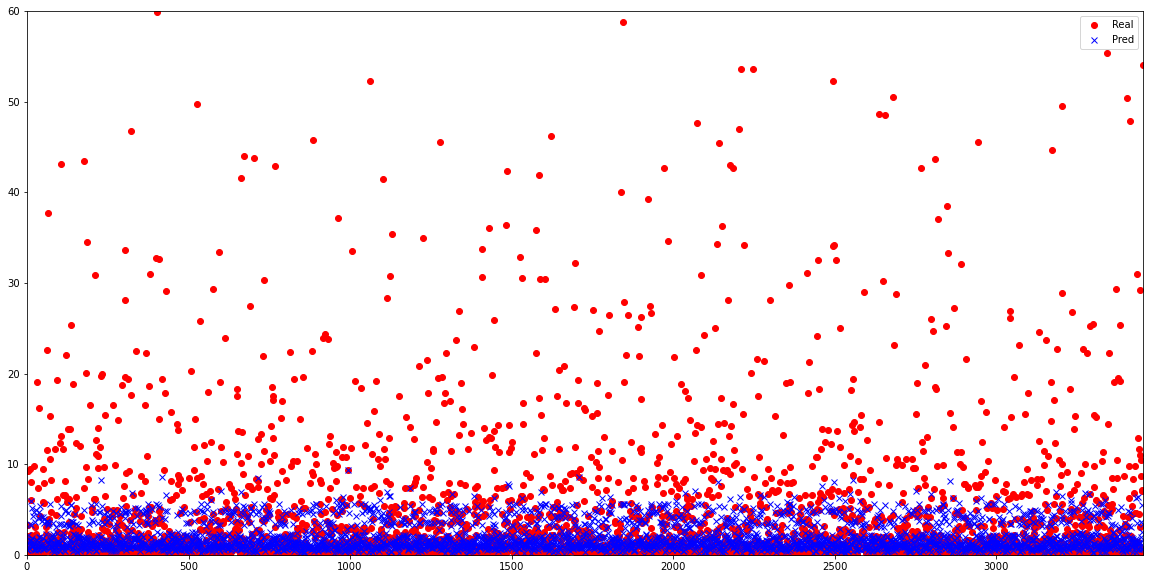

In [97]:
# JUST PLOT

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

# Get RMSE - PRICE

In [98]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))

tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()

# Item - RMSE
import scipy.stats
rmse_list_item = []
std_list_item = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
#     print(ground_truth)
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item.append(rmse)
    std_list_item.append(std)
    
    
# Country - RMSE
rmse_list_country = []
std_list_country = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country.append(rmse)
    std_list_country.append(std)
    


# GET RMSE - percentage

In [99]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()


# Item - RMSE
import scipy.stats
rmse_list_item_p = []
std_list_item_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item_p.append(rmse)
    std_list_item_p.append(std)
    
    
# Country - RMSE
rmse_list_country_p = []
std_list_country_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country_p.append(rmse)
    std_list_country_p.append(std)
    


In [100]:
loss_item.append(np.mean(rmse_list_item))
std_item.append(np.mean(std_list_item))
loss_country.append(np.mean(rmse_list_country))
std_country.append(np.mean(std_list_country))


loss_item_p.append(np.mean(rmse_list_item_p))
std_item_p.append(np.mean(std_list_item_p))
loss_country_p.append(np.mean(rmse_list_country_p))
std_country_p.append(np.mean(std_list_country_p))

In [101]:
line_loss_item.append(rmse_list_item)
line_loss_country.append(rmse_list_country)
line_loss_item_p.append(rmse_list_item_p)
line_loss_country_p.append(rmse_list_country_p)

# RMSE's Plot - plotting Start

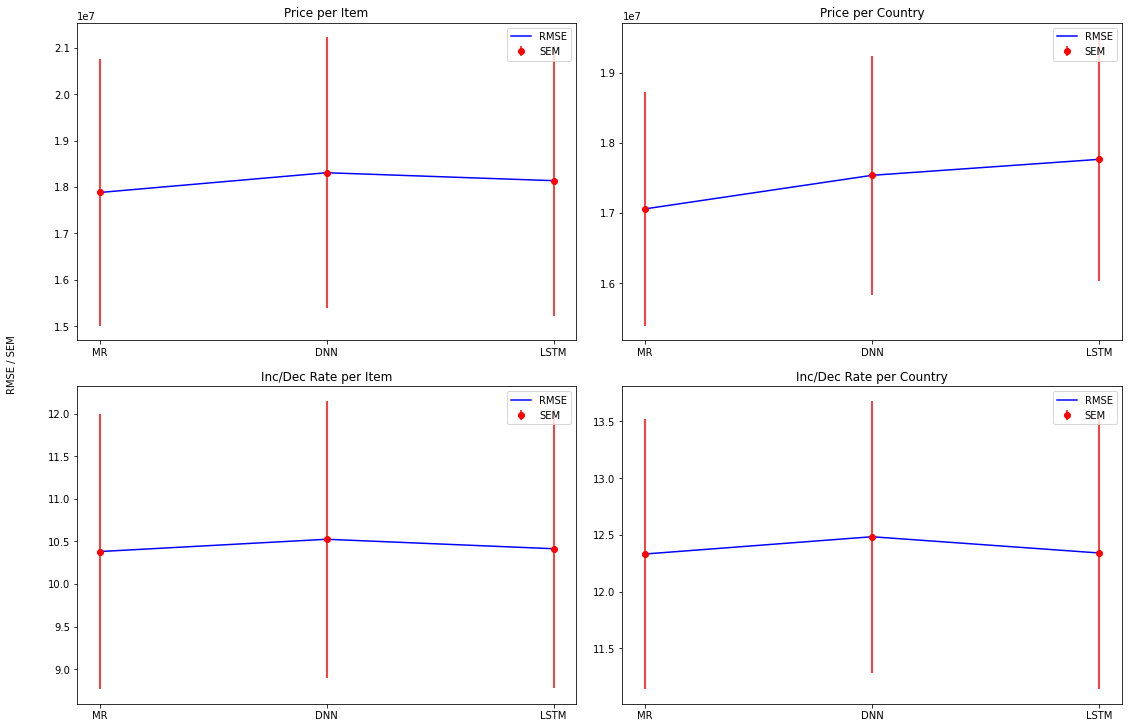

In [149]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    x = ['MR', 'DNN', 'LSTM']
#     fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True,  figsize=(15,10))
    ax[0][0].errorbar(x, loss_item, yerr=std_item, fmt='o', label = 'SEM', color='r')
    ax[0][0].plot(x, loss_item, label = 'RMSE', color='b')
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    ax[0][1].errorbar(x, loss_country, yerr=std_country, fmt='o', label = 'SEM', color='r')
    ax[0][1].plot(x, loss_country, label = 'RMSE', color='b')
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    ax[1][0].errorbar(x, loss_item_p, yerr=std_item_p, fmt='o', label = 'SEM', color='r')
    ax[1][0].plot(x, loss_item_p, label = 'RMSE', color='b')
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    ax[1][1].errorbar(x, loss_country_p, yerr=std_country_p, fmt='o', label = 'SEM', color='r')
    ax[1][1].plot(x, loss_country_p, label = 'RMSE', color='b')
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()
    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()

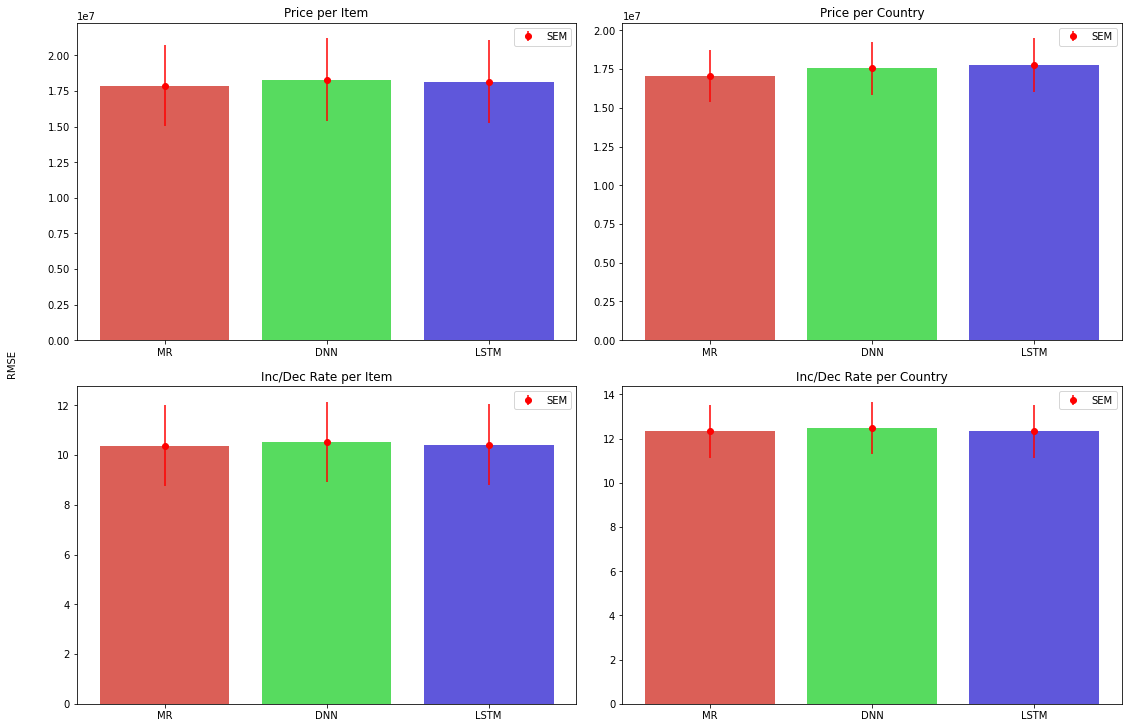

In [147]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    x = ['MR', 'DNN', 'LSTM']
#     fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True,  figsize=(15,10))
    ax[0][0].errorbar(x, loss_item, yerr=std_item, fmt='o', label = 'SEM', color='r')
    ax[0][0].bar(x, loss_item, color=colors)
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    ax[0][1].errorbar(x, loss_country, yerr=std_country, fmt='o', label = 'SEM', color='r')
    ax[0][1].bar(x, loss_country, color=colors)
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    ax[1][0].errorbar(x, loss_item_p, yerr=std_item_p, fmt='o', label = 'SEM', color='r')
    ax[1][0].bar(x, loss_item_p, color=colors)
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    ax[1][1].errorbar(x, loss_country_p, yerr=std_country_p, fmt='o', label = 'SEM', color='r')
    ax[1][1].bar(x, loss_country_p, color=colors)
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()
    fig.text(-0.03, 0.5, 'RMSE', ha='center', va='center', rotation='vertical')
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()

In [103]:
# line_loss_item.append(rmse_list_item)
# line_loss_country.append(rmse_list_country)
# line_loss_item_p.append(rmse_list_item_p)
# line_loss_country_p.append(rmse_list_country_p)

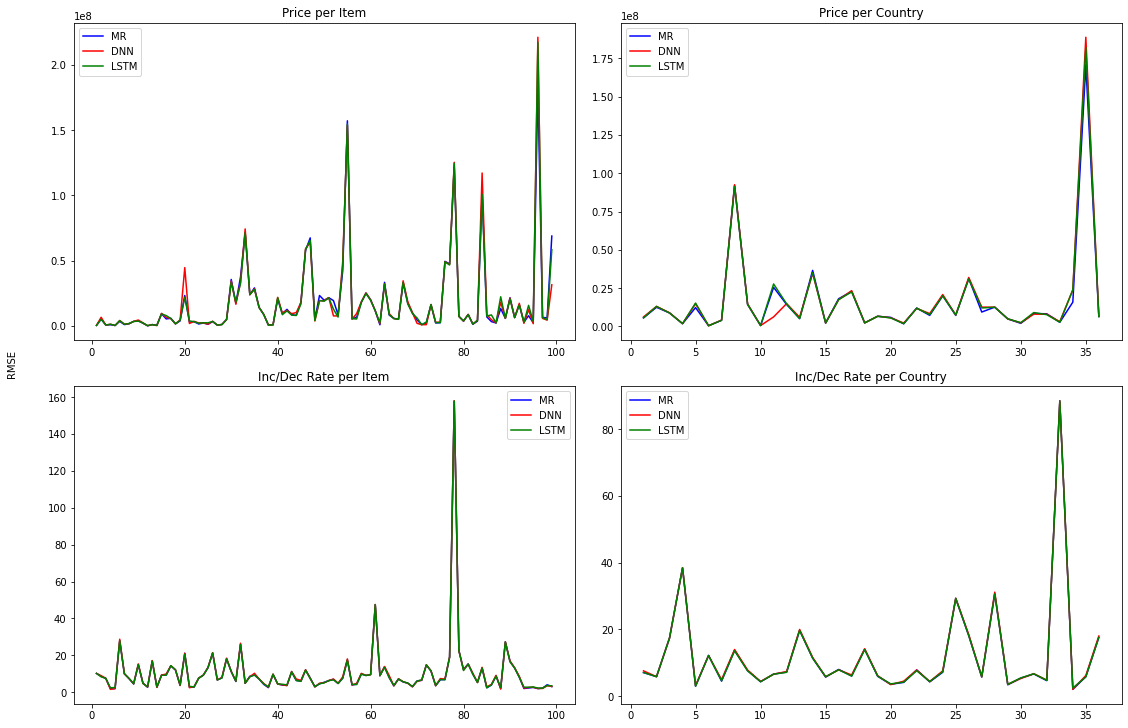

In [133]:
if not init_flag:
#     fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True, figsize=(15,10))
    
    x = [i for i in range(1, len(line_loss_item[0])+1)]
    ax[0][0].plot(x, line_loss_item[0], 'b', label='MR')
    ax[0][0].plot(x, line_loss_item[1], 'r', label='DNN')
    ax[0][0].plot(x, line_loss_item[2], 'g', label='LSTM')
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    x = [i for i in range(1, len(line_loss_country[0])+1)]
    ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
    ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
    ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    x = [i for i in range(1, len(line_loss_item_p[0])+1)]
    ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
    ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
    ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    x = [i for i in range(1, len(line_loss_country_p[0])+1)]
    ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
    ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
    ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()

    fig.text(-0.03, 0.5, 'RMSE', ha='center', va='center', rotation='vertical')
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    plt.show()

In [180]:
loss_item

[18201972.380751327, 17523836.001432333, 17341233.689033713]

In [86]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))
LSTM_loss, LSTM_std = RMSELoss(pred_y, y_test)


In [89]:
MR_loss

tensor(19.5296, device='cuda:0', grad_fn=<SqrtBackward>)

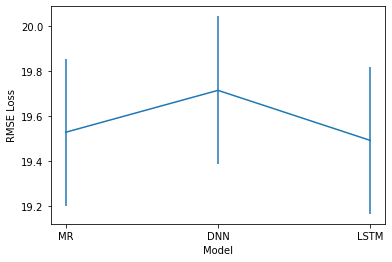

In [97]:
# MR_loss = 0
# MR_std = 0
# LSTM_loss = 0
# LSTM_std = 0
# DNN_loss = 0
# DNN_std = 0

# plt.errorbar([1,2,3], [MR_loss.item, DNN_loss, LSTM_loss], yerr = [MR_std, DNN_std, LSTM_std])
# plt.show()

plot_loss_list = []
plot_sem_list = []

plt.ylabel('RMSE Loss')
plt.xlabel('Model')
plt.errorbar(["MR","DNN","LSTM"], [MR_loss.item(), DNN_loss.item(), LSTM_loss.item()], yerr = [MR_std.item()/np.sqrt(len(pred_y)), DNN_std.item()/np.sqrt(len(pred_y)), LSTM_std.item()/np.sqrt(len(pred_y))])
plt.show()

In [29]:
import seaborn as sns
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
diff_list_L2 = np.array(diff_list_L2)

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



## IQR

In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
transforms = [hl.transforms.Prune('Constant')]

In [ ]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

In [ ]:
graph.them = hl.graph.THEMES['blue'].copy()

In [ ]:
graph

In [ ]:
# !pip install torchviz

In [ ]:
from torchviz import make_dot

In [ ]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [ ]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

In [ ]:
!pip install torchsummary